In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_NaN = pd.read_csv("phospho_data_tissue_annotation.tsv", sep='\t')
data = data_NaN.dropna(inplace = False)
print(data.shape)
#shape should be: (586479, 8)

(586479, 8)


In [3]:
data.head()

proj         peptide modres  UP_POS  ACC_ID  pep_start  pep_end tissue
0  PXD000004      RPPSPEPSTK      S    2102  Q01082       2099     2108  Brain
1  PXD000004      ACVVHGSDLK      C     660  P50993        659      668  Brain
2  PXD000004      ACVVHGSDLK      C     663  P05023        662      671  Brain
3  PXD000004    AISPTSATSSGR      S     600  Q9Y4I1        598      609  Brain
4  PXD000004  FYYTAGSSSPTHAK      S     198  O75508        190      203  Brain

As we only have experimental evidence for STY sites being phosphorylated, these will be the only sites we'll consider for downstream analysis. We'll start off conducting analysis considering first all sites, then we'll follow up with only the STY sites.

In [4]:
data_STY = data[(data["modres"]=="S")|(data["modres"]=="T")|(data["modres"]=="Y")]
data_STY_proj_UP_POS_ACC_ID = data_STY[["proj", "UP_POS", "ACC_ID"]]
#data_STY_proj_UP_POS_ACC_ID.to_csv("//Client/C$/Users/Hanne/Desktop/STY_sites_phosphorylation_data.tsv", sep="\t", index=False)

# 1.1 Tissue-specific phosphorylated proteins

We consider 44 tissues here. Off note, 3 tissues only have non STY sites, and will not be considered for the only STY part of the analysis. We start of trying to identify tissue-specific phosphorylation on the protein level: proteins phosphorylated once or more in a single tissue. We drop all unneeded columns and join tissue annotation for proteins identified in multiple projects in one long, comma seperated string. We'll then check whether each of the 44 tissues occurs in that long string. This returns a True or False value, which is replaced by a 1 or a 0 immediately after. We then calculate in how many tissues a protein is seen by taking the sum of each row. Rows 30 until 39 are displayed as they were best suited to check whether the code worked as intended in this case. Each proteins is as such represented by a binary vector, showing for each tissue (column headers) whether the protein was present or not.

In [5]:
#1.1 tissue-specific phosphorylated proteins
list_tissues = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Bronchoalveolar lavage", "Cartilage", "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Sputum", "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

data_protein = data[["ACC_ID", "tissue"]]
data_protein = data_protein.groupby(["ACC_ID"], as_index=False)["tissue"].apply(lambda x: ",".join(x))
for tissue in list_tissues:
    data_protein[tissue] = data_protein["tissue"].str.contains(tissue)
data_protein.replace({True:1, False:0}, inplace=True)

data_protein["Total"] = data_protein.sum(axis=1)
data_protein.iloc[30:40].head(10)

C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/278214100.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_protein["Total"] = data_protein.sum(axis=1)


ACC_ID                                             tissue  \
30  A0A1B0GVK7                                          PBMC,PBMC   
31  A0A2R8Y619  PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,P...   
32      A0AUZ9  Blood,Nasal polyps, Palatine tonsils, Parotid ...   
33      A0AVK6  Blood,Blood,Blood,Colon,Colon,Colon,Colon,Colo...   
34      A0AVT1           PBMC,Skin,Adipose tissue, Umbilical cord   
35      A0FGR8  Liver,Liver,Liver,Liver,Liver,Liver,Liver,Bloo...   
36      A0JLT2  Blood,Blood,Blood,Blood,Blood,Colon,Colon,Colo...   
37      A0JNW5  Liver,Liver,Blood,Blood,Blood,Blood,Blood,Bloo...   
38      A0M8Q6  Lung,Lung,Lung,Nasal polyps, Palatine tonsils,...   
39      A0MZ66  Blood,Blood,Blood,Colon,Colon,Colon,Colon,Colo...   

    Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
30               0        0      0     0      0       0   
31               0        0      0     0      0       0   
32               0        0      1     0      0       0   
33               0        0      1     0      0       0   
34               1        0      0     0      0       0   
35               0        0      1     0      0       0   
36               0        0      1     0      0       0   
37               0        0      1     0      1       0   
38               0        0      1     0      0       0   
39               0        0      1     0      0       0   

    Bronchoalveolar lavage  Cartilage  ...  Sputum  Synovial tissue  T-cells  \
30                       0          0  ...       0                0        0   
31                       0          0  ...       0                0        0   
32                       0          0  ...       0                0        0   
33                       0          0  ...       0                0        0   
34                       0          0  ...       0                0        0   
35                       0          0  ...       0                0        0   
36                       0          0  ...       0                0        0   
37                       0          0  ...       0                0        0   
38                       0          0  ...       0                0        0   
39                       0          0  ...       0                0        0   

    Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  Total  
30       0      0               0       0                0      0      1  
31       0      0               0       0                0      0      2  
32       0      0               0       0                0      0      4  
33       0      0               0       0                0      0      2  
34       0      0               1       0                0      0      4  
35       1      0               0       0                0      0      5  
36       0      0               0       0                0      0      5  
37       0      0               0       0                0      0      9  
38       0      0               0       0                0      0      6  
39       1      0               0       0                0      0      4  

[10 rows x 47 columns]

We now seperate the proteins in two categories, initially (later on we'll split the second category into two categories, leaving us with a total of three categories). We distinguish tissue-specific proteins, phosphorylated in a single tissue, and non tissue-specific proteins, phosphorylated in more than one tissue.

In [6]:
t_spec_prot = data_protein[(data_protein["Total"]==1)]
print(t_spec_prot.shape[0])
#2487 tissue-specific phosphorylated proteins
t_spec_prot.head()

2487


ACC_ID           tissue  Adipose tissue  B-cells  Blood  Bone  Brain  \
0   A0A075B6H7             Lung               0        0      0     0      0   
1   A0A075B6S5  Menstrual fluid               0        0      0     0      0   
6   A0A087WXM9           Testis               0        0      0     0      0   
10  A0A096LP55            Liver               0        0      0     0      0   
11  A0A0A0MS15             PBMC               0        0      0     0      0   

    Breast  Bronchoalveolar lavage  Cartilage  ...  Sputum  Synovial tissue  \
0        0                       0          0  ...       0                0   
1        0                       0          0  ...       0                0   
6        0                       0          0  ...       0                0   
10       0                       0          0  ...       0                0   
11       0                       0          0  ...       0                0   

    T-cells  Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  \
0         0       0      0               0       0                0      0   
1         0       0      0               0       0                0      0   
6         0       1      0               0       0                0      0   
10        0       0      0               0       0                0      0   
11        0       0      0               0       0                0      0   

    Total  
0       1  
1       1  
6       1  
10      1  
11      1  

[5 rows x 47 columns]

In [7]:
non_t_spec_prot = data_protein[(data_protein["Total"]>1)]
print(non_t_spec_prot.shape[0])
#sum of the tissue specific and non-tissue specific proteins equals the total amount proteins
print(t_spec_prot.shape[0]+non_t_spec_prot.shape[0])
non_t_spec_prot.head()

4960
7447


ACC_ID                                             tissue  \
2  A0A075B759  Umbilical cord,Umbilical cord,Umbilical cord,S...   
3  A0A075B767  Umbilical cord,Umbilical cord,Umbilical cord,S...   
4  A0A087WV62              Urinary bladder, Colon, Kidney, Liver   
5  A0A087WVF3  Colon,Colon,Lymph node,Lymph node,Lymph node,L...   
7  A0A087WXS9  Colon,Colon,Lymph node,Lymph node,Lymph node,L...   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
2               0        0      0     0      1       0   
3               0        0      0     0      1       0   
4               0        0      0     0      0       0   
5               0        0      0     0      0       0   
7               0        0      0     0      0       0   

   Bronchoalveolar lavage  Cartilage  ...  Sputum  Synovial tissue  T-cells  \
2                       0          0  ...       0                0        0   
3                       0          0  ...       0                0        0   
4                       0          0  ...       0                0        0   
5                       0          0  ...       0                0        0   
7                       0          0  ...       0                0        0   

   Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  Total  
2       0      0               1       0                0      1      7  
3       0      0               1       0                0      1      7  
4       0      0               0       0                1      0      4  
5       0      0               0       0                0      0      2  
7       0      0               0       0                0      0      2  

[5 rows x 47 columns]

We'll now investigate the distribution of tissue-specific phosphorylated proteins and non tissue-specific phosphorylated proteins across tissues. As expected, some tissues don't have any tissue-specific phosphorylated proteins. We do this by looping over all tissues, and taking the sum of their respective columns. We store these lists in two dataframes and join these. 

<AxesSubplot:xlabel='Tissue'>

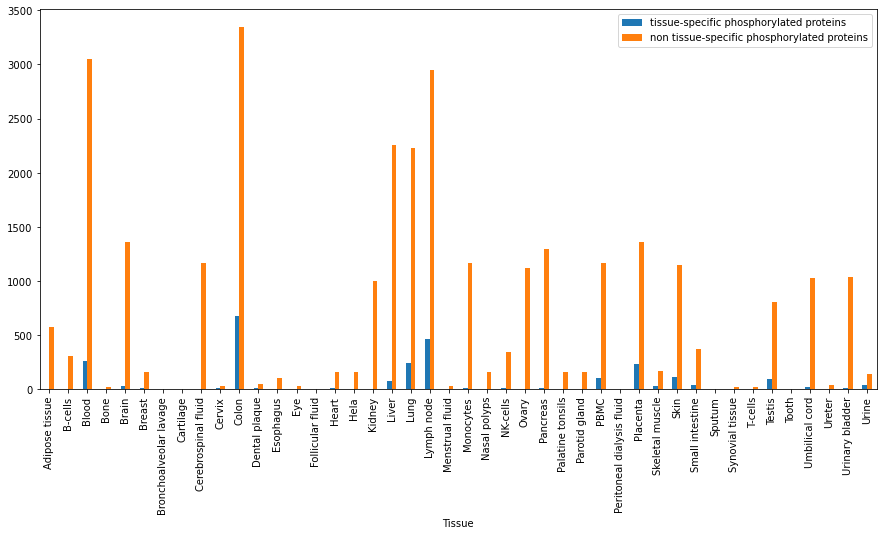

In [8]:
# displaying the number of tissue-specific phosphorylated proteins per tissue in comparison to
#non tissue-specific ones
list_tissues = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Bronchoalveolar lavage", "Cartilage", "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Sputum", "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
df_spec_proteins_tissues = pd.DataFrame({"Tissue": list_tissues})
list_counts = []
for tissue in list_tissues:
    count = t_spec_prot[tissue].sum()
    list_counts.append(count)
df_spec_proteins_tissues["number of proteins"] = list_counts

df_non_spec_proteins_tissues = pd.DataFrame({"Tissue": list_tissues})
list_counts_2 = []
for tissue in list_tissues:
    count_2 = non_t_spec_prot[tissue].sum()
    list_counts_2.append(count_2)
df_non_spec_proteins_tissues["number of proteins"] = list_counts_2

df_combined = pd.merge(df_spec_proteins_tissues, df_non_spec_proteins_tissues, how="outer",
                      on="Tissue")
df_combined.rename(columns = {"number of proteins_x":"tissue-specific phosphorylated proteins"},
                      inplace = True)
df_combined.rename(columns = {"number of proteins_y":"non tissue-specific phosphorylated proteins"},
                      inplace = True)

df_combined.plot(x="Tissue", kind="bar", figsize=(15,7))

In [9]:
df_combined.head()

Tissue  tissue-specific phosphorylated proteins  \
0  Adipose tissue                                        0   
1         B-cells                                        2   
2           Blood                                      256   
3            Bone                                        0   
4           Brain                                       25   

   non tissue-specific phosphorylated proteins  
0                                          577  
1                                          310  
2                                         3048  
3                                           18  
4                                         1362

In [10]:
df_combined[((df_combined["tissue-specific phosphorylated proteins"] < 50) |
           (df_combined["non tissue-specific phosphorylated proteins"] < 50))].shape[0]
# For 35 tissues, there are less than 50 tissue-specific phosphorylated proteins/ non tissue-specific
#phosphorylated proteins, out of 44 tissues considered

35

In [11]:
non_t_spec_prot = data_protein[(data_protein["Total"]>1)&(data_protein["Total"]<5)]
general_prot = data_protein[data_protein["Total"]>=5]
print(non_t_spec_prot.shape[0])
non_t_spec_prot.head()

2534


ACC_ID                                             tissue  \
4  A0A087WV62              Urinary bladder, Colon, Kidney, Liver   
5  A0A087WVF3  Colon,Colon,Lymph node,Lymph node,Lymph node,L...   
7  A0A087WXS9  Colon,Colon,Lymph node,Lymph node,Lymph node,L...   
8  A0A087X179  Colon,Colon,Lymph node,Lymph node,Lymph node,L...   
9  A0A087X1G2  Colon,Colon,Lymph node,Lymph node,Lymph node,L...   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
4               0        0      0     0      0       0   
5               0        0      0     0      0       0   
7               0        0      0     0      0       0   
8               0        0      0     0      0       0   
9               0        0      0     0      0       0   

   Bronchoalveolar lavage  Cartilage  ...  Sputum  Synovial tissue  T-cells  \
4                       0          0  ...       0                0        0   
5                       0          0  ...       0                0        0   
7                       0          0  ...       0                0        0   
8                       0          0  ...       0                0        0   
9                       0          0  ...       0                0        0   

   Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  Total  
4       0      0               0       0                1      0      4  
5       0      0               0       0                0      0      2  
7       0      0               0       0                0      0      2  
8       0      0               0       0                0      0      2  
9       0      0               0       0                0      0      2  

[5 rows x 47 columns]

In [12]:
print(general_prot.shape[0])
general_prot.head()

2426


ACC_ID                                             tissue  \
2   A0A075B759  Umbilical cord,Umbilical cord,Umbilical cord,S...   
3   A0A075B767  Umbilical cord,Umbilical cord,Umbilical cord,S...   
12  A0A0B4J2A2  Umbilical cord,Umbilical cord,Umbilical cord,S...   
18  A0A0C4DH39  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
35      A0FGR8  Liver,Liver,Liver,Liver,Liver,Liver,Liver,Bloo...   

    Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
2                0        0      0     0      1       0   
3                0        0      0     0      1       0   
12               0        0      0     0      1       0   
18               0        0      1     0      1       0   
35               0        0      1     0      0       0   

    Bronchoalveolar lavage  Cartilage  ...  Sputum  Synovial tissue  T-cells  \
2                        0          0  ...       0                0        0   
3                        0          0  ...       0                0        0   
12                       0          0  ...       0                0        0   
18                       0          0  ...       0                0        0   
35                       0          0  ...       0                0        0   

    Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  Total  
2        0      0               1       0                0      1      7  
3        0      0               1       0                0      1      7  
12       0      0               1       0                0      1      7  
18       0      0               0       0                0      0      7  
35       1      0               0       0                0      0      5  

[5 rows x 47 columns]

<AxesSubplot:title={'center':'Number of phosphoproteins in each of the three categories'}, xlabel='Tissue'>

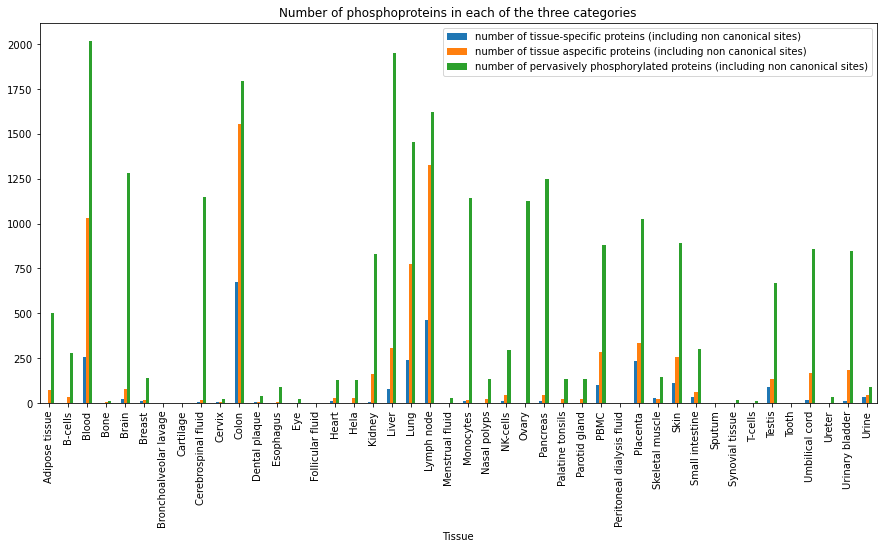

In [13]:
# We now make a devision in three categories

list_tissues = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Bronchoalveolar lavage", "Cartilage", "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Sputum", "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
df_all_proteins_tissues = pd.DataFrame({"Tissue": list_tissues})
list_counts_tspec = []
list_counts_nontspec = []
list_counts_gen = []
for tissue in list_tissues:
    count_tspec = t_spec_prot[tissue].sum()
    list_counts_tspec.append(count_tspec)
    count_nontspec = non_t_spec_prot[tissue].sum()
    list_counts_nontspec.append(count_nontspec)
    count_gen = general_prot[tissue].sum()
    list_counts_gen.append(count_gen)
df_all_proteins_tissues["number of tissue-specific proteins (including non canonical sites)"] = list_counts_tspec
df_all_proteins_tissues["number of tissue aspecific proteins (including non canonical sites)"] = list_counts_nontspec
df_all_proteins_tissues["number of pervasively phosphorylated proteins (including non canonical sites)"] = list_counts_gen

df_all_proteins_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphoproteins in each of the three categories")

Most tissue-specific protein seen in: Colon, Lymph node, Blood, Lung, Placenta.

In [14]:
df_all_proteins_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6      Bronchoalveolar lavage   
7                   Cartilage   
8         Cerebrospinal fluid   
9                      Cervix   
10                      Colon   
11              Dental plaque   
12                  Esophagus   
13                        Eye   
14           Follicular fluid   
15                      Heart   
16                       Hela   
17                     Kidney   
18                      Liver   
19                       Lung   
20                 Lymph node   
21            Menstrual fluid   
22                  Monocytes   
23               Nasal polyps   
24                   NK-cells   
25                      Ovary   
26                   Pancreas   
27           Palatine tonsils   
28              Parotid gland   
29                       PBMC   
30  Peritoneal dialysis fluid   
31                   Placenta   
32            Skeletal muscle   
33                       Skin   
34            Small intestine   
35                     Sputum   
36            Synovial tissue   
37                    T-cells   
38                     Testis   
39                      Tooth   
40             Umbilical cord   
41                     Ureter   
42            Urinary bladder   
43                      Urine   

    number of tissue-specific proteins (including non canonical sites)  \
0                                                   0                    
1                                                   2                    
2                                                 256                    
3                                                   0                    
4                                                  25                    
5                                                  11                    
6                                                   0                    
7                                                   0                    
8                                                   5                    
9                                                   6                    
10                                                675                    
11                                                  7                    
12                                                  1                    
13                                                  2                    
14                                                  0                    
15                                                 14                    
16                                                  0                    
17                                                  5                    
18                                                 79                    
19                                                242                    
20                                                460                    
21                                                  1                    
22                                                  9                    
23                                                  0                    
24                                                 13                    
25                                                  1                    
26                                                  9                    
27                                                  0                    
28                                                  0                    
29                                                103                    
30                                                  0                    
31                                                234                    
32                                                 27                    
33                   

### 1.1.2 only S,T,Y phosphorylated proteins: how many and which tissues

We'll now conduct the same type of analysis limited to the canonical sites, again on the protein level. We lose three tissues: Bronchoalveolar lavage, Cartilage and Sputum.

In [15]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
data_site = data[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_site = data_site.groupby(["ACC_ID", "UP_POS"], as_index=False)[["tissue", "modres"]].agg(
    {"tissue": lambda x:",".join(x), "modres": "first"})
for tissue in list_tissues_STY:
    data_site[tissue] = data_site["tissue"].str.contains(tissue)
data_site.replace({True:1, False:0}, inplace=True)
data_protein_STY = data_site[(data_site["modres"]=="S")|(data_site["modres"]=="T")|
                             (data_site["modres"]=="Y")]
data_protein_STY = data_protein_STY.groupby(["ACC_ID"], as_index=False)[list_tissues_STY].max()
data_protein_STY["Total"] = data_protein_STY[list_tissues_STY].sum(axis=1)
STY_t_spec_prot = data_protein_STY[(data_protein_STY["Total"]==1)]
STY_t_spec_prot

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0     A0A075B6H7               0        0      0     0      0       0   
1     A0A075B6S5               0        0      0     0      0       0   
2     A0A087WXM9               0        0      0     0      0       0   
3     A0A0B4J2D5               0        0      0     0      0       0   
4     A0A0B4J2D9               0        0      1     0      0       0   
...          ...             ...      ...    ...   ...    ...     ...   
5837      Q9Y6N5               0        0      0     0      0       0   
5841      Q9Y6P5               0        0      1     0      0       0   
5845      Q9Y6R7               0        0      0     0      0       0   
5851      Q9Y6X8               0        0      0     0      0       0   
5854      Q9Y6Y8               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  Small intestine  \
0                       0       0      0  ...                0   
1                       0       0      0  ...                0   
2                       0       0      0  ...                0   
3                       0       0      0  ...                0   
4                       0       0      0  ...                0   
...                   ...     ...    ...  ...              ...   
5837                    0       0      0  ...                0   
5841                    0       0      0  ...                0   
5845                    0       0      0  ...                1   
5851                    0       0      1  ...                0   
5854                    0       0      1  ...                0   

      Synovial tissue  T-cells  Testis  Tooth  Umbilical cord  Ureter  \
0                   0        0       0      0               0       0   
1                   0        0       0      0               0       0   
2                   0        0       1      0               0       0   
3                   0        0       0      0               0       0   
4                   0        0       0      0               0       0   
...               ...      ...     ...    ...             ...     ...   
5837                0        0       0      0               0       0   
5841                0        0       0      0               0       0   
5845                0        0       0      0               0       0   
5851                0        0       0      0               0       0   
5854                0        0       0      0               0       0   

      Urinary bladder  Urine  Total  
0                   0      0      1  
1                   0      0      1  
2                   0      0      1  
3                   0      0      1  
4                   0      0      1  
...               ...    ...    ...  
5837                0      0      1  
5841                0      0      1  
5845                0      0      1  
5851                0      0      1  
5854                0      0      1  

[2029 rows x 43 columns]

In [16]:
#data_protein_STY.to_csv("protein_data", sep="\t", index=False)

In [17]:
STY_non_t_spec_prot = data_protein_STY[(data_protein_STY["Total"]>1)]
STY_non_t_spec_prot

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
7     A0A0C4DH36               0        0      1     0      0       0   
8     A0A0C4DH39               0        0      1     0      1       0   
18        A0AVK6               0        0      1     0      0       0   
19        A0FGR8               0        0      1     0      0       0   
20        A0JLT2               0        0      1     0      0       0   
...          ...             ...      ...    ...   ...    ...     ...   
5848      Q9Y6V0               0        0      1     0      1       0   
5849      Q9Y6W5               0        0      0     0      0       0   
5850      Q9Y6X4               0        0      1     0      1       0   
5852      Q9Y6X9               0        0      1     0      0       0   
5853      Q9Y6Y0               0        0      0     0      0       0   

      Cerebrospinal fluid  Cervix  Colon  ...  Small intestine  \
7                       0       0      0  ...                0   
8                       1       0      0  ...                0   
18                      0       0      1  ...                0   
19                      0       0      1  ...                0   
20                      0       0      1  ...                0   
...                   ...     ...    ...  ...              ...   
5848                    1       0      1  ...                0   
5849                    0       0      1  ...                0   
5850                    1       0      0  ...                0   
5852                    0       0      1  ...                0   
5853                    0       0      1  ...                0   

      Synovial tissue  T-cells  Testis  Tooth  Umbilical cord  Ureter  \
7                   0        0       0      0               0       0   
8                   0        0       0      0               0       0   
18                  0        0       0      0               0       0   
19                  0        0       1      0               0       0   
20                  0        0       0      0               0       0   
...               ...      ...     ...    ...             ...     ...   
5848                0        0       0      0               0       0   
5849                0        0       0      0               0       0   
5850                0        0       0      0               0       0   
5852                0        0       0      0               1       0   
5853                0        0       0      0               0       0   

      Urinary bladder  Urine  Total  
7                   0      0      2  
8                   0      0      7  
18                  0      0      2  
19                  0      0      5  
20                  0      0      3  
...               ...    ...    ...  
5848                0      0      8  
5849                0      0      2  
5850                0      0      8  
5852                0      0      6  
5853                1      0      5  

[3826 rows x 43 columns]

<AxesSubplot:xlabel='Tissue'>

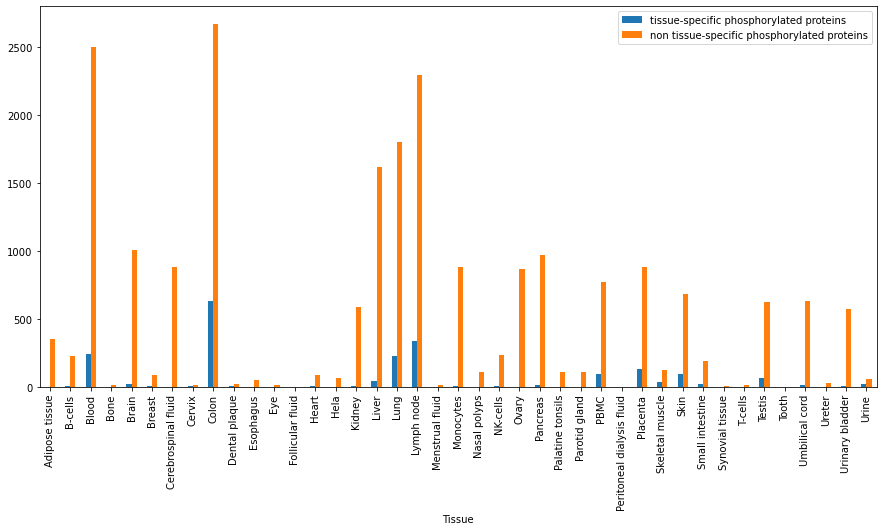

In [18]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
df_spec_proteins_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_STY = []
for tissue in list_tissues_STY:
    count = STY_t_spec_prot[tissue].sum()
    list_counts_STY.append(count)
df_spec_proteins_tissues_STY["number of proteins"] = list_counts_STY
df_non_spec_proteins_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_2_STY = []
for tissue in list_tissues_STY:
    count_2 = STY_non_t_spec_prot[tissue].sum()
    list_counts_2_STY.append(count_2)
df_non_spec_proteins_tissues_STY["number of proteins"] = list_counts_2_STY
df_combined_STY = pd.merge(df_spec_proteins_tissues_STY, df_non_spec_proteins_tissues_STY, how="outer",
                      on="Tissue")
df_combined_STY.rename(columns = {"number of proteins_x":"tissue-specific phosphorylated proteins"},
                      inplace = True)
df_combined_STY.rename(columns = {"number of proteins_y":"non tissue-specific phosphorylated proteins"},
                      inplace = True)
df_combined_STY.plot(x="Tissue", kind="bar", figsize=(15,7))

In [19]:
df_problems_STY = df_combined_STY[((df_combined_STY["tissue-specific phosphorylated proteins"] < 50) |
           (df_combined_STY["non tissue-specific phosphorylated proteins"] < 50))]
df_problems_STY

Tissue  tissue-specific phosphorylated proteins  \
0              Adipose tissue                                        0   
1                     B-cells                                        4   
3                        Bone                                        1   
4                       Brain                                       19   
5                      Breast                                        3   
6         Cerebrospinal fluid                                        1   
7                      Cervix                                        4   
9               Dental plaque                                        6   
10                  Esophagus                                        0   
11                        Eye                                        1   
12           Follicular fluid                                        0   
13                      Heart                                        3   
14                       Hela                                        0   
15                     Kidney                                        3   
16                      Liver                                       40   
19            Menstrual fluid                                        1   
20                  Monocytes                                        9   
21               Nasal polyps                                        0   
22                   NK-cells                                        5   
23                      Ovary                                        1   
24                   Pancreas                                       11   
25           Palatine tonsils                                        0   
26              Parotid gland                                        0   
28  Peritoneal dialysis fluid                                        0   
30            Skeletal muscle                                       33   
32            Small intestine                                       22   
33            Synovial tissue                                        2   
34                    T-cells                                        0   
36                      Tooth                                        0   
37             Umbilical cord                                       12   
38                     Ureter                                        1   
39            Urinary bladder                                        6   
40                      Urine                                       21   

    non tissue-specific phosphorylated proteins  
0                                           350  
1                                           229  
3                                            10  
4                                          1007  
5                                            84  
6                                           883  
7                                            14  
9                                            19  
10                                           51  
11                                           16  
12                                            1  
13                                           86  
14                                           66  
15                                          589  
16                                         1619  
19                                           10  
20                                          881  
21                                          108  
22                                          237  
23                                          866  
24                                          966  
25                                          108  
26                                          108  
28                                            2  
30                                          124  
32                                          192  
33                                            9  
34                                           10  
36                                            1  
37    

In [20]:
df_problems_STY.shape[0]
# not more problems than previously

33

<AxesSubplot:title={'center':'Number of tissue-specific phosphorylated proteins contrasted by non tissue-specific phosphorylated proteins per tissue'}, xlabel='Tissue'>

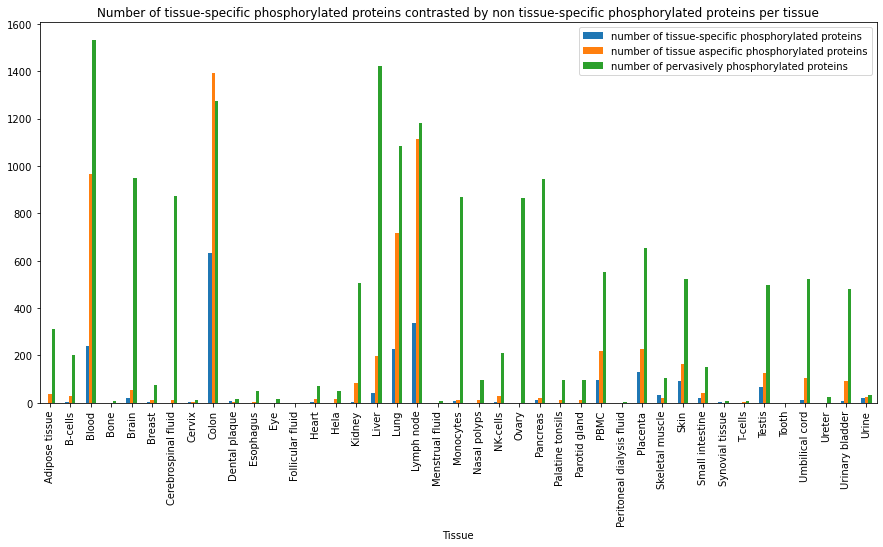

In [21]:
STY_non_t_spec_prot = data_protein_STY[(data_protein_STY["Total"]>1)&(data_protein_STY["Total"]<5)]
STY_general_prot = data_protein_STY[(data_protein_STY["Total"]>=5)]
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
                "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
df_general_proteins_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_3_STY = []
for tissue in list_tissues_STY:
    count = STY_general_prot[tissue].sum()
    list_counts_3_STY.append(count)
df_general_proteins_tissues_STY["number of pervasively phosphorylated proteins"] = list_counts_3_STY
df_t_spec_proteins_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_4_STY = []
for tissue in list_tissues_STY:
    count = STY_t_spec_prot[tissue].sum()
    list_counts_4_STY.append(count)
df_t_spec_proteins_tissues_STY["number of tissue-specific phosphorylated proteins"] = list_counts_4_STY
df_non_t_spec_proteins_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_5_STY = []
for tissue in list_tissues_STY:
    count = STY_non_t_spec_prot[tissue].sum()
    list_counts_5_STY.append(count)
df_non_t_spec_proteins_tissues_STY["number of tissue aspecific phosphorylated proteins"] = list_counts_5_STY
df_combined_all_STY = pd.merge(df_t_spec_proteins_tissues_STY, df_non_t_spec_proteins_tissues_STY, how="outer", on="Tissue")
df_combined_all_STY = pd.merge(df_combined_all_STY, df_general_proteins_tissues_STY, how="outer", on="Tissue")
df_combined_all_STY.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of tissue-specific phosphorylated proteins contrasted by non tissue-specific phosphorylated proteins per tissue")

<AxesSubplot:title={'center':'Number of tissue-specific phosphorylated proteins contrasted by more generally phosphorylated proteins per tissue'}, xlabel='Tissue', ylabel='number of phosphorylated proteins'>

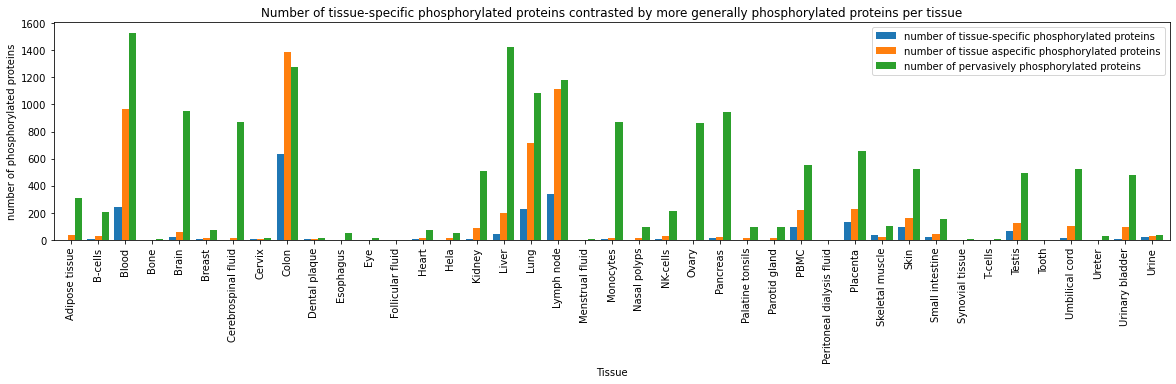

In [22]:
df_combined_all_STY.plot(x="Tissue", kind="bar", figsize=(20,4), title="Number of tissue-specific phosphorylated proteins contrasted by more generally phosphorylated proteins per tissue", ylabel="number of phosphorylated proteins", width=0.8)
#plt.rc('font', size=13)
#plt.style.use('default')

<AxesSubplot:title={'center':'Distribution of tissue-specific and aspecific phopshorylated proteins across tissues'}, xlabel='Tissue'>

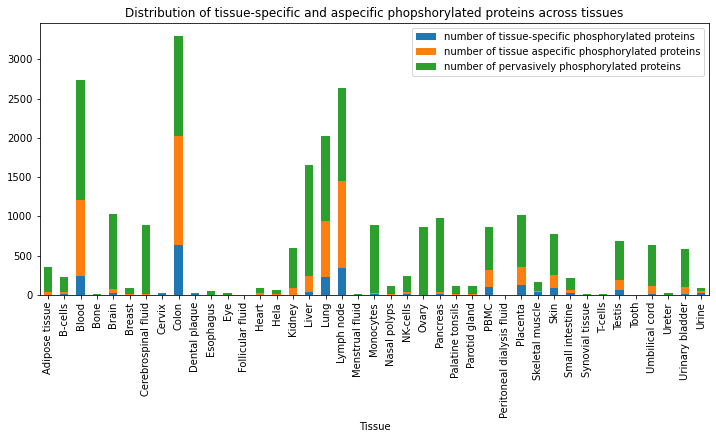

In [23]:
df_combined_all_STY.plot(x="Tissue", kind="bar", figsize=(12,5), stacked=True, title="Distribution of tissue-specific and aspecific phopshorylated proteins across tissues")
#plt.savefig("WP1 tissue-specific proteins distribution.png", format="png", bbox_inches="tight")

In [24]:
df_combined_all_STY2=pd.DataFrame({"Tissue": list_tissues_STY})
df_combined_all_STY2["Total"] = df_combined_all_STY[["number of tissue-specific phosphorylated proteins", "number of tissue aspecific phosphorylated proteins", "number of pervasively phosphorylated proteins"]].sum(axis=1)
df_combined_all_STY2["log(number of tissue-specific phosphorylated proteins)"] = np.log10(df_combined_all_STY["number of tissue-specific phosphorylated proteins"])
df_combined_all_STY2["log(number of tissue aspecific phosphorylated proteins)"] = np.log10(df_combined_all_STY["number of tissue aspecific phosphorylated proteins"])
df_combined_all_STY2["log(number of pervasively phosphorylated proteins)"] = np.log10(df_combined_all_STY["number of pervasively phosphorylated proteins"])
df_combined_all_STY2

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Tissue  Total  \
0              Adipose tissue    350   
1                     B-cells    233   
2                       Blood   2737   
3                        Bone     11   
4                       Brain   1026   
5                      Breast     87   
6         Cerebrospinal fluid    884   
7                      Cervix     18   
8                       Colon   3297   
9               Dental plaque     25   
10                  Esophagus     51   
11                        Eye     17   
12           Follicular fluid      1   
13                      Heart     89   
14                       Hela     66   
15                     Kidney    592   
16                      Liver   1659   
17                       Lung   2028   
18                 Lymph node   2631   
19            Menstrual fluid     11   
20                  Monocytes    890   
21               Nasal polyps    108   
22                   NK-cells    242   
23                      Ovary    867   
24                   Pancreas    977   
25           Palatine tonsils    108   
26              Parotid gland    108   
27                       PBMC    866   
28  Peritoneal dialysis fluid      2   
29                   Placenta   1014   
30            Skeletal muscle    157   
31                       Skin    775   
32            Small intestine    214   
33            Synovial tissue     11   
34                    T-cells     10   
35                     Testis    689   
36                      Tooth      1   
37             Umbilical cord    640   
38                     Ureter     28   
39            Urinary bladder    578   
40                      Urine     81   

    log(number of tissue-specific phosphorylated proteins)  \
0                                                -inf        
1                                            0.602060        
2                                            2.382017        
3                                            0.000000        
4                                            1.278754        
5                                            0.477121        
6                                            0.000000        
7                                            0.602060        
8                                            2.800717        
9                                            0.778151        
10                                               -inf        
11                                           0.000000        
12                                               -inf        
13                                           0.477121        
14                                               -inf        
15                                           0.477121        
16                                           1.602060        
17                                           2.357935        
18                                           2.526339        
19                                           0.000000        
20                                           0.954243        
21                                               -inf        
22                                           0.698970        
23                                           0.000000        
24                                           1.041393        
25                                               -inf        
26                                               -inf        
27                                           1.977724        
28                                               -inf        
29                                           2.117271        
30                                           1.518514        
31                                           1.959041        
32                                           1.342423        
33                                           0.301030        
34                                               -inf        
35                                           1.819544        
36                                              

C:\Anaconda3\lib\site-packages\matplotlib\transforms.py:2013: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[1, 2] += ty
C:\Anaconda3\lib\site-packages\matplotlib\transforms.py:396: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


<AxesSubplot:title={'center':'Distribution of tissue-specific and aspecific phopshorylated proteins across tissues'}, xlabel='Tissue'>

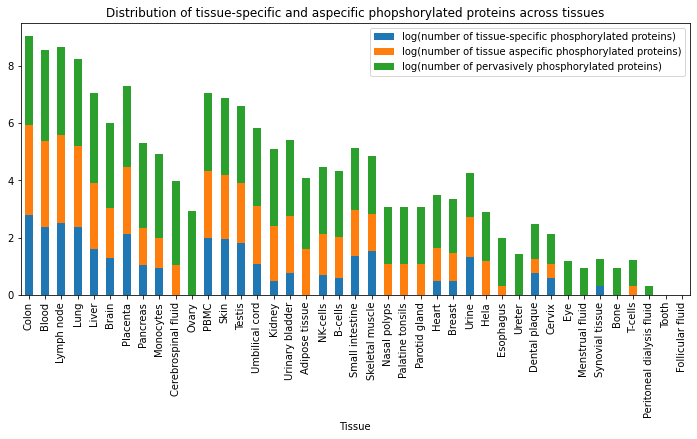

In [25]:
#df_combined_all_STY2["Total"] = df_combined_all_STY[["number of tissue-specific phosphorylated proteins", "number of tissue aspecific phosphorylated proteins", "number of pervasively phosphorylated proteins"]].sum(axis=1)
df_combined_all_STY2.sort_values(by="Total", ascending=False)[["Tissue", "log(number of tissue-specific phosphorylated proteins)", "log(number of tissue aspecific phosphorylated proteins)", "log(number of pervasively phosphorylated proteins)"]].plot(x="Tissue", kind="bar", figsize=(12,5), stacked=True, title="Distribution of tissue-specific and aspecific phopshorylated proteins across tissues")
#plt.savefig("images_thesis tissue-specific proteins distribution_sorted.png", format="png", bbox_inches="tight")

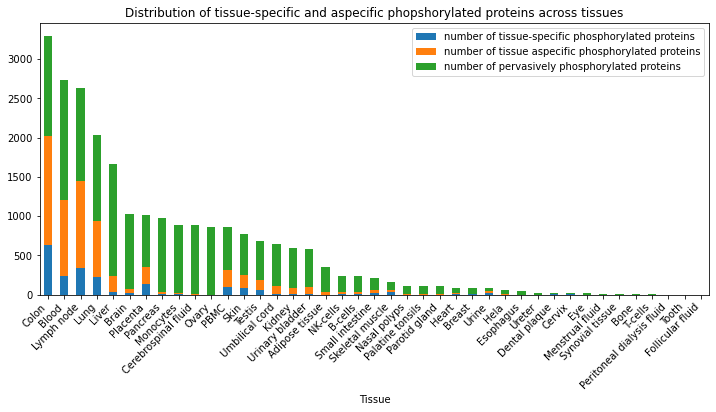

In [26]:
df_combined_all_STY["Total"] = df_combined_all_STY[["number of tissue-specific phosphorylated proteins", "number of tissue aspecific phosphorylated proteins", "number of pervasively phosphorylated proteins"]].sum(axis=1)
df_combined_all_STY.sort_values(by="Total", ascending=False)[["Tissue", "number of tissue-specific phosphorylated proteins", "number of tissue aspecific phosphorylated proteins", "number of pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(12,5), stacked=True, title="Distribution of tissue-specific and aspecific phopshorylated proteins across tissues")
plt.xticks(rotation=45, ha="right")
#plt.savefig("images_thesis tissue-specific proteins distribution_sorted.png", format="png", bbox_inches="tight")
plt.show()

We now see the most tissue-specific proteins in Colon, Lymph node, Blood, Lung, Placenta.

In [27]:
df_combined_all_STY["Total"] = df_combined_all_STY[["number of tissue-specific phosphorylated proteins", "number of tissue aspecific phosphorylated proteins", "number of pervasively phosphorylated proteins"]].sum(axis=1)
df_combined_all_STY["ratio_tissue-specific phosphorylated proteins"] = df_combined_all_STY["number of tissue-specific phosphorylated proteins"]*100/df_combined_all_STY["Total"]
df_combined_all_STY["ratio_tissue aspecific phosphorylated proteins"] = df_combined_all_STY["number of tissue aspecific phosphorylated proteins"]*100/df_combined_all_STY["Total"]
df_combined_all_STY["ratio_pervasively phosphorylated proteins"] = df_combined_all_STY["number of pervasively phosphorylated proteins"]*100/df_combined_all_STY["Total"]
df_combined_all_STY

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    number of tissue-specific phosphorylated proteins  \
0                                                   0   
1                                                   4   
2                                                 241   
3                                                   1   
4                                                  19   
5                                                   3   
6                                                   1   
7                                                   4   
8                                                 632   
9                                                   6   
10                                                  0   
11                                                  1   
12                                                  0   
13                                                  3   
14                                                  0   
15                                                  3   
16                                                 40   
17                                                228   
18                                                336   
19                                                  1   
20                                                  9   
21                                                  0   
22                                                  5   
23                                                  1   
24                                                 11   
25                                                  0   
26                                                  0   
27                                                 95   
28                                                  0   
29                                                131   
30                                                 33   
31                                                 91   
32                                                 22   
33                                                  2   
34                                                  0   
35                                                 66   
36                                                  0   
37                                                 12   
38                                                  1   
39                                                  6   
40                                                 21   

    number of tissue aspecific phosphorylated proteins  \
0                                                  39    
1                                                  27    
2                                                 966    
3        

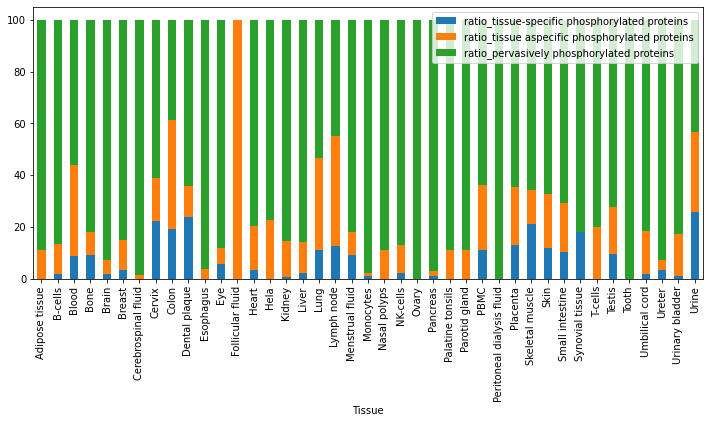

In [28]:
df_combined_all_STY[["Tissue", "ratio_tissue-specific phosphorylated proteins", "ratio_tissue aspecific phosphorylated proteins", "ratio_pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(12,5), stacked=True)
plt.savefig("WP1 relative tissue-specific proteins distribution.png", format="png", bbox_inches="tight")

In [29]:
df_combined_all_STY[df_combined_all_STY["number of tissue-specific phosphorylated proteins"]==0]

Tissue  \
0              Adipose tissue   
10                  Esophagus   
12           Follicular fluid   
14                       Hela   
21               Nasal polyps   
25           Palatine tonsils   
26              Parotid gland   
28  Peritoneal dialysis fluid   
34                    T-cells   
36                      Tooth   

    number of tissue-specific phosphorylated proteins  \
0                                                   0   
10                                                  0   
12                                                  0   
14                                                  0   
21                                                  0   
25                                                  0   
26                                                  0   
28                                                  0   
34                                                  0   
36                                                  0   

    number of tissue aspecific phosphorylated proteins  \
0                                                  39    
10                                                  2    
12                                                  1    
14                                                 15    
21                                                 12    
25                                                 12    
26                                                 12    
28                                                  0    
34                                                  2    
36                                                  0    

    number of pervasively phosphorylated proteins  Total  \
0                                             311    350   
10                                             49     51   
12                                              0      1   
14                                             51     66   
21                                             96    108   
25                                             96    108   
26                                             96    108   
28                                              2      2   
34                                              8     10   
36                                              1      1   

    ratio_tissue-specific phosphorylated proteins  \
0                                             0.0   
10                                            0.0   
12                                            0.0   
14                                            0.0   
21                                            0.0   
25                                            0.0   
26                                            0.0   
28                                            0.0   
34                                            0.0   
36                                            0.0   

    ratio_tissue aspecific phosphorylated proteins  \
0                                        11.142857   
10                                        3.921569   
12                                      100.000000   
14                                       22.727273   
21                                       11.111111   
25                                       11.111111   
26                                       11.111111   
28                                        0.000000   
34                                       20.000000   
36                                        0.000000   

    ratio_pervasively phosphorylated proteins  
0                                   88.857143  
10                                  96.078431  
12                                   0.000000  
14                                  77.272727  
21                                  88.888889  
25                                  88.888889  
26                                  88.888889  
28                                 100.000000  
34                                  80.000000  
36                                 100.000000

In [30]:
#df_combined_all_STY.to_csv("number of three categories per tissue.tsv", sep="\t", index=False)

In [31]:
print(STY_t_spec_prot.shape[0])
print(STY_non_t_spec_prot.shape[0]) #between 1 and 4
print(STY_general_prot.shape[0]) #5 or more

2029
2074
1752


In [32]:
#STY_t_spec_prot.to_csv("1.1 tissue-specific proteins.tsv", sep="\t", index=False)
#STY_non_t_spec_prot.to_csv("1.1 non tissue-specific proteins.tsv", sep="\t", index=False)
#STY_general_prot.to_csv("1.1 general P proteins", sep="\t", index=False)

### looking at organ systems

We'll now have a look at the organ-specific protein phosphorylation. There are eleven organ systems considered here: circulatory system, digestive system, endocirne system, immune system and lymfatic system, integumentary system, muscular system, nervous system, reproductive system, respiratory system, skeletal system and urinary and renal system.

In [33]:
list_systems = ["Circulatory system", "Digestive system", "Endocrine system", "Immune system and lymfatic system",
                "Integumentary system", "Muscular system", "Nervous system", "Reproductive system", "Respiratory system",
                "Skeletal system", "Urinary and renal system"]
#data_protein_STY.drop(["Bronchoalveolar lavage", "Cartilage", "Sputum"] , axis=1, inplace=True)
list_circulatory = ["Blood", "Cerebrospinal fluid", "Peritoneal dialysis fluid"]
list_reproductive = ["Breast", "Cervix", "Follicular fluid", "Hela", "Menstrual fluid", "Ovary", "Placenta", "Testis",
                    "Umbilical cord"]
list_digestive = ["Colon", "Dental plaque", "Esophagus", "Liver", "Parotid gland", "Pancreas", "Small intestine",
                 "Tooth"]
list_respiratory = ["Lung", "Nasal polyps"]
list_urinary = ["Kidney", "Ureter", "Urinary bladder", "Urine"]
list_endocrine = ["Adipose tissue"]
list_integumentary = ["Skin"]
list_immune = ["B-cells", "Lymph node", "Monocytes", "NK-cells", "Palatine tonsil", "PBMC", "T-cells"]
list_muscular = ["Heart", "Skeletal muscle"]
list_nervous = ["Brain", "Eye"]
list_skeletal = ["Bone", "Synovial tissue"]
#list_tissues.remove("Bronchoalveolar lavage") #these tissues no longer have any data when we remove the non-STY sites
#list_tissues.remove("Cartilage")
#list_tissues.remove("Sputum") -> removed these
for system in list_systems:
    data_protein_STY.loc[:, system]=0
for tissue in list_tissues_STY:
    if tissue in list_circulatory:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Circulatory system"]=1
    if tissue in list_digestive:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Digestive system"]=1
    if tissue in list_endocrine:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Endocrine system"]=1
    if tissue in list_immune:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Immune system and lymfatic system"]=1
    if tissue in list_integumentary:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Integumentary system"]=1
    if tissue in list_muscular:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Muscular system"]=1
    if tissue in list_nervous:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Nervous system"]=1
    if tissue in list_reproductive:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Reproductive system"]=1
    if tissue in list_respiratory:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Respiratory system"]=1
    if tissue in list_skeletal:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Skeletal system"]=1
    if tissue in list_urinary:
        data_protein_STY.loc[data_protein_STY[tissue]==1, "Urinary and renal system"]=1
data_protein_STY["Total_systems"] = data_protein_STY[list_systems].sum(axis=1)
data_protein_STY.head()

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
0  A0A075B6H7               0        0      0     0      0       0   
1  A0A075B6S5               0        0      0     0      0       0   
2  A0A087WXM9               0        0      0     0      0       0   
3  A0A0B4J2D5               0        0      0     0      0       0   
4  A0A0B4J2D9               0        0      1     0      0       0   

   Cerebrospinal fluid  Cervix  Colon  ...  Endocrine system  \
0                    0       0      0  ...                 0   
1                    0       0      0  ...                 0   
2                    0       0      0  ...                 0   
3                    0       0      0  ...                 0   
4                    0       0      0  ...                 0   

   Immune system and lymfatic system  Integumentary system  Muscular system  \
0                                  0                     0                0   
1                                  0                     0                0   
2                                  0                     0                0   
3                                  1                     0                0   
4                                  0                     0                0   

   Nervous system  Reproductive system  Respiratory system  Skeletal system  \
0               0                    0                   1                0   
1               0                    1                   0                0   
2               0                    1                   0                0   
3               0                    0                   0                0   
4               0                    0                   0                0   

   Urinary and renal system  Total_systems  
0                         0              1  
1                         0              1  
2                         0              1  
3                         0              1  
4                         0              1  

[5 rows x 55 columns]

We'll now be looking at the proteins seen in two organ systems.

In [34]:
two_groups = data_protein_STY[(data_protein_STY["Total_systems"]==2)]
two_groups["system 1"] = 0
two_groups["system 2"] = 0
for system in list_systems:
    two_groups.loc[(two_groups[system]==1) & (two_groups["system 1"]!=0), "system 2"]=system
    two_groups.loc[(two_groups[system]==1) & (two_groups["system 1"]==0), "system 1"]=system
two_groups.head()

C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/3571387104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_groups["system 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/3571387104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_groups["system 2"] = 0
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
7   A0A0C4DH36               0        0      1     0      0       0   
18      A0AVK6               0        0      1     0      0       0   
22      A0M8Q6               0        0      0     0      0       0   
29      A1L390               0        0      0     0      0       0   
40      A3KN83               0        0      0     0      0       0   

    Cerebrospinal fluid  Cervix  Colon  ...  Integumentary system  \
7                     0       0      0  ...                     0   
18                    0       0      1  ...                     0   
22                    0       0      0  ...                     0   
29                    0       0      1  ...                     0   
40                    0       0      1  ...                     0   

    Muscular system  Nervous system  Reproductive system  Respiratory system  \
7                 0               0                    0                   1   
18                0               0                    0                   0   
22                0               0                    0                   1   
29                0               0                    0                   0   
40                0               0                    0                   0   

    Skeletal system  Urinary and renal system  Total_systems  \
7                 0                         0              2   
18                0                         0              2   
22                0                         0              2   
29                0                         0              2   
40                0                         0              2   

              system 1                           system 2  
7   Circulatory system                 Respiratory system  
18  Circulatory system                   Digestive system  
22    Digestive system                 Respiratory system  
29    Digestive system  Immune system and lymfatic system  
40    Digestive system  Immune system and lymfatic system  

[5 rows x 57 columns]

The amount of proteins seen in these groups seems more correlated to the fact that these groups are large, than any real trne din specific combination of systems. The same goes for proteins seen in 3 and 4 organ systems respectively.

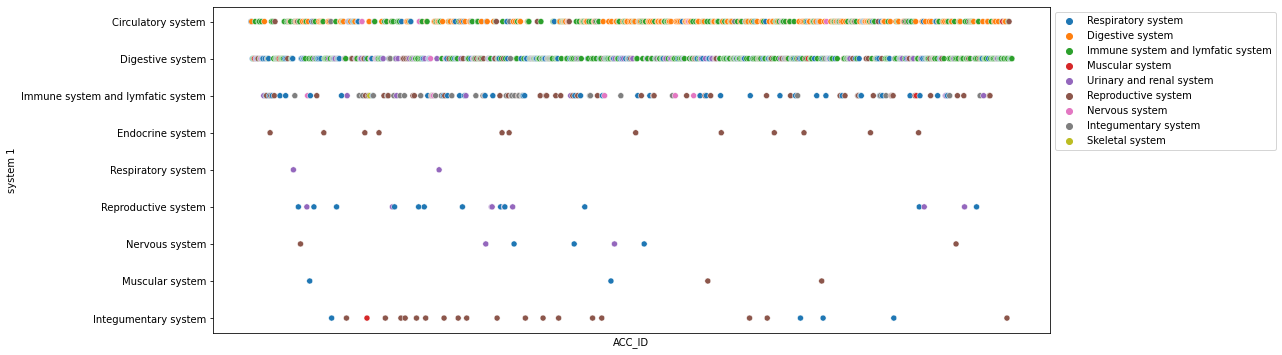

In [35]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="system 1", hue="system 2", data=two_groups)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

In [36]:
three_groups = data_protein_STY[(data_protein_STY["Total_systems"]==3)]
three_groups["system 1"] = 0
three_groups["system 2"] = 0
three_groups["system 3"] = 0
for system in list_systems:
    three_groups.loc[(three_groups[system]==1)&(three_groups["system 1"]!= 0)&(three_groups["system 2"]!= 0), "system 3"]=system
    three_groups.loc[(three_groups[system]==1)&(three_groups["system 1"]!=0)&(three_groups["system 2"]== 0), "system 2"]=system
    three_groups.loc[(three_groups[system]==1)&(three_groups["system 1"]==0), "system 1"]=system
three_groups.head()

C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/3841421529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_groups["system 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/3841421529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_groups["system 2"] = 0
C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/3841421529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
20  A0JLT2               0        0      1     0      0       0   
26  A1KXE4               0        0      1     0      0       0   
28  A1L170               0        0      1     0      0       0   
36  A2RRP1               0        0      1     0      0       0   
58  A6NFI3               0        0      0     0      1       0   

    Cerebrospinal fluid  Cervix  Colon  ...  Muscular system  Nervous system  \
20                    0       0      1  ...                0               0   
26                    0       0      1  ...                0               0   
28                    0       0      1  ...                0               0   
36                    0       0      0  ...                0               0   
58                    0       0      1  ...                0               1   

    Reproductive system  Respiratory system  Skeletal system  \
20                    0                   1                0   
26                    0                   0                0   
28                    0                   0                0   
36                    1                   0                0   
58                    0                   0                0   

    Urinary and renal system  Total_systems            system 1  \
20                         0              3  Circulatory system   
26                         0              3  Circulatory system   
28                         0              3  Circulatory system   
36                         0              3  Circulatory system   
58                         0              3    Digestive system   

                             system 2                           system 3  
20                   Digestive system                 Respiratory system  
26                   Digestive system  Immune system and lymfatic system  
28                   Digestive system  Immune system and lymfatic system  
36  Immune system and lymfatic system                Reproductive system  
58  Immune system and lymfatic system                     Nervous system  

[5 rows x 58 columns]

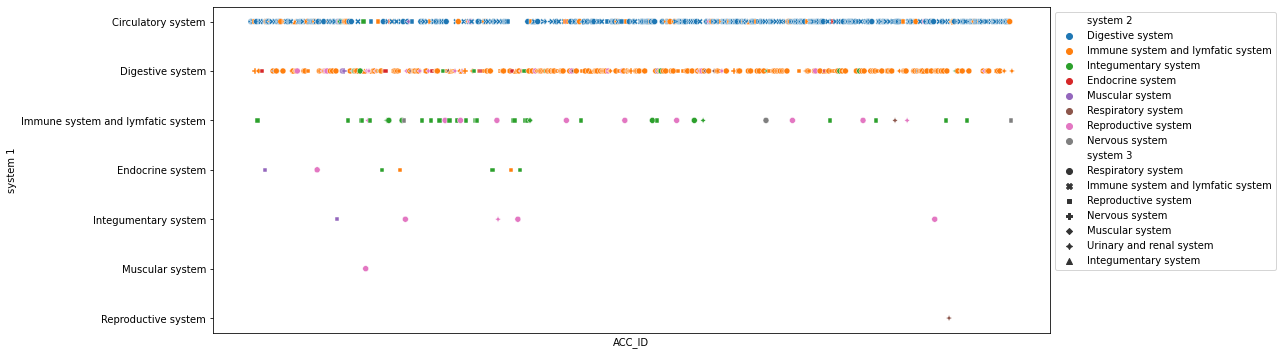

In [37]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="system 1", hue="system 2", style="system 3", data=three_groups)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

In [38]:
four_groups = data_protein_STY[(data_protein_STY["Total_systems"]==4)]
four_groups["system 1"] = 0
four_groups["system 2"] = 0
four_groups["system 3"] = 0
four_groups["system 4"] = 0
for system in list_systems:
    four_groups.loc[(four_groups[system]==1)&(four_groups["system 3"]!= 0), "system 4"]=system
    four_groups.loc[(four_groups[system]==1)&(four_groups["system 2"]!= 0)&(four_groups["system 3"]== 0), "system 3"]=system
    four_groups.loc[(four_groups[system]==1)&(four_groups["system 1"]!=0)&(four_groups["system 2"]== 0), "system 2"]=system
    four_groups.loc[(four_groups[system]==1)&(four_groups["system 1"]==0), "system 1"]=system
four_groups.head()

C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/1736444779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_groups["system 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/1736444779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_groups["system 2"] = 0
C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/1736444779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
19   A0FGR8               0        0      1     0      0       0   
23   A0MZ66               0        0      1     0      0       0   
75   A8CG34               0        0      1     0      0       0   
77   A8MT19               0        0      1     0      0       0   
114  O00161               0        0      1     0      0       0   

     Cerebrospinal fluid  Cervix  Colon  ...  Nervous system  \
19                     0       0      1  ...               0   
23                     0       0      1  ...               0   
75                     0       0      1  ...               0   
77                     0       0      1  ...               0   
114                    0       0      1  ...               0   

     Reproductive system  Respiratory system  Skeletal system  \
19                     1                   0                0   
23                     1                   0                0   
75                     0                   1                0   
77                     1                   1                0   
114                    1                   0                0   

     Urinary and renal system  Total_systems            system 1  \
19                          0              4  Circulatory system   
23                          0              4  Circulatory system   
75                          0              4  Circulatory system   
77                          0              4  Circulatory system   
114                         0              4  Circulatory system   

             system 2                           system 3             system 4  
19   Digestive system  Immune system and lymfatic system  Reproductive system  
23   Digestive system  Immune system and lymfatic system  Reproductive system  
75   Digestive system  Immune system and lymfatic system   Respiratory system  
77   Digestive system                Reproductive system   Respiratory system  
114  Digestive system  Immune system and lymfatic system  Reproductive system  

[5 rows x 59 columns]

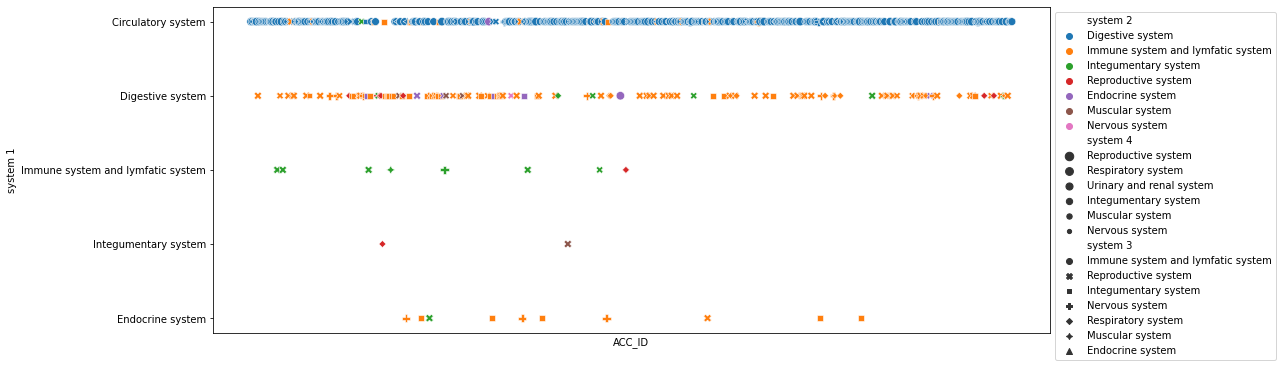

In [39]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="system 1", hue="system 2", style="system 3", size="system 4", data=four_groups)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

We'll now invesitgate whether proteins seen in two tissues are always seen in the same combination of tissues, or in the same organ system.

In [40]:
data_protein_two_tissues = data_protein_STY[data_protein_STY["Total"]==2]
list_tissues_2_tissues = ['Adipose tissue', 'B-cells', 'Blood', 'Bone', 'Brain',
       'Breast', 'Cerebrospinal fluid', 'Cervix', 'Colon', 'Dental plaque',
       'Esophagus', 'Eye', 'Follicular fluid', 'Heart', 'Hela', 'Kidney',
       'Liver', 'Lung', 'Lymph node', 'Menstrual fluid', 'Monocytes',
       'Nasal polyps', 'NK-cells', 'Ovary', 'Pancreas', 'Palatine tonsils',
       'Parotid gland', 'PBMC', 'Peritoneal dialysis fluid', 'Placenta',
       'Skeletal muscle', 'Skin', 'Small intestine', 'Synovial tissue',
       'T-cells', 'Testis', 'Tooth', 'Umbilical cord', 'Ureter',
       'Urinary bladder', 'Urine'] # not all tissues have proteins expressed in two tissues -> new list
data_protein_two_tissues["tissue 1"] = 0
data_protein_two_tissues["tissue 2"] = 0
data_protein_two_tissues["system 1"] = 0
data_protein_two_tissues["system 2"] = 0
for tissue in list_tissues_2_tissues:
    data_protein_two_tissues.loc[((data_protein_two_tissues[tissue]==1)&(data_protein_two_tissues["tissue 1"]!=0)),
                                 "tissue 2"]=tissue
    data_protein_two_tissues.loc[((data_protein_two_tissues[tissue]==1)&(data_protein_two_tissues["tissue 1"]==0)),
                                 "tissue 1"]=tissue
for system in list_systems:
    data_protein_two_tissues.loc[((data_protein_two_tissues[system]==1)&(data_protein_two_tissues["system 1"]!=0)),
                                "system 2"]=system
    data_protein_two_tissues.loc[((data_protein_two_tissues[system]==1)&(data_protein_two_tissues["system 1"]==0)),
                                "system 1"]=system
    data_protein_two_tissues.loc[((data_protein_two_tissues[system]==1)&(data_protein_two_tissues["Total_systems"]==1)),
                                "system 2"]=system

C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/1069301672.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_protein_two_tissues["tissue 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/1069301672.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_protein_two_tissues["tissue 2"] = 0
C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/1069301672.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [41]:
print(data_protein_two_tissues.shape[0])
data_protein_two_tissues.head()

965


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
7   A0A0C4DH36               0        0      1     0      0       0   
18      A0AVK6               0        0      1     0      0       0   
29      A1L390               0        0      0     0      0       0   
40      A3KN83               0        0      0     0      0       0   
43      A4UGR9               0        0      0     0      0       0   

    Cerebrospinal fluid  Cervix  Colon  ...  Nervous system  \
7                     0       0      0  ...               0   
18                    0       0      1  ...               0   
29                    0       0      1  ...               0   
40                    0       0      1  ...               0   
43                    0       0      1  ...               0   

    Reproductive system  Respiratory system  Skeletal system  \
7                     0                   1                0   
18                    0                   0                0   
29                    0                   0                0   
40                    0                   0                0   
43                    0                   0                0   

    Urinary and renal system  Total_systems  tissue 1         tissue 2  \
7                          0              2     Blood             Lung   
18                         0              2     Blood            Colon   
29                         0              2     Colon       Lymph node   
40                         0              2     Colon       Lymph node   
43                         0              2     Colon  Skeletal muscle   

              system 1                           system 2  
7   Circulatory system                 Respiratory system  
18  Circulatory system                   Digestive system  
29    Digestive system  Immune system and lymfatic system  
40    Digestive system  Immune system and lymfatic system  
43    Digestive system                    Muscular system  

[5 rows x 59 columns]

There are 96 possible combination of tissues for proteins seen in two tissues. These seem linked to the amount of proteins seen in the tissues. The same goes for the combination of organ systems.

In [42]:
two_tissues_counts = data_protein_two_tissues.groupby(["tissue 1", "tissue 2"], as_index=False)["ACC_ID"].count()
print(two_tissues_counts.shape[0])
two_tissues_counts.sort_values(by=["ACC_ID"], ascending=False).head(30)
# compared to 960 something proteins expressed in two tissues

96


tissue 1         tissue 2  ACC_ID
35           Colon       Lymph node     191
4            Blood            Colon     172
9            Blood       Lymph node      95
34           Colon             Lung      86
8            Blood             Lung      35
58            Lung       Lymph node      34
38           Colon         Placenta      23
79            PBMC             Skin      21
68      Lymph node             PBMC      21
71      Lymph node           Testis      16
69      Lymph node         Placenta      14
33           Colon            Liver      13
42           Colon           Testis      12
0   Adipose tissue   Umbilical cord      11
11           Blood             PBMC      11
12           Blood         Placenta      10
49            Hela         Pancreas      10
61            Lung         Placenta       8
37           Colon             PBMC       8
92            Skin   Umbilical cord       8
86        Placenta             Skin       8
70      Lymph node             Skin       8
40           Colon             Skin       6
89        Placenta  Urinary bladder       6
78            PBMC         Placenta       5
14           Blood             Skin       5
67      Lymph node         NK-cells       5
62            Lung             Skin       4
59            Lung             PBMC       4
87        Placenta  Small intestine       4

In [43]:
two_tissues_counts.sort_values(["tissue 1","tissue 2"], inplace=True)
two_tissues_counts

tissue 1        tissue 2  ACC_ID
0    Adipose tissue  Umbilical cord      11
1           B-cells           Blood       4
2           B-cells      Lymph node       4
3             Blood           Brain       2
4             Blood           Colon     172
..              ...             ...     ...
91  Skeletal muscle            Skin       1
92             Skin  Umbilical cord       8
93  Small intestine          Testis       1
94  Small intestine           Urine       1
95           Testis          Ureter       1

[96 rows x 3 columns]

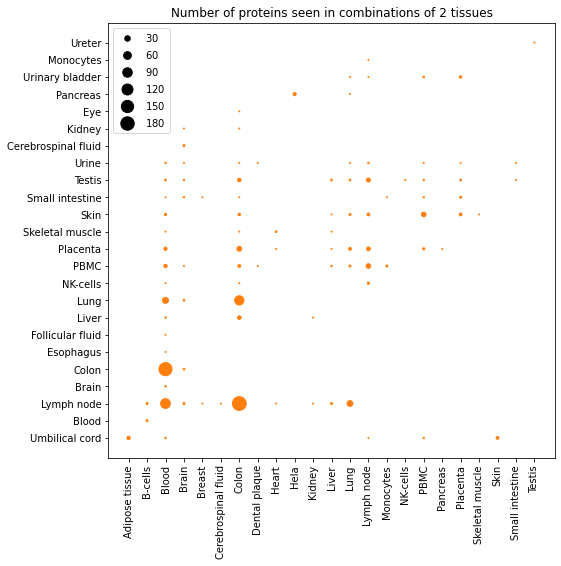

In [44]:
plt.figure(figsize=(8,8))
sc = plt.scatter(x=two_tissues_counts["tissue 1"], y=two_tissues_counts["tissue 2"], s=two_tissues_counts["ACC_ID"], color="tab:orange")
plt.xticks(rotation=90)
plt.title("Number of proteins seen in combinations of 2 tissues")
plt.legend(*sc.legend_elements("sizes", num=6))
#plt.savefig("WP1 proteins_two_tissues.png", format="png", bbox_inches="tight")
plt.show()

In [45]:
two_tissues_counts_system = data_protein_two_tissues.groupby(["system 1", "system 2"], as_index=False)["ACC_ID"].count()
two_tissues_counts_system.sort_values(by=["ACC_ID"], ascending=False, inplace=True)
print(two_tissues_counts_system.shape[0])
two_tissues_counts_system.head()

36


system 1                           system 2  ACC_ID
9     Digestive system  Immune system and lymfatic system     210
0   Circulatory system                   Digestive system     176
1   Circulatory system  Immune system and lymfatic system     112
14    Digestive system                 Respiratory system      87
13    Digestive system                Reproductive system      56

In [46]:
two_tissues_counts_sorted=pd.DataFrame({})
list_tissue1 = []
list_tissue2 = []
for tissue1 in list_tissues_STY:
    for tissue2 in list_tissues_STY:
        list_tissue1.append(tissue1)
        list_tissue2.append(tissue2)
print(len(list_tissue1))
print(len(list_tissue2))
two_tissues_counts_sorted["tissue 1"] = list_tissue1
two_tissues_counts_sorted["tissue 2"] = list_tissue2
two_tissues_counts_sorted["protein_count"] = 0



1681
1681


In [47]:
two_tissues_counts_sorted_all = pd.merge(two_tissues_counts_sorted, two_tissues_counts, on=["tissue 1", "tissue 2"], how="outer")

In [48]:
two_tissues_counts_sorted_all.fillna(0, inplace=True)
two_tissues_counts_sorted_all#.sort_values(by=["ACC_ID"], ascending=False, inplace=False)

tissue 1         tissue 2  protein_count  ACC_ID
0     Adipose tissue   Adipose tissue              0     0.0
1     Adipose tissue          B-cells              0     0.0
2     Adipose tissue            Blood              0     0.0
3     Adipose tissue             Bone              0     0.0
4     Adipose tissue            Brain              0     0.0
...              ...              ...            ...     ...
1676           Urine            Tooth              0     0.0
1677           Urine   Umbilical cord              0     0.0
1678           Urine           Ureter              0     0.0
1679           Urine  Urinary bladder              0     0.0
1680           Urine            Urine              0     0.0

[1681 rows x 4 columns]

In [49]:
two_tissues_counts_sorted = two_tissues_counts_sorted_all.loc[(~(two_tissues_counts_sorted_all==0).all(axis=1))|(two_tissues_counts_sorted_all["tissue 1"]=="Adipose tissue")]
two_tissues_counts_sorted.head(50)

tissue 1                   tissue 2  protein_count  ACC_ID
0   Adipose tissue             Adipose tissue              0     0.0
1   Adipose tissue                    B-cells              0     0.0
2   Adipose tissue                      Blood              0     0.0
3   Adipose tissue                       Bone              0     0.0
4   Adipose tissue                      Brain              0     0.0
5   Adipose tissue                     Breast              0     0.0
6   Adipose tissue        Cerebrospinal fluid              0     0.0
7   Adipose tissue                     Cervix              0     0.0
8   Adipose tissue                      Colon              0     0.0
9   Adipose tissue              Dental plaque              0     0.0
10  Adipose tissue                  Esophagus              0     0.0
11  Adipose tissue                        Eye              0     0.0
12  Adipose tissue           Follicular fluid              0     0.0
13  Adipose tissue                      Heart              0     0.0
14  Adipose tissue                       Hela              0     0.0
15  Adipose tissue                     Kidney              0     0.0
16  Adipose tissue                      Liver              0     0.0
17  Adipose tissue                       Lung              0     0.0
18  Adipose tissue                 Lymph node              0     0.0
19  Adipose tissue            Menstrual fluid              0     0.0
20  Adipose tissue                  Monocytes              0     0.0
21  Adipose tissue               Nasal polyps              0     0.0
22  Adipose tissue                   NK-cells              0     0.0
23  Adipose tissue                      Ovary              0     0.0
24  Adipose tissue                   Pancreas              0     0.0
25  Adipose tissue           Palatine tonsils              0     0.0
26  Adipose tissue              Parotid gland              0     0.0
27  Adipose tissue                       PBMC              0     0.0
28  Adipose tissue  Peritoneal dialysis fluid              0     0.0
29  Adipose tissue                   Placenta              0     0.0
30  Adipose tissue            Skeletal muscle              0     0.0
31  Adipose tissue                       Skin              0     0.0
32  Adipose tissue            Small intestine              0     0.0
33  Adipose tissue            Synovial tissue              0     0.0
34  Adipose tissue                    T-cells              0     0.0
35  Adipose tissue                     Testis              0     0.0
36  Adipose tissue                      Tooth              0     0.0
37  Adipose tissue             Umbilical cord              0    11.0
38  Adipose tissue                     Ureter              0     0.0
39  Adipose tissue            Urinary bladder              0     0.0
40  Adipose tissue                      Urine              0     0.0
41         B-cells             Adipose tissue              0     0.0
42         B-cells                    B-cells              0     0.0
43         B-cells                      Blood              0     4.0
44         B-cells                       Bone              0     0.0
45         B-cells                      Brain              0     0.0
46         B-cells                     Breast              0     0.0
47         B-cells        Cerebrospinal fluid              0     0.0
48         B-cells                     Cervix              0     0.0
49         B-cells                      Colon              0     0.0

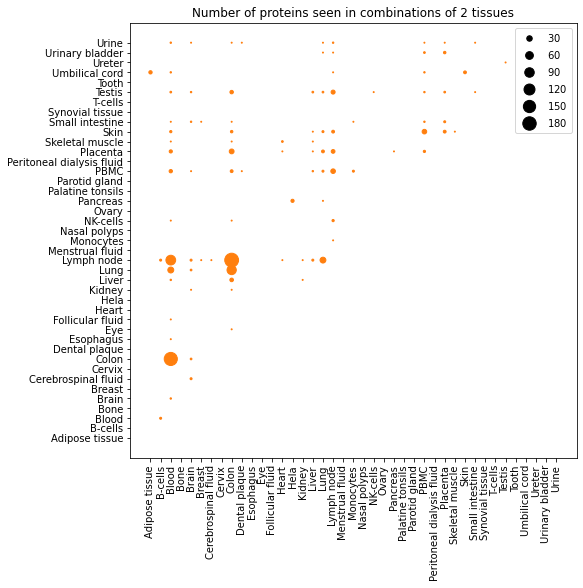

In [50]:
plt.figure(figsize=(8,8))
sc = plt.scatter(x=two_tissues_counts_sorted["tissue 1"], y=two_tissues_counts_sorted["tissue 2"], s=two_tissues_counts_sorted["ACC_ID"], color="tab:orange")
plt.xticks(rotation=90)
plt.title("Number of proteins seen in combinations of 2 tissues")
plt.legend(*sc.legend_elements("sizes", num=6))
#plt.savefig("WP1 proteins_two_tissues_sorted.png", format="png", bbox_inches="tight")
plt.show()

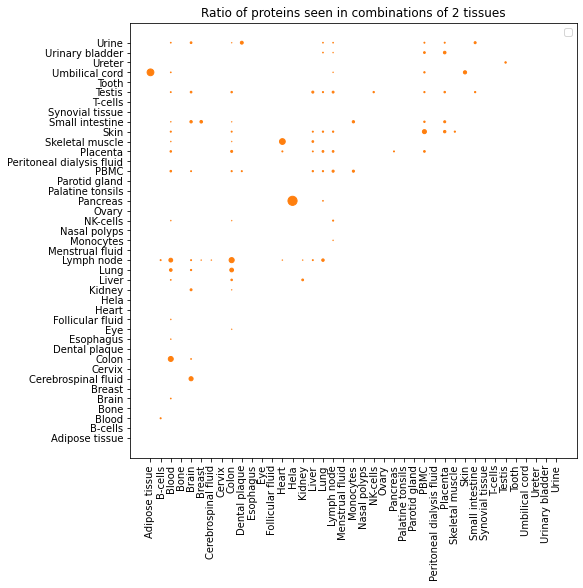

In [51]:
list_counts = []
for tissue in list_tissues_STY:
    for tissue2 in list_tissues_STY:
        count = data_protein_two_tissues.loc[(data_protein_two_tissues[tissue]==1)|(data_protein_two_tissues[tissue2]==1), "ACC_ID"].count()
        list_counts.append(count)
two_tissues_counts_sorted["Total"] = list_counts
two_tissues_counts_sorted["Ratio"] = two_tissues_counts_sorted["ACC_ID"]*100/two_tissues_counts_sorted["Total"]


plt.figure(figsize=(8,8))
sc = plt.scatter(x=two_tissues_counts_sorted["tissue 1"], y=two_tissues_counts_sorted["tissue 2"], s=two_tissues_counts_sorted["Ratio"], color="tab:orange")
plt.xticks(rotation=90)
plt.title("Ratio of proteins seen in combinations of 2 tissues")
plt.legend(*sc.legend_elements("sizes", num=1))
#plt.savefig("WP1 proteins_two_tissues_sorted.png", format="png", bbox_inches="tight")
plt.show()

In [52]:
three_tissues = data_protein_STY[data_protein_STY["Total"]==3]
print(three_tissues.shape[0])
three_tissues.head()

595


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
20  A0JLT2               0        0      1     0      0       0   
26  A1KXE4               0        0      1     0      0       0   
28  A1L170               0        0      1     0      0       0   
36  A2RRP1               0        0      1     0      0       0   
58  A6NFI3               0        0      0     0      1       0   

    Cerebrospinal fluid  Cervix  Colon  ...  Endocrine system  \
20                    0       0      1  ...                 0   
26                    0       0      1  ...                 0   
28                    0       0      1  ...                 0   
36                    0       0      0  ...                 0   
58                    0       0      1  ...                 0   

    Immune system and lymfatic system  Integumentary system  Muscular system  \
20                                  0                     0                0   
26                                  1                     0                0   
28                                  1                     0                0   
36                                  1                     0                0   
58                                  1                     0                0   

    Nervous system  Reproductive system  Respiratory system  Skeletal system  \
20               0                    0                   1                0   
26               0                    0                   0                0   
28               0                    0                   0                0   
36               0                    1                   0                0   
58               1                    0                   0                0   

    Urinary and renal system  Total_systems  
20                         0              3  
26                         0              3  
28                         0              3  
36                         0              3  
58                         0              3  

[5 rows x 55 columns]

In [53]:
three_tissues.loc[:, "Tissue 1"] = 0
three_tissues.loc[:, "Tissue 2"] = 0
three_tissues.loc[:, "Tissue 3"] = 0
for tissue in list_tissues_STY:
    three_tissues.loc[((three_tissues[tissue]==1)&(three_tissues["Tissue 1"]!=0)&(three_tissues["Tissue 2"]!=0)&(three_tissues["Tissue 3"]==0)), "Tissue 3"] = tissue
    three_tissues.loc[((three_tissues[tissue]==1)&(three_tissues["Tissue 1"]!=0)&(three_tissues["Tissue 2"]==0)), "Tissue 2"] = tissue
    three_tissues.loc[((three_tissues[tissue]==1)&(three_tissues["Tissue 1"]==0)), "Tissue 1"] = tissue

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [54]:
three_grouped = three_tissues.groupby(["Tissue 1", "Tissue 2", "Tissue 3"], as_index=False)["ACC_ID"].nunique()
three_grouped

Tissue 1         Tissue 2         Tissue 3  ACC_ID
0     Adipose tissue            Blood   Umbilical cord       3
1     Adipose tissue            Colon   Umbilical cord       3
2     Adipose tissue             Lung   Umbilical cord       1
3     Adipose tissue       Lymph node   Umbilical cord       1
4     Adipose tissue             PBMC   Umbilical cord       1
..               ...              ...              ...     ...
128             PBMC  Small intestine   Umbilical cord       1
129         Placenta             Skin           Testis       1
130         Placenta             Skin   Umbilical cord       1
131  Skeletal muscle             Skin   Umbilical cord       1
132             Skin   Umbilical cord  Urinary bladder       1

[133 rows x 4 columns]

In [55]:
three_grouped["ACC_ID"].value_counts()

1      90
2      16
3       9
4       4
5       3
7       2
14      2
87      1
136     1
12      1
16      1
102     1
9       1
11      1
Name: ACC_ID, dtype: int64

In [56]:
three_grouped[three_grouped["ACC_ID"]>1]

Tissue 1          Tissue 2         Tissue 3  ACC_ID
0    Adipose tissue             Blood   Umbilical cord       3
1    Adipose tissue             Colon   Umbilical cord       3
7    Adipose tissue              Skin   Umbilical cord       2
8    Adipose tissue   Small intestine   Umbilical cord       3
9           B-cells             Blood       Lymph node       4
14            Blood             Colon            Liver       5
15            Blood             Colon             Lung      87
16            Blood             Colon       Lymph node     136
17            Blood             Colon             PBMC       2
18            Blood             Colon         Placenta      12
20            Blood             Colon           Testis       2
23            Blood             Liver       Lymph node       2
25            Blood              Lung       Lymph node      16
26            Blood              Lung             PBMC       2
27            Blood              Lung         Placenta       2
31            Blood        Lymph node         NK-cells       2
32            Blood        Lymph node             PBMC       7
33            Blood        Lymph node         Placenta       5
34            Blood        Lymph node             Skin       2
35            Blood        Lymph node           Testis       3
37            Blood              PBMC         Placenta       2
43            Brain             Colon       Lymph node       7
61            Colon             Liver             Lung       4
62            Colon             Liver       Lymph node      14
65            Colon             Liver           Testis       2
68            Colon              Lung       Lymph node     102
69            Colon              Lung             PBMC       2
71            Colon              Lung             Skin       4
72            Colon              Lung           Testis       3
73            Colon        Lymph node         NK-cells       3
74            Colon        Lymph node             PBMC       3
75            Colon        Lymph node         Placenta       9
76            Colon        Lymph node  Skeletal muscle       2
78            Colon        Lymph node           Testis      11
81            Colon              PBMC             Skin       4
90            Heart              Lung  Skeletal muscle       2
102           Liver              PBMC  Small intestine       2
104            Lung        Lymph node         Placenta       3
107            Lung        Lymph node   Umbilical cord       2
109            Lung              PBMC             Skin       2
121    Nasal polyps  Palatine tonsils    Parotid gland       5
123            PBMC          Placenta           Testis       3
127            PBMC              Skin   Umbilical cord      14

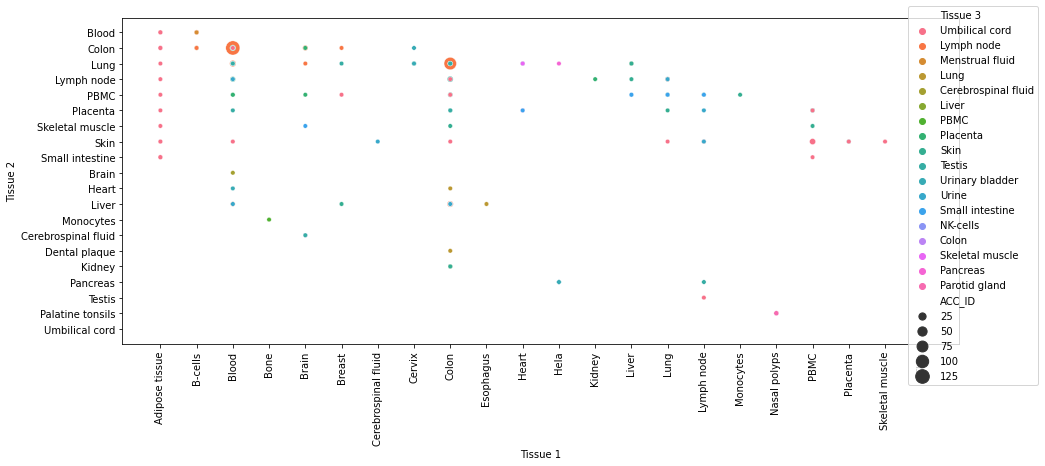

In [57]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=three_grouped, x="Tissue 1", y="Tissue 2", size="ACC_ID", hue="Tissue 3", sizes=(20,200)).legend(loc="upper right", bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=90)
plt.show()

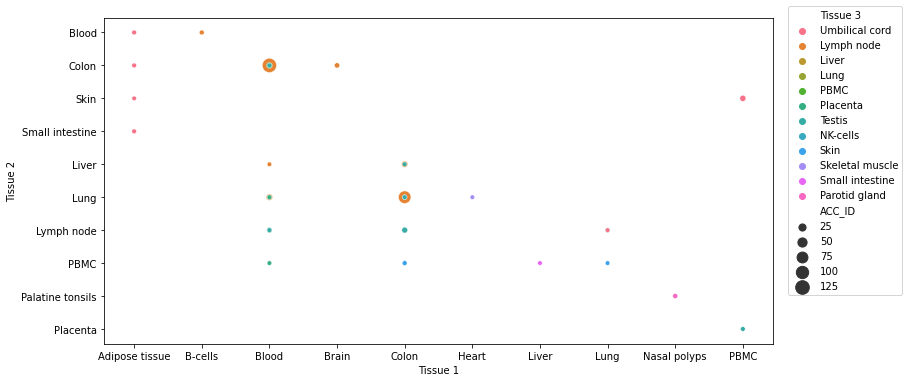

In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=three_grouped[three_grouped["ACC_ID"]>1], x="Tissue 1", y="Tissue 2", size="ACC_ID", hue="Tissue 3", sizes=(20,200)).legend(loc="upper right", bbox_to_anchor=(1.2, 1.05))
#plt.xticks(rotation=90)
plt.show()

In [59]:
four_tissues = data_protein_STY[data_protein_STY["Total"]==4]
four_tissues

ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
22    A0M8Q6               0        0      0     0      0       0   
23    A0MZ66               0        0      1     0      0       0   
49    A6NCF6               0        0      0     0      0       0   
52    A6ND91               0        0      0     0      0       0   
75    A8CG34               0        0      1     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
5812  Q9Y624               0        0      1     0      0       0   
5819  Q9Y6A5               0        0      1     0      0       0   
5824  Q9Y6E0               0        0      1     0      0       0   
5836  Q9Y6M7               0        0      1     0      0       0   
5846  Q9Y6R9               0        0      0     0      1       0   

      Cerebrospinal fluid  Cervix  Colon  ...  Endocrine system  \
22                      0       0      0  ...                 0   
23                      0       0      1  ...                 0   
49                      0       0      1  ...                 0   
52                      0       0      1  ...                 0   
75                      0       0      1  ...                 0   
...                   ...     ...    ...  ...               ...   
5812                    0       0      1  ...                 0   
5819                    0       0      1  ...                 0   
5824                    0       0      1  ...                 0   
5836                    0       0      1  ...                 0   
5846                    0       0      0  ...                 0   

      Immune system and lymfatic system  Integumentary system  \
22                                    0                     0   
23                                    1                     0   
49                                    0                     0   
52                                    0                     0   
75                                    1                     0   
...                                 ...                   ...   
5812                                  1                     0   
5819                                  0                     0   
5824                                  1                     0   
5836                                  1                     0   
5846                                  1                     0   

      Muscular system  Nervous system  Reproductive system  \
22                  0               0                    0   
23                  0               0                    1   
49                  0               0                    0   
52                  0               0                    0   
75                  0               0                    0   
...               ...             ...                  ...   
5812                0               0                    1   
5819                0               0                    0   
5824                0               0                    0   
5836                0               0                    0   
5846                0               1                    1   

      Respiratory system  Skeletal system  Urinary and renal system  \
22                     1                0                         0   
23                     0                0                         0   
49                     0                0                         1   
52                     0                0                         1   
75                     1                0                         0   
...                  ...              ...                       ...   
5812                   0                0                         0   
5819                   1                0                         0   
5824                   0                0                         1   
5836                   1                0                         0   
5846                   0                0                        

In [60]:
four_tissues.loc[:, "Tissue 1"] = 0
four_tissues.loc[:, "Tissue 2"] = 0
four_tissues.loc[:, "Tissue 3"] = 0
four_tissues.loc[:, "Tissue 4"] = 0
for tissue in list_tissues_STY:
    four_tissues.loc[(((four_tissues["Tissue 1"]!=0)&(four_tissues["Tissue 2"]!=0)&(four_tissues["Tissue 3"]!=0)&(four_tissues["Tissue 4"]==0))&(
    four_tissues[tissue]==1)), "Tissue 4"] = tissue
    four_tissues.loc[(((four_tissues["Tissue 1"]!=0)&(four_tissues["Tissue 2"]!=0)&(four_tissues["Tissue 3"]==0))&(
    four_tissues[tissue]==1)), "Tissue 3"] = tissue
    four_tissues.loc[(((four_tissues["Tissue 1"]!=0)&(four_tissues["Tissue 2"]==0))&(
    four_tissues[tissue]==1)), "Tissue 2"] = tissue
    four_tissues.loc[(((four_tissues["Tissue 1"]==0))&(
    four_tissues[tissue]==1)), "Tissue 1"] = tissue
four_tissues

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ACC_ID  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
22    A0M8Q6               0        0      0     0      0       0   
23    A0MZ66               0        0      1     0      0       0   
49    A6NCF6               0        0      0     0      0       0   
52    A6ND91               0        0      0     0      0       0   
75    A8CG34               0        0      1     0      0       0   
...      ...             ...      ...    ...   ...    ...     ...   
5812  Q9Y624               0        0      1     0      0       0   
5819  Q9Y6A5               0        0      1     0      0       0   
5824  Q9Y6E0               0        0      1     0      0       0   
5836  Q9Y6M7               0        0      1     0      0       0   
5846  Q9Y6R9               0        0      0     0      1       0   

      Cerebrospinal fluid  Cervix  Colon  ...  Nervous system  \
22                      0       0      0  ...               0   
23                      0       0      1  ...               0   
49                      0       0      1  ...               0   
52                      0       0      1  ...               0   
75                      0       0      1  ...               0   
...                   ...     ...    ...  ...             ...   
5812                    0       0      1  ...               0   
5819                    0       0      1  ...               0   
5824                    0       0      1  ...               0   
5836                    0       0      1  ...               0   
5846                    0       0      0  ...               1   

      Reproductive system  Respiratory system  Skeletal system  \
22                      0                   1                0   
23                      1                   0                0   
49                      0                   0                0   
52                      0                   0                0   
75                      0                   1                0   
...                   ...                 ...              ...   
5812                    1                   0                0   
5819                    0                   1                0   
5824                    0                   0                0   
5836                    0                   1                0   
5846                    1                   0                0   

      Urinary and renal system  Total_systems  Tissue 1      Tissue 2  \
22                           0              2      Lung  Nasal polyps   
23                           0              4     Blood         Colon   
49                           1              2     Colon        Kidney   
52                           1              2     Colon        Kidney   
75                           0              4     Blood         Colon   
...                        ...            ...       ...           ...   
5812                         0              4     Blood         Colon   
5819                         0              3     Blood         Colon   
5824                         1              4     Blood         Colon   
5836                         0              4     Blood         Colon   
5846                         0              3     Brain    Lymph node   

              Tissue 3         Tissue 4  
22    Palatine tonsils    Parotid gland  
23          Lymph node           Testis  
49               Liver  Urinary bladder  
52               Liver  Urinary bladder  
75                Lung       Lymph node  
...                ...              ...  
5812        Lymph node         Placenta  
5819             Liver             Lung  
5824              PBMC            Urine  
5836              Lung       Lymph node  
5846          Placenta           Testis  

[514 rows x 59 columns]

In [61]:
four_tissues_grouped = four_tissues.groupby(["Tissue 1", "Tissue 2", "Tissue 3", "Tissue 4"], as_index=False)["ACC_ID"].nunique()
four_tissues_grouped

Tissue 1          Tissue 2          Tissue 3         Tissue 4  \
0    Adipose tissue             Brain        Lymph node   Umbilical cord   
1    Adipose tissue             Brain              PBMC   Umbilical cord   
2    Adipose tissue             Colon        Lymph node   Umbilical cord   
3    Adipose tissue             Colon          Placenta   Umbilical cord   
4    Adipose tissue             Colon   Small intestine   Umbilical cord   
..              ...               ...               ...              ...   
120    Nasal polyps          NK-cells  Palatine tonsils    Parotid gland   
121    Nasal polyps  Palatine tonsils     Parotid gland            Urine   
122            PBMC          Placenta              Skin  Small intestine   
123            PBMC          Placenta              Skin   Umbilical cord   
124            PBMC              Skin            Testis   Umbilical cord   

     ACC_ID  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
120       1  
121       3  
122       1  
123       2  
124       1  

[125 rows x 5 columns]

In [62]:
four_tissues_grouped["ACC_ID"].value_counts()

1      82
2      19
3       7
4       5
11      3
7       2
15      1
170     1
18      1
14      1
70      1
6       1
13      1
Name: ACC_ID, dtype: int64

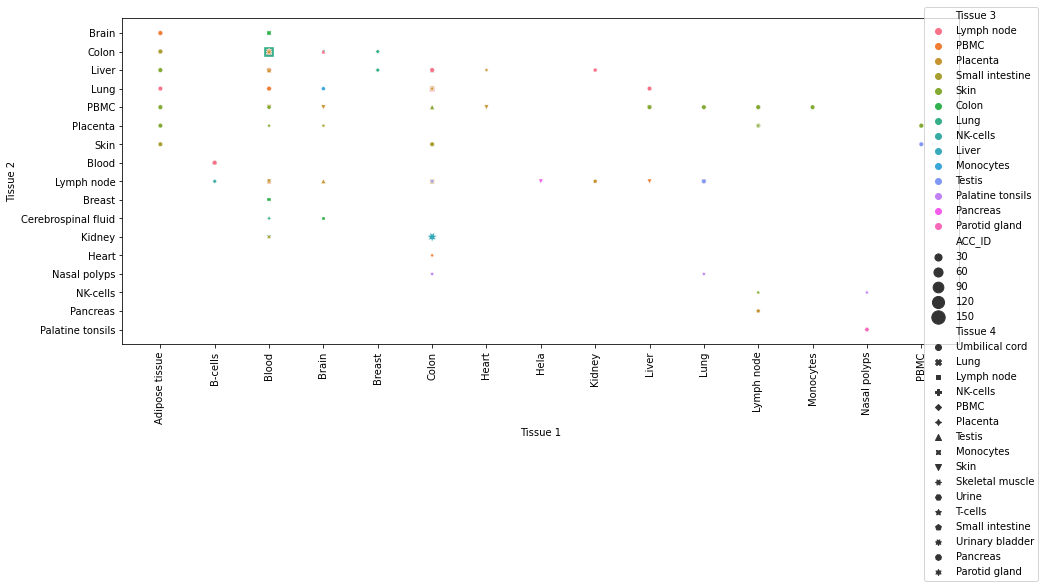

In [63]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=four_tissues_grouped, x="Tissue 1", y="Tissue 2", size="ACC_ID", hue="Tissue 3", style="Tissue 4", sizes=(20,200)).legend(loc="upper right", bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=90)
plt.show()

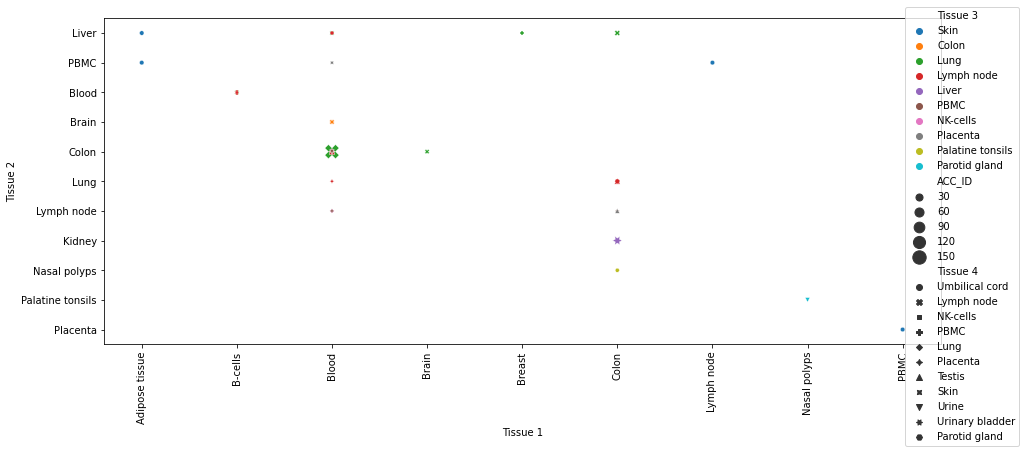

In [64]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=four_tissues_grouped[four_tissues_grouped["ACC_ID"]>1], x="Tissue 1", y="Tissue 2", size="ACC_ID", hue="Tissue 3", style="Tissue 4", sizes=(20,200)).legend(loc="upper right", bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=90)
plt.show()

In [65]:
data_enrich = pd.read_csv("phospho_data_tissue_annotation_enrichment1.txt", sep="\t")
data_enrich = data_enrich.dropna(inplace = False, subset=["tissue"])
data_enrich = data_enrich[(data_enrich["modres"]=="S")|(data_enrich["modres"]=="T")|(data_enrich["modres"]=="Y")]
data_enrich

proj            peptide modres  UP_POS  ACC_ID  pep_start  \
0       PXD000004         RPPSPEPSTK      S    2102  Q01082       2099   
3       PXD000004       AISPTSATSSGR      S     600  Q9Y4I1        598   
4       PXD000004     FYYTAGSSSPTHAK      S     198  O75508        190   
5       PXD000004      TSASIGSLCADAR      S     199  P60201        193   
9       PXD000004  SLSTSGESLYHVLGLDK      S      10  Q9H3Z4          8   
...           ...                ...    ...     ...     ...        ...   
646011  PXD011609     SFSTASAITPSVSR      S      18  P13647         16   
646012  PXD011609  SGGGFSSGSAGIINYQR      S      21  P04264         13   
646013  PXD011609  SGGGFSSGSAGIINYQR      S      21  P04264         13   
646014  PXD011609  SGGGFSSGSAGIINYQR      S      19  P04264         13   
646015  PXD011609  SGGGFSSGSAGIINYQR      S      19  P04264         13   

        pep_end tissue enrichment modification method additional  
0          2108  Brain       None         None   None       None  
3           609  Brain       None         None   None       None  
4           203  Brain       None         None   None       None  
5           205  Brain       None         None   None       None  
9            24  Brain       None         None   None       None  
...         ...    ...        ...          ...    ...        ...  
646011       29   Skin       None         None   None       None  
646012       29   Skin       None         None   None       None  
646013       29   Skin       None         None   None       None  
646014       29   Skin       None         None   None       None  
646015       29   Skin       None         None   None       None  

[377186 rows x 12 columns]

In [66]:
data_enriched = data_enrich[data_enrich["enrichment"]!="None"]
print(data_enriched.shape[0])
print(data_enriched["proj"].nunique())
print(data_enriched["ACC_ID"].nunique())
print(data_enriched.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"enrichment": "first"}).shape[0])
data_enriched.head()

313078
34
4735
17671


proj                    peptide modres  UP_POS  ACC_ID  pep_start  \
4163   PXD000605  WSPELPVCAPIICPPPSIPTFATLR      S     131  P02749        130   
38796  PXD001425           YLGNATAIFFLPDEGK      T     273  P01009        268   
38797  PXD001425      GLTFQQNASSMCVPDQDTAIR      S     212  P01871        203   
38803  PXD001425           YLGNATAIFFLPDEGK      T     273  P01009        268   
38805  PXD001425            QDQCIYNTTYLNVQR      Y      92  P02763         87   

       pep_end tissue enrichment            modification  \
4163       154  Blood        Yes  Low abundance proteins   
38796      283  Blood        Yes         N-glycosylation   
38797      223  Blood        Yes         N-glycosylation   
38803      283  Blood        Yes         N-glycosylation   
38805      101  Blood        Yes         N-glycosylation   

                                       method  \
4163   Human Multiple Affinity Removal System   
38796                  Solid Phase Extraction   
38797                  Solid Phase Extraction   
38803                  Solid Phase Extraction   
38805                  Solid Phase Extraction   

                                              additional  
4163   depletion of high abundance proteins, enrichme...  
38796                                hydrazide chemistry  
38797                                hydrazide chemistry  
38803                                hydrazide chemistry  
38805                                hydrazide chemistry

In [67]:
data_non_enriched = data_enrich[data_enrich["enrichment"]=="None"]
print(data_non_enriched.shape[0])
print(data_non_enriched["proj"].nunique())
print(data_non_enriched["ACC_ID"].nunique())
print(data_non_enriched.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"enrichment": "first"}).shape[0])
data_non_enriched.head()

64108
116
3246
10075


proj            peptide modres  UP_POS  ACC_ID  pep_start  pep_end  \
0  PXD000004         RPPSPEPSTK      S    2102  Q01082       2099     2108   
3  PXD000004       AISPTSATSSGR      S     600  Q9Y4I1        598      609   
4  PXD000004     FYYTAGSSSPTHAK      S     198  O75508        190      203   
5  PXD000004      TSASIGSLCADAR      S     199  P60201        193      205   
9  PXD000004  SLSTSGESLYHVLGLDK      S      10  Q9H3Z4          8       24   

  tissue enrichment modification method additional  
0  Brain       None         None   None       None  
3  Brain       None         None   None       None  
4  Brain       None         None   None       None  
5  Brain       None         None   None       None  
9  Brain       None         None   None       None

In [68]:
data_phospho_enriched = data_enrich[data_enrich["modification"]=="Phosphorylation"]
print(data_phospho_enriched.shape[0])
print(data_phospho_enriched["proj"].nunique())
print(data_phospho_enriched["ACC_ID"].nunique())
print(data_phospho_enriched.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"enrichment": "first"}).shape[0])
data_phospho_enriched.head()

309346
15
4540
17048


proj                      peptide modres  UP_POS  ACC_ID  \
39083  PXD002883       PSSGNIPSSPTASGGGSPTSPR      T     438  Q9UBW5   
39084  PXD002883       TSLEVSPNPEPPEKPVRTPEAK      T     478  Q9UBW5   
39085  PXD002883  EYVSNDAAQSDDEEKLQSQPTDTDGGR      S     397  Q5JSH3   
39086  PXD002883               DAEPPSPTPAGPPR      S      54  O43306   
39088  PXD002883         RESCGSSVLTDFEGKDVATK      S     469  O15231   

       pep_start  pep_end tissue enrichment     modification method additional  
39083        428      449  Blood        Yes  Phosphorylation   TiO2       None  
39084        461      482  Blood        Yes  Phosphorylation   TiO2       None  
39085        394      420  Blood        Yes  Phosphorylation   TiO2       None  
39086         49       62  Blood        Yes  Phosphorylation   TiO2       None  
39088        463      482  Blood        Yes  Phosphorylation   TiO2       None

In [69]:
both_enrich_protein = pd.merge(data_enriched, data_non_enriched, how="inner", on="ACC_ID")
both_enrich_protein["ACC_ID"].nunique()

2126

In [70]:
both_enrich_site = pd.merge(data_enriched, data_non_enriched, how="inner", on=["ACC_ID", "UP_POS", "modres"])
print(both_enrich_site.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])

3843


In [71]:
print(pd.merge(data_enriched, STY_t_spec_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())
print(pd.merge(data_enriched, STY_non_t_spec_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())
print(pd.merge(data_enriched, STY_general_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())

1385
1855
1495


In [72]:
print(pd.merge(data_non_enriched, STY_t_spec_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())
print(pd.merge(data_non_enriched, STY_non_t_spec_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())
print(pd.merge(data_non_enriched, STY_general_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())

648
895
1703


In [73]:
print(pd.merge(data_phospho_enriched, STY_t_spec_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())
print(pd.merge(data_phospho_enriched, STY_non_t_spec_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())
print(pd.merge(data_phospho_enriched, STY_general_prot, how="inner", on="ACC_ID")["ACC_ID"].nunique())

1368
1758
1414


# 1.2 Tissue-specific phosphorylation sites

We'll now investigate the amount of tissue-specific sites, non tissue-specific sites and general sites. We'll do this for the non-canonical sites first, followed by the canonical sites.
To this end, we group the data based on the stable UniprotKB ID and the position of the phosphprylation. We combine all entries for tissue in one long comma-seperated text element. We then check for each tissue whether it was present or not, followed by the replacement of the true/false instances by 1 or 0 respectively. We then make the sum per phosphosite, indicating in how many tissues a phosphosite was identified.

In [74]:
list_tissues = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Bronchoalveolar lavage", "Cartilage", "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Sputum", "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

data_site = data[["ACC_ID", "UP_POS", "tissue"]]
data_site = data_site.groupby(["ACC_ID", "UP_POS"],
                              as_index=False)["tissue"].apply(lambda x: ",".join(x))

for tissue in list_tissues:
    data_site[tissue] = data_site["tissue"].str.contains(tissue)
    
data_site.replace({True:1, False:0}, inplace=True)
col_list = list(data_site)
col_list.remove("UP_POS")

data_site["Total"] = data_site[col_list].sum(axis=1)
data_site.iloc[10:20].head(10)

C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/1318609942.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_site["Total"] = data_site[col_list].sum(axis=1)


ACC_ID  UP_POS                                             tissue  \
10  A0A096LP55      37                                              Liver   
11  A0A0A0MS15      71                                               PBMC   
12  A0A0B4J2A2      62  Umbilical cord,Umbilical cord,Umbilical cord,S...   
13  A0A0B4J2D5     124                                               PBMC   
14  A0A0B4J2D5     145                                               PBMC   
15  A0A0B4J2D5     177                                  Placenta,Placenta   
16  A0A0B4J2D5     203                                               PBMC   
17  A0A0B4J2D9      52                                  Blood,Blood,Blood   
18  A0A0B4J2F2     435                                           Placenta   
19  A0A0C4DH24      75                                    Skeletal muscle   

    Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
10               0        0      0     0      0       0   
11               0        0      0     0      0       0   
12               0        0      0     0      1       0   
13               0        0      0     0      0       0   
14               0        0      0     0      0       0   
15               0        0      0     0      0       0   
16               0        0      0     0      0       0   
17               0        0      1     0      0       0   
18               0        0      0     0      0       0   
19               0        0      0     0      0       0   

    Bronchoalveolar lavage  ...  Sputum  Synovial tissue  T-cells  Testis  \
10                       0  ...       0                0        0       0   
11                       0  ...       0                0        0       0   
12                       0  ...       0                0        0       0   
13                       0  ...       0                0        0       0   
14                       0  ...       0                0        0       0   
15                       0  ...       0                0        0       0   
16                       0  ...       0                0        0       0   
17                       0  ...       0                0        0       0   
18                       0  ...       0                0        0       0   
19                       0  ...       0                0        0       0   

    Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  Total  
10      0               0       0                0      0      1  
11      0               0       0                0      0      1  
12      0               1       0                0      1      7  
13      0               0       0                0      0      1  
14      0               0       0                0      0      1  
15      0               0       0                0      0      1  
16      0               0       0                0      0      1  
17      0               0       0                0      0      1  
18      0               0       0                0      0      1  
19      0               0       0                0      0      1  

[10 rows x 48 columns]

In [75]:
t_spec_sites = data_site[(data_site["Total"]==1)]
print(t_spec_sites.shape[0])
t_spec_sites.head(10)

27930


ACC_ID  UP_POS             tissue  Adipose tissue  B-cells  Blood  \
0   A0A075B6H7      30               Lung               0        0      0   
1   A0A075B6S5      52    Menstrual fluid               0        0      0   
6   A0A087WXM9     223             Testis               0        0      0   
10  A0A096LP55      37              Liver               0        0      0   
11  A0A0A0MS15      71               PBMC               0        0      0   
13  A0A0B4J2D5     124               PBMC               0        0      0   
14  A0A0B4J2D5     145               PBMC               0        0      0   
15  A0A0B4J2D5     177  Placenta,Placenta               0        0      0   
16  A0A0B4J2D5     203               PBMC               0        0      0   
17  A0A0B4J2D9      52  Blood,Blood,Blood               0        0      1   

    Bone  Brain  Breast  Bronchoalveolar lavage  ...  Sputum  Synovial tissue  \
0      0      0       0                       0  ...       0                0   
1      0      0       0                       0  ...       0                0   
6      0      0       0                       0  ...       0                0   
10     0      0       0                       0  ...       0                0   
11     0      0       0                       0  ...       0                0   
13     0      0       0                       0  ...       0                0   
14     0      0       0                       0  ...       0                0   
15     0      0       0                       0  ...       0                0   
16     0      0       0                       0  ...       0                0   
17     0      0       0                       0  ...       0                0   

    T-cells  Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  \
0         0       0      0               0       0                0      0   
1         0       0      0               0       0                0      0   
6         0       1      0               0       0                0      0   
10        0       0      0               0       0                0      0   
11        0       0      0               0       0                0      0   
13        0       0      0               0       0                0      0   
14        0       0      0               0       0                0      0   
15        0       0      0               0       0                0      0   
16        0       0      0               0       0                0      0   
17        0       0      0               0       0                0      0   

    Total  
0       1  
1       1  
6       1  
10      1  
11      1  
13      1  
14      1  
15      1  
16      1  
17      1  

[10 rows x 48 columns]

In [76]:
non_t_spec_sites = data_site[(data_site["Total"]>1)]
print(non_t_spec_sites.shape[0])
print(t_spec_sites.shape[0]+non_t_spec_sites.shape[0]) #equals the total amount of sites
non_t_spec_sites.head()

18509
46439


ACC_ID  UP_POS                                             tissue  \
2  A0A075B759      62  Umbilical cord,Umbilical cord,Umbilical cord,S...   
3  A0A075B767      62  Umbilical cord,Umbilical cord,Umbilical cord,S...   
4  A0A087WV62     102              Urinary bladder, Colon, Kidney, Liver   
5  A0A087WVF3      34  Colon,Colon,Lymph node,Lymph node,Lymph node,L...   
7  A0A087WXS9      34  Colon,Colon,Lymph node,Lymph node,Lymph node,L...   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  \
2               0        0      0     0      1       0   
3               0        0      0     0      1       0   
4               0        0      0     0      0       0   
5               0        0      0     0      0       0   
7               0        0      0     0      0       0   

   Bronchoalveolar lavage  ...  Sputum  Synovial tissue  T-cells  Testis  \
2                       0  ...       0                0        0       0   
3                       0  ...       0                0        0       0   
4                       0  ...       0                0        0       0   
5                       0  ...       0                0        0       0   
7                       0  ...       0                0        0       0   

   Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  Total  
2      0               1       0                0      1      7  
3      0               1       0                0      1      7  
4      0               0       0                1      0      4  
5      0               0       0                0      0      2  
7      0               0       0                0      0      2  

[5 rows x 48 columns]

<AxesSubplot:xlabel='Tissue'>

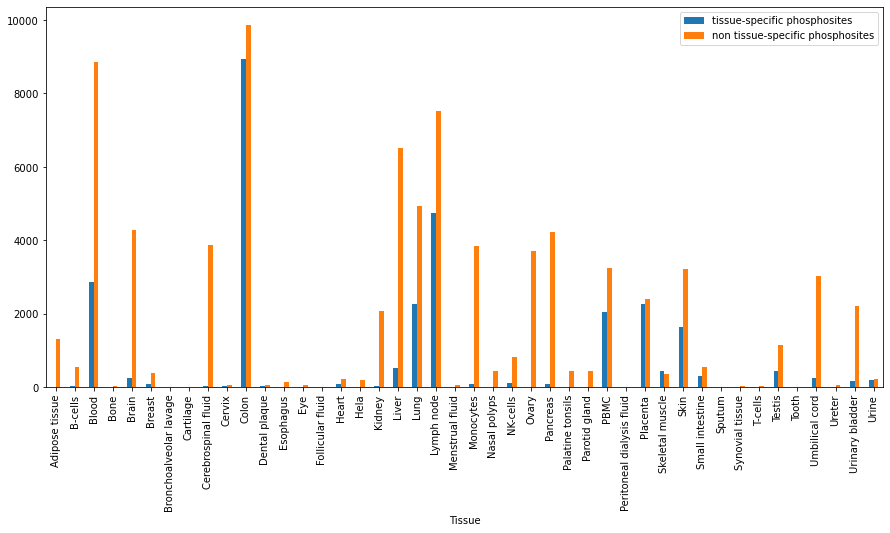

In [77]:
list_tissues = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Bronchoalveolar lavage", "Cartilage", "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Sputum", "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
df_spec_sites_tissues = pd.DataFrame({"Tissue": list_tissues})
list_counts = []
for tissue in list_tissues:
    count = t_spec_sites[tissue].sum()
    list_counts.append(count)
df_spec_sites_tissues["number of sites"] = list_counts

df_non_spec_sites_tissues = pd.DataFrame({"Tissue": list_tissues})
list_counts_2 = []
for tissue in list_tissues:
    count_2 = non_t_spec_sites[tissue].sum()
    list_counts_2.append(count_2)
df_non_spec_sites_tissues["number of sites"] = list_counts_2

df_combined_sites = pd.merge(df_spec_sites_tissues, df_non_spec_sites_tissues, how="outer",
                      on="Tissue")
df_combined_sites.rename(columns = {"number of sites_x":"tissue-specific phosphosites"},
                      inplace = True)
df_combined_sites.rename(columns = {"number of sites_y":"non tissue-specific phosphosites"},
                      inplace = True)

df_combined_sites.plot(x="Tissue", kind="bar", figsize=(15,7))
# for skeletal muscle, there are more tissue-spec sites than non tissue-spec one, but the reverse goes for tissue-spec proteins

Skeletal muscle seems to have more tissue-specific sites, while the opposite is true on the protein level. The vast majority of phosphosites is tissue-specific.

27930
12401
6108


<AxesSubplot:xlabel='Tissue'>

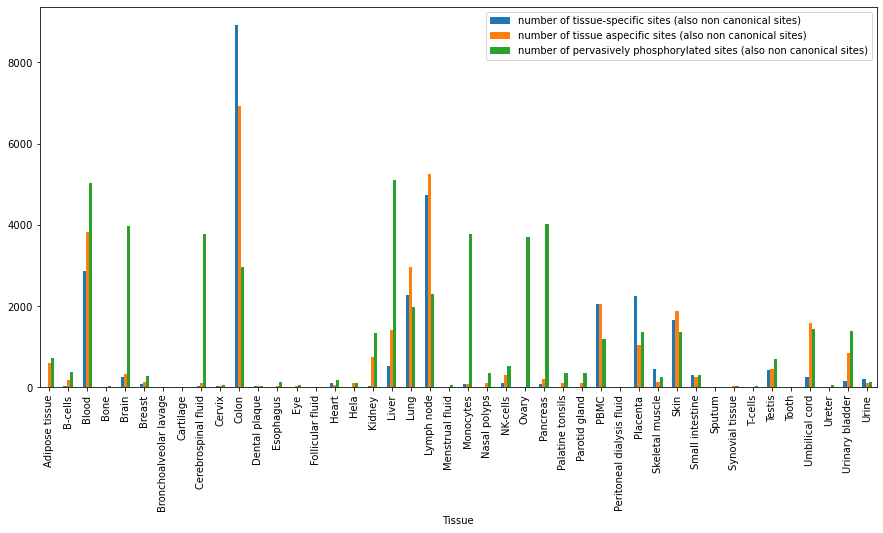

In [78]:
non_t_spec_sites = data_site[((data_site["Total"]>1)&(data_site["Total"]<5))]
general_sites = data_site[(data_site["Total"]>=5)]
print(t_spec_sites.shape[0])
print(non_t_spec_sites.shape[0])
print(general_sites.shape[0])
# We now make a devision in three categories

list_tissues = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Bronchoalveolar lavage", "Cartilage", "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Sputum", "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
df_all_sites_tissues = pd.DataFrame({"Tissue": list_tissues})
list_counts_tspec_sites = []
list_counts_nontspec_sites = []
list_counts_gen_sites = []
for tissue in list_tissues:
    count_tspec = t_spec_sites[tissue].sum()
    list_counts_tspec_sites.append(count_tspec)
    count_nontspec = non_t_spec_sites[tissue].sum()
    list_counts_nontspec_sites.append(count_nontspec)
    count_gen = general_sites[tissue].sum()
    list_counts_gen_sites.append(count_gen)
df_all_sites_tissues["number of tissue-specific sites (also non canonical sites)"] = list_counts_tspec_sites
df_all_sites_tissues["number of tissue aspecific sites (also non canonical sites)"] = list_counts_nontspec_sites
df_all_sites_tissues["number of pervasively phosphorylated sites (also non canonical sites)"] = list_counts_gen_sites

df_all_sites_tissues.plot(x="Tissue", kind="bar", figsize=(15,7))
# for skeletal muscle, there are more tissue-spec sites than non tissue-spec one, but the reverse goes for tissue-spec proteins

Most tissue-specific sites seen in: Colon, Lymph node, Blood, Lung, Placenta.

In [79]:
df_all_sites_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6      Bronchoalveolar lavage   
7                   Cartilage   
8         Cerebrospinal fluid   
9                      Cervix   
10                      Colon   
11              Dental plaque   
12                  Esophagus   
13                        Eye   
14           Follicular fluid   
15                      Heart   
16                       Hela   
17                     Kidney   
18                      Liver   
19                       Lung   
20                 Lymph node   
21            Menstrual fluid   
22                  Monocytes   
23               Nasal polyps   
24                   NK-cells   
25                      Ovary   
26                   Pancreas   
27           Palatine tonsils   
28              Parotid gland   
29                       PBMC   
30  Peritoneal dialysis fluid   
31                   Placenta   
32            Skeletal muscle   
33                       Skin   
34            Small intestine   
35                     Sputum   
36            Synovial tissue   
37                    T-cells   
38                     Testis   
39                      Tooth   
40             Umbilical cord   
41                     Ureter   
42            Urinary bladder   
43                      Urine   

    number of tissue-specific sites (also non canonical sites)  \
0                                                   0            
1                                                  32            
2                                                2866            
3                                                   4            
4                                                 259            
5                                                  71            
6                                                   1            
7                                                   1            
8                                                  26            
9                                                  15            
10                                               8931            
11                                                 22            
12                                                 10            
13                                                 10            
14                                                  0            
15                                                 93            
16                                                  0            
17                                                 28            
18                                                530            
19                                               2270            
20                                               4739            
21                                                  5            
22                                                 87            
23                                                  0            
24                                                106            
25                                                  2            
26                                                 74            
27                                                  0            
28                                                  0            
29                                               2043            
30                                                  1            
31                                               2250            
32                                                443            
33                                               1644            
34                                                303            
35                                                  1            
36                                                 13            
37                           

### 1.2.2 only S,T,Y sites: how many and which tissues

We'll now conduct the same analysis limited to the canonical sites.

In [80]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
data_site = data[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_site = data_site.groupby(["ACC_ID", "UP_POS"], as_index=False)[["tissue", "modres"]].agg({"tissue": lambda x:
                                                              ",".join(x),
                                                                        "modres": "first"}
                                                                       )
for tissue in list_tissues_STY:
    data_site[tissue] = data_site["tissue"].str.contains(tissue)
data_site.replace({True:1, False:0}, inplace=True)
data_site_STY = data_site[(data_site["modres"]=="S")|(data_site["modres"]=="T")|(data_site["modres"]=="Y")]
data_site_STY["Total"] = data_site_STY[list_tissues_STY].sum(axis=1)
STY_t_spec_sites = data_site_STY[(data_site_STY["Total"]==1)]
print(STY_t_spec_sites.shape[0])
STY_t_spec_sites.head(10)
#27930 for all residues (also non S,T,Y)

14019


C:\Users\hannedvo\AppData\Local\Temp\145/ipykernel_6216/2810623175.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_site_STY["Total"] = data_site_STY[list_tissues_STY].sum(axis=1)


ACC_ID  UP_POS             tissue modres  Adipose tissue  B-cells  \
0   A0A075B6H7      30               Lung      T               0        0   
1   A0A075B6S5      52    Menstrual fluid      S               0        0   
6   A0A087WXM9     223             Testis      S               0        0   
13  A0A0B4J2D5     124               PBMC      S               0        0   
14  A0A0B4J2D5     145               PBMC      T               0        0   
17  A0A0B4J2D9      52  Blood,Blood,Blood      S               0        0   
18  A0A0B4J2F2     435           Placenta      S               0        0   
19  A0A0C4DH24      75    Skeletal muscle      S               0        0   
22  A0A0C4DH67      50              Blood      S               0        0   
23  A0A0C4DH69      52              Blood      S               0        0   

    Blood  Bone  Brain  Breast  ...  Small intestine  Synovial tissue  \
0       0     0      0       0  ...                0                0   
1       0     0      0       0  ...                0                0   
6       0     0      0       0  ...                0                0   
13      0     0      0       0  ...                0                0   
14      0     0      0       0  ...                0                0   
17      1     0      0       0  ...                0                0   
18      0     0      0       0  ...                0                0   
19      0     0      0       0  ...                0                0   
22      1     0      0       0  ...                0                0   
23      1     0      0       0  ...                0                0   

    T-cells  Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  \
0         0       0      0               0       0                0      0   
1         0       0      0               0       0                0      0   
6         0       1      0               0       0                0      0   
13        0       0      0               0       0                0      0   
14        0       0      0               0       0                0      0   
17        0       0      0               0       0                0      0   
18        0       0      0               0       0                0      0   
19        0       0      0               0       0                0      0   
22        0       0      0               0       0                0      0   
23        0       0      0               0       0                0      0   

    Total  
0       1  
1       1  
6       1  
13      1  
14      1  
17      1  
18      1  
19      1  
22      1  
23      1  

[10 rows x 46 columns]

In [81]:
#data_site_STY.to_csv("site_data", sep="\t", index=False)

In [82]:
STY_non_t_spec_sites = data_site_STY[(data_site_STY["Total"]>1)]
print(STY_non_t_spec_sites.shape[0]) # 18509 for all residues (also non S,T,Y)
print(STY_non_t_spec_sites.shape[0]+STY_t_spec_sites.shape[0]) # matches the total number of S,T,Y sites
STY_non_t_spec_sites.head(10)

9884
23903


ACC_ID  UP_POS                                             tissue  \
20  A0A0C4DH36     108                                   Lung,Blood,Blood   
21  A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
47      A0AVK6      71                Blood,Colon,Colon,Colon,Colon,Colon   
50      A0AVK6     102          Blood,Blood,Colon,Colon,Colon,Colon,Colon   
56      A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...   
57      A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...   
60      A0FGR8     758                           Liver,Liver,Blood,Testis   
62      A0FGR8     761                                  Testis,Lymph node   
67      A0JLT2     226  Blood,Blood,Colon,Colon,Colon,Colon,Colon,Colo...   
82      A0JNW5    1402  Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...   

   modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
20      T               0        0      1     0      0       0  ...   
21      S               0        0      1     0      1       0  ...   
47      S               0        0      1     0      0       0  ...   
50      S               0        0      1     0      0       0  ...   
56      S               0        0      1     0      0       0  ...   
57      S               0        0      1     0      0       0  ...   
60      S               0        0      1     0      0       0  ...   
62      S               0        0      0     0      0       0  ...   
67      S               0        0      1     0      0       0  ...   
82      S               0        0      1     0      1       0  ...   

    Small intestine  Synovial tissue  T-cells  Testis  Tooth  Umbilical cord  \
20                0                0        0       0      0               0   
21                0                0        0       0      0               0   
47                0                0        0       0      0               0   
50                0                0        0       0      0               0   
56                0                0        0       1      0               0   
57                0                0        0       0      0               0   
60                0                0        0       1      0               0   
62                0                0        0       1      0               0   
67                0                0        0       0      0               0   
82                0                0        0       0      0               0   

    Ureter  Urinary bladder  Urine  Total  
20       0                0      0      2  
21       0                0      0      7  
47       0                0      0      2  
50       0                0      0      2  
56       0                0      0      4  
57       0                0      0      4  
60       0                0      0      3  
62       0                0      0      2  
67       0                0      0      3  
82       0                0      0      8  

[10 rows x 46 columns]

In [83]:
#STY_t_spec_sites.to_csv("1.2 tissue-specific sites.tsv", sep="\t", index=False)
#STY_non_t_spec_sites.to_csv("1.2 non tissue-specific sites.tsv", sep="\t", index=False)

<AxesSubplot:xlabel='Tissue'>

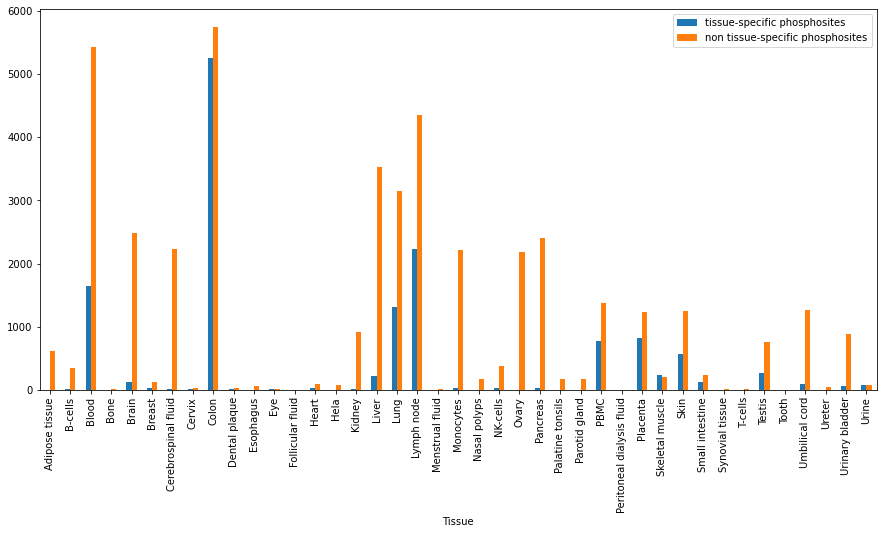

In [84]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
df_spec_sites_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_STY = []
for tissue in list_tissues_STY:
    count = STY_t_spec_sites[tissue].sum()
    list_counts_STY.append(count)
df_spec_sites_tissues_STY["number of sites"] = list_counts_STY

df_non_spec_sites_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_2_STY = []
for tissue in list_tissues_STY:
    count_2 = STY_non_t_spec_sites[tissue].sum()
    list_counts_2_STY.append(count_2)
df_non_spec_sites_tissues_STY["number of sites"] = list_counts_2_STY

df_combined_sites_STY = pd.merge(df_spec_sites_tissues_STY, df_non_spec_sites_tissues_STY, how="outer",
                      on="Tissue")
df_combined_sites_STY.rename(columns = {"number of sites_x":"tissue-specific phosphosites"},
                      inplace = True)
df_combined_sites_STY.rename(columns = {"number of sites_y":"non tissue-specific phosphosites"},
                      inplace = True)

df_combined_sites_STY.plot(x="Tissue", kind="bar", figsize=(15,7))
# the relative abundance of tissue-specific sites seems to be higher when only considering S,T,Y

In [85]:
df_problematic_sites_STY = df_combined_sites_STY[((df_combined_sites_STY["tissue-specific phosphosites"] < 50) |
                                         (df_combined_sites_STY["non tissue-specific phosphosites"] < 50))]
df_problematic_sites_STY

Tissue  tissue-specific phosphosites  \
0              Adipose tissue                             0   
1                     B-cells                            16   
3                        Bone                             2   
5                      Breast                            26   
6         Cerebrospinal fluid                             9   
7                      Cervix                             7   
9               Dental plaque                            17   
10                  Esophagus                             1   
11                        Eye                             5   
12           Follicular fluid                             0   
13                      Heart                            25   
14                       Hela                             0   
15                     Kidney                            10   
19            Menstrual fluid                             2   
20                  Monocytes                            36   
21               Nasal polyps                             0   
22                   NK-cells                            36   
23                      Ovary                             2   
24                   Pancreas                            34   
25           Palatine tonsils                             0   
26              Parotid gland                             0   
28  Peritoneal dialysis fluid                             0   
33            Synovial tissue                             3   
34                    T-cells                             0   
36                      Tooth                             1   
38                     Ureter                             3   

    non tissue-specific phosphosites  
0                                611  
1                                345  
3                                 11  
5                                131  
6                               2233  
7                                 21  
9                                 27  
10                                63  
11                                15  
12                                 1  
13                                99  
14                                80  
15                               917  
19                                12  
20                              2212  
21                               174  
22                               371  
23                              2186  
24                              2404  
25                               174  
26                               174  
28                                 2  
33                                14  
34                                14  
36                                 0  
38                                37

In [86]:
df_problematic_sites_STY.shape[0]
# still the same amount

26

14019
6478
3406


<AxesSubplot:title={'center':'number of tissue-specific phosphosites contrasted by non-tissue-specific phosphosites per tissue'}, xlabel='Tissue'>

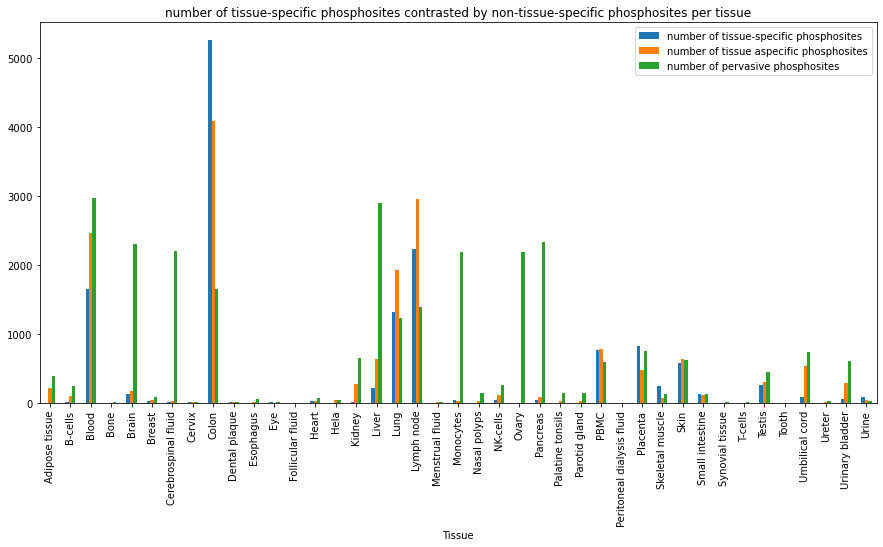

In [87]:
print(STY_t_spec_sites.shape[0])
STY_non_t_spec_sites = data_site_STY[(data_site_STY["Total"]>1)&(data_site_STY["Total"]<5)]
print(STY_non_t_spec_sites.shape[0])
STY_general_sites = data_site_STY[(data_site_STY["Total"]>=5)]
print(STY_general_sites.shape[0])
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
df_general_site_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_3_STY = []
for tissue in list_tissues_STY:
    count = STY_general_sites[tissue].sum()
    list_counts_3_STY.append(count)
df_general_site_tissues_STY["number of pervasive phosphosites"] = list_counts_3_STY
df_t_spec_site_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_4_STY = []
for tissue in list_tissues_STY:
    count = STY_t_spec_sites[tissue].sum()
    list_counts_4_STY.append(count)
df_t_spec_site_tissues_STY["number of tissue-specific phosphosites"] = list_counts_4_STY
df_non_t_spec_site_tissues_STY = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_5_STY = []
for tissue in list_tissues_STY:
    count = STY_non_t_spec_sites[tissue].sum()
    list_counts_5_STY.append(count)
df_non_t_spec_site_tissues_STY["number of tissue aspecific phosphosites"] = list_counts_5_STY
df_combined_all_STY_sites = pd.merge(df_t_spec_site_tissues_STY, df_non_t_spec_site_tissues_STY, how="outer", on="Tissue")
df_combined_all_STY_sites = pd.merge(df_combined_all_STY_sites, df_general_site_tissues_STY, how="outer", on="Tissue")
df_combined_all_STY_sites.plot(x="Tissue", kind="bar", figsize=(15,7), title="number of tissue-specific phosphosites contrasted by non-tissue-specific phosphosites per tissue")

<AxesSubplot:title={'center':'figure 2: number of tissue-specific phosphosites contrasted by more general phosphosites per tissue'}, xlabel='Tissue', ylabel='number of phosphosites'>

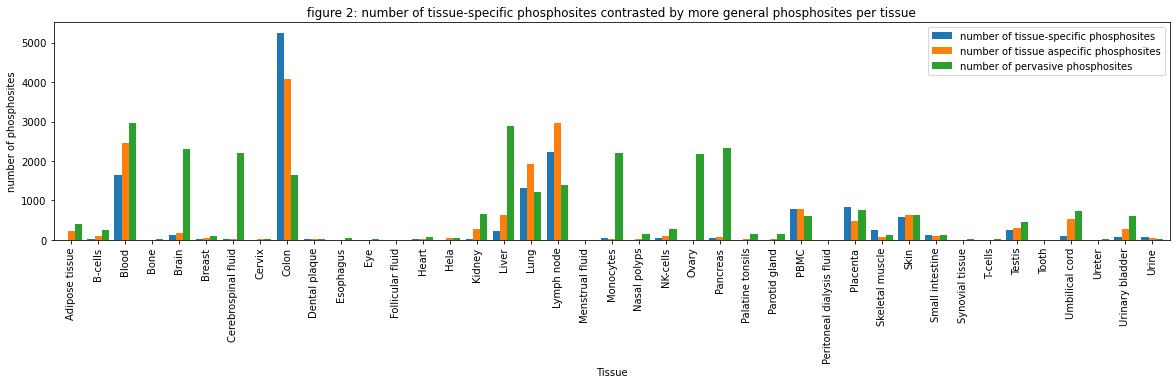

In [88]:
df_combined_all_STY_sites[["Tissue","number of tissue-specific phosphosites", "number of tissue aspecific phosphosites", "number of pervasive phosphosites"]].plot(x="Tissue", kind="bar", figsize=(20,4), title="figure 2: number of tissue-specific phosphosites contrasted by more general phosphosites per tissue", ylabel="number of phosphosites", width=0.8)
#plt.rc('font', size=14)

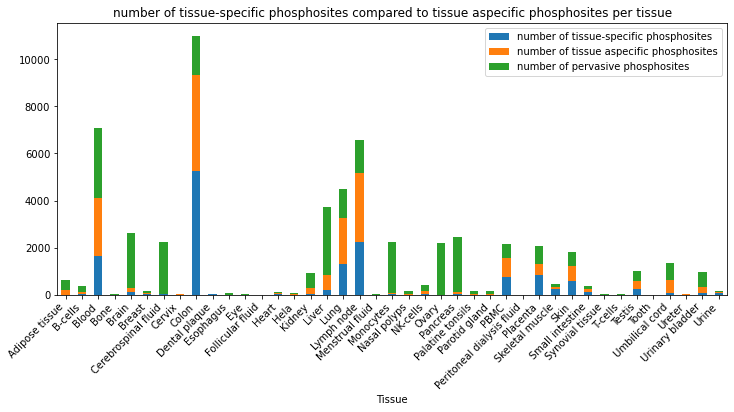

In [89]:
df_combined_all_STY_sites.plot(x="Tissue", kind="bar", stacked=True, figsize=(12,5), title="number of tissue-specific phosphosites compared to tissue aspecific phosphosites per tissue")
#plt.savefig("WP1 tissue-specific phosphosites distribution.png", format="png", bbox_inches="tight")
plt.show()

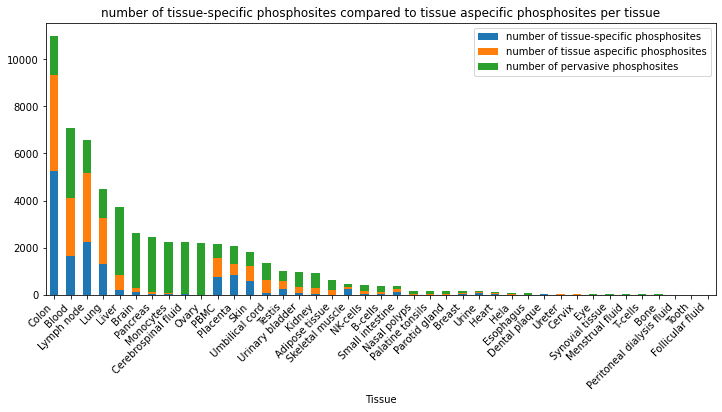

In [92]:
df_combined_all_STY_sites["Total"] = df_combined_all_STY_sites[["number of tissue-specific phosphosites", "number of tissue aspecific phosphosites", "number of pervasive phosphosites"]].sum(axis=1)
df_combined_all_STY_sites.sort_values(by="Total", ascending=False)[["Tissue", "number of tissue-specific phosphosites", "number of tissue aspecific phosphosites", "number of pervasive phosphosites"]].plot(x="Tissue", kind="bar", stacked=True, figsize=(12,5), title="number of tissue-specific phosphosites compared to tissue aspecific phosphosites per tissue")
plt.xticks(rotation=45, ha="right")
#plt.savefig("images_thesis tissue-specific phosphosites distribution_sorted.png", format="png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='Tissue'>

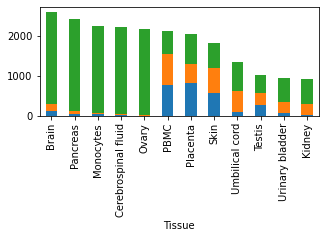

In [91]:
df_combined_all_STY_sites[(df_combined_all_STY_sites["Tissue"]=="Brain")|(df_combined_all_STY_sites["Tissue"]=="Pancreas")|
                          (df_combined_all_STY_sites["Tissue"]=="Monocytes")|(df_combined_all_STY_sites["Tissue"]=="Cerebrospinal fluid")|
                         (df_combined_all_STY_sites["Tissue"]=="Ovary")|(df_combined_all_STY_sites["Tissue"]=="PBMC")|
                          (df_combined_all_STY_sites["Tissue"]=="Placenta")|(df_combined_all_STY_sites["Tissue"]=="Skin")|
                         (df_combined_all_STY_sites["Tissue"]=="Umbilical cord")|(df_combined_all_STY_sites["Tissue"]=="Testis")|
                         (df_combined_all_STY_sites["Tissue"]=="Urinary bladder")|(df_combined_all_STY_sites["Tissue"]=="Kidney")].sort_values(by="Total", ascending=False)[["Tissue", "number of tissue-specific phosphosites", "number of tissue aspecific phosphosites", "number of pervasive phosphosites"]].plot(x="Tissue", kind="bar", stacked=True, figsize=(5,2), legend = False)
#plt.savefig("images_thesis zoom in tissue-specific phosphosites distribution_sorted.png", format="png", bbox_inches="tight")

We now see the most tissue-specific proteins in Colon, Lymph node, Blood, Lung, Placenta.

In [96]:
df_combined_all_STY_sites["Total"] = df_combined_all_STY_sites[["number of tissue-specific phosphosites", "number of tissue aspecific phosphosites", "number of pervasive phosphosites"]].sum(axis=1)
df_combined_all_STY_sites["ratio_tissue-specific phosphosites"] = df_combined_all_STY_sites["number of tissue-specific phosphosites"]*100/df_combined_all_STY_sites["Total"]
df_combined_all_STY_sites["ratio_tissue aspecific phosphosites"] = df_combined_all_STY_sites["number of tissue aspecific phosphosites"]*100/df_combined_all_STY_sites["Total"]
df_combined_all_STY_sites["ratio_pervasive phosphosites"] = df_combined_all_STY_sites["number of pervasive phosphosites"]*100/df_combined_all_STY_sites["Total"]
df_combined_all_STY_sites

Tissue  number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      16   
2                       Blood                                    1642   
3                        Bone                                       2   
4                       Brain                                     121   
5                      Breast                                      26   
6         Cerebrospinal fluid                                       9   
7                      Cervix                                       7   
8                       Colon                                    5252   
9               Dental plaque                                      17   
10                  Esophagus                                       1   
11                        Eye                                       5   
12           Follicular fluid                                       0   
13                      Heart                                      25   
14                       Hela                                       0   
15                     Kidney                                      10   
16                      Liver                                     213   
17                       Lung                                    1316   
18                 Lymph node                                    2224   
19            Menstrual fluid                                       2   
20                  Monocytes                                      36   
21               Nasal polyps                                       0   
22                   NK-cells                                      36   
23                      Ovary                                       2   
24                   Pancreas                                      34   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     772   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     826   
30            Skeletal muscle                                     238   
31                       Skin                                     574   
32            Small intestine                                     121   
33            Synovial tissue                                       3   
34                    T-cells                                       0   
35                     Testis                                     259   
36                      Tooth                                       1   
37             Umbilical cord                                      87   
38                     Ureter                                       3   
39            Urinary bladder                                      61   
40                      Urine                                      78   

    number of tissue aspecific phosphosites  number of pervasive phosphosites  \
0                                       221                               390   
1                                        95                               250   
2                                      2466                              2961   
3                                         2                                 9   
4                                       176                              2307   
5                                        42                                89   
6                                        30                              2203   
7                                         8                                13   
8                                      4089                              1651   
9                                         9                                18   
10                                        6                      

<AxesSubplot:xlabel='Tissue'>

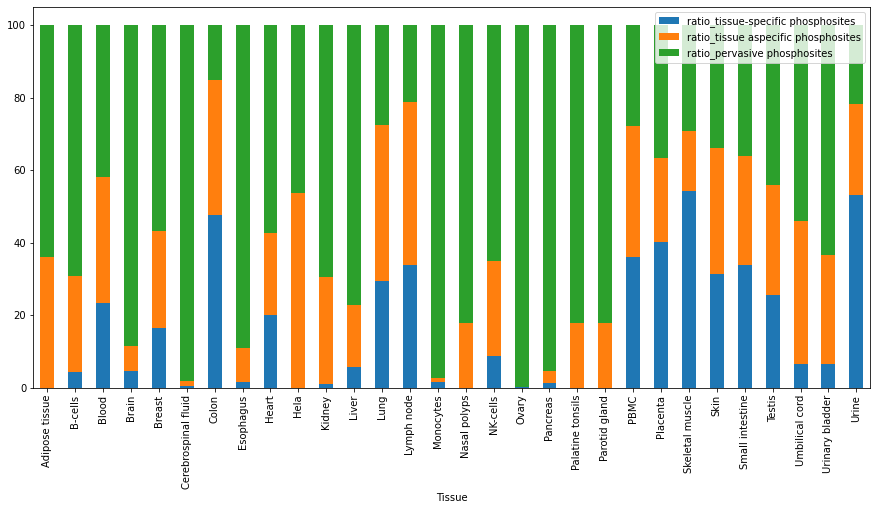

In [97]:
df_combined_all_STY_sites[df_combined_all_STY_sites["Total"]>=50][["Tissue", "ratio_tissue-specific phosphosites", "ratio_tissue aspecific phosphosites", "ratio_pervasive phosphosites"]].plot(x="Tissue", kind="bar", stacked=True, figsize=(15,7))
#plt.savefig("WP1 tissue-specific P-sites relavtive distribution.png", format="png", bbox_inches="tight")

In [98]:
df_combined_all_STY_sites[df_combined_all_STY_sites["number of tissue-specific phosphosites"]==0]

Tissue  number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
12           Follicular fluid                                       0   
14                       Hela                                       0   
21               Nasal polyps                                       0   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
28  Peritoneal dialysis fluid                                       0   
34                    T-cells                                       0   

    number of tissue aspecific phosphosites  number of pervasive phosphosites  \
0                                       221                               390   
12                                        1                                 0   
14                                       43                                37   
21                                       31                               143   
25                                       31                               143   
26                                       31                               143   
28                                        0                                 2   
34                                        4                                10   

    Total  ratio_tissue-specific phosphosites  \
0     611                                 0.0   
12      1                                 0.0   
14     80                                 0.0   
21    174                                 0.0   
25    174                                 0.0   
26    174                                 0.0   
28      2                                 0.0   
34     14                                 0.0   

    ratio_tissue aspecific phosphosites  ratio_pervasive phosphosites  
0                             36.170213                     63.829787  
12                           100.000000                      0.000000  
14                            53.750000                     46.250000  
21                            17.816092                     82.183908  
25                            17.816092                     82.183908  
26                            17.816092                     82.183908  
28                             0.000000                    100.000000  
34                            28.571429                     71.428571

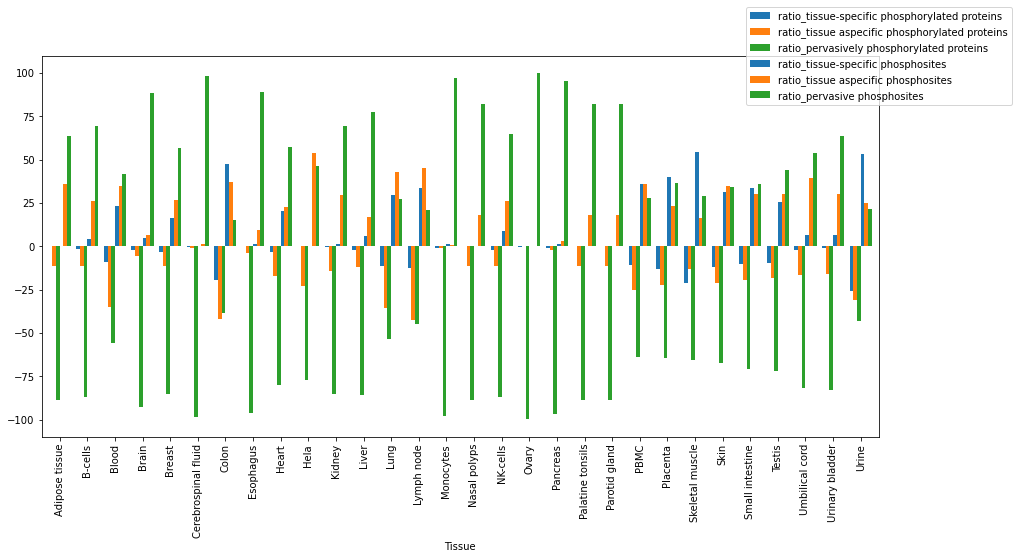

In [99]:
df_combined_all_STY_sub = df_combined_all_STY[df_combined_all_STY["Total"]>=50][["Tissue", "ratio_tissue-specific phosphorylated proteins", "ratio_tissue aspecific phosphorylated proteins", "ratio_pervasively phosphorylated proteins"]]
df_combined_all_STY_sites_sub = df_combined_all_STY_sites[df_combined_all_STY_sites["Total"]>=50][["Tissue", "ratio_tissue-specific phosphosites", "ratio_tissue aspecific phosphosites", "ratio_pervasive phosphosites"]]
df_comparison = pd.merge(df_combined_all_STY_sub, df_combined_all_STY_sites_sub, how="outer")
df_comparison["ratio_tissue-specific phosphorylated proteins"] = -1*df_comparison["ratio_tissue-specific phosphorylated proteins"]
df_comparison["ratio_tissue aspecific phosphorylated proteins"] = -1*df_comparison["ratio_tissue aspecific phosphorylated proteins"]
df_comparison["ratio_pervasively phosphorylated proteins"] = -1*df_comparison["ratio_pervasively phosphorylated proteins"]
df_comparison.plot(x="Tissue", kind="bar", figsize=(15,7), width=0.8, color=["tab:blue","tab:orange", "tab:green"]).legend(loc='center' , bbox_to_anchor=(1.0, 1.0))

We now make a contrasted of the log transformed number of sites (up) in each category for each tissue compared to the one for the proteins (down).

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


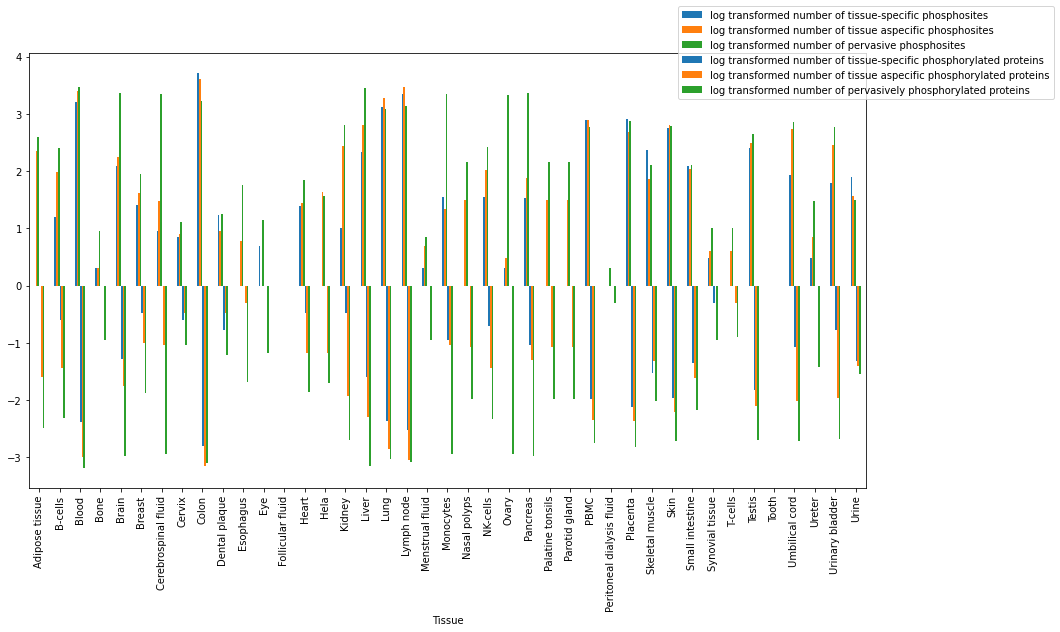

In [100]:
df_combined_all_proteins_sites = pd.merge(df_combined_all_STY_sites, df_combined_all_STY, how="inner", on="Tissue", suffixes=[" sites", " proteins"])
df_combined_all_proteins_sites["log transformed number of tissue-specific phosphorylated proteins"] = -1*np.log10(df_combined_all_proteins_sites["number of tissue-specific phosphorylated proteins"])
df_combined_all_proteins_sites["log transformed number of tissue aspecific phosphorylated proteins"] = -1*np.log10(df_combined_all_proteins_sites["number of tissue aspecific phosphorylated proteins"])
df_combined_all_proteins_sites["log transformed number of pervasively phosphorylated proteins"] = -1*np.log10(df_combined_all_proteins_sites["number of pervasively phosphorylated proteins"])
df_combined_all_proteins_sites["log transformed number of tissue-specific phosphosites"] = np.log10(df_combined_all_proteins_sites["number of tissue-specific phosphosites"])
df_combined_all_proteins_sites["log transformed number of tissue aspecific phosphosites"] = np.log10(df_combined_all_proteins_sites["number of tissue aspecific phosphosites"])
df_combined_all_proteins_sites["log transformed number of pervasive phosphosites"] = np.log10(df_combined_all_proteins_sites["number of pervasive phosphosites"])
df_combined_all_proteins_sites_plot = df_combined_all_proteins_sites[["Tissue", "log transformed number of tissue-specific phosphosites", "log transformed number of tissue aspecific phosphosites", "log transformed number of pervasive phosphosites", "log transformed number of tissue-specific phosphorylated proteins", "log transformed number of tissue aspecific phosphorylated proteins", "log transformed number of pervasively phosphorylated proteins"]]
df_combined_all_proteins_sites_plot.plot(x="Tissue", kind="bar", figsize=(15,8), color=["tab:blue","tab:orange", "tab:green"]).legend(loc='center' , bbox_to_anchor=(1.0, 1.0))

In [101]:
#df_combined_all_STY_sites.to_csv("number of three categories per tissue_sites.tsv", sep="\t", index=False)

In [102]:
print(STY_t_spec_sites.shape[0])
print(STY_non_t_spec_sites.shape[0])
print(STY_general_sites.shape[0])

14019
6478
3406


In [103]:
#STY_t_spec_sites.to_csv("1.2 tissue-specific sites.tsv", sep="\t", index=False)
#STY_non_t_spec_sites.to_csv("1.2 non tissue-specific sites.tsv", sep="\t", index=False)
#STY_general_sites.to_csv("1.2 general P sites.tsv", sep="\t", index=False)

In [104]:
print(pd.merge(data_enriched, STY_t_spec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(pd.merge(data_enriched, STY_non_t_spec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(pd.merge(data_enriched, STY_general_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])

10059
5504
2108


In [105]:
print(pd.merge(data_non_enriched, STY_t_spec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(pd.merge(data_non_enriched, STY_non_t_spec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(pd.merge(data_non_enriched, STY_general_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])

3978
2773
3324


In [106]:
print(pd.merge(data_phospho_enriched, STY_t_spec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(pd.merge(data_phospho_enriched, STY_non_t_spec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(pd.merge(data_phospho_enriched, STY_general_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"]).groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])

9983
5198
1867


### Comparison of three categories when considering all phosphosites VS canonical sites

We'll now compare the number of proteins and sites in each tissue when considering all sites compared to when considering both the canonical sites and the non-canonical sites. We do the same for the tissue-specific proteins, the non-tissue specific and general phosphorylated proteins and sites respectively.

We notice that when we keep the non-canonical sites in the dataset, there are more tissue-specifci proteins. This seems to point towards more unique phosphorylations being identified on non-canonical sites.

It is again noticeable we relatively lose more information on the site level when we consider only canonical sites.

<AxesSubplot:title={'center':'tissue-specific phosphoryalted proteins per tissue coloured according to canonical site'}, xlabel='Tissue'>

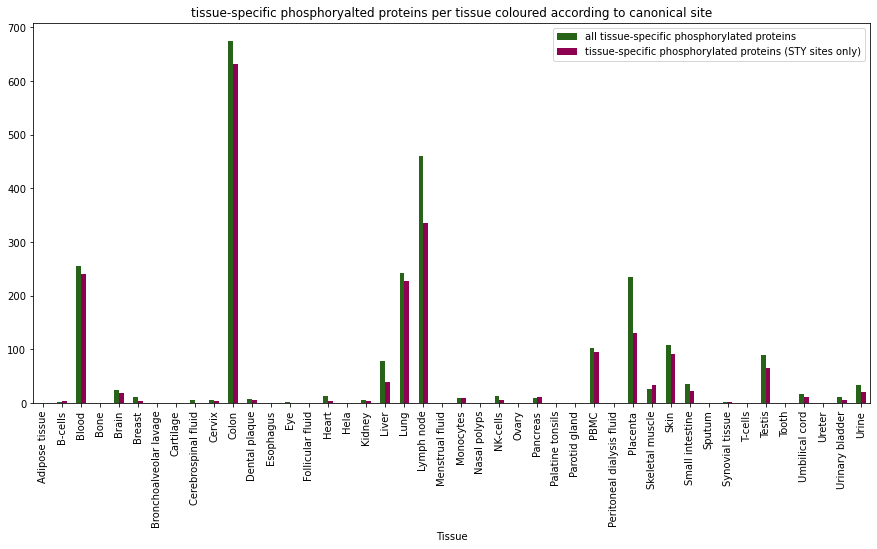

In [111]:
#Add one for pervasively phosphorylated proteins and sites
df_t_spec_proteins = pd.merge(df_spec_proteins_tissues, df_spec_proteins_tissues_STY, how="outer", on="Tissue")
df_t_spec_proteins.rename(columns={
    "number of proteins_x":"all tissue-specific phosphorylated proteins",
    "number of proteins_y":"tissue-specific phosphorylated proteins (STY sites only)"},
                                   inplace = True)
df_t_spec_proteins.plot(x="Tissue", kind="bar", figsize=(15,7), colormap='PiYG_r', title = "tissue-specific phosphoryalted proteins per tissue coloured according to canonical site")
#the amount of tissue-specific phosphorylated proteins is relatively alike

<AxesSubplot:title={'center':'tissue aspecific phosphoryalted proteins per tissue coloured according to canonical site'}, xlabel='Tissue'>

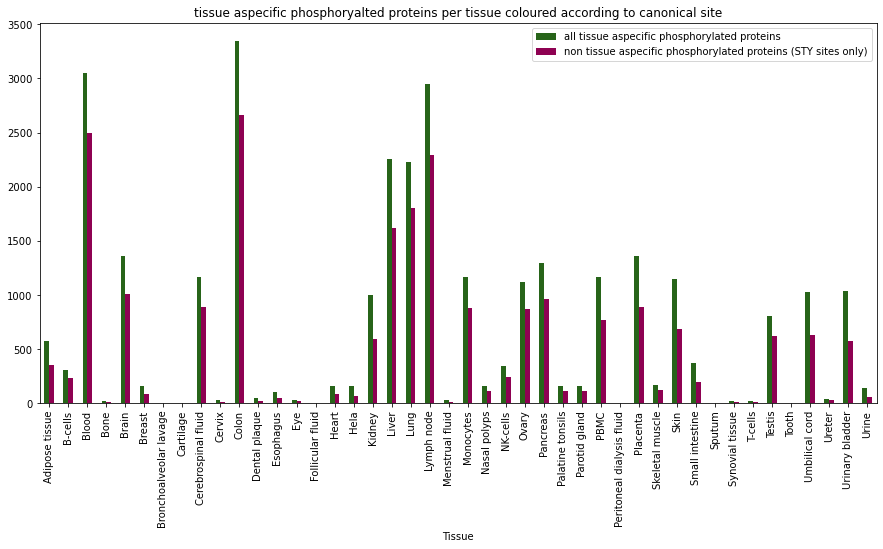

In [112]:
df_non_t_spec_proteins = pd.merge(df_non_spec_proteins_tissues, df_non_spec_proteins_tissues_STY, how="outer", on="Tissue")
df_non_t_spec_proteins.rename(columns={
    "number of proteins_x":"all tissue aspecific phosphorylated proteins",
    "number of proteins_y":"non tissue aspecific phosphorylated proteins (STY sites only)"},
                                   inplace = True)
df_non_t_spec_proteins.plot(x="Tissue", kind="bar", figsize=(15,7),  colormap='PiYG_r', title = "tissue aspecific phosphoryalted proteins per tissue coloured according to canonical site")

<AxesSubplot:title={'center':'pervasively phosphoryalted proteins per tissue coloured according to canonical site'}, xlabel='Tissue'>

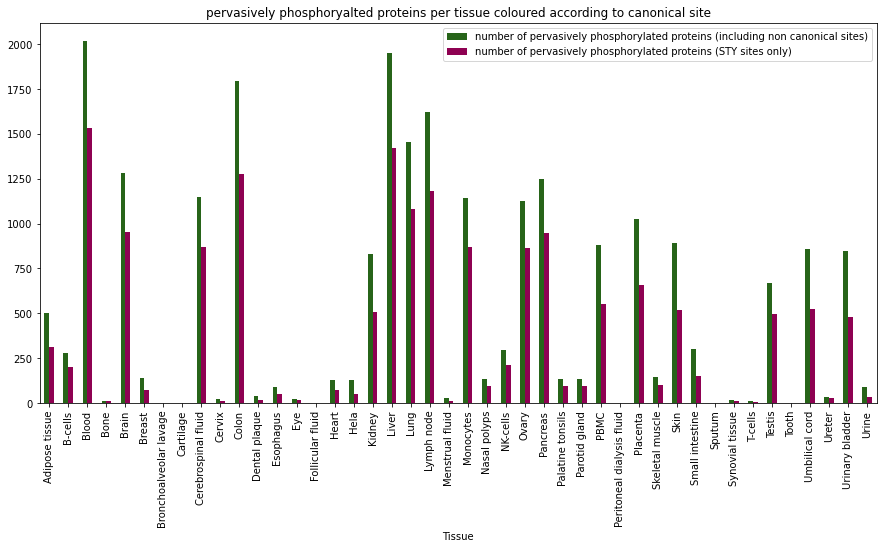

In [113]:
df_gen_proteins = pd.merge(df_all_proteins_tissues[["Tissue", "number of pervasively phosphorylated proteins (including non canonical sites)"]], df_combined_all_STY[["Tissue","number of pervasively phosphorylated proteins"]], how="outer", on="Tissue")
df_gen_proteins.rename(columns={
    "number of pervasively phosphorylated proteins":"number of pervasively phosphorylated proteins (STY sites only)"},
                                   inplace = True)
df_gen_proteins.plot(x="Tissue", kind="bar", figsize=(15,7), colormap='PiYG_r', title = "pervasively phosphoryalted proteins per tissue coloured according to canonical site")

<AxesSubplot:title={'center':'tissue-specific phosphosites per tissue coloured according to canonical site'}, xlabel='Tissue'>

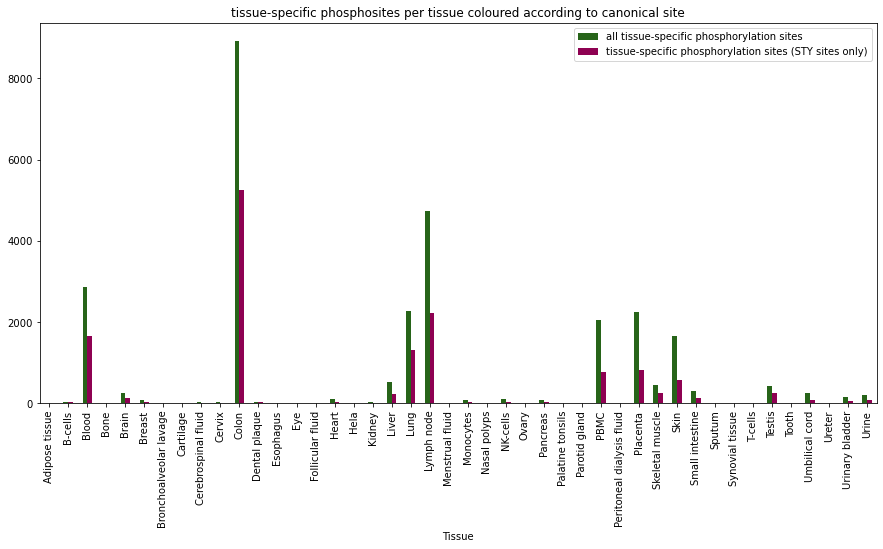

In [114]:
df_t_spec_sites = pd.merge(df_spec_sites_tissues, df_spec_sites_tissues_STY, how="outer", on="Tissue")
df_t_spec_sites.rename(columns={
    "number of sites_x":"all tissue-specific phosphorylation sites",
    "number of sites_y":"tissue-specific phosphorylation sites (STY sites only)"},
                                   inplace = True)
df_t_spec_sites.plot(x="Tissue", kind="bar", figsize=(15,7), colormap='PiYG_r', title = "tissue-specific phosphosites per tissue coloured according to canonical site")

<AxesSubplot:title={'center':'tissue aspecific phosphosites per tissue coloured according to canonical site'}, xlabel='Tissue'>

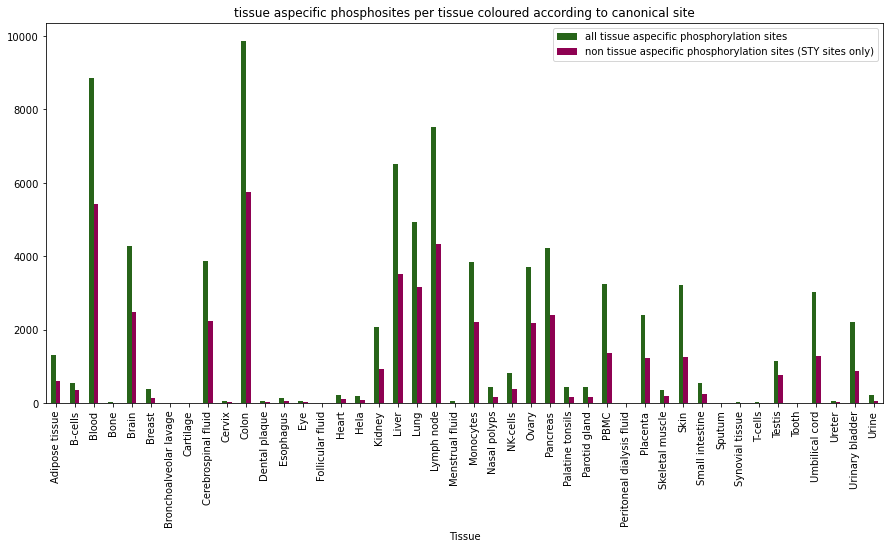

In [115]:
df_non_t_spec_sites = pd.merge(df_non_spec_sites_tissues, df_non_spec_sites_tissues_STY, how="outer", on="Tissue")
df_non_t_spec_sites.rename(columns={
    "number of sites_x":"all tissue aspecific phosphorylation sites",
    "number of sites_y":"non tissue aspecific phosphorylation sites (STY sites only)"},
                                   inplace = True)
df_non_t_spec_sites.plot(x="Tissue", kind="bar", figsize=(15,7), colormap='PiYG_r', title = "tissue aspecific phosphosites per tissue coloured according to canonical site")

<AxesSubplot:title={'center':'pervasively phosphosites per tissue coloured according to canonical site'}, xlabel='Tissue'>

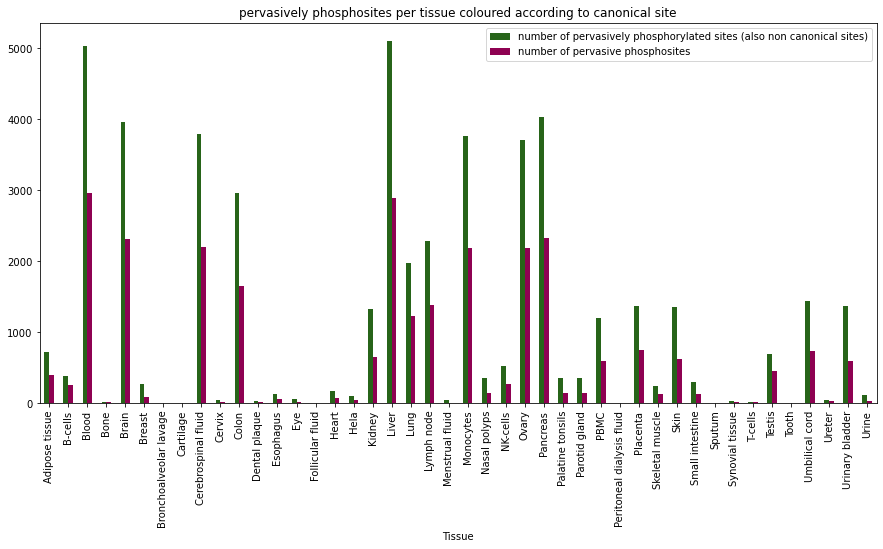

In [116]:
df_gen_sites= pd.merge(df_all_sites_tissues[["Tissue","number of pervasively phosphorylated sites (also non canonical sites)"]], df_combined_all_STY_sites[["Tissue","number of pervasive phosphosites"]], how="outer", on="Tissue")
#df_gen_sites.rename(columns={
#    "number of pervasively phosphorylated proteins":"number of pervasively phosphorylated proteins (STY sites only)"},
#                                   inplace = True)
df_gen_sites.plot(x="Tissue", kind="bar", figsize=(15,7), colormap='PiYG_r', title = "pervasively phosphosites per tissue coloured according to canonical site")

### Relative amount of three categories per tissue

We'll now make plots of the amount of proteins in each of the three categories per tissue, contrasted by the total number of proteins in a tissue. We'll use this to make a barplot showing the percentage for each of the three categories, per tissue, for these tissues having at least 50 proteins in total. We do this both before and after filtering the non-canonical sites.

Before filtering the nono-canonical sites, we notice a few trends. There are few tissues showing clear tissue-specific phosphorylated proteins. These include: Colon, Lymph node, Lung, Placenta. In several tissues, almost no proteins but pervasively phosphorylated proteins have been identified. These include: brain, cerebrospinal fluid, Monocytes, Ovary, Pancreas.

<AxesSubplot:title={'center':'Number of proteins in a category contrasted by total'}, xlabel='Tissue'>

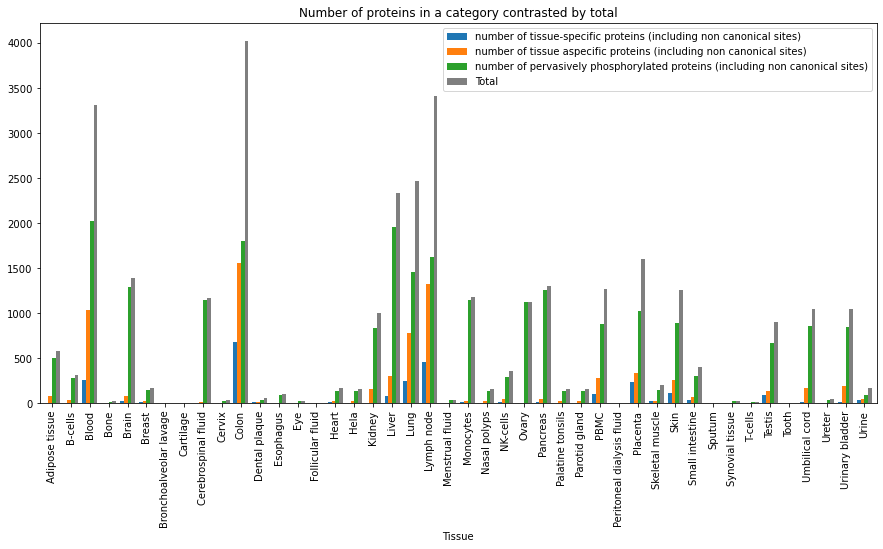

In [117]:
df_all_proteins_tissues["Total"] = df_all_proteins_tissues[["number of tissue-specific proteins (including non canonical sites)", "number of tissue aspecific proteins (including non canonical sites)", "number of pervasively phosphorylated proteins (including non canonical sites)"]].sum(axis=1)
palette = ["tab:blue", "tab:orange","tab:green", "tab:grey"]
df_all_proteins_tissues.plot.bar(x="Tissue", figsize =(15, 7), width = 0.8, color=palette, title = "Number of proteins in a category contrasted by total")

Urine shows a relatively high amount of tissue-specificness, although only few proteins have been identified in this tissue.

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/3785892788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_proteins_tissues_sub["ratio tissue-specific proteins (including non canonical sites)"] = df_all_proteins_tissues_sub["number of tissue-specific proteins (including non canonical sites)"]*100/df_all_proteins_tissues_sub["Total"]
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/3785892788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_proteins_tissues_sub["ratio tiss

<AxesSubplot:xlabel='Tissue'>

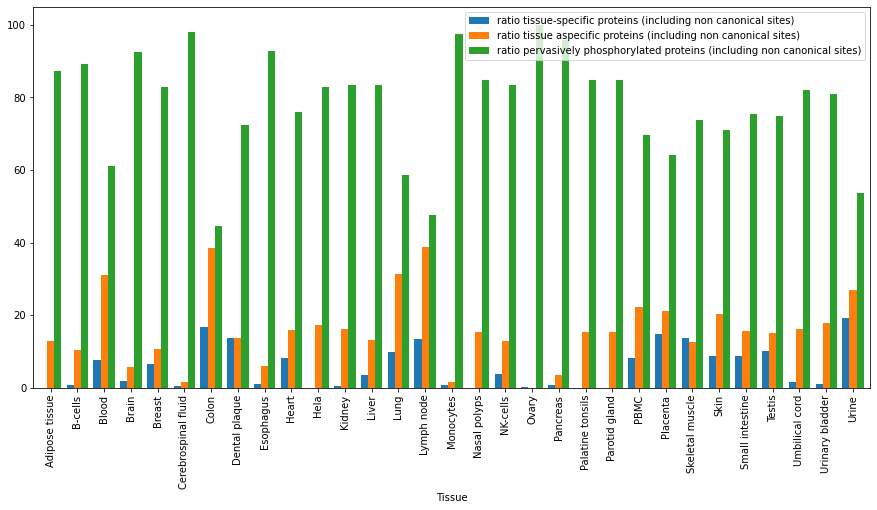

In [118]:
df_all_proteins_tissues_sub = df_all_proteins_tissues[df_all_proteins_tissues["Total"]>=50]
df_all_proteins_tissues_sub["ratio tissue-specific proteins (including non canonical sites)"] = df_all_proteins_tissues_sub["number of tissue-specific proteins (including non canonical sites)"]*100/df_all_proteins_tissues_sub["Total"]
df_all_proteins_tissues_sub["ratio tissue aspecific proteins (including non canonical sites)"] = df_all_proteins_tissues_sub["number of tissue aspecific proteins (including non canonical sites)"]*100/df_all_proteins_tissues_sub["Total"]
df_all_proteins_tissues_sub["ratio pervasively phosphorylated proteins (including non canonical sites)"] = df_all_proteins_tissues_sub["number of pervasively phosphorylated proteins (including non canonical sites)"]*100/df_all_proteins_tissues_sub["Total"]
df_all_proteins_tissues_sub[["ratio tissue-specific proteins (including non canonical sites)","ratio tissue aspecific proteins (including non canonical sites)", "ratio pervasively phosphorylated proteins (including non canonical sites)"]]
palette = ["tab:blue", "tab:orange","tab:green", "tab:grey"]
df_all_proteins_tissues_sub[["Tissue","ratio tissue-specific proteins (including non canonical sites)","ratio tissue aspecific proteins (including non canonical sites)", "ratio pervasively phosphorylated proteins (including non canonical sites)"]].plot.bar(x="Tissue", figsize =(15, 7), width = 0.8, color=palette)

<AxesSubplot:xlabel='Tissue'>

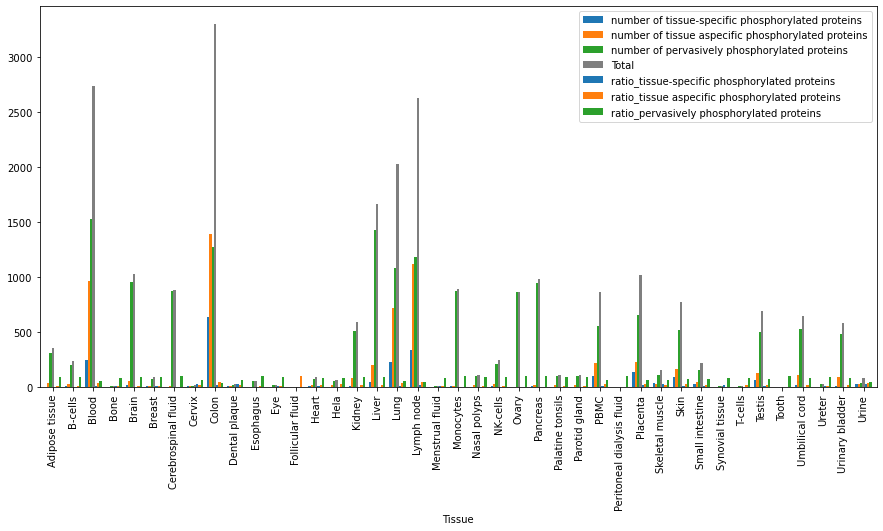

In [119]:
palette = ["tab:blue", "tab:orange","tab:green", "tab:grey"]
df_combined_all_STY.plot.bar(x="Tissue", figsize =(15, 7), width = 0.8, color=palette)

Again, Brain, Cerebrospinal fluid, Monocytes, Ovary and Pancreas display almost exclusively pervasive phosphorylation on the protein level.

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/529625451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_all_STY_sub["ratio tissue-specific phosphorylated proteins"] = df_combined_all_STY_sub["number of tissue-specific phosphorylated proteins"]*100/df_combined_all_STY_sub["Total"]
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/529625451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_all_STY_sub["ratio tissue aspecific phosphorylated proteins"] = df_combined

<AxesSubplot:xlabel='Tissue'>

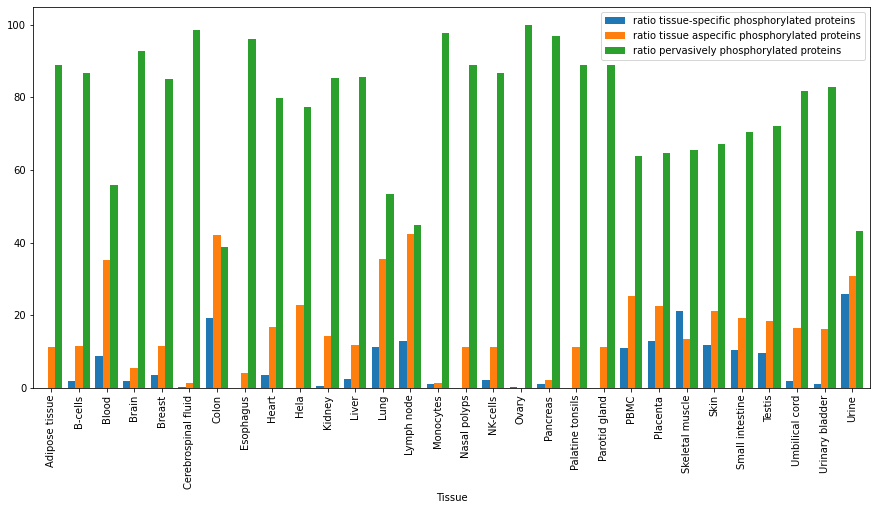

In [120]:
df_combined_all_STY_sub = df_combined_all_STY[df_combined_all_STY["Total"]>=50]
df_combined_all_STY_sub["ratio tissue-specific phosphorylated proteins"] = df_combined_all_STY_sub["number of tissue-specific phosphorylated proteins"]*100/df_combined_all_STY_sub["Total"]
df_combined_all_STY_sub["ratio tissue aspecific phosphorylated proteins"] = df_combined_all_STY_sub["number of tissue aspecific phosphorylated proteins"]*100/df_combined_all_STY_sub["Total"]
df_combined_all_STY_sub["ratio pervasively phosphorylated proteins"] = df_combined_all_STY_sub["number of pervasively phosphorylated proteins"]*100/df_combined_all_STY_sub["Total"]
df_combined_all_STY_sub[["ratio tissue-specific phosphorylated proteins","ratio tissue aspecific phosphorylated proteins", "ratio pervasively phosphorylated proteins"]]
palette = ["tab:blue", "tab:orange","tab:green", "tab:grey"]
df_combined_all_STY_sub[["Tissue","ratio tissue-specific phosphorylated proteins","ratio tissue aspecific phosphorylated proteins", "ratio pervasively phosphorylated proteins"]].plot.bar(x="Tissue", figsize =(15, 7), width = 0.8, color=palette)

<AxesSubplot:xlabel='Tissue'>

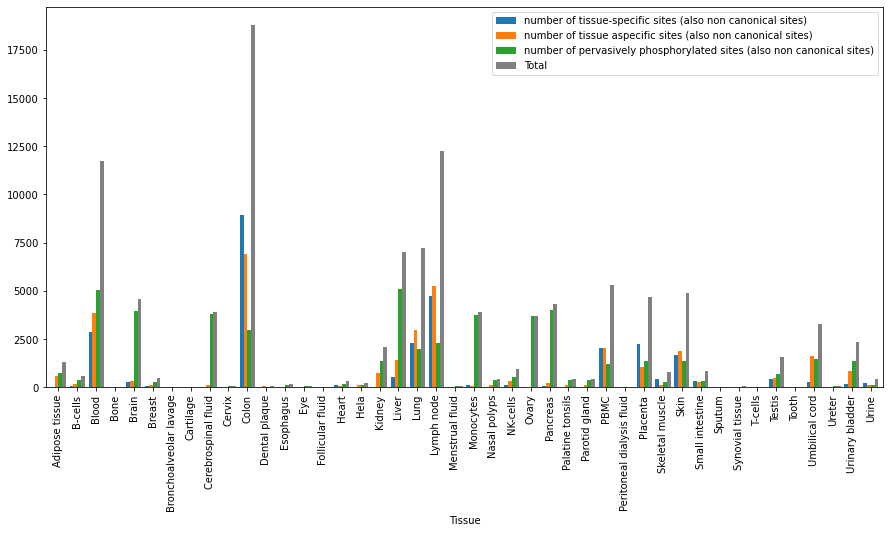

In [121]:
df_all_sites_tissues["Total"] = df_all_sites_tissues[["number of tissue-specific sites (also non canonical sites)", "number of tissue aspecific sites (also non canonical sites)", "number of pervasively phosphorylated sites (also non canonical sites)"]].sum(axis=1)
palette = ["tab:blue", "tab:orange","tab:green", "tab:grey"]
df_all_sites_tissues.plot.bar(x="Tissue", figsize =(15, 7), width = 0.8, color=palette)

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/2199706360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_sites_tissues_sub["ratio tissue-specific sites (also non canonical sites)"] = df_all_sites_tissues_sub["number of tissue-specific sites (also non canonical sites)"]*100/df_all_sites_tissues_sub["Total"]
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/2199706360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_sites_tissues_sub["ratio tissue aspecific sites (also non

<AxesSubplot:xlabel='Tissue'>

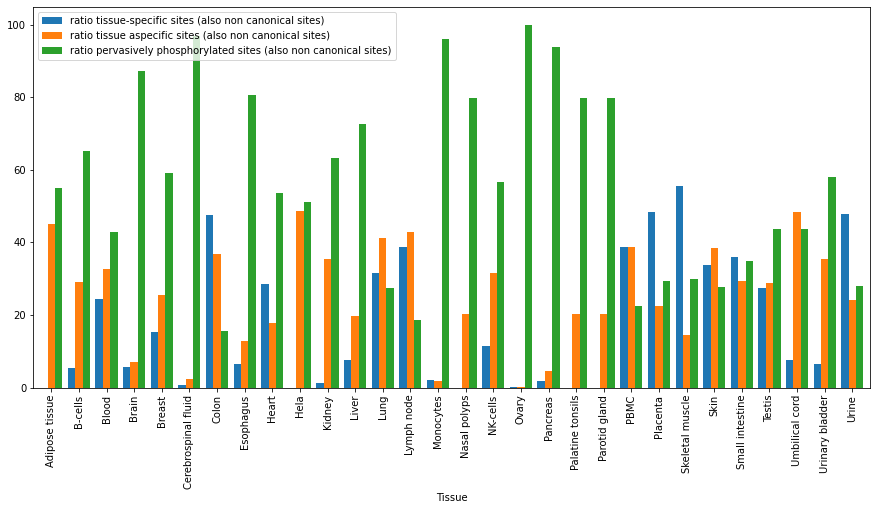

In [122]:
df_all_sites_tissues_sub = df_all_sites_tissues[df_all_sites_tissues["Total"]>=100]
df_all_sites_tissues_sub["ratio tissue-specific sites (also non canonical sites)"] = df_all_sites_tissues_sub["number of tissue-specific sites (also non canonical sites)"]*100/df_all_sites_tissues_sub["Total"]
df_all_sites_tissues_sub["ratio tissue aspecific sites (also non canonical sites)"] = df_all_sites_tissues_sub["number of tissue aspecific sites (also non canonical sites)"]*100/df_all_sites_tissues_sub["Total"]
df_all_sites_tissues_sub["ratio pervasively phosphorylated sites (also non canonical sites)"] = df_all_sites_tissues_sub["number of pervasively phosphorylated sites (also non canonical sites)"]*100/df_all_sites_tissues_sub["Total"]
df_all_sites_tissues_sub[["ratio tissue-specific sites (also non canonical sites)","ratio tissue aspecific sites (also non canonical sites)", "ratio pervasively phosphorylated sites (also non canonical sites)"]]
palette = ["tab:blue", "tab:orange","tab:green", "tab:grey"]
df_all_sites_tissues_sub[["Tissue","ratio tissue-specific sites (also non canonical sites)","ratio tissue aspecific sites (also non canonical sites)", "ratio pervasively phosphorylated sites (also non canonical sites)"]].plot.bar(x="Tissue", figsize =(15, 7), width = 0.8, color=palette)

<AxesSubplot:xlabel='Tissue'>

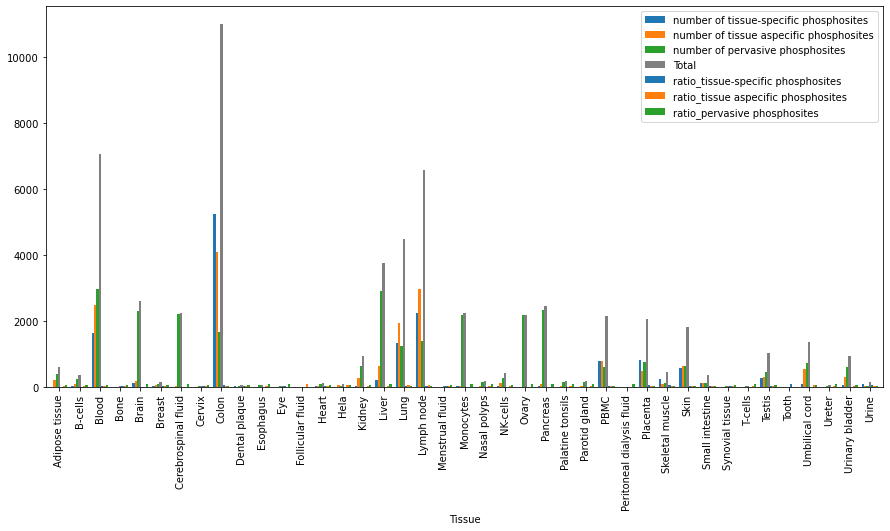

In [123]:
palette = ["tab:blue", "tab:orange","tab:green", "tab:grey"]
df_combined_all_STY_sites.plot.bar(x="Tissue", figsize =(15, 7), width = 0.8, color=palette)

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/2997178475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_all_STY_sites_sub["ratio tissue-specific sites"] = df_combined_all_STY_sites_sub["number of tissue-specific phosphosites"]*100/df_combined_all_STY_sites_sub["Total"]
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/2997178475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_all_STY_sites_sub["ratio tissue aspecific sites"] = df_combined_all_STY_sites_sub["n

<AxesSubplot:xlabel='Tissue'>

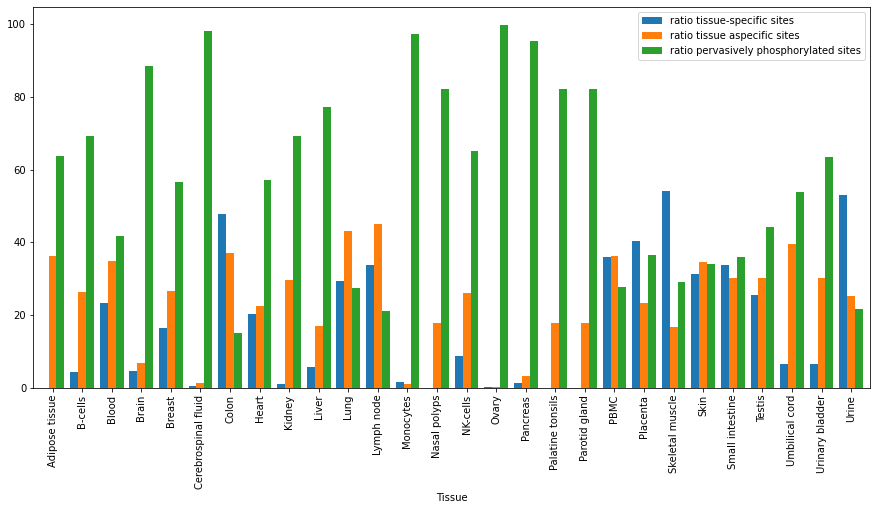

In [124]:
df_combined_all_STY_sites_sub = df_combined_all_STY_sites[df_combined_all_STY_sites["Total"]>=100]
df_combined_all_STY_sites_sub["ratio tissue-specific sites"] = df_combined_all_STY_sites_sub["number of tissue-specific phosphosites"]*100/df_combined_all_STY_sites_sub["Total"]
df_combined_all_STY_sites_sub["ratio tissue aspecific sites"] = df_combined_all_STY_sites_sub["number of tissue aspecific phosphosites"]*100/df_combined_all_STY_sites_sub["Total"]
df_combined_all_STY_sites_sub["ratio pervasively phosphorylated sites"] = df_combined_all_STY_sites_sub["number of pervasive phosphosites"]*100/df_combined_all_STY_sites_sub["Total"]
df_combined_all_STY_sites_sub[["ratio tissue-specific sites","ratio tissue aspecific sites", "ratio pervasively phosphorylated sites"]]
palette = ["tab:blue", "tab:orange","tab:green", "tab:grey"]
df_combined_all_STY_sites_sub[["Tissue","ratio tissue-specific sites","ratio tissue aspecific sites", "ratio pervasively phosphorylated sites"]].plot.bar(x="Tissue", figsize =(15, 7), width = 0.8, color=palette)

We'll now look at phosphosites seen in 2-4 tissues. We'll look at which combinations there are, and whether some are more frequent than others. First, we add which organ systems theses phosphosites have been identified as described above.

In [125]:
list_systems = ["Circulatory system", "Digestive system", "Endocrine system", "Immune system and lymfatic system",
                "Integumentary system", "Muscular system", "Nervous system", "Reproductive system", "Respiratory system",
                "Skeletal system", "Urinary and renal system"]
#data_site_STY.drop(["Bronchoalveolar lavage", "Cartilage", "Sputum"] , axis=1, inplace=True)
list_circulatory = ["Blood", "Cerebrospinal fluid", "Peritoneal dialysis fluid"]
list_reproductive = ["Breast", "Cervix", "Follicular fluid", "Hela", "Menstrual fluid", "Ovary", "Placenta", "Testis",
                    "Umbilical cord"]
list_digestive = ["Colon", "Dental plaque", "Esophagus", "Liver", "Parotid gland", "Pancreas", "Small intestine",
                 "Tooth"]
list_respiratory = ["Lung", "Nasal polyps"]
list_urinary = ["Kidney", "Ureter", "Urinary bladder", "Urine"]
list_endocrine = ["Adipose tissue"]
list_integumentary = ["Skin"]
list_immune = ["B-cells", "Lymph node", "Monocytes", "NK-cells", "Palatine tonsil", "PBMC", "T-cells"]
list_muscular = ["Heart", "Skeletal muscle"]
list_nervous = ["Brain", "Eye"]
list_skeletal = ["Bone", "Synovial tissue"]
#list_tissues.remove("Bronchoalveolar lavage") #these tissues no longer have any data when we remove the non-STY sites
#list_tissues.remove("Cartilage")
#list_tissues.remove("Sputum")
for system in list_systems:
    data_site_STY.loc[:, system]=0
for tissue in list_tissues_STY:
    if tissue in list_circulatory:
        data_site_STY.loc[data_site_STY[tissue]==1, "Circulatory system"]=1
    if tissue in list_digestive:
        data_site_STY.loc[data_site_STY[tissue]==1, "Digestive system"]=1
    if tissue in list_endocrine:
        data_site_STY.loc[data_site_STY[tissue]==1, "Endocrine system"]=1
    if tissue in list_immune:
        data_site_STY.loc[data_site_STY[tissue]==1, "Immune system and lymfatic system"]=1
    if tissue in list_integumentary:
        data_site_STY.loc[data_site_STY[tissue]==1, "Integumentary system"]=1
    if tissue in list_muscular:
        data_site_STY.loc[data_site_STY[tissue]==1, "Muscular system"]=1
    if tissue in list_nervous:
        data_site_STY.loc[data_site_STY[tissue]==1, "Nervous system"]=1
    if tissue in list_reproductive:
        data_site_STY.loc[data_site_STY[tissue]==1, "Reproductive system"]=1
    if tissue in list_respiratory:
        data_site_STY.loc[data_site_STY[tissue]==1, "Respiratory system"]=1
    if tissue in list_skeletal:
        data_site_STY.loc[data_site_STY[tissue]==1, "Skeletal system"]=1
    if tissue in list_urinary:
        data_site_STY.loc[data_site_STY[tissue]==1, "Urinary and renal system"]=1
data_site_STY["Total_systems"] = data_site_STY[list_systems].sum(axis=1)
data_site_STY.head()

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/4135069768.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

ACC_ID  UP_POS           tissue modres  Adipose tissue  B-cells  \
0   A0A075B6H7      30             Lung      T               0        0   
1   A0A075B6S5      52  Menstrual fluid      S               0        0   
6   A0A087WXM9     223           Testis      S               0        0   
13  A0A0B4J2D5     124             PBMC      S               0        0   
14  A0A0B4J2D5     145             PBMC      T               0        0   

    Blood  Bone  Brain  Breast  ...  Endocrine system  \
0       0     0      0       0  ...                 0   
1       0     0      0       0  ...                 0   
6       0     0      0       0  ...                 0   
13      0     0      0       0  ...                 0   
14      0     0      0       0  ...                 0   

    Immune system and lymfatic system  Integumentary system  Muscular system  \
0                                   0                     0                0   
1                                   0                     0                0   
6                                   0                     0                0   
13                                  1                     0                0   
14                                  1                     0                0   

    Nervous system  Reproductive system  Respiratory system  Skeletal system  \
0                0                    0                   1                0   
1                0                    1                   0                0   
6                0                    1                   0                0   
13               0                    0                   0                0   
14               0                    0                   0                0   

    Urinary and renal system  Total_systems  
0                          0              1  
1                          0              1  
6                          0              1  
13                         0              1  
14                         0              1  

[5 rows x 58 columns]

We'll now look at the data for phosphosites seen in 2 organ systems.

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/2661068713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_groups_site["system 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/2661068713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_groups_site["system 2"] = 0
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



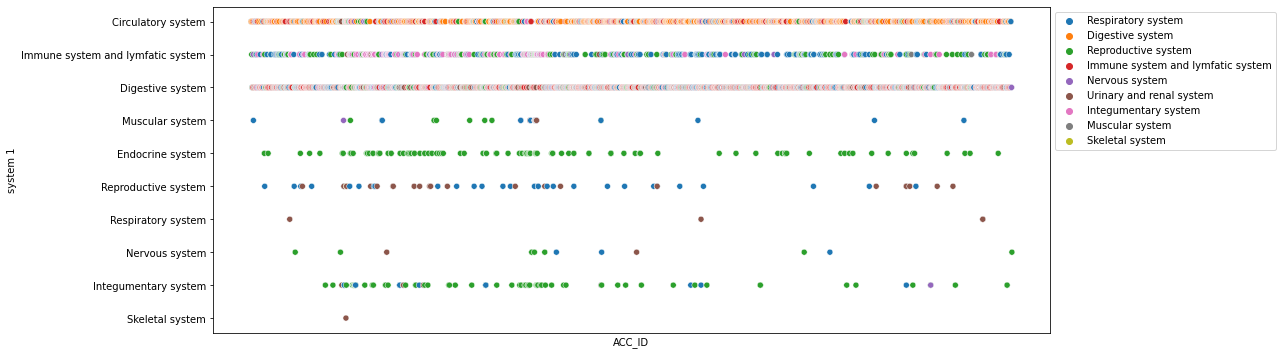

In [126]:
two_groups_site = data_site_STY[(data_site_STY["Total_systems"]==2)]
two_groups_site["system 1"] = 0
two_groups_site["system 2"] = 0
for system in list_systems:
    two_groups_site.loc[(two_groups_site[system]==1) & (two_groups_site["system 1"]!=0), "system 2"]=system
    two_groups_site.loc[(two_groups_site[system]==1) & (two_groups_site["system 1"]==0), "system 1"]=system
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="system 1", hue="system 2", data=two_groups_site)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

In [127]:
print(two_groups_site.shape[0])
two_groups_site_counts = two_groups_site.groupby(["system 1", "system 2"], as_index=False)["ACC_ID"].count()
two_groups_site_counts.sort_values(by=["ACC_ID"], ascending=False, inplace=True)
print(two_groups_site_counts.shape[0])
two_groups_site_counts.head(30)
#Almost a quarter in the digestive system and immune system, but most likely due to the size of these systems than any real association

4196
41


system 1                           system 2  \
9                    Digestive system  Immune system and lymfatic system   
0                  Circulatory system                   Digestive system   
14                   Digestive system                 Respiratory system   
1                  Circulatory system  Immune system and lymfatic system   
16                   Digestive system           Urinary and renal system   
18  Immune system and lymfatic system               Integumentary system   
22  Immune system and lymfatic system                 Respiratory system   
13                   Digestive system                Reproductive system   
21  Immune system and lymfatic system                Reproductive system   
6                  Circulatory system                 Respiratory system   
17                   Endocrine system                Reproductive system   
26               Integumentary system                Reproductive system   
5                  Circulatory system                Reproductive system   
20  Immune system and lymfatic system                     Nervous system   
36                Reproductive system                 Respiratory system   
12                   Digestive system                     Nervous system   
10                   Digestive system               Integumentary system   
4                  Circulatory system                     Nervous system   
38                Reproductive system           Urinary and renal system   
27               Integumentary system                 Respiratory system   
31                    Muscular system                 Respiratory system   
11                   Digestive system                    Muscular system   
33                     Nervous system                Reproductive system   
30                    Muscular system                Reproductive system   
29                    Muscular system                     Nervous system   
19  Immune system and lymfatic system                    Muscular system   
2                  Circulatory system               Integumentary system   
23  Immune system and lymfatic system           Urinary and renal system   
32                    Muscular system           Urinary and renal system   
8                  Circulatory system           Urinary and renal system   

    ACC_ID  
9     1064  
0      622  
14     514  
1      405  
16     247  
18     210  
22     190  
13     181  
21     149  
6      123  
17     102  
26      61  
5       57  
20      31  
36      30  
12      29  
10      29  
4       23  
38      22  
27      17  
31      12  
11       9  
33       8  
30       7  
29       7  
19       7  
2        6  
23       5  
32       4  
8        4

In [128]:
site_two_tissues = data_site_STY[data_site_STY["Total"]==2]
print(site_two_tissues.shape[0])
site_two_tissues["tissue 1"] = 0
site_two_tissues["tissue 2"] = 0

for tissue in list_tissues_STY:
    site_two_tissues.loc[((site_two_tissues[tissue]==1)&(site_two_tissues["tissue 1"]!=0)),
                        "tissue 2"]=tissue
    site_two_tissues.loc[((site_two_tissues[tissue]==1)&(site_two_tissues["tissue 1"]==0)),
                        "tissue 1"]=tissue
site_two_tissues_counts = site_two_tissues.groupby(["tissue 1", "tissue 2"], as_index=False)["ACC_ID"].count()
site_two_tissues_counts.sort_values(by=["ACC_ID"], ascending=False, inplace=True)

print(site_two_tissues_counts.shape[0])
site_two_tissues_counts.sort_values(by=["ACC_ID"], ascending=False).head(30)

3831
156


C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/3859666117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_two_tissues["tissue 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/3859666117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_two_tissues["tissue 2"] = 0
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

tissue 1             tissue 2  ACC_ID
56            Colon           Lymph node     904
11            Blood                Colon     584
55            Colon                 Lung     469
16            Blood           Lymph node     276
127            PBMC                 Skin     197
96             Lung           Lymph node     145
15            Blood                 Lung     123
0    Adipose tissue       Umbilical cord     100
61            Colon             Placenta      62
54            Colon                Liver      46
65            Colon               Testis      43
115      Lymph node               Testis      43
145            Skin       Umbilical cord      41
20            Blood                 PBMC      40
21            Blood             Placenta      36
99             Lung                 PBMC      35
111      Lymph node             Placenta      33
130            PBMC       Umbilical cord      31
59            Colon                 PBMC      31
78             Hela             Pancreas      29
85            Liver           Lymph node      23
109      Lymph node                 PBMC      20
33            Brain           Lymph node      19
63            Colon                 Skin      18
134        Placenta                 Skin      18
102            Lung                 Skin      17
1           B-cells                Blood      16
30            Brain  Cerebrospinal fluid      15
31            Brain                Colon      15
14            Blood                Liver      13

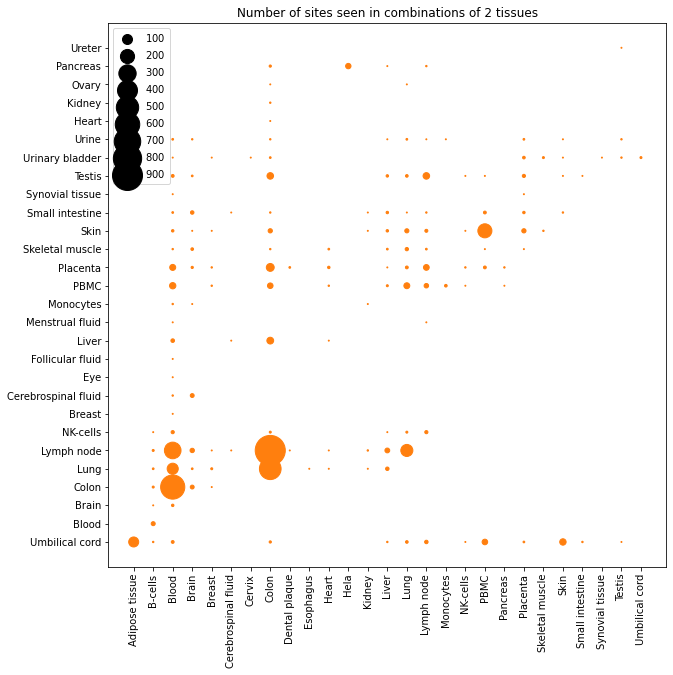

In [129]:
site_two_tissues_counts.sort_values(["tissue 1", "tissue 2"], inplace=True)
plt.figure(figsize=(10,10))
sc = plt.scatter(x=site_two_tissues_counts["tissue 1"], y=site_two_tissues_counts["tissue 2"], s=site_two_tissues_counts["ACC_ID"], color="tab:orange")
plt.xticks(rotation=90)
plt.title("Number of sites seen in combinations of 2 tissues")
plt.legend(*sc.legend_elements("sizes", num=6))
#plt.savefig("WP1sites_two_tissues.png", format="png", bbox_inches="tight")
plt.show()

In [130]:
two_tissues_counts_sorted_sites=pd.DataFrame({})
list_tissue1 = []
list_tissue2 = []
for tissue1 in list_tissues_STY:
    for tissue2 in list_tissues_STY:
        list_tissue1.append(tissue1)
        list_tissue2.append(tissue2)
print(len(list_tissue1))
print(len(list_tissue2))
two_tissues_counts_sorted_sites["tissue 1"] = list_tissue1
two_tissues_counts_sorted_sites["tissue 2"] = list_tissue2
two_tissues_counts_sorted_sites["protein_count"] = 0

1681
1681


In [131]:
two_tissues_counts_sorted_all_sites = pd.merge(two_tissues_counts_sorted_sites, site_two_tissues_counts, on=["tissue 1", "tissue 2"], how="outer")
two_tissues_counts_sorted_all_sites.fillna(0, inplace=True)
two_tissues_counts_sorted_all_sites#.sort_values(by=["ACC_ID"], ascending=False, inplace=False)

tissue 1         tissue 2  protein_count  ACC_ID
0     Adipose tissue   Adipose tissue              0     0.0
1     Adipose tissue          B-cells              0     0.0
2     Adipose tissue            Blood              0     0.0
3     Adipose tissue             Bone              0     0.0
4     Adipose tissue            Brain              0     0.0
...              ...              ...            ...     ...
1676           Urine            Tooth              0     0.0
1677           Urine   Umbilical cord              0     0.0
1678           Urine           Ureter              0     0.0
1679           Urine  Urinary bladder              0     0.0
1680           Urine            Urine              0     0.0

[1681 rows x 4 columns]

In [132]:
two_tissues_counts_sorted_sites = two_tissues_counts_sorted_all_sites.loc[(~(two_tissues_counts_sorted_all_sites==0).all(axis=1))|(two_tissues_counts_sorted_all_sites["tissue 1"]=="Adipose tissue")]
two_tissues_counts_sorted_sites.head(50)

tissue 1                   tissue 2  protein_count  ACC_ID
0   Adipose tissue             Adipose tissue              0     0.0
1   Adipose tissue                    B-cells              0     0.0
2   Adipose tissue                      Blood              0     0.0
3   Adipose tissue                       Bone              0     0.0
4   Adipose tissue                      Brain              0     0.0
5   Adipose tissue                     Breast              0     0.0
6   Adipose tissue        Cerebrospinal fluid              0     0.0
7   Adipose tissue                     Cervix              0     0.0
8   Adipose tissue                      Colon              0     0.0
9   Adipose tissue              Dental plaque              0     0.0
10  Adipose tissue                  Esophagus              0     0.0
11  Adipose tissue                        Eye              0     0.0
12  Adipose tissue           Follicular fluid              0     0.0
13  Adipose tissue                      Heart              0     0.0
14  Adipose tissue                       Hela              0     0.0
15  Adipose tissue                     Kidney              0     0.0
16  Adipose tissue                      Liver              0     0.0
17  Adipose tissue                       Lung              0     0.0
18  Adipose tissue                 Lymph node              0     0.0
19  Adipose tissue            Menstrual fluid              0     0.0
20  Adipose tissue                  Monocytes              0     0.0
21  Adipose tissue               Nasal polyps              0     0.0
22  Adipose tissue                   NK-cells              0     0.0
23  Adipose tissue                      Ovary              0     0.0
24  Adipose tissue                   Pancreas              0     0.0
25  Adipose tissue           Palatine tonsils              0     0.0
26  Adipose tissue              Parotid gland              0     0.0
27  Adipose tissue                       PBMC              0     0.0
28  Adipose tissue  Peritoneal dialysis fluid              0     0.0
29  Adipose tissue                   Placenta              0     0.0
30  Adipose tissue            Skeletal muscle              0     0.0
31  Adipose tissue                       Skin              0     0.0
32  Adipose tissue            Small intestine              0     0.0
33  Adipose tissue            Synovial tissue              0     0.0
34  Adipose tissue                    T-cells              0     0.0
35  Adipose tissue                     Testis              0     0.0
36  Adipose tissue                      Tooth              0     0.0
37  Adipose tissue             Umbilical cord              0   100.0
38  Adipose tissue                     Ureter              0     0.0
39  Adipose tissue            Urinary bladder              0     0.0
40  Adipose tissue                      Urine              0     0.0
41         B-cells             Adipose tissue              0     0.0
42         B-cells                    B-cells              0     0.0
43         B-cells                      Blood              0    16.0
44         B-cells                       Bone              0     0.0
45         B-cells                      Brain              0     1.0
46         B-cells                     Breast              0     0.0
47         B-cells        Cerebrospinal fluid              0     0.0
48         B-cells                     Cervix              0     0.0
49         B-cells                      Colon              0     4.0

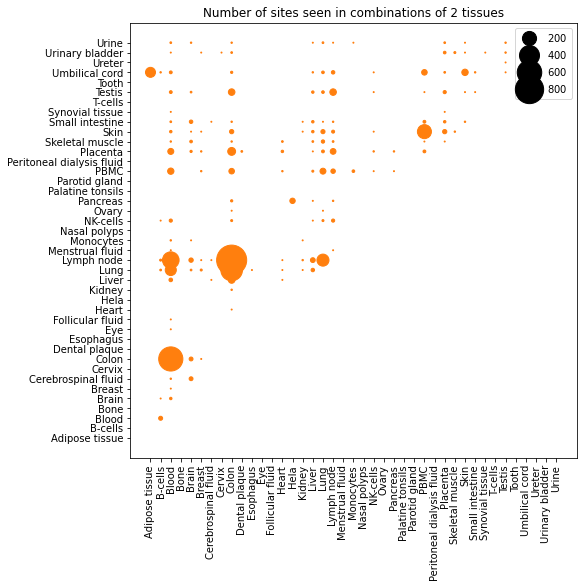

In [133]:
plt.figure(figsize=(8,8))
sc = plt.scatter(x=two_tissues_counts_sorted_sites["tissue 1"], y=two_tissues_counts_sorted_sites["tissue 2"], s=two_tissues_counts_sorted_sites["ACC_ID"], color="tab:orange")
plt.xticks(rotation=90)
plt.title("Number of sites seen in combinations of 2 tissues")
plt.legend(*sc.legend_elements("sizes", num=6))
#plt.savefig("WP1sites_two_tissues_sorted.png", format="png", bbox_inches="tight")
plt.show()

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/674022593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_groups_site["system 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/674022593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  three_groups_site["system 2"] = 0
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/674022593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

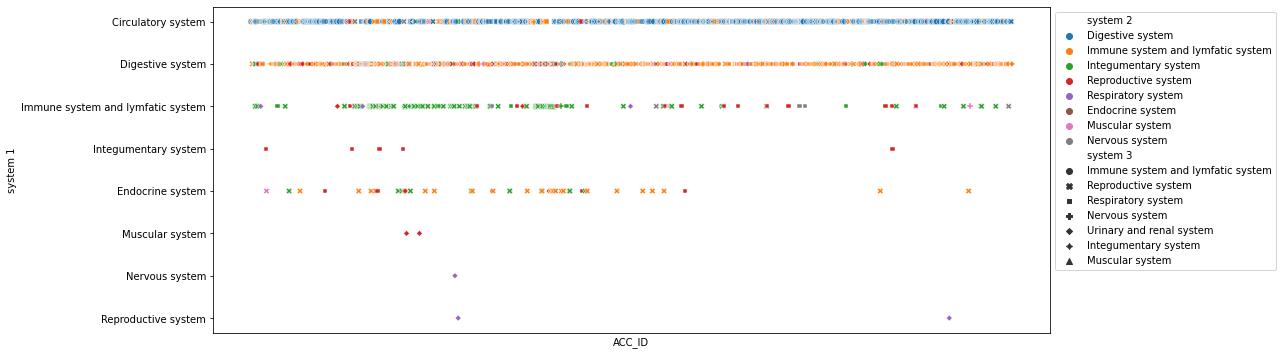

In [134]:
three_groups_site = data_site_STY[(data_site_STY["Total_systems"]==3)]
three_groups_site["system 1"] = 0
three_groups_site["system 2"] = 0
three_groups_site["system 3"] = 0
for system in list_systems:
    three_groups_site.loc[(three_groups_site[system]==1)&(three_groups_site["system 1"]!=0)&(three_groups_site["system 2"]!= 0), "system 3"]=system
    three_groups_site.loc[(three_groups_site[system]==1)&(three_groups_site["system 1"]!=0)&(three_groups_site["system 2"]== 0), "system 2"]=system
    three_groups_site.loc[(three_groups_site[system]==1)&(three_groups_site["system 1"]==0), "system 1"]=system
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="system 1", hue="system 2", style="system 3", data=three_groups_site)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/803255136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_groups_site["system 1"] = 0
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/803255136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_groups_site["system 2"] = 0
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/803255136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

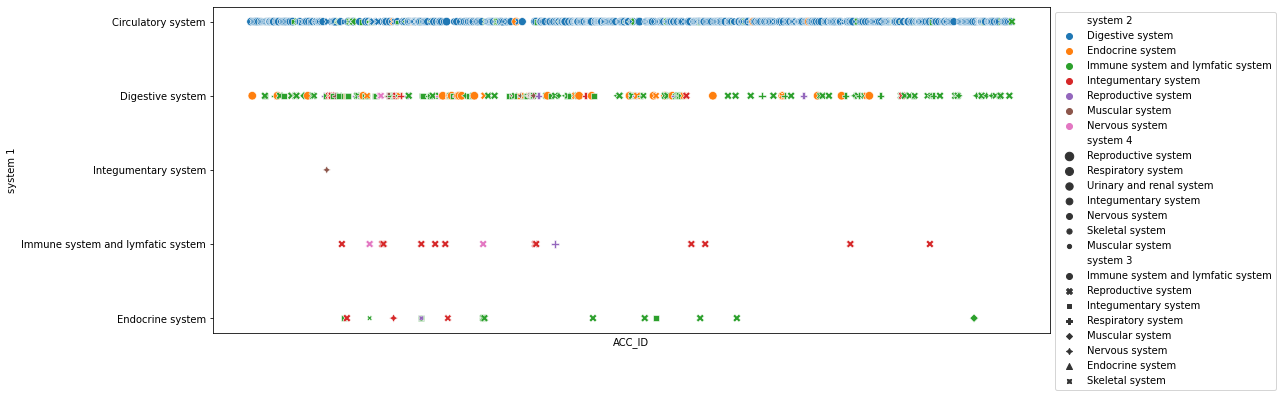

In [135]:
four_groups_site = data_site_STY[(data_site_STY["Total_systems"]==4)]
four_groups_site["system 1"] = 0
four_groups_site["system 2"] = 0
four_groups_site["system 3"] = 0
four_groups_site["system 4"] = 0
for system in list_systems:
    four_groups_site.loc[(four_groups_site[system]==1)&(four_groups_site["system 3"]!= 0), "system 4"]=system
    four_groups_site.loc[(four_groups_site[system]==1)&(four_groups_site["system 2"]!= 0)&(four_groups_site["system 3"]== 0), "system 3"]=system
    four_groups_site.loc[(four_groups_site[system]==1)&(four_groups_site["system 1"]!=0)&(four_groups_site["system 2"]== 0), "system 2"]=system
    four_groups_site.loc[(four_groups_site[system]==1)&(four_groups_site["system 1"]==0), "system 1"]=system
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="system 1", hue="system 2", style="system 3", size="system 4", data=four_groups_site)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

In [136]:
three_tissues_sites = data_site_STY[data_site_STY["Total"]==3]
print(three_tissues_sites.shape[0])
three_tissues_sites.head()

1682


ACC_ID  UP_POS                                             tissue modres  \
60   A0FGR8     758                           Liver,Liver,Blood,Testis      S   
67   A0JLT2     226  Blood,Blood,Colon,Colon,Colon,Colon,Colon,Colo...      S   
84   A0M8Q6      31  Nasal polyps, Palatine tonsils, Parotid gland,...      S   
91   A0MZ66     493  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   
150  A2RRP1     473  Blood,Blood,Blood,Blood,Blood,Placenta,Placent...      S   

     Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
60                0        0      1     0      0       0  ...   
67                0        0      1     0      0       0  ...   
84                0        0      0     0      0       0  ...   
91                0        0      0     0      0       0  ...   
150               0        0      1     0      0       0  ...   

     Endocrine system  Immune system and lymfatic system  \
60                  0                                  0   
67                  0                                  0   
84                  0                                  0   
91                  0                                  1   
150                 0                                  1   

     Integumentary system  Muscular system  Nervous system  \
60                      0                0               0   
67                      0                0               0   
84                      0                0               0   
91                      0                0               0   
150                     0                0               0   

     Reproductive system  Respiratory system  Skeletal system  \
60                     1                   0                0   
67                     0                   1                0   
84                     0                   1                0   
91                     1                   0                0   
150                    1                   0                0   

     Urinary and renal system  Total_systems  
60                          0              3  
67                          0              3  
84                          0              2  
91                          0              3  
150                         0              3  

[5 rows x 58 columns]

In [139]:
three_tissues_sites

ACC_ID  UP_POS                                             tissue  \
60     A0FGR8     758                           Liver,Liver,Blood,Testis   
67     A0JLT2     226  Blood,Blood,Colon,Colon,Colon,Colon,Colon,Colo...   
84     A0M8Q6      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
91     A0MZ66     493  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
150    A2RRP1     473  Blood,Blood,Blood,Blood,Blood,Placenta,Placent...   
...       ...     ...                                                ...   
46321  Q9Y6N7     940    Blood,Blood,Lung,Lung,Lung,Lung,Lung,Lymph node   
46338  Q9Y6Q9     214  Blood,Blood,Blood,Blood,Blood,Blood,Blood,Colo...   
46343  Q9Y6Q9     857  Blood,Blood,Blood,Blood,Blood,Blood,Blood,Colo...   
46348  Q9Y6Q9    1330  Blood,Blood,Blood,Blood,Blood,Colon,Lung,Lung,...   
46427  Q9Y6X9     743  Blood,Blood,Blood,Blood,Blood,Blood,Blood,Colo...   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
60         S               0        0      1     0      0       0  ...   
67         S               0        0      1     0      0       0  ...   
84         S               0        0      0     0      0       0  ...   
91         S               0        0      0     0      0       0  ...   
150        S               0        0      1     0      0       0  ...   
...      ...             ...      ...    ...   ...    ...     ...  ...   
46321      S               0        0      1     0      0       0  ...   
46338      S               0        0      1     0      0       0  ...   
46343      S               0        0      1     0      0       0  ...   
46348      S               0        0      1     0      0       0  ...   
46427      S               0        0      1     0      0       0  ...   

       Muscular system  Nervous system  Reproductive system  \
60                   0               0                    1   
67                   0               0                    0   
84                   0               0                    0   
91                   0               0                    1   
150                  0               0                    1   
...                ...             ...                  ...   
46321                0               0                    0   
46338                0               0                    1   
46343                0               0                    0   
46348                0               0                    0   
46427                0               0                    1   

       Respiratory system  Skeletal system  Urinary and renal system  \
60                      0                0                         0   
67                      1                0                         0   
84                      1                0                         0   
91                      0                0                         0   
150                     0                0                         0   
...                   ...              ...                       ...   
46321                   1                0                         0   
46338                   0                0                         0   
46343                   1                0                         0   
46348                   1                0                         0   
46427                   0                0                         0   

       Total_systems      Tissue 1          Tissue 2       Tissue 3  
60                 3         Blood             Liver         Testis  
67                 3         Blood             Colon           Lung  
84                 2  Nasal polyps  Palatine tonsils  Parotid gland  
91                 3         Colon        Lymph node         Testis  
150                3         Blood        Lymph node       Placenta  
...              ...           ...               ...            ...  
46321              3         Blood              Lung     Lymph node  
46338              3   

In [137]:
three_tissues_sites.loc[:, "Tissue 1"] = 0
three_tissues_sites.loc[:, "Tissue 2"] = 0
three_tissues_sites.loc[:, "Tissue 3"] = 0
for tissue in list_tissues_STY:
    three_tissues_sites.loc[((three_tissues_sites[tissue]==1)&(three_tissues_sites["Tissue 1"]!=0)&(three_tissues_sites["Tissue 2"]!=0)&(three_tissues_sites["Tissue 3"]==0)), "Tissue 3"] = tissue
    three_tissues_sites.loc[((three_tissues_sites[tissue]==1)&(three_tissues_sites["Tissue 1"]!=0)&(three_tissues_sites["Tissue 2"]==0)), "Tissue 2"] = tissue
    three_tissues_sites.loc[((three_tissues_sites[tissue]==1)&(three_tissues_sites["Tissue 1"]==0)), "Tissue 1"] = tissue

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [138]:
three_grouped = three_tissues_sites.groupby(["Tissue 1", "Tissue 2", "Tissue 3"], as_index=False)["ACC_ID"].count()
three_grouped

Tissue 1         Tissue 2         Tissue 3  ACC_ID
0    Adipose tissue            Blood   Umbilical cord       3
1    Adipose tissue           Breast   Umbilical cord       1
2    Adipose tissue            Colon   Umbilical cord       5
3    Adipose tissue            Liver   Umbilical cord       2
4    Adipose tissue             Lung   Umbilical cord       7
..              ...              ...              ...     ...
221        Pancreas             PBMC             Skin       1
222        Pancreas         Placenta  Small intestine       1
223        Pancreas  Small intestine  Synovial tissue       1
224        Placenta  Urinary bladder            Urine       1
225            Skin  Small intestine   Umbilical cord       8

[226 rows x 4 columns]

In [140]:
three_grouped["ACC_ID"].value_counts()

1      116
2       35
3       16
4       12
5        6
8        5
13       4
6        4
15       3
7        3
9        3
12       2
11       2
30       1
28       1
220      1
44       1
17       1
14       1
63       1
24       1
16       1
34       1
325      1
201      1
20       1
10       1
69       1
Name: ACC_ID, dtype: int64

In [141]:
three_grouped[three_grouped["ACC_ID"]>1]

Tissue 1         Tissue 2         Tissue 3  ACC_ID
0    Adipose tissue            Blood   Umbilical cord       3
2    Adipose tissue            Colon   Umbilical cord       5
3    Adipose tissue            Liver   Umbilical cord       2
4    Adipose tissue             Lung   Umbilical cord       7
5    Adipose tissue       Lymph node   Umbilical cord      10
..              ...              ...              ...     ...
217            PBMC             Skin  Small intestine       4
218            PBMC             Skin           Testis       2
219            PBMC             Skin   Umbilical cord      69
220            PBMC  Small intestine   Umbilical cord       3
225            Skin  Small intestine   Umbilical cord       8

[110 rows x 4 columns]

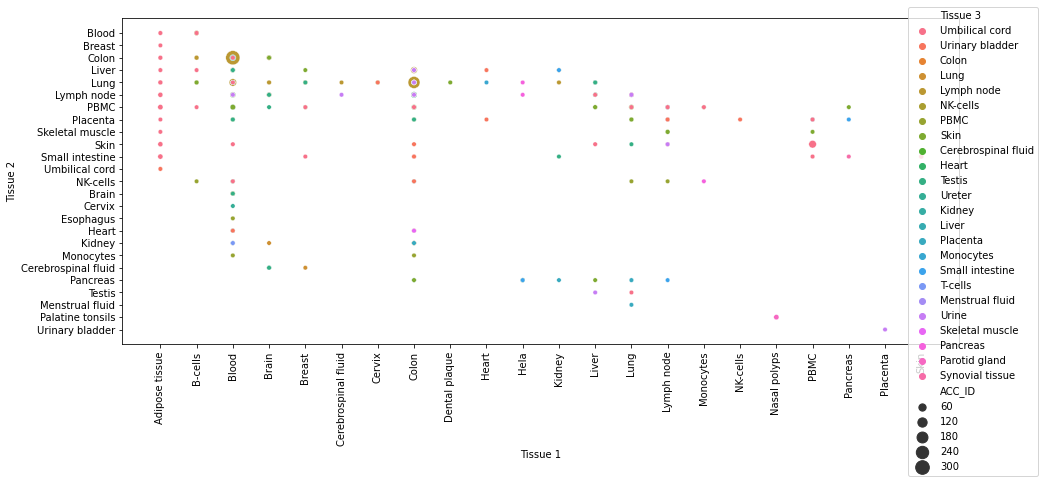

In [142]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=three_grouped, x="Tissue 1", y="Tissue 2", size="ACC_ID", hue="Tissue 3", sizes=(20,200)).legend(loc="upper right", bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=90)
plt.show()

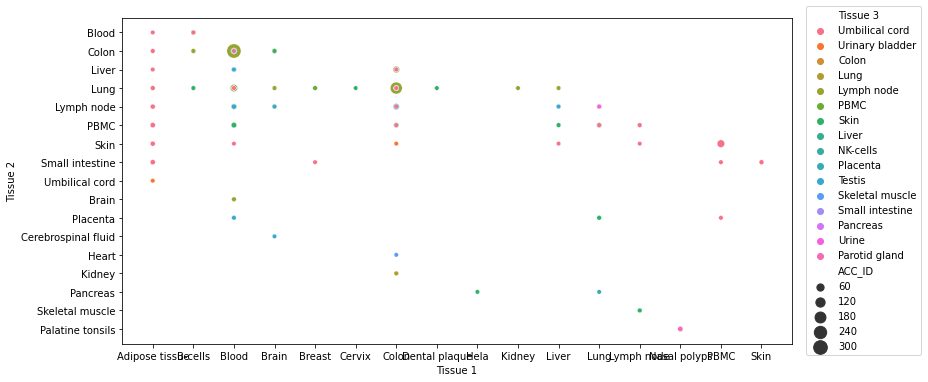

In [143]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=three_grouped[three_grouped["ACC_ID"]>1], x="Tissue 1", y="Tissue 2", size="ACC_ID", hue="Tissue 3", sizes=(20,200)).legend(loc="upper right", bbox_to_anchor=(1.2, 1.05))
#plt.xticks(rotation=90)
plt.show()

In [144]:
four_tissues_sites = data_site_STY[data_site_STY["Total"]==4]
four_tissues_sites

ACC_ID  UP_POS                                             tissue  \
56     A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...   
57     A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...   
227    A6NCF6     296              Urinary bladder, Colon, Kidney, Liver   
238    A6ND91     168  Liver,Liver,Liver,Urinary bladder, Colon, Kidn...   
295    A6NKT7    1276  Blood,Testis,Placenta,Placenta,Lymph node,Lymp...   
...       ...     ...                                                ...   
46231  Q9Y6E0     184  PBMC,PBMC,Colon,Colon,Colon,Colon,Colon,Colon,...   
46257  Q9Y6I3     419  Liver,Liver,Testis,Testis,Lung,Lymph node,Lymp...   
46291  Q9Y6M1     162  Liver,Liver,Blood,Colon,Colon,Colon,Colon,Colo...   
46292  Q9Y6M1     164  Blood,Blood,Blood,Lung,Colon,Colon,Colon,Colon...   
46424  Q9Y6X9     725  Umbilical cord,Umbilical cord,Blood,Blood,Lung...   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
56         S               0        0      1     0      0       0  ...   
57         S               0        0      1     0      0       0  ...   
227        S               0        0      0     0      0       0  ...   
238        S               0        0      0     0      0       0  ...   
295        S               0        0      1     0      0       0  ...   
...      ...             ...      ...    ...   ...    ...     ...  ...   
46231      T               0        0      1     0      0       0  ...   
46257      S               0        0      0     0      0       0  ...   
46291      S               0        0      1     0      0       0  ...   
46292      S               0        0      1     0      0       0  ...   
46424      S               0        0      1     0      0       0  ...   

       Endocrine system  Immune system and lymfatic system  \
56                    0                                  1   
57                    0                                  1   
227                   0                                  0   
238                   0                                  0   
295                   0                                  1   
...                 ...                                ...   
46231                 0                                  1   
46257                 0                                  1   
46291                 0                                  1   
46292                 0                                  1   
46424                 0                                  1   

       Integumentary system  Muscular system  Nervous system  \
56                        0                0               0   
57                        0                0               0   
227                       0                0               0   
238                       0                0               0   
295                       0                0               0   
...                     ...              ...             ...   
46231                     0                0               0   
46257                     0                0               0   
46291                     0                0               0   
46292                     0                0               0   
46424                     0                0               0   

       Reproductive system  Respiratory system  Skeletal system  \
56                       1                   0                0   
57                       0                   0                0   
227                      0                   0                0   
238                      0                   0                0   
295                      1                   0                0   
...                    ...                 ...              ...   
46231                    0                   0                0   
46257                    1                   1                0   
46291                    0                   0                0   
46292                

In [145]:
four_tissues_sites.loc[:, "Tissue 1"] = 0
four_tissues_sites.loc[:, "Tissue 2"] = 0
four_tissues_sites.loc[:, "Tissue 3"] = 0
four_tissues_sites.loc[:, "Tissue 4"] = 0
for tissue in list_tissues_STY:
    four_tissues_sites.loc[(((four_tissues_sites["Tissue 1"]!=0)&(four_tissues_sites["Tissue 2"]!=0)&(four_tissues_sites["Tissue 3"]!=0)&(four_tissues_sites["Tissue 4"]==0))&(
    four_tissues_sites[tissue]==1)), "Tissue 4"] = tissue
    four_tissues_sites.loc[(((four_tissues_sites["Tissue 1"]!=0)&(four_tissues_sites["Tissue 2"]!=0)&(four_tissues_sites["Tissue 3"]==0))&(
    four_tissues_sites[tissue]==1)), "Tissue 3"] = tissue
    four_tissues_sites.loc[(((four_tissues_sites["Tissue 1"]!=0)&(four_tissues_sites["Tissue 2"]==0))&(
    four_tissues_sites[tissue]==1)), "Tissue 2"] = tissue
    four_tissues_sites.loc[(((four_tissues_sites["Tissue 1"]==0))&(
    four_tissues_sites[tissue]==1)), "Tissue 1"] = tissue
four_tissues_sites

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ACC_ID  UP_POS                                             tissue  \
56     A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...   
57     A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...   
227    A6NCF6     296              Urinary bladder, Colon, Kidney, Liver   
238    A6ND91     168  Liver,Liver,Liver,Urinary bladder, Colon, Kidn...   
295    A6NKT7    1276  Blood,Testis,Placenta,Placenta,Lymph node,Lymp...   
...       ...     ...                                                ...   
46231  Q9Y6E0     184  PBMC,PBMC,Colon,Colon,Colon,Colon,Colon,Colon,...   
46257  Q9Y6I3     419  Liver,Liver,Testis,Testis,Lung,Lymph node,Lymp...   
46291  Q9Y6M1     162  Liver,Liver,Blood,Colon,Colon,Colon,Colon,Colo...   
46292  Q9Y6M1     164  Blood,Blood,Blood,Lung,Colon,Colon,Colon,Colon...   
46424  Q9Y6X9     725  Umbilical cord,Umbilical cord,Blood,Blood,Lung...   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
56         S               0        0      1     0      0       0  ...   
57         S               0        0      1     0      0       0  ...   
227        S               0        0      0     0      0       0  ...   
238        S               0        0      0     0      0       0  ...   
295        S               0        0      1     0      0       0  ...   
...      ...             ...      ...    ...   ...    ...     ...  ...   
46231      T               0        0      1     0      0       0  ...   
46257      S               0        0      0     0      0       0  ...   
46291      S               0        0      1     0      0       0  ...   
46292      S               0        0      1     0      0       0  ...   
46424      S               0        0      1     0      0       0  ...   

       Nervous system  Reproductive system  Respiratory system  \
56                  0                    1                   0   
57                  0                    0                   0   
227                 0                    0                   0   
238                 0                    0                   0   
295                 0                    1                   0   
...               ...                  ...                 ...   
46231               0                    0                   0   
46257               0                    1                   1   
46291               0                    0                   0   
46292               0                    0                   1   
46424               0                    1                   1   

       Skeletal system  Urinary and renal system  Total_systems  Tissue 1  \
56                   0                         0              4     Blood   
57                   0                         0              3     Blood   
227                  0                         1              2     Colon   
238                  0                         1              2     Colon   
295                  0                         0              3     Blood   
...                ...                       ...            ...       ...   
46231                0                         1              4     Blood   
46257                0                         0              4     Liver   
46291                0                         0              3     Blood   
46292                0                         0              4     Blood   
46424                0                         0              4     Blood   

         Tissue 2    Tissue 3         Tissue 4  
56          Liver  Lymph node           Testis  
57          Colon       Liver       Lymph node  
227        Kidney       Liver  Urinary bladder  
238        Kidney       Liver  Urinary bladder  
295    Lymph node    Placenta           Testis  
...           ...         ...              ...  
46231       Colon        PBMC            Urine  
46257        Lung  Lymph node           Testis  
46291       Colon       Liver       Lymph node

In [146]:
four_tissues_sites_grouped = four_tissues_sites.groupby(["Tissue 1", "Tissue 2", "Tissue 3", "Tissue 4"], as_index=False)["ACC_ID"].count()
four_tissues_sites_grouped

Tissue 1          Tissue 2        Tissue 3         Tissue 4  \
0     Adipose tissue             Blood           Colon   Umbilical cord   
1     Adipose tissue             Blood      Lymph node   Umbilical cord   
2     Adipose tissue             Blood        Placenta   Umbilical cord   
3     Adipose tissue              Bone            PBMC   Umbilical cord   
4     Adipose tissue              Bone  Umbilical cord  Urinary bladder   
..               ...               ...             ...              ...   
201     Nasal polyps  Palatine tonsils   Parotid gland  Skeletal muscle   
202     Nasal polyps  Palatine tonsils   Parotid gland  Small intestine   
203     Nasal polyps  Palatine tonsils   Parotid gland            Urine   
204             PBMC          Placenta            Skin   Umbilical cord   
205  Skeletal muscle            Testis          Ureter  Urinary bladder   

     ACC_ID  
0         1  
1         2  
2         1  
3         1  
4         1  
..      ...  
201       4  
202       1  
203       3  
204       1  
205       1  

[206 rows x 5 columns]

In [147]:
four_tissues_sites_grouped["ACC_ID"].value_counts()

1      118
2       32
4       14
3       13
5        9
6        6
8        3
11       2
15       1
25       1
229      1
10       1
31       1
26       1
198      1
18       1
9        1
Name: ACC_ID, dtype: int64

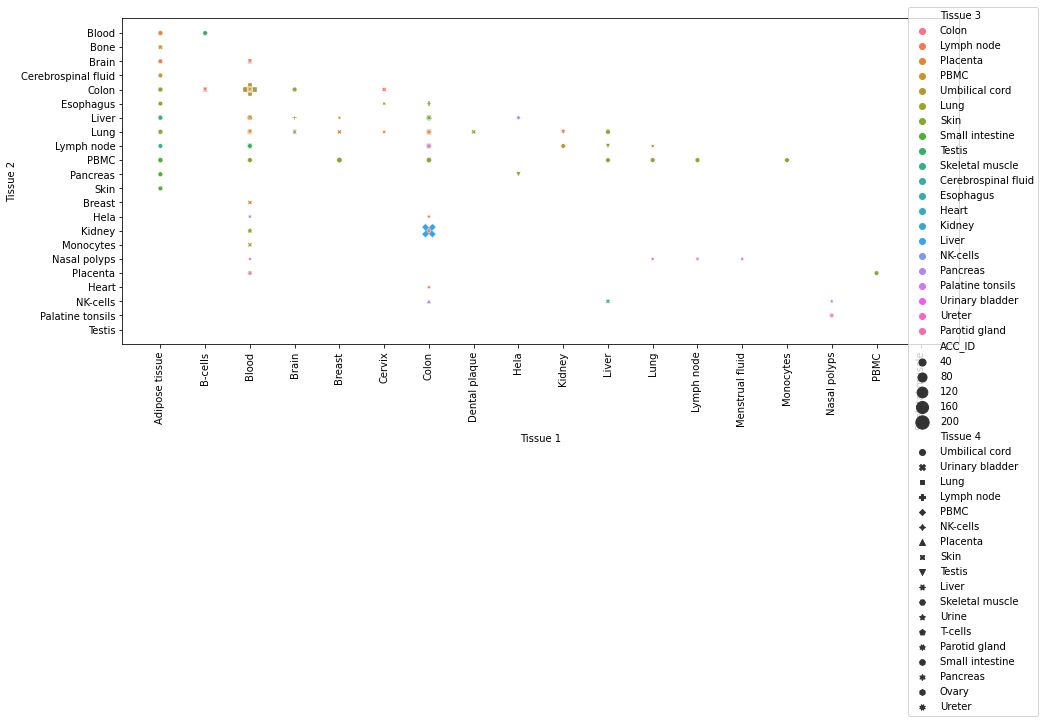

In [148]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=four_tissues_sites_grouped, x="Tissue 1", y="Tissue 2", size="ACC_ID", hue="Tissue 3", style="Tissue 4", sizes=(20,200)).legend(loc="upper right", bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=90)
plt.show()

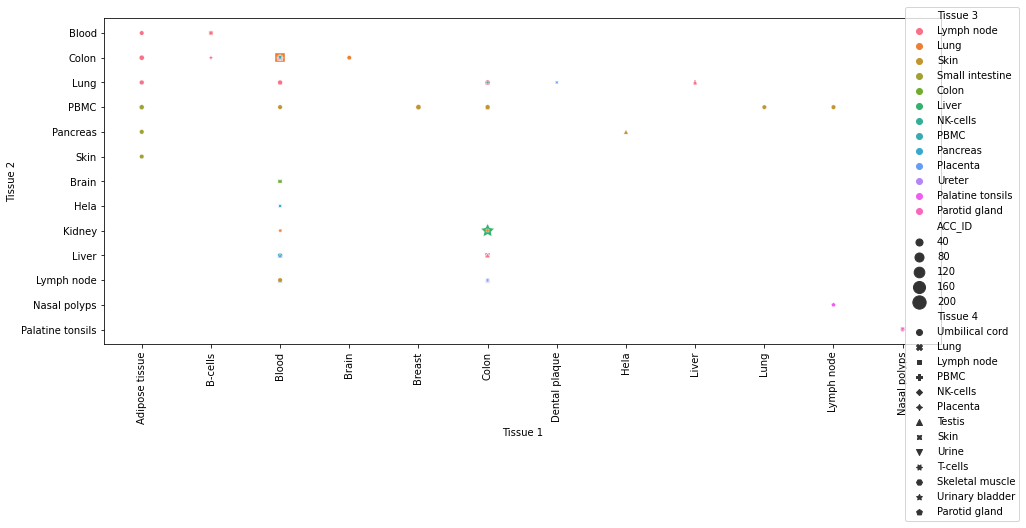

In [149]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=four_tissues_sites_grouped[four_tissues_sites_grouped["ACC_ID"]>1], x="Tissue 1", y="Tissue 2", size="ACC_ID", hue="Tissue 3", style="Tissue 4", sizes=(20,200)).legend(loc="upper right", bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=90)
plt.show()

### Amount S,T,Y residues after filtering non-canonical sites for each of the three categories

We now take a look at the percentage of S,T,Y per tissue after filtering for the non canonical sites. We do this for each of the three categories seperately.

In [150]:
#STY_t_spec_sites.head()
residues_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
for tissue in list_tissues_STY:
    nr_sites = STY_t_spec_sites[STY_t_spec_sites[tissue]==1]["modres"].nunique()
    if nr_sites == 3:
        residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"S"] = STY_t_spec_sites[STY_t_spec_sites[tissue]==1
                                                                                   ]["modres"].value_counts()[0]
        residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"T"] = STY_t_spec_sites[STY_t_spec_sites[tissue]==1
                                                                               ]["modres"].value_counts()[1]
        residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"Y"] = STY_t_spec_sites[STY_t_spec_sites[tissue]==1
                                                                               ]["modres"].value_counts()[2]
    else:
        list_res = STY_t_spec_sites[STY_t_spec_sites[tissue]==1]["modres"].value_counts().index.to_list()
        list_values = STY_t_spec_sites[STY_t_spec_sites[tissue]==1]["modres"].value_counts().values
        for i in range(len(list_res)):
            if list_res[i] == "S":
                residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"S"] = list_values[i]
            elif list_res[i] == "T":
                residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"T"] = list_values[i]
            elif list_res[i] == "Y":
                residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"Y"] = list_values[i]
            if "S" not in list_res:
                residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"S"] = 0
            if "T" not in list_res:
                residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"T"] = 0
            if "Y" not in list_res:
                residues_tissue.loc[residues_tissue["Tissue"]==tissue ,"Y"] = 0
residues_tissue["Total_sites"] = residues_tissue[["S", "T", "Y"]].sum(axis=1)
residues_tissue["Fraction S in %"] = residues_tissue["S"]*100/residues_tissue["Total_sites"]
residues_tissue["Fraction T in %"] = residues_tissue["T"]*100/residues_tissue["Total_sites"]
residues_tissue["Fraction Y in %"] = residues_tissue["Y"]*100/residues_tissue["Total_sites"]

In [151]:
residues_tissue.dropna(inplace=True)
residues_tissue

Tissue       S       T      Y  Total_sites  Fraction S in %  \
1               B-cells     8.0     7.0    1.0         16.0        50.000000   
2                 Blood  1215.0   357.0   70.0       1642.0        73.995128   
3                  Bone     2.0     0.0    0.0          2.0       100.000000   
4                 Brain    92.0    24.0    5.0        121.0        76.033058   
5                Breast    11.0     9.0    6.0         26.0        42.307692   
6   Cerebrospinal fluid     6.0     3.0    0.0          9.0        66.666667   
7                Cervix     3.0     2.0    2.0          7.0        42.857143   
8                 Colon  3873.0  1285.0   94.0       5252.0        73.743336   
9         Dental plaque    10.0     5.0    2.0         17.0        58.823529   
10            Esophagus     0.0     0.0    1.0          1.0         0.000000   
11                  Eye     2.0     2.0    1.0          5.0        40.000000   
13                Heart    14.0     9.0    2.0         25.0        56.000000   
15               Kidney     8.0     1.0    1.0         10.0        80.000000   
16                Liver   131.0    59.0   23.0        213.0        61.502347   
17                 Lung   686.0   347.0  283.0       1316.0        52.127660   
18           Lymph node  1782.0   404.0   38.0       2224.0        80.125899   
19      Menstrual fluid     1.0     1.0    0.0          2.0        50.000000   
20            Monocytes    15.0    12.0    9.0         36.0        41.666667   
22             NK-cells    25.0    10.0    1.0         36.0        69.444444   
23                Ovary     2.0     0.0    0.0          2.0       100.000000   
24             Pancreas    27.0     7.0    0.0         34.0        79.411765   
27                 PBMC   341.0   277.0  154.0        772.0        44.170984   
29             Placenta   481.0   261.0   84.0        826.0        58.232446   
30      Skeletal muscle   126.0    86.0   26.0        238.0        52.941176   
31                 Skin   281.0   206.0   87.0        574.0        48.954704   
32      Small intestine    62.0    39.0   20.0        121.0        51.239669   
33      Synovial tissue     1.0     1.0    1.0          3.0        33.333333   
35               Testis   210.0    40.0    9.0        259.0        81.081081   
36                Tooth     1.0     0.0    0.0          1.0       100.000000   
37       Umbilical cord    44.0    33.0   10.0         87.0        50.574713   
38               Ureter     0.0     3.0    0.0          3.0         0.000000   
39      Urinary bladder    36.0    15.0   10.0         61.0        59.016393   
40                Urine    36.0    27.0   15.0         78.0        46.153846   

    Fraction T in %  Fraction Y in %  
1         43.750000         6.250000  
2         21.741778         4.263094  
3          0.000000         0.000000  
4         19.834711         4.132231  
5         34.615385        23.076923  
6         33.333333         0.000000  
7         28.571429        28.571429  
8         24.466870         1.789794  
9         29.411765        11.764706  
10         0.000000       100.000000  
11        40.000000        20.000000  
13        36.000000         8.000000  
15        10.000000        10.000000  
16        27.699531        10.798122  
17        26.367781        21.504559  
18        18.165468         1.708633  
19        50.000000         0.000000  
20        33.333333        25.000000  
22        27.777778         2.777778  
23         0.000000         0.000000  
24        20.588235         0.000000  
27        35.880829        19.948187  
29        31.598063        10.169492  
30        36.134454        10.924370  
31        35.888502        15.156794  
32        32.231405        16.528926  
33        33.333333        33.333333  
35        15.444015         3.474903  
36         0.000000         0.000000  
37        37.931034        11.494253  
38       100.000000         0.000000  
39        24.590164        16.393443  
40       

<AxesSubplot:xlabel='Tissue'>

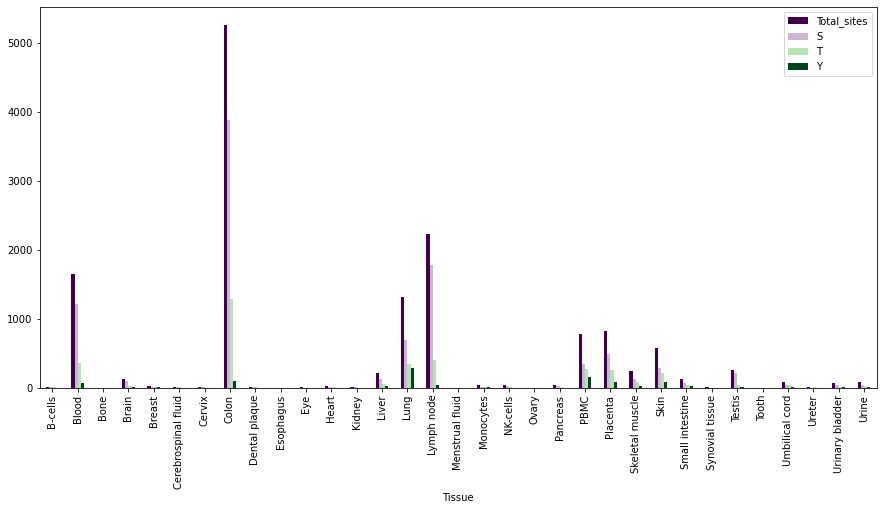

In [152]:
residues_tissue[["Tissue", "Total_sites","S", "T", "Y"]].plot(x="Tissue", kind="bar", figsize=(15,7), colormap="PRGn")

In [153]:
residues_tissue_nontspec = pd.DataFrame({"Tissue": list_tissues_STY})
for tissue in list_tissues_STY:
    nr_sites = STY_non_t_spec_sites[STY_non_t_spec_sites[tissue]==1]["modres"].nunique()
    if nr_sites == 3:
        residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"S"] = STY_non_t_spec_sites[
            STY_non_t_spec_sites[tissue]==1]["modres"].value_counts()[0]
        residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"T"] = STY_non_t_spec_sites[STY_non_t_spec_sites[tissue]==1
                                                                               ]["modres"].value_counts()[1]
        residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"Y"] = STY_non_t_spec_sites[STY_non_t_spec_sites[tissue]==1
                                                                               ]["modres"].value_counts()[2]
    else:
        list_res = STY_non_t_spec_sites[STY_non_t_spec_sites[tissue]==1]["modres"].value_counts().index.to_list()
        list_values = STY_non_t_spec_sites[STY_non_t_spec_sites[tissue]==1]["modres"].value_counts().values
        for i in range(len(list_res)):
            if list_res[i] == "S":
                residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"S"] = list_values[i]
            elif list_res[i] == "T":
                residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"T"] = list_values[i]
            elif list_res[i] == "Y":
                residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"Y"] = list_values[i]
            if "S" not in list_res:
                residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"S"] = 0
            if "T" not in list_res:
                residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"T"] = 0
            if "Y" not in list_res:
                residues_tissue_nontspec.loc[residues_tissue_nontspec["Tissue"]==tissue ,"Y"] = 0
residues_tissue_nontspec["Total_sites"] = residues_tissue_nontspec[["S", "T", "Y"]].sum(axis=1)
residues_tissue_nontspec["Fraction S in %"] = residues_tissue_nontspec["S"]*100/residues_tissue_nontspec["Total_sites"]
residues_tissue_nontspec["Fraction T in %"] = residues_tissue_nontspec["T"]*100/residues_tissue_nontspec["Total_sites"]
residues_tissue_nontspec["Fraction Y in %"] = residues_tissue_nontspec["Y"]*100/residues_tissue_nontspec["Total_sites"]
residues_tissue_nontspec.dropna(inplace=True)
residues_tissue_nontspec

Tissue       S      T      Y  Total_sites  Fraction S in %  \
0        Adipose tissue   118.0   67.0   36.0        221.0        53.393665   
1               B-cells    59.0   26.0   10.0         95.0        62.105263   
2                 Blood  1987.0  429.0   50.0       2466.0        80.575831   
3                  Bone     2.0    0.0    0.0          2.0       100.000000   
4                 Brain   129.0   39.0    8.0        176.0        73.295455   
5                Breast    16.0   15.0   11.0         42.0        38.095238   
6   Cerebrospinal fluid    17.0   10.0    3.0         30.0        56.666667   
7                Cervix     6.0    2.0    0.0          8.0        75.000000   
8                 Colon  3199.0  762.0  128.0       4089.0        78.234287   
9         Dental plaque     9.0    0.0    0.0          9.0       100.000000   
10            Esophagus     2.0    2.0    2.0          6.0        33.333333   
11                  Eye     1.0    0.0    0.0          1.0       100.000000   
12     Follicular fluid     0.0    0.0    1.0          1.0         0.000000   
13                Heart    17.0    6.0    5.0         28.0        60.714286   
14                 Hela    23.0   16.0    4.0         43.0        53.488372   
15               Kidney   167.0   68.0   39.0        274.0        60.948905   
16                Liver   463.0  121.0   52.0        636.0        72.798742   
17                 Lung  1468.0  319.0  143.0       1930.0        76.062176   
18           Lymph node  2417.0  499.0   44.0       2960.0        81.655405   
19      Menstrual fluid     1.0    4.0    0.0          5.0        20.000000   
20            Monocytes     9.0    7.0    6.0         22.0        40.909091   
21         Nasal polyps    15.0    9.0    7.0         31.0        48.387097   
22             NK-cells    76.0   22.0    8.0        106.0        71.698113   
23                Ovary     3.0    0.0    0.0          3.0       100.000000   
24             Pancreas    46.0   25.0    6.0         77.0        59.740260   
25     Palatine tonsils    15.0    9.0    7.0         31.0        48.387097   
26        Parotid gland    15.0    9.0    7.0         31.0        48.387097   
27                 PBMC   347.0  276.0  152.0        775.0        44.774194   
29             Placenta   366.0   91.0   19.0        476.0        76.890756   
30      Skeletal muscle    45.0   14.0   14.0         73.0        61.643836   
31                 Skin   276.0  241.0  115.0        632.0        43.670886   
32      Small intestine    51.0   42.0   15.0        108.0        47.222222   
33      Synovial tissue     3.0    1.0    0.0          4.0        75.000000   
34              T-cells     2.0    1.0    1.0          4.0        50.000000   
35               Testis   251.0   54.0    2.0        307.0        81.758958   
37       Umbilical cord   250.0  194.0   94.0        538.0        46.468401   
38               Ureter     4.0    3.0    0.0          7.0        57.142857   
39      Urinary bladder   165.0   77.0   42.0        284.0        58.098592   
40                Urine    17.0   15.0    5.0         37.0        45.945946   

    Fraction T in %  Fraction Y in %  
0         30.316742        16.289593  
1         27.368421        10.526316  
2         17.396594         2.027575  
3          0.000000         0.000000  
4         22.159091         4.545455  
5         35.714286        26.190476  
6         33.333333        10.000000  
7         25.000000         0.000000  
8         18.635363         3.130350  
9          0.000000         0.000000  
10        33.333333        33.333333  
11         0.000000         0.000000  
12         0.000000       100.000000  
13        21.428571        17.857143  
14        37.209302         9.302326  
15        24.817518        14.233577  
16        19.025157         8.176101  
17        16.528497         7.409326  
18        16.858108         1.486486  
19        80.000000         0.000000  
20        31.818182        27.272727 

<AxesSubplot:xlabel='Tissue'>

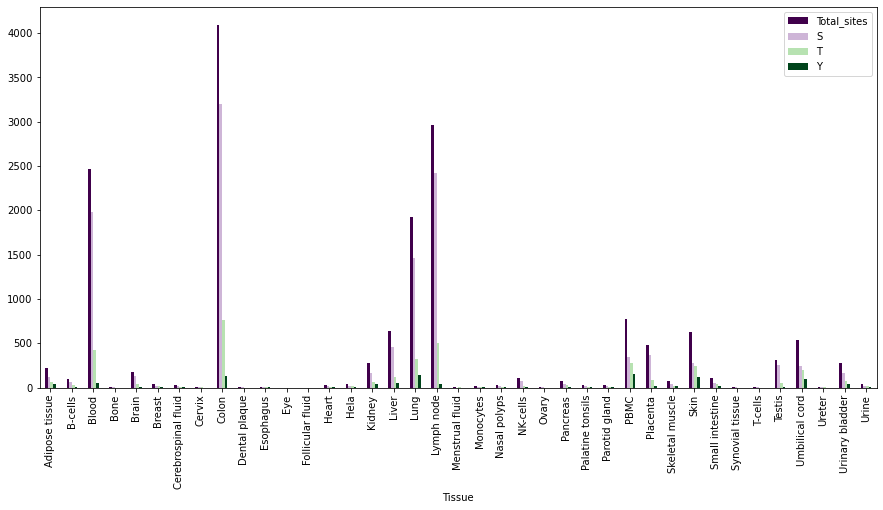

In [154]:
residues_tissue_nontspec[["Tissue", "Total_sites","S", "T", "Y"]].plot(x="Tissue", kind="bar", figsize=(15,7), colormap="PRGn")

In [155]:
residues_tissue_general = pd.DataFrame({"Tissue": list_tissues_STY})
for tissue in list_tissues_STY:
    nr_sites = STY_general_sites[STY_general_sites[tissue]==1]["modres"].nunique()
    if nr_sites == 3:
        residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"S"] = STY_general_sites[
            STY_general_sites[tissue]==1]["modres"].value_counts()[0]
        residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"T"] = STY_general_sites[STY_general_sites[tissue]==1
                                                                               ]["modres"].value_counts()[1]
        residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"Y"] = STY_general_sites[STY_general_sites[tissue]==1
                                                                               ]["modres"].value_counts()[2]
    else:
        list_res = STY_general_sites[STY_general_sites[tissue]==1]["modres"].value_counts().index.to_list()
        list_values = STY_general_sites[STY_general_sites[tissue]==1]["modres"].value_counts().values
        for i in range(len(list_res)):
            if list_res[i] == "S":
                residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"S"] = list_values[i]
            elif list_res[i] == "T":
                residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"T"] = list_values[i]
            elif list_res[i] == "Y":
                residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"Y"] = list_values[i]
            if "S" not in list_res:
                residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"S"] = 0
            if "T" not in list_res:
                residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"T"] = 0
            if "Y" not in list_res:
                residues_tissue_general.loc[residues_tissue_general["Tissue"]==tissue ,"Y"] = 0
residues_tissue_general["Total_sites"] = residues_tissue_general[["S", "T", "Y"]].sum(axis=1)
residues_tissue_general["Fraction S in %"] = residues_tissue_general["S"]*100/residues_tissue_general["Total_sites"]
residues_tissue_general["Fraction T in %"] = residues_tissue_general["T"]*100/residues_tissue_general["Total_sites"]
residues_tissue_general["Fraction Y in %"] = residues_tissue_general["Y"]*100/residues_tissue_general["Total_sites"]
residues_tissue_general.dropna(inplace=True)
residues_tissue_general

Tissue       S      T      Y  Total_sites  \
0              Adipose tissue   278.0   71.0   41.0        390.0   
1                     B-cells   176.0   61.0   13.0        250.0   
2                       Blood  2203.0  641.0  117.0       2961.0   
3                        Bone     5.0    3.0    1.0          9.0   
4                       Brain  1657.0  565.0   85.0       2307.0   
5                      Breast    47.0   24.0   18.0         89.0   
6         Cerebrospinal fluid  1576.0  547.0   80.0       2203.0   
7                      Cervix    10.0    2.0    1.0         13.0   
8                       Colon  1252.0  324.0   75.0       1651.0   
9               Dental plaque    17.0    0.0    1.0         18.0   
10                  Esophagus    46.0    9.0    2.0         57.0   
11                        Eye    11.0    2.0    1.0         14.0   
13                      Heart    46.0   22.0    3.0         71.0   
14                       Hela    24.0    8.0    5.0         37.0   
15                     Kidney   465.0  146.0   32.0        643.0   
16                      Liver  2107.0  663.0  121.0       2891.0   
17                       Lung   906.0  230.0   88.0       1224.0   
18                 Lymph node  1112.0  236.0   38.0       1386.0   
19            Menstrual fluid     5.0    2.0    0.0          7.0   
20                  Monocytes  1566.0  542.0   82.0       2190.0   
21               Nasal polyps   105.0   27.0   11.0        143.0   
22                   NK-cells   223.0   33.0    9.0        265.0   
23                      Ovary  1567.0  538.0   78.0       2183.0   
24                   Pancreas  1682.0  553.0   92.0       2327.0   
25           Palatine tonsils   105.0   27.0   11.0        143.0   
26              Parotid gland   105.0   27.0   11.0        143.0   
27                       PBMC   381.0  140.0   74.0        595.0   
28  Peritoneal dialysis fluid     1.0    1.0    0.0          2.0   
29                   Placenta   551.0  157.0   41.0        749.0   
30            Skeletal muscle    64.0   39.0   25.0        128.0   
31                       Skin   397.0  137.0   87.0        621.0   
32            Small intestine    93.0   28.0    8.0        129.0   
33            Synovial tissue     8.0    1.0    1.0         10.0   
34                    T-cells     6.0    4.0    0.0         10.0   
35                     Testis   348.0   74.0   25.0        447.0   
37             Umbilical cord   494.0  153.0   85.0        732.0   
38                     Ureter    26.0    4.0    0.0         30.0   
39            Urinary bladder   415.0  151.0   33.0        599.0   
40                      Urine    23.0    6.0    3.0         32.0   

    Fraction S in %  Fraction T in %  Fraction Y in %  
0         71.282051        18.205128        10.512821  
1         70.400000        24.400000         5.200000  
2         74.400540        21.648092         3.951368  
3         55.555556        33.333333        11.111111  
4         71.824881        24.490681         3.684439  
5         52.808989        26.966292        20.224719  
6         71.538811        24.829778         3.631412  
7         76.923077        15.384615         7.692308  
8         75.832829        19.624470         4.542701  
9         94.444444         0.000000         5.555556  
10        80.701754        15.789474         3.508772  
11        78.571429        14.285714         7.142857  
13        64.788732        30.985915         4.225352  
14        64.864865        21.621622        13.513514  
15        72.317263        22.706065         4.976672  
16        72.881356        22.933241         4.185403  
17        74.019608        18.790850         7.189542  
18        80.230880        17.027417         2.741703  
19        71.428571        28.571429         0.000000  
20        71.506849        24.748858         3.744292  
21        73.426573        18.881119         7.692308  
22        84.150943        12.452830         3.396226  
23        71.7

<AxesSubplot:xlabel='Tissue'>

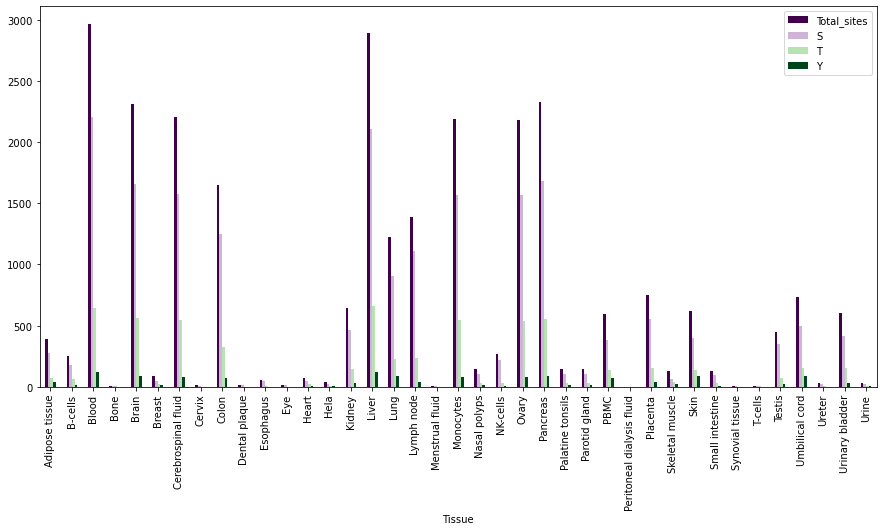

In [156]:
residues_tissue_general[["Tissue", "Total_sites","S", "T", "Y"]].plot(x="Tissue", kind="bar", figsize=(15,7), colormap="PRGn")

We see no difference between the three categories. The distribution of the residues is in line with the expected one (from literature).

### amount of tissue-specific sites per protein expressed in Colon

We'll now look at how many tissue-specific sites a protein has, for sites seen in colon. We do this because colon is the most represented in our data. Several proteins are associated with more than one tissue-specific phosphosites, some even tens of phosphosites. We first display the results for all proteins, then limited to the proteins having tissue-specific phosphosites. The first 2 graphs display data for both non-canonical and canonical sites, the 2 last graphs are limited to canonical sites.

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/163689390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_colon["Total"] = data_colon[list_tissues_STY].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/163689390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_colon["t_spec"] = 0
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

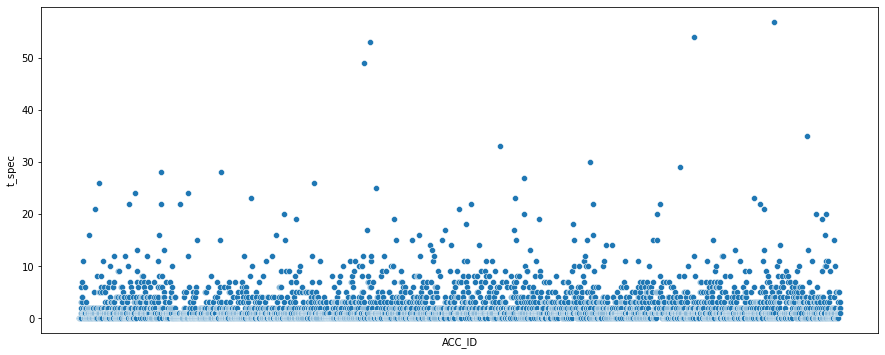

In [157]:
data_colon = data_site[(data_site["Colon"]==1)]
data_colon["Total"] = data_colon[list_tissues_STY].sum(axis=1)
data_colon["t_spec"] = 0
data_colon.loc[data_colon["Total"]==1, "t_spec"]=1
data_colon_per_protein = data_colon.groupby(["ACC_ID"], as_index=False)["t_spec"].sum()
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="t_spec", data=data_colon_per_protein)
plt.xticks([],[])
plt.show()

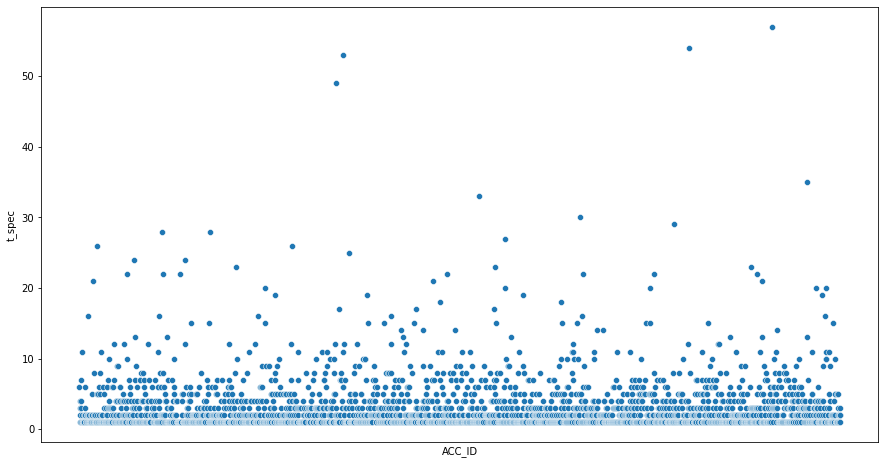

In [158]:
data_colon_per_protein_sub = data_colon_per_protein[data_colon_per_protein["t_spec"]!=0]
plt.figure(figsize=(15,8))
sns.scatterplot(x="ACC_ID", y="t_spec", data=data_colon_per_protein_sub)
plt.xticks([],[])
plt.show()

C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/4083122723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_colon["Total"] = data_colon[list_tissues_STY].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\34/ipykernel_18348/4083122723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_colon["t_spec"] = 0
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

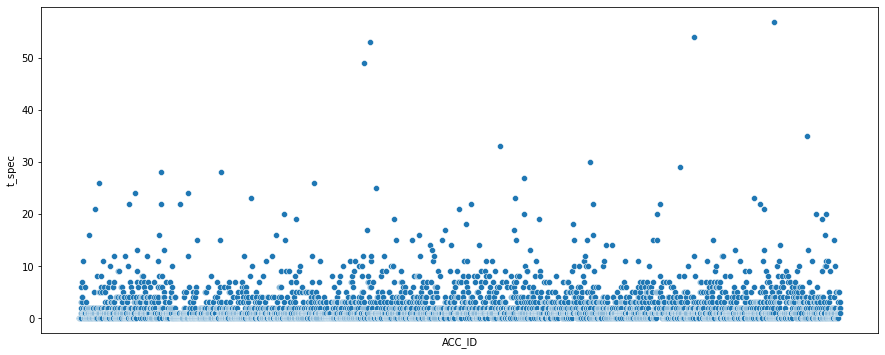

In [159]:
data_colon = data_site[(data_site["Colon"]==1)]
data_colon_STY = data_colon[(data_colon["modres"]=="S")|(data_colon["modres"]=="T")|
                            (data_colon["modres"]=="Y")]
data_colon["Total"] = data_colon[list_tissues_STY].sum(axis=1)
data_colon["t_spec"] = 0
data_colon.loc[data_colon["Total"]==1, "t_spec"]=1
data_colon_per_protein = data_colon.groupby(["ACC_ID"], as_index=False)["t_spec"].sum()
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="t_spec", data=data_colon_per_protein)
plt.xticks([],[])
plt.show()

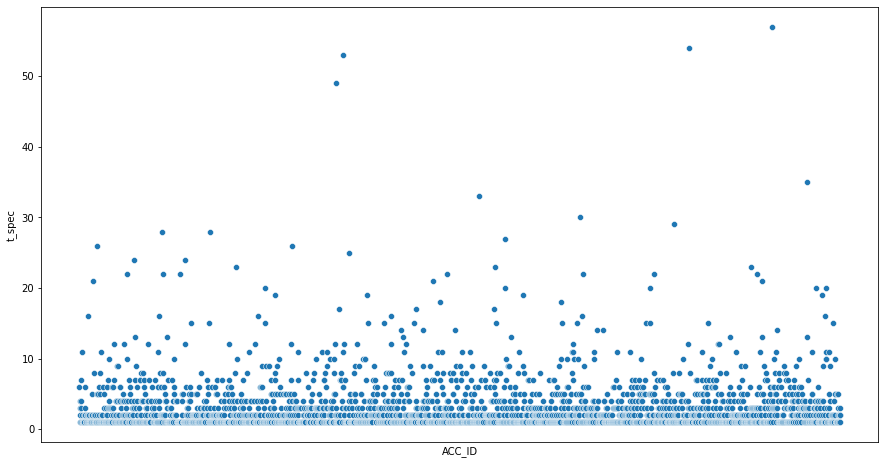

In [160]:
data_colon_per_protein_sub = data_colon_per_protein[data_colon_per_protein["t_spec"]!=0]
plt.figure(figsize=(15,8))
sns.scatterplot(x="ACC_ID", y="t_spec", data=data_colon_per_protein_sub)
plt.xticks([],[])
plt.show()

### non tissue specific proteins with tissue specific sites

We'll now take a look at non tissue-specific phosphorylated proteins (both tissue-aspecific phosphorylated protein and pervasively phosphorylated proteins) having tissue-specific phosphosites. We do this for all sites and later for the canonical sites seperately.

In [161]:
tspecprot_nontspecsites = pd.merge(t_spec_prot, non_t_spec_sites, how="inner", on="ACC_ID", indicator=True)
tspecprot_nontspecsites.head()

Empty DataFrame
Columns: [ACC_ID, tissue_x, Adipose tissue_x, B-cells_x, Blood_x, Bone_x, Brain_x, Breast_x, Bronchoalveolar lavage_x, Cartilage_x, Cerebrospinal fluid_x, Cervix_x, Colon_x, Dental plaque_x, Esophagus_x, Eye_x, Follicular fluid_x, Heart_x, Hela_x, Kidney_x, Liver_x, Lung_x, Lymph node_x, Menstrual fluid_x, Monocytes_x, Nasal polyps_x, NK-cells_x, Ovary_x, Pancreas_x, Palatine tonsils_x, Parotid gland_x, PBMC_x, Peritoneal dialysis fluid_x, Placenta_x, Skeletal muscle_x, Skin_x, Small intestine_x, Sputum_x, Synovial tissue_x, T-cells_x, Testis_x, Tooth_x, Umbilical cord_x, Ureter_x, Urinary bladder_x, Urine_x, Total_x, UP_POS, tissue_y, Adipose tissue_y, B-cells_y, Blood_y, Bone_y, Brain_y, Breast_y, Bronchoalveolar lavage_y, Cartilage_y, Cerebrospinal fluid_y, Cervix_y, Colon_y, Dental plaque_y, Esophagus_y, Eye_y, Follicular fluid_y, Heart_y, Hela_y, Kidney_y, Liver_y, Lung_y, Lymph node_y, Menstrual fluid_y, Monocytes_y, Nasal polyps_y, NK-cells_y, Ovary_y, Pancreas_y, Palatine tonsils_y, Parotid gland_y, PBMC_y, Peritoneal dialysis fluid_y, Placenta_y, Skeletal muscle_y, Skin_y, Small intestine_y, Sputum_y, Synovial tissue_y, T-cells_y, Testis_y, Tooth_y, Umbilical cord_y, Ureter_y, Urinary bladder_y, Urine_y, Total_y, _merge]
Index: []

[0 rows x 95 columns]

We notice that 24 118 phosphosites occur on non tissue-specific proteins (either tissue aspecific ones or pervasively phosphorylated protein). Compared to 27 930 phosphosites, this is relatively high.

In [162]:
non_t_spec_prot = data_protein[(data_protein["Total"]>1)]

In [163]:
nontspecprot_tspecsites = pd.merge(non_t_spec_prot, t_spec_sites, how="inner", on="ACC_ID", suffixes=["_x", None])
print(nontspecprot_tspecsites.shape[0]) #compared to 27930 tissue-specific sites, a lot
nontspecprot_tspecsites.head()

24118


ACC_ID                                           tissue_x  \
0  A0A0B4J2D5                   PBMC,PBMC,PBMC,Placenta,Placenta   
1  A0A0B4J2D5                   PBMC,PBMC,PBMC,Placenta,Placenta   
2  A0A0B4J2D5                   PBMC,PBMC,PBMC,Placenta,Placenta   
3  A0A0B4J2D5                   PBMC,PBMC,PBMC,Placenta,Placenta   
4  A0A1B0GTU1  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

   Adipose tissue_x  B-cells_x  Blood_x  Bone_x  Brain_x  Breast_x  \
0                 0          0        0       0        0         0   
1                 0          0        0       0        0         0   
2                 0          0        0       0        0         0   
3                 0          0        0       0        0         0   
4                 0          0        0       0        0         0   

   Bronchoalveolar lavage_x  Cartilage_x  ...  Sputum  Synovial tissue  \
0                         0            0  ...       0                0   
1                         0            0  ...       0                0   
2                         0            0  ...       0                0   
3                         0            0  ...       0                0   
4                         0            0  ...       0                0   

   T-cells  Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  \
0        0       0      0               0       0                0      0   
1        0       0      0               0       0                0      0   
2        0       0      0               0       0                0      0   
3        0       0      0               0       0                0      0   
4        0       0      0               0       0                0      0   

   Total  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 94 columns]

The plot below shows how many proteins in a given tissue have at least one tissue-specific phosphosite.

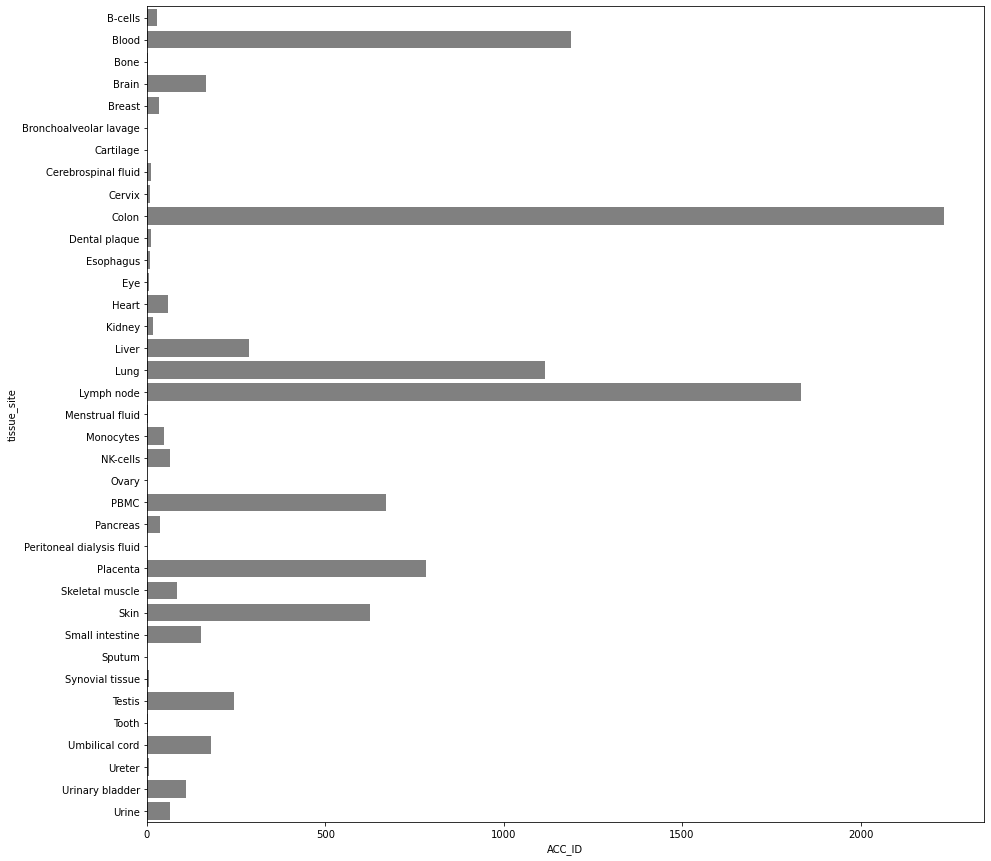

                  tissue_site  ACC_ID
0                     B-cells      29
1                       Blood    1188
2                        Bone       4
3                       Brain     167
4                      Breast      35
5      Bronchoalveolar lavage       1
6                   Cartilage       1
7         Cerebrospinal fluid      11
8                      Cervix       8
9                       Colon    2234
10              Dental plaque      13
11                  Esophagus       9
12                        Eye       6
13                      Heart      59
14                     Kidney      18
15                      Liver     287
16                       Lung    1117
17                 Lymph node    1833
18            Menstrual fluid       4
19                  Monocytes      47
20                   NK-cells      66
21                      Ovary       1
22                       PBMC     671
23                   Pancreas      38
24  Peritoneal dialysis fluid       1
25          

In [164]:
nontspecprot_tspecsites["tissue_site"]=0

for tissue in list_tissues:
    nontspecprot_tspecsites.loc[nontspecprot_tspecsites[tissue]==1, "tissue_site"]=tissue
prot_tspec_site = nontspecprot_tspecsites.groupby(["tissue_site"], as_index=False)["ACC_ID"].nunique()
plt.figure(figsize=(15,15))
sns.barplot(x=prot_tspec_site["ACC_ID"], y=prot_tspec_site["tissue_site"], color="grey")
plt.show()
print(prot_tspec_site)

This plot demonstrates the amount of tissue-specific phosphosites a given protein has, coloured according to the tissue the tissue-speicifc phosphosites are identified in. Some proteins have tissue-specific phosphosites in more than one tissue.

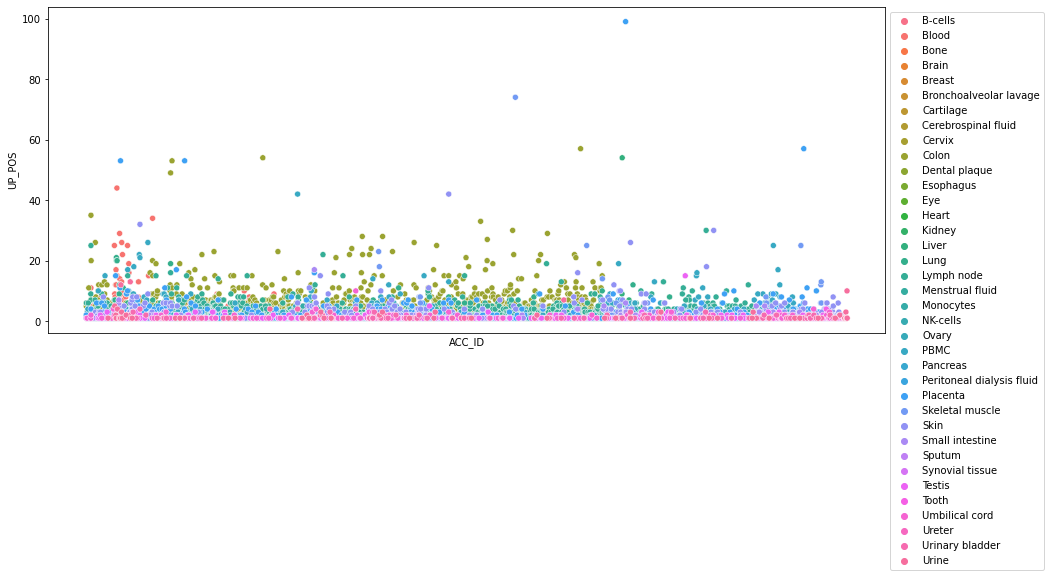

In [165]:
#the same but the other way around: how many tissue-specific sites does a given protein have in tissue X?
tspecsites_protein_tissue = nontspecprot_tspecsites.groupby(["tissue_site", "ACC_ID"], as_index=False)["UP_POS"].count()
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="UP_POS", hue="tissue_site",data=tspecsites_protein_tissue)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

The plot below shows the total amount of tissue-specific phosphosites on non tissue-specific phosphorylated proteisn per tissue.

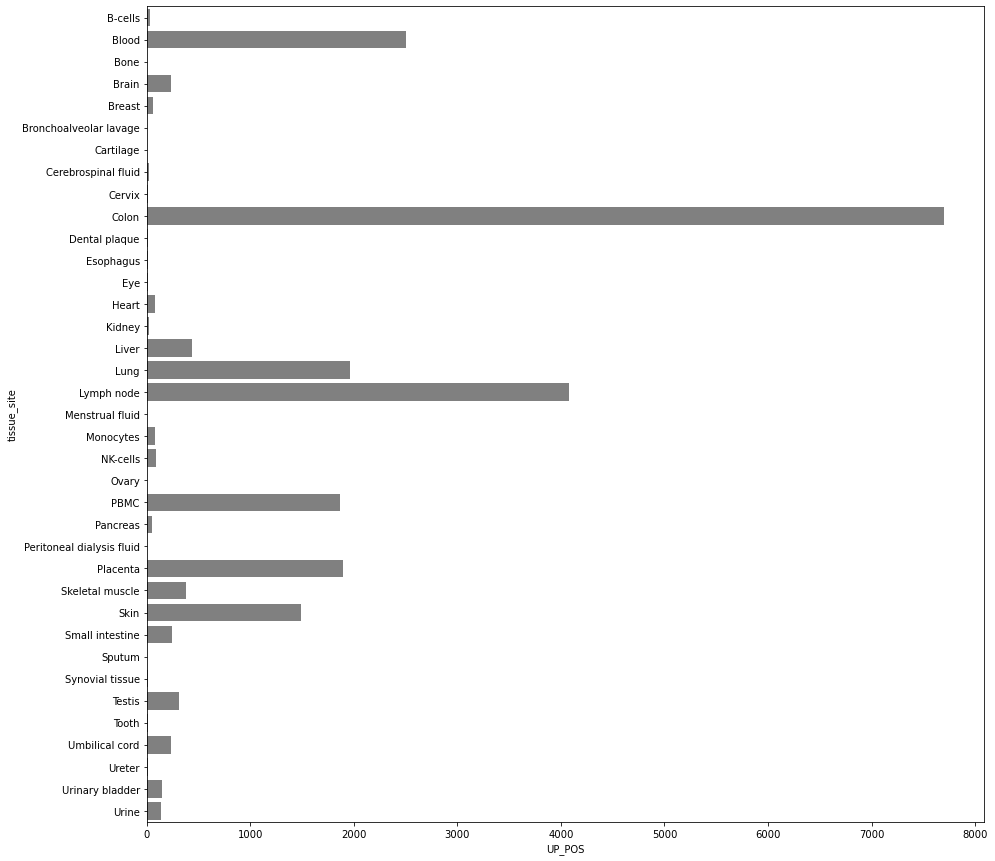

                  tissue_site  UP_POS
0                     B-cells      30
1                       Blood    2505
2                        Bone       4
3                       Brain     232
4                      Breast      55
5      Bronchoalveolar lavage       1
6                   Cartilage       1
7         Cerebrospinal fluid      19
8                      Cervix       9
9                       Colon    7700
10              Dental plaque      15
11                  Esophagus       9
12                        Eye       8
13                      Heart      78
14                     Kidney      23
15                      Liver     438
16                       Lung    1958
17                 Lymph node    4075
18            Menstrual fluid       4
19                  Monocytes      76
20                   NK-cells      91
21                      Ovary       1
22                       PBMC    1870
23                   Pancreas      54
24  Peritoneal dialysis fluid       1
25          

In [166]:
tspecsites_tissue_count_pp = nontspecprot_tspecsites.groupby(["tissue_site"], as_index=False)["UP_POS"].count()
plt.figure(figsize=(15,15))
sns.barplot(x=tspecsites_tissue_count_pp["UP_POS"], y=tspecsites_tissue_count_pp["tissue_site"], color="grey")
plt.show()
print(tspecsites_tissue_count_pp)

We now do the same after filtering out the non-canonical phosphosites. This time, however, we first consider tissue-aspecific phosphorylated proteins having tissue-specific phosphosites, then tissue-specific phosphorylated proteins and their tissue-specific phosphosites, followed by the pervasively phosphorylated proteins having tissue-specific phosphosites.

In [167]:
STY_tspecprot_nontspecsites = pd.merge(STY_t_spec_prot, STY_non_t_spec_sites, how="inner", on="ACC_ID", indicator=True)

In [168]:
STY_tspecprot_nontspecsites.head()

Empty DataFrame
Columns: [ACC_ID, Adipose tissue_x, B-cells_x, Blood_x, Bone_x, Brain_x, Breast_x, Cerebrospinal fluid_x, Cervix_x, Colon_x, Dental plaque_x, Esophagus_x, Eye_x, Follicular fluid_x, Heart_x, Hela_x, Kidney_x, Liver_x, Lung_x, Lymph node_x, Menstrual fluid_x, Monocytes_x, Nasal polyps_x, NK-cells_x, Ovary_x, Pancreas_x, Palatine tonsils_x, Parotid gland_x, PBMC_x, Peritoneal dialysis fluid_x, Placenta_x, Skeletal muscle_x, Skin_x, Small intestine_x, Synovial tissue_x, T-cells_x, Testis_x, Tooth_x, Umbilical cord_x, Ureter_x, Urinary bladder_x, Urine_x, Total_x, UP_POS, tissue, modres, Adipose tissue_y, B-cells_y, Blood_y, Bone_y, Brain_y, Breast_y, Cerebrospinal fluid_y, Cervix_y, Colon_y, Dental plaque_y, Esophagus_y, Eye_y, Follicular fluid_y, Heart_y, Hela_y, Kidney_y, Liver_y, Lung_y, Lymph node_y, Menstrual fluid_y, Monocytes_y, Nasal polyps_y, NK-cells_y, Ovary_y, Pancreas_y, Palatine tonsils_y, Parotid gland_y, PBMC_y, Peritoneal dialysis fluid_y, Placenta_y, Skeletal muscle_y, Skin_y, Small intestine_y, Synovial tissue_y, T-cells_y, Testis_y, Tooth_y, Umbilical cord_y, Ureter_y, Urinary bladder_y, Urine_y, Total_y, _merge]
Index: []

[0 rows x 89 columns]

In [169]:
STY_nontspecprot_tspecsites = pd.merge(STY_non_t_spec_prot, STY_t_spec_sites, how="inner", on="ACC_ID", suffixes=["_protein", "_site"])

Nearly 5 000 tissue-specific phosphosites occur on proteins phosphorylated in 2-4 tissues, out of 14 019 tissue-specific phosphosites. They occur on 1 596 tissue-aspecific phosphorylated proteins (out of 2 074). 

In [170]:
print(STY_nontspecprot_tspecsites["ACC_ID"].nunique())
print(STY_nontspecprot_tspecsites.shape[0]) #compared to 14019 tissue-specific sites, a lot
STY_nontspecprot_tspecsites.head()

1596
4989


ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0AVK6                       0                0              1   
1  A0JLT2                       0                0              1   
2  A0JLT2                       0                0              1   
3  A0JLT2                       0                0              1   
4  A0M8Q6                       0                0              0   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0             0              0               0                            0   
1             0              0               0                            0   
2             0              0               0                            0   
3             0              0               0                            0   
4             0              0               0                            0   

   Cervix_protein  Colon_protein  ...  Small intestine_site  \
0               0              1  ...                     0   
1               0              1  ...                     0   
2               0              1  ...                     0   
3               0              1  ...                     0   
4               0              0  ...                     0   

   Synovial tissue_site  T-cells_site  Testis_site  Tooth_site  \
0                     0             0            0           0   
1                     0             0            0           0   
2                     0             0            0           0   
3                     0             0            0           0   
4                     0             0            0           0   

   Umbilical cord_site  Ureter_site  Urinary bladder_site  Urine_site  \
0                    0            0                     0           0   
1                    0            0                     0           0   
2                    0            0                     0           0   
3                    0            0                     0           0   
4                    0            0                     0           0   

   Total_site  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 88 columns]

In [171]:
#STY_nontspecprot_tspecsites.to_csv("non tissue specific proteins containing tissue-specific sites.tsv", sep="\t", index=False)

The plot below shows per tissue, the amount of tissue-aspecific phsophoryalted proteins having at least one tissue-specific phosphosite.

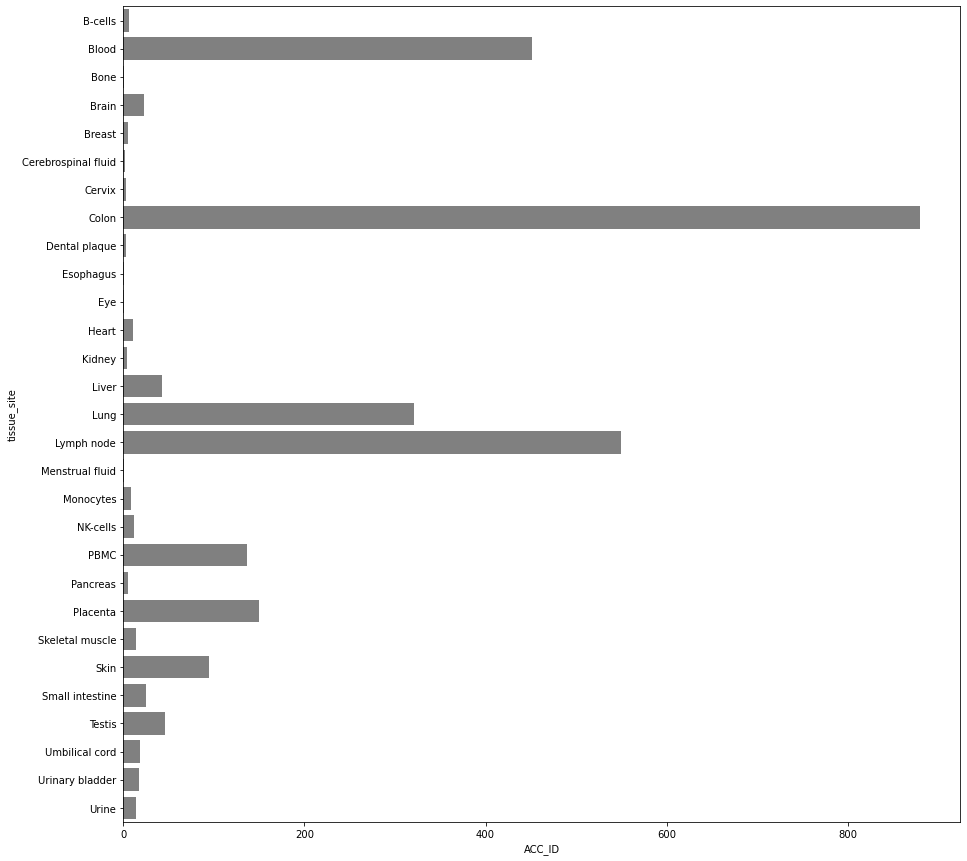

            tissue_site  ACC_ID
0               B-cells       6
1                 Blood     451
2                  Bone       1
3                 Brain      23
4                Breast       5
5   Cerebrospinal fluid       2
6                Cervix       3
7                 Colon     880
8         Dental plaque       3
9             Esophagus       1
10                  Eye       1
11                Heart      11
12               Kidney       4
13                Liver      43
14                 Lung     321
15           Lymph node     549
16      Menstrual fluid       1
17            Monocytes       9
18             NK-cells      12
19                 PBMC     137
20             Pancreas       5
21             Placenta     150
22      Skeletal muscle      14
23                 Skin      95
24      Small intestine      25
25               Testis      46
26       Umbilical cord      19
27      Urinary bladder      17
28                Urine      14


In [172]:
STY_nontspecprot_tspecsites["tissue_site"]=0 

for tissue in list_tissues_STY:
    tissue = tissue+"_site"
    STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites[tissue]==1, "tissue_site"]=tissue.split("_")[0]
STY_prot_tspec_site = STY_nontspecprot_tspecsites.groupby(["tissue_site"], as_index=False)["ACC_ID"].nunique()
plt.figure(figsize=(15,15))
sns.barplot(x=STY_prot_tspec_site["ACC_ID"], y=STY_prot_tspec_site["tissue_site"], color="grey")
plt.show()
print(STY_prot_tspec_site)

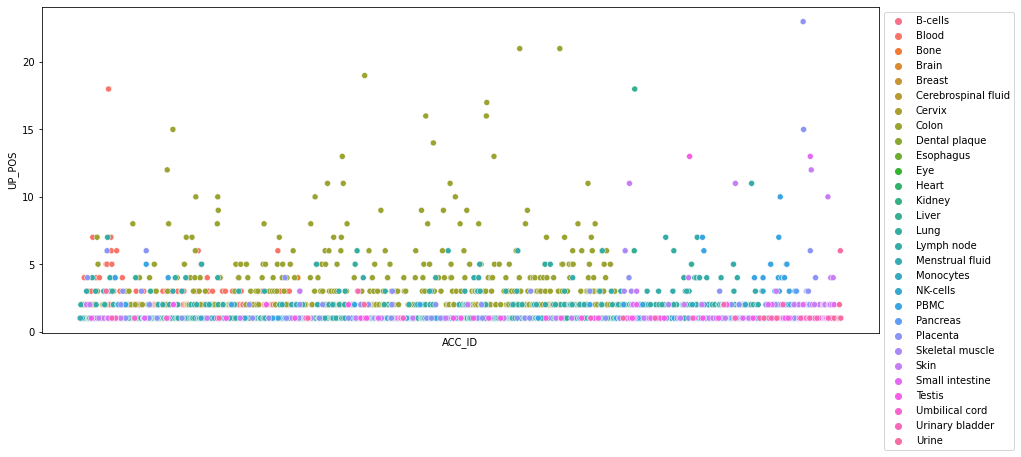

In [173]:
#the same but the other way around: how many tissue-specific sites does a given protein have in tissue X?
STY_tspecsites_protein_tissue = STY_nontspecprot_tspecsites.groupby(["tissue_site", "ACC_ID"], as_index=False)["UP_POS"].count()
STY_tspecsites_protein_tissue.head(20)
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="UP_POS", hue="tissue_site",data=STY_tspecsites_protein_tissue)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

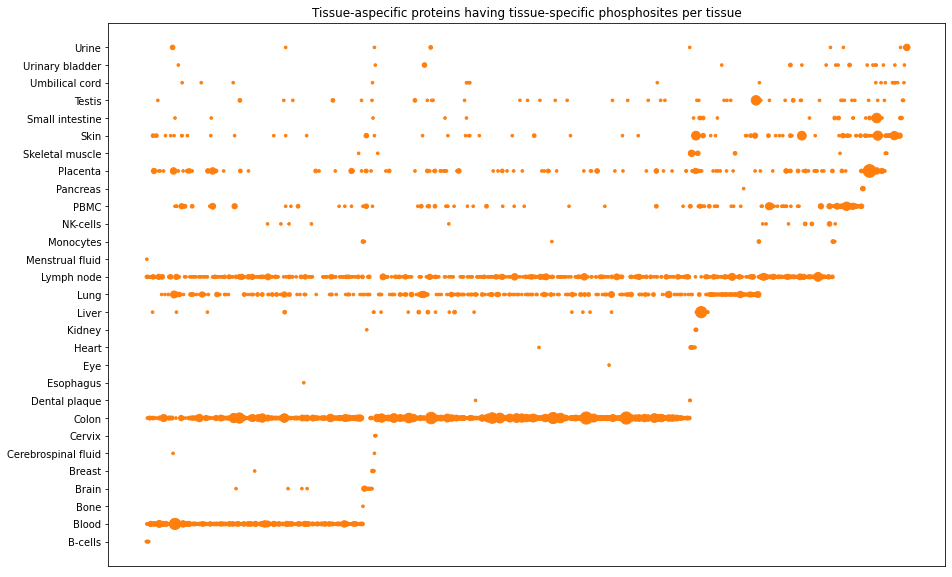

In [174]:
plt.figure(figsize=(15,10))
plt.scatter(x=STY_tspecsites_protein_tissue["ACC_ID"], y=STY_tspecsites_protein_tissue["tissue_site"], s=STY_tspecsites_protein_tissue["UP_POS"]*7, color="tab:orange")
plt.xticks([],[])
plt.title("Tissue-aspecific proteins having tissue-specific phosphosites per tissue")
plt.show()

In [175]:
STY_tspecsites_protein_tissue

tissue_site  ACC_ID  UP_POS
0        B-cells  P11836       1
1        B-cells  P12259       1
2        B-cells  Q4LE39       1
3        B-cells  Q7Z5R6       1
4        B-cells  Q9H165       1
...          ...     ...     ...
2843       Urine  Q9H7P6       1
2844       Urine  Q9NZH0       6
2845       Urine  Q9UBP4       1
2846       Urine  Q9UP65       1
2847       Urine  Q9Y6E0       1

[2848 rows x 3 columns]

In [176]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["UP_POS"]>=10]["ACC_ID"].nunique()

31

In [177]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["UP_POS"]>=5]["ACC_ID"].nunique()

143

In [178]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["UP_POS"]>1]["ACC_ID"].nunique()

788

In [179]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["UP_POS"]>1]["UP_POS"].sum()

3085

In [180]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["UP_POS"]>=5]["UP_POS"].sum()

1141

In [181]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["UP_POS"]>=10]["UP_POS"].sum()

426

In [182]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["UP_POS"]>=10]

tissue_site  ACC_ID  UP_POS
60              Blood  P01023      18
505             Colon  O00192      10
537             Colon  O60292      11
578             Colon  O95049      13
582             Colon  O95171      11
633             Colon  P16144      19
792             Colon  Q13136      16
812             Colon  Q14244      14
843             Colon  Q15652      12
861             Colon  Q2LD37      11
874             Colon  Q52LW3      10
878             Colon  Q53SF7      15
968             Colon  Q7Z5J4      10
977             Colon  Q86UU0      16
978             Colon  Q86UU1      17
998             Colon  Q8IWW6      13
1068            Colon  Q8TEW0      10
1073            Colon  Q8WUF5      21
1186            Colon  Q9BW04      21
1272            Colon  Q9NZN5      11
1405            Liver  P12111      18
2189       Lymph node  Q9BV36      11
2387             PBMC  P31146      10
2520         Placenta  P35555      23
2521         Placenta  P35556      15
2665             Skin  P20930      11
2682             Skin  P50454      10
2696             Skin  Q07065      12
2707             Skin  Q86YZ3      11
2747  Small intestine  P98160      13
2796           Testis  Q9ULL0      13

In [183]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["UP_POS"]>=10]["tissue_site"].value_counts()

Colon              19
Skin                4
Placenta            2
Blood               1
Liver               1
Lymph node          1
PBMC                1
Small intestine     1
Testis              1
Name: tissue_site, dtype: int64

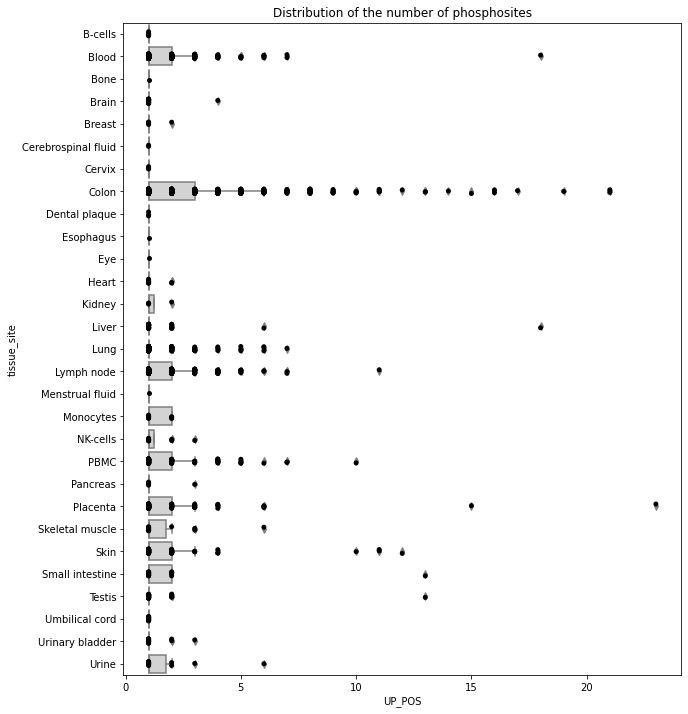

In [184]:
plt.figure(figsize=(10,12))
ax = sns.boxplot(x="UP_POS", y="tissue_site", data=STY_tspecsites_protein_tissue, color="lightgrey")
ax = sns.stripplot(x = "UP_POS", y="tissue_site", data=STY_tspecsites_protein_tissue, jitter=True, color="black")
plt.title("Distribution of the number of phosphosites")
plt.show()

In [185]:
STY_tspecsites_protein_tissue.sort_values(["UP_POS"], ascending=False).head(10)

tissue_site  ACC_ID  UP_POS
2520    Placenta  P35555      23
1186       Colon  Q9BW04      21
1073       Colon  Q8WUF5      21
633        Colon  P16144      19
60         Blood  P01023      18
1405       Liver  P12111      18
978        Colon  Q86UU1      17
792        Colon  Q13136      16
977        Colon  Q86UU0      16
878        Colon  Q53SF7      15

In [186]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["tissue_site"]=="Colon"]["UP_POS"].sum()

2044

In [187]:
STY_tspecsites_protein_tissue[STY_tspecsites_protein_tissue["tissue_site"]=="Colon"]["ACC_ID"].nunique()

880

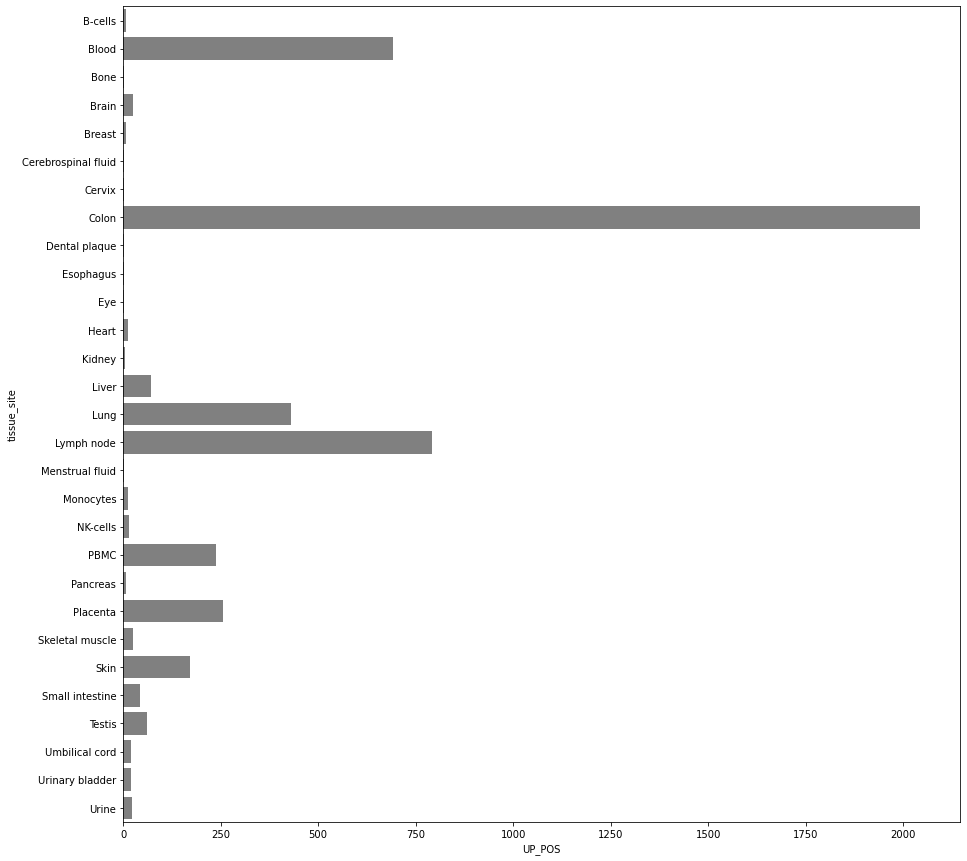

            tissue_site  UP_POS
0               B-cells       6
1                 Blood     693
2                  Bone       1
3                 Brain      26
4                Breast       6
5   Cerebrospinal fluid       2
6                Cervix       3
7                 Colon    2044
8         Dental plaque       3
9             Esophagus       1
10                  Eye       1
11                Heart      13
12               Kidney       5
13                Liver      72
14                 Lung     429
15           Lymph node     791
16      Menstrual fluid       1
17            Monocytes      12
18             NK-cells      16
19                 PBMC     239
20             Pancreas       7
21             Placenta     255
22      Skeletal muscle      24
23                 Skin     171
24      Small intestine      43
25               Testis      62
26       Umbilical cord      19
27      Urinary bladder      21
28                Urine      23


In [188]:
STY_tspecsites_tissue_count_pp = STY_nontspecprot_tspecsites.groupby(["tissue_site"], as_index=False)["UP_POS"].count()
plt.figure(figsize=(15,15))
sns.barplot(x=STY_tspecsites_tissue_count_pp["UP_POS"], y=STY_tspecsites_tissue_count_pp["tissue_site"], color="grey")
plt.show()
print(STY_tspecsites_tissue_count_pp)
#the amount of tissue-specific sites for non-tissue specific proteins in a given tissue

<AxesSubplot:xlabel='Amount of tissues proteins have t-spec P-sites in', ylabel='Amount proteins having tissue-specific P-sites in x tissues'>

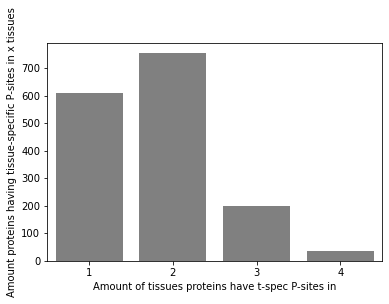

In [189]:
amount_tissues = STY_tspecsites_protein_tissue.groupby(["ACC_ID"], as_index=False)["tissue_site"].nunique()
amount_tissues = amount_tissues.groupby(["tissue_site"],as_index=False)["ACC_ID"].count()
amount_tissues.rename(columns={"tissue_site": "Amount of tissues proteins have t-spec P-sites in", "ACC_ID":  "Amount proteins having tissue-specific P-sites in x tissues"}, inplace=True)
sns.barplot(x="Amount of tissues proteins have t-spec P-sites in", y = "Amount proteins having tissue-specific P-sites in x tissues", data=amount_tissues, color="grey")

In [190]:
amount_tissues

Amount of tissues proteins have t-spec P-sites in  \
0                                                  1   
1                                                  2   
2                                                  3   
3                                                  4   

   Amount proteins having tissue-specific P-sites in x tissues  
0                                                611            
1                                                753            
2                                                197            
3                                                 35

In [191]:
tissue_counts_taspec = STY_tspecsites_protein_tissue.groupby(["ACC_ID"], as_index=False)["tissue_site"].nunique()
tissue_counts_taspec_maxtwo = tissue_counts_taspec[(tissue_counts_taspec["tissue_site"]==1)|(tissue_counts_taspec["tissue_site"]==2)]
tissue_counts_taspec_maxtwo = pd.merge(tissue_counts_taspec_maxtwo, STY_tspecsites_protein_tissue, on=["ACC_ID"], how="left")
tissue_counts_taspec_maxtwo["tissue_site_y"].value_counts()

Colon              708
Lymph node         402
Blood              335
Lung               214
PBMC               103
Placenta           102
Skin                69
Testis              35
Liver               28
Small intestine     18
Brain               17
Urinary bladder     12
Urine               12
Skeletal muscle     11
Umbilical cord       8
NK-cells             8
Monocytes            7
Heart                7
Pancreas             5
B-cells              4
Kidney               3
Breast               3
Dental plaque        2
Cervix               2
Eye                  1
Esophagus            1
Name: tissue_site_y, dtype: int64

In [192]:
STY_non_t_spec_prot_sites = pd.merge(STY_non_t_spec_prot, data_site_STY[["ACC_ID", "UP_POS"]], how="left", on=["ACC_ID"])
STY_non_t_spec_prot_nontspec_sites = pd.merge(STY_non_t_spec_prot_sites, STY_t_spec_sites, how="left", on=["ACC_ID", "UP_POS"], indicator = True)
STY_non_t_spec_prot_nontspec_sites = STY_non_t_spec_prot_nontspec_sites[STY_non_t_spec_prot_nontspec_sites["_merge"]=="left_only"]
taspec_site_count_taspec_protein = STY_non_t_spec_prot_nontspec_sites.groupby(["ACC_ID"], as_index=False)["UP_POS"].nunique()
taspec_site_count_taspec_protein.rename({"UP_POS": "nr tissue aspecific P-sites"}, inplace=True, axis=1)
taspec_site_count_taspec_protein

ACC_ID  nr tissue aspecific P-sites
0     A0A0C4DH36                            1
1         A0AVK6                            2
2         A0JLT2                            1
3         A0M8Q6                            1
4         A0MZ66                            3
...          ...                          ...
1533      Q9Y6K1                            1
1534      Q9Y6M5                            1
1535      Q9Y6M7                            2
1536      Q9Y6N7                            2
1537      Q9Y6R9                            1

[1538 rows x 2 columns]

In [193]:
STY_tspecsites_protein_tissue.rename({"UP_POS": "nr tissue-specific P-sites"}, inplace=True, axis=1)
STY_tspecsites_protein_tissue

tissue_site  ACC_ID  nr tissue-specific P-sites
0        B-cells  P11836                           1
1        B-cells  P12259                           1
2        B-cells  Q4LE39                           1
3        B-cells  Q7Z5R6                           1
4        B-cells  Q9H165                           1
...          ...     ...                         ...
2843       Urine  Q9H7P6                           1
2844       Urine  Q9NZH0                           6
2845       Urine  Q9UBP4                           1
2846       Urine  Q9UP65                           1
2847       Urine  Q9Y6E0                           1

[2848 rows x 3 columns]

In [194]:
list_systems = ["Circulatory system", "Digestive system", "Endocrine system", "Immune system and lymfatic system",
                "Integumentary system", "Muscular system", "Nervous system", "Reproductive system", "Respiratory system",
                "Skeletal system", "Urinary and renal system"]
list_circulatory = ["Blood", "Cerebrospinal fluid", "Peritoneal dialysis fluid"]
list_reproductive = ["Breast", "Cervix", "Follicular fluid", "Hela", "Menstrual fluid", "Ovary", "Placenta", "Testis",
                    "Umbilical cord"]
list_digestive = ["Colon", "Dental plaque", "Esophagus", "Liver", "Parotid gland", "Pancreas", "Small intestine",
                 "Tooth"]
list_respiratory = ["Lung", "Nasal polyps"]
list_urinary = ["Kidney", "Ureter", "Urinary bladder", "Urine"]
list_endocrine = ["Adipose tissue"]
list_integumentary = ["Skin"]
list_immune = ["B-cells", "Lymph node", "Monocytes", "NK-cells", "Palatine tonsil", "PBMC", "T-cells"]
list_muscular = ["Heart", "Skeletal muscle"]
list_nervous = ["Brain", "Eye"]
list_skeletal = ["Bone", "Synovial tissue"]
#list_tissues.remove("Bronchoalveolar lavage") #these tissues no longer have any data when we remove the non-STY sites
#list_tissues.remove("Cartilage")
#list_tissues.remove("Sputum")
for system in list_systems:
    STY_nontspecprot_tspecsites.loc[:, system]=0
for tissue in list_tissues_STY:
    tissue_check = tissue+"_site"
    if tissue in list_circulatory:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Circulatory system"]=1
    if tissue in list_digestive:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Digestive system"]=1
    if tissue in list_endocrine:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Endocrine system"]=1
    if tissue in list_immune:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Immune system and lymfatic system"]=1
    if tissue in list_integumentary:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Integumentary system"]=1
    if tissue in list_muscular:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Muscular system"]=1
    if tissue in list_nervous:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Nervous system"]=1
    if tissue in list_reproductive:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Reproductive system"]=1
    if tissue in list_respiratory:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Respiratory system"]=1
    if tissue in list_skeletal:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Skeletal system"]=1
    if tissue in list_urinary:
        STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites["tissue_site"]==tissue, "Urinary and renal system"]=1
STY_nontspecprot_tspecsites["Total_systems"] = STY_nontspecprot_tspecsites[list_systems].sum(axis=1)
for tissue in list_tissues_STY:
    tissue = tissue+"_site"
    STY_nontspecprot_tspecsites.drop([tissue], axis=1, inplace=True)
STY_nontspecprot_tspecsites.head()

ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0AVK6                       0                0              1   
1  A0JLT2                       0                0              1   
2  A0JLT2                       0                0              1   
3  A0JLT2                       0                0              1   
4  A0M8Q6                       0                0              0   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0             0              0               0                            0   
1             0              0               0                            0   
2             0              0               0                            0   
3             0              0               0                            0   
4             0              0               0                            0   

   Cervix_protein  Colon_protein  ...  Endocrine system  \
0               0              1  ...                 0   
1               0              1  ...                 0   
2               0              1  ...                 0   
3               0              1  ...                 0   
4               0              0  ...                 0   

   Immune system and lymfatic system  Integumentary system  Muscular system  \
0                                  0                     0                0   
1                                  0                     0                0   
2                                  0                     0                0   
3                                  0                     0                0   
4                                  0                     0                0   

   Nervous system  Reproductive system  Respiratory system  Skeletal system  \
0               0                    0                   0                0   
1               0                    0                   0                0   
2               0                    0                   0                0   
3               0                    0                   0                0   
4               0                    0                   1                0   

   Urinary and renal system  Total_systems  
0                         0              1  
1                         0              1  
2                         0              1  
3                         0              1  
4                         0              1  

[5 rows x 60 columns]

In [195]:
STY_nontspecprot_tspecsites["System"] = 0
for system in list_systems:
    STY_nontspecprot_tspecsites.loc[STY_nontspecprot_tspecsites[system]==1, "System"]= system
    STY_nontspecprot_tspecsites.drop([system], axis=1, inplace=True)

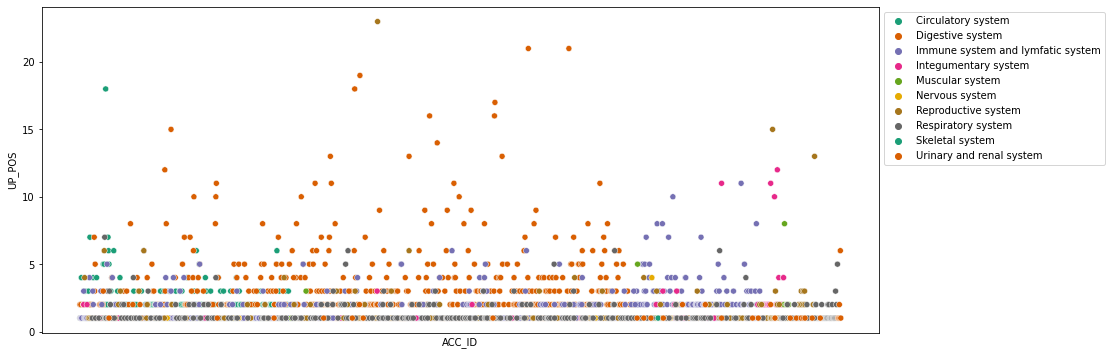

In [196]:
STY_tspecsites_protein_system = STY_nontspecprot_tspecsites.groupby(["System", "ACC_ID"], as_index=False)["UP_POS"].count()
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="UP_POS", hue="System", palette="Dark2", data=STY_tspecsites_protein_system)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

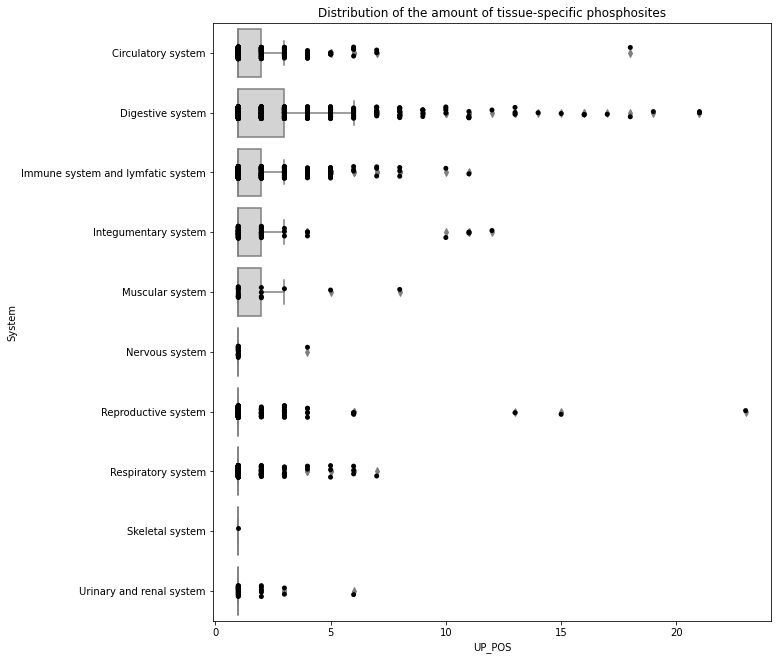

In [197]:
plt.figure(figsize=(10,11))
ax = sns.boxplot(x="UP_POS", y="System", data=STY_tspecsites_protein_system, color="lightgrey")
ax = sns.stripplot(x ="UP_POS", y="System", data=STY_tspecsites_protein_system, jitter=True, color="black")
plt.title("Distribution of the amount of tissue-specific phosphosites")
plt.show()

## tissue-specific phosphorylated proteins - tissue-specific P-sites

We'll now take a closer look at the tissue-specific phosphosites identified on tissue-specific phosphorylated proteins.

In [198]:
STY_tspecprot_tspecsites = pd.merge(STY_t_spec_prot, STY_t_spec_sites, how="inner", on=["ACC_ID"], suffixes=["_protein", "_site"])

In [199]:
STY_tspecprot_tspecsites["tissue_protein"] = 0
STY_tspecprot_tspecsites["tissue_site"] = 0
for tissue in list_tissues_STY:
    tissue = tissue+"_protein"
    STY_tspecprot_tspecsites.loc[STY_tspecprot_tspecsites[tissue]==1, "tissue_protein"]=tissue.split("_")[0]
for tissue in list_tissues_STY:
    tissue = tissue+"_site"
    STY_tspecprot_tspecsites.loc[STY_tspecprot_tspecsites[tissue]==1, "tissue_site"]=tissue.split("_")[0]
print(STY_tspecprot_tspecsites.shape[0])

2794


In [200]:
print(STY_tspecprot_tspecsites["ACC_ID"].nunique())

2029


In [201]:
for tissue in list_tissues_STY:
    tissue_protein = tissue+"_protein"
    tissue_site = tissue+"_site"
    STY_tspecprot_tspecsites.drop([tissue_protein], axis=1, inplace=True)
    STY_tspecprot_tspecsites.drop([tissue_site], axis=1, inplace=True)

We verify that identification of the tissue-specific phosphorylated proteins has been done correctly, by checking wether any of these proteins have tissues-specific phosphosites in a tissue other than the tissue they have been identified in. This is, as expected, not the case.

In [202]:
print(STY_tspecprot_tspecsites[STY_tspecprot_tspecsites["tissue_protein"]!=STY_tspecprot_tspecsites["tissue_site"]].shape[0])

0


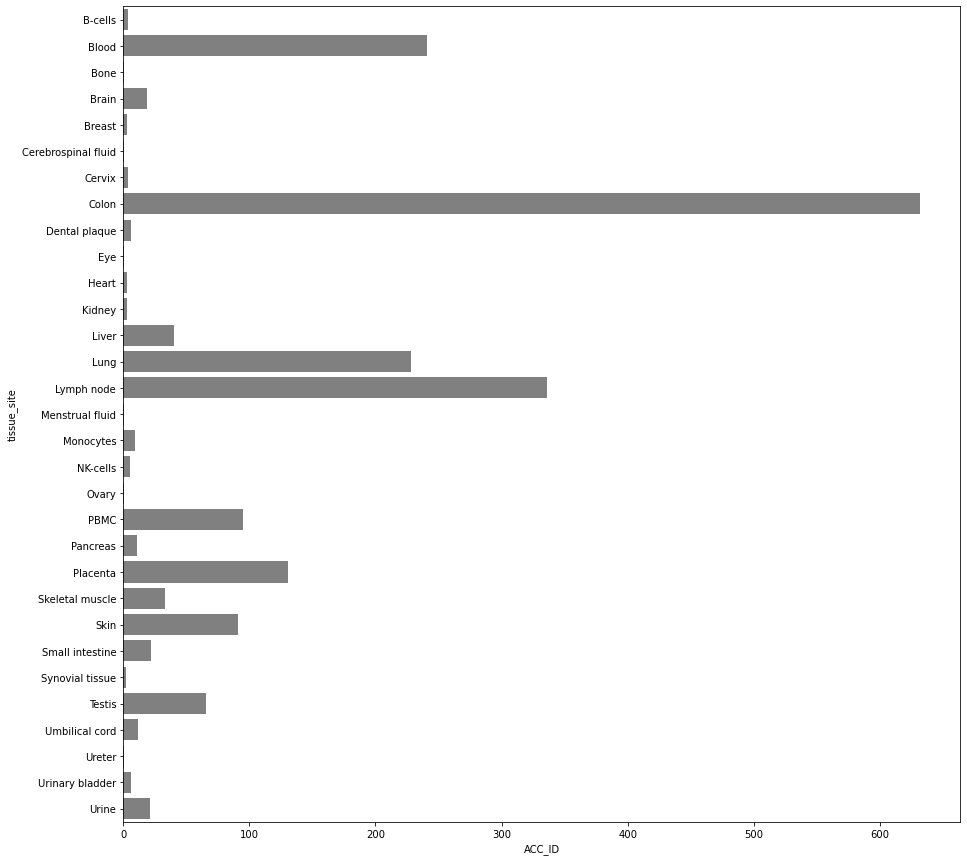

            tissue_site  ACC_ID
0               B-cells       4
1                 Blood     241
2                  Bone       1
3                 Brain      19
4                Breast       3
5   Cerebrospinal fluid       1
6                Cervix       4
7                 Colon     632
8         Dental plaque       6
9                   Eye       1
10                Heart       3
11               Kidney       3
12                Liver      40
13                 Lung     228
14           Lymph node     336
15      Menstrual fluid       1
16            Monocytes       9
17             NK-cells       5
18                Ovary       1
19                 PBMC      95
20             Pancreas      11
21             Placenta     131
22      Skeletal muscle      33
23                 Skin      91
24      Small intestine      22
25      Synovial tissue       2
26               Testis      66
27       Umbilical cord      12
28               Ureter       1
29      Urinary bladder       6
30      

In [203]:
tspecprot_tspecsites_nrprotein = STY_tspecprot_tspecsites.groupby(["tissue_site"], as_index=False)["ACC_ID"].nunique()
plt.figure(figsize=(15,15))
sns.barplot(x=tspecprot_tspecsites_nrprotein["ACC_ID"], y=tspecprot_tspecsites_nrprotein["tissue_site"], color="grey")
plt.show()
print(tspecprot_tspecsites_nrprotein)

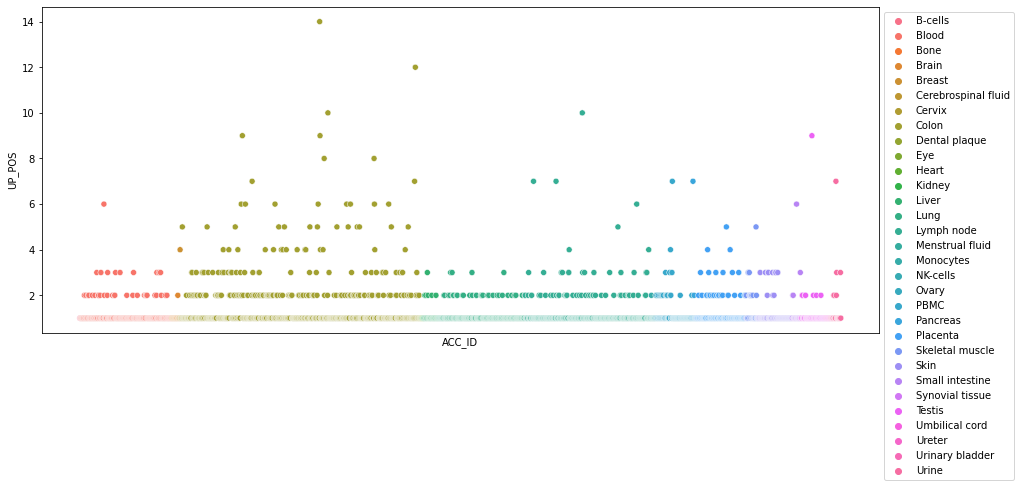

In [204]:
tspecprot_tspecsites_nrsites = STY_tspecprot_tspecsites.groupby(["tissue_site", "ACC_ID"], as_index=False)["UP_POS"].count()
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="UP_POS", hue="tissue_site",data=tspecprot_tspecsites_nrsites)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

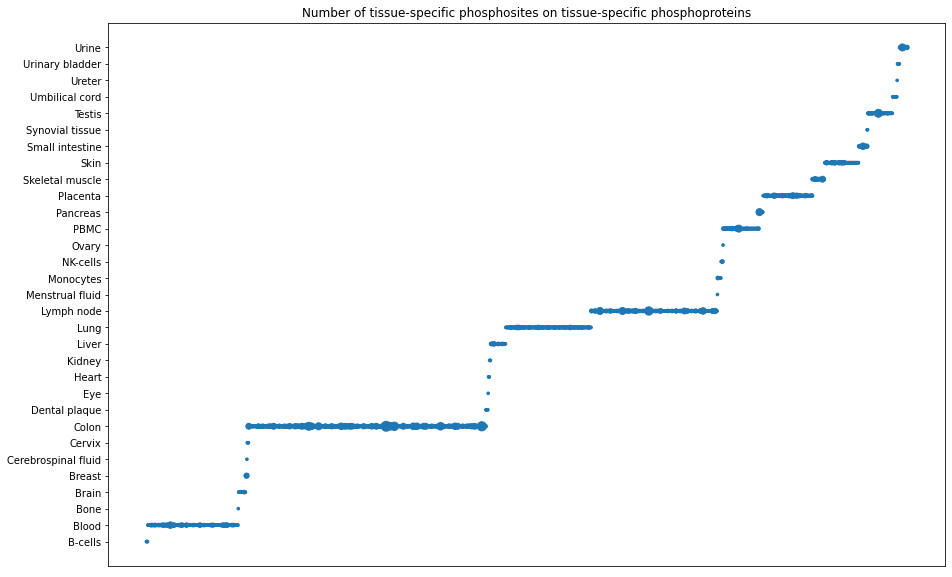

In [205]:
plt.figure(figsize=(15,10))
plt.scatter(x=tspecprot_tspecsites_nrsites["ACC_ID"], y=tspecprot_tspecsites_nrsites["tissue_site"], s=tspecprot_tspecsites_nrsites["UP_POS"]*7, color="tab:blue")
plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites on tissue-specific phosphoproteins")
plt.show()

In [206]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>=10]["ACC_ID"].nunique()

4

In [207]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>=5]["ACC_ID"].nunique()

43

In [208]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>1]["ACC_ID"].nunique()

437

In [209]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>1]["UP_POS"].sum()

1202

In [210]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>=5]["UP_POS"].sum()

284

In [211]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>=10]["UP_POS"].sum()

46

In [212]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>=10]["tissue_site"].value_counts()

Colon         3
Lymph node    1
Name: tissue_site, dtype: int64

In [213]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["tissue_site"]=="Colon"]["ACC_ID"].nunique()

632

In [214]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["tissue_site"]=="Colon"]["UP_POS"].sum()

1044

In [215]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>1]["ACC_ID"].nunique()

437

In [216]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>1]["tissue_site"].value_counts()

Colon              208
Lymph node          61
Blood               36
Lung                33
Placenta            28
PBMC                18
Skeletal muscle     12
Skin                11
Testis               8
Urine                6
Liver                6
Small intestine      4
Pancreas             2
Brain                1
Monocytes            1
Breast               1
NK-cells             1
Name: tissue_site, dtype: int64

In [217]:
tspecprot_tspecsites_nrsites[tspecprot_tspecsites_nrsites["UP_POS"]>1]["UP_POS"].sum()

1202

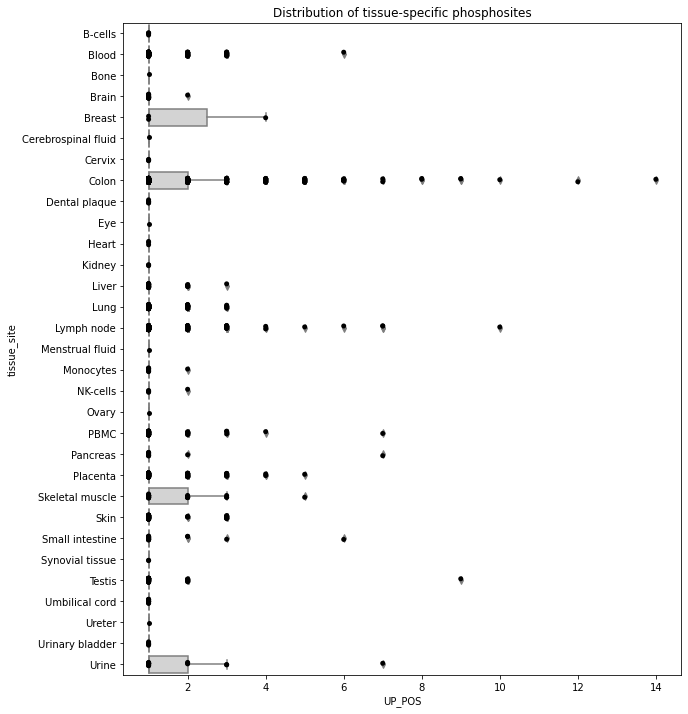

In [218]:
plt.figure(figsize=(10,12))
ax = sns.boxplot(x="UP_POS", y="tissue_site", data=tspecprot_tspecsites_nrsites, color="lightgrey")
ax = sns.stripplot(x = "UP_POS", y="tissue_site", data=tspecprot_tspecsites_nrsites, jitter=True, color="black")
plt.title("Distribution of tissue-specific phosphosites")
plt.show()

In [219]:
tspecprot_tspecsites_nrsites.sort_values(["UP_POS"], ascending=False).head(10)

tissue_site  ACC_ID  UP_POS
639        Colon  Q8NEV8      14
894        Colon  Q9Y4K1      12
661        Colon  Q8WVV4      10
1339  Lymph node  Q68DA7      10
433        Colon  Q03112       9
1951      Testis  Q5JQC9       9
640        Colon  Q8NEZ4       9
784        Colon  Q9H5Y7       8
651        Colon  Q8TE68       8
892        Colon  Q9Y450       7

In [220]:
STY_generalprot_tspecsites = pd.merge(STY_general_prot, STY_t_spec_sites, how="inner", on="ACC_ID", suffixes=["_protein", "_site"])
print(STY_generalprot_tspecsites["ACC_ID"].nunique())
print(STY_generalprot_tspecsites.shape[0])
STY_generalprot_tspecsites.head()

1352
6236


ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0FGR8                       0                0              1   
1  A0FGR8                       0                0              1   
2  A0FGR8                       0                0              1   
3  A0JNW5                       0                0              1   
4  A0JNW5                       0                0              1   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0             0              0               0                            0   
1             0              0               0                            0   
2             0              0               0                            0   
3             0              1               0                            1   
4             0              1               0                            1   

   Cervix_protein  Colon_protein  ...  Small intestine_site  \
0               0              1  ...                     0   
1               0              1  ...                     0   
2               0              1  ...                     0   
3               0              1  ...                     0   
4               0              1  ...                     0   

   Synovial tissue_site  T-cells_site  Testis_site  Tooth_site  \
0                     0             0            0           0   
1                     0             0            0           0   
2                     0             0            0           0   
3                     0             0            0           0   
4                     0             0            0           0   

   Umbilical cord_site  Ureter_site  Urinary bladder_site  Urine_site  \
0                    0            0                     0           0   
1                    0            0                     0           0   
2                    0            0                     0           0   
3                    0            0                     0           0   
4                    0            0                     0           0   

   Total_site  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 88 columns]

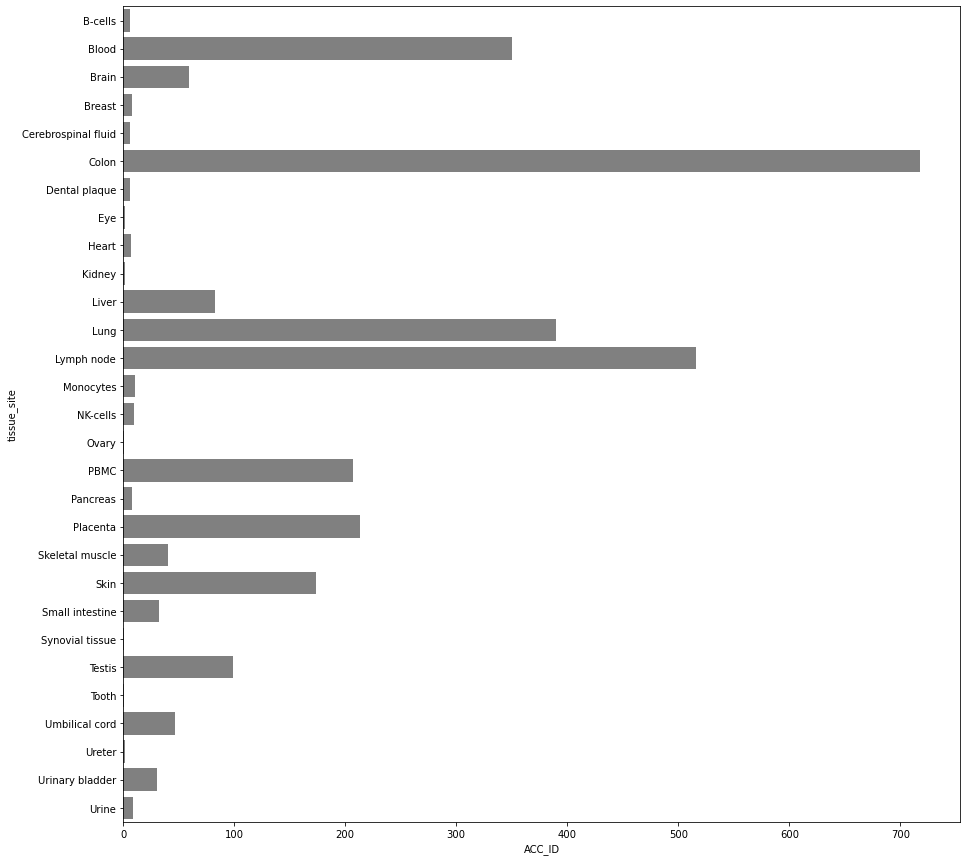

            tissue_site  ACC_ID
0               B-cells       6
1                 Blood     350
2                 Brain      59
3                Breast       8
4   Cerebrospinal fluid       6
5                 Colon     718
6         Dental plaque       6
7                   Eye       2
8                 Heart       7
9                Kidney       2
10                Liver      83
11                 Lung     390
12           Lymph node     516
13            Monocytes      11
14             NK-cells      10
15                Ovary       1
16                 PBMC     207
17             Pancreas       8
18             Placenta     213
19      Skeletal muscle      40
20                 Skin     174
21      Small intestine      32
22      Synovial tissue       1
23               Testis      99
24                Tooth       1
25       Umbilical cord      47
26               Ureter       2
27      Urinary bladder      30
28                Urine       9


In [221]:
STY_generalprot_tspecsites["tissue_site"] = 0
for tissue in list_tissues_STY:
    tissue = tissue+"_site"
    STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites[tissue]==1, "tissue_site"]=tissue.split("_")[0]
STY_genprot_tspec_site = STY_generalprot_tspecsites.groupby(["tissue_site"], as_index=False)["ACC_ID"].nunique()
plt.figure(figsize=(15,15))
sns.barplot(x=STY_genprot_tspec_site["ACC_ID"], y=STY_genprot_tspec_site["tissue_site"], color="grey")
plt.show()
print(STY_genprot_tspec_site)

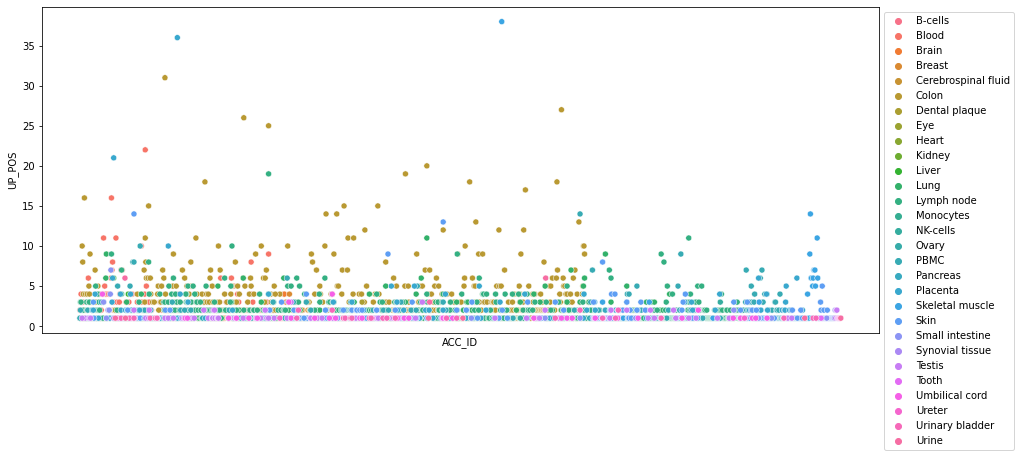

In [222]:
genprot_tspecsites_nrsites = STY_generalprot_tspecsites.groupby(["tissue_site", "ACC_ID"], as_index=False)["UP_POS"].count()
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="UP_POS", hue="tissue_site",data=genprot_tspecsites_nrsites)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

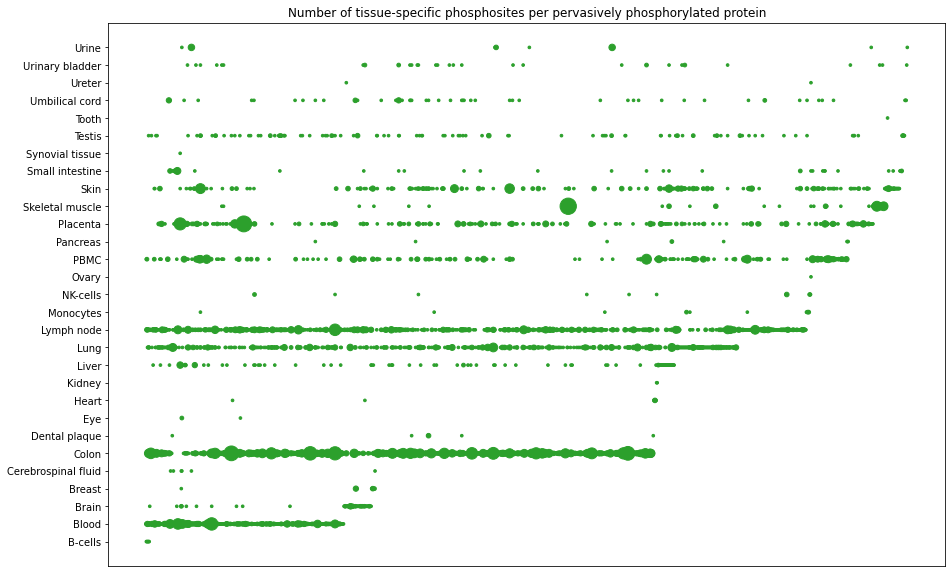

In [223]:
plt.figure(figsize=(15,10))
plt.scatter(x=genprot_tspecsites_nrsites["ACC_ID"], y=genprot_tspecsites_nrsites["tissue_site"], s=genprot_tspecsites_nrsites["UP_POS"]*7, color="tab:green")
plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites per pervasively phosphorylated protein")
plt.show()

In [224]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["UP_POS"]>=10]["ACC_ID"].nunique()

49

In [225]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["UP_POS"]>=5]["ACC_ID"].nunique()

212

In [226]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["UP_POS"]>1]["ACC_ID"].nunique()

831

In [227]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["UP_POS"]>1]["UP_POS"].sum()

4406

In [228]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["UP_POS"]>=5]["UP_POS"].sum()

1936

In [229]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["UP_POS"]>=10]["UP_POS"].sum()

808

In [230]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["UP_POS"]>=10]["tissue_site"].value_counts()

Colon              34
Blood               5
Lymph node          3
Placenta            3
Skeletal muscle     3
PBMC                2
Skin                2
Lung                1
Name: tissue_site, dtype: int64

In [231]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["tissue_site"]=="Colon"]["ACC_ID"].nunique()

718

In [232]:
genprot_tspecsites_nrsites[genprot_tspecsites_nrsites["tissue_site"]=="Colon"]["UP_POS"].sum()

2164

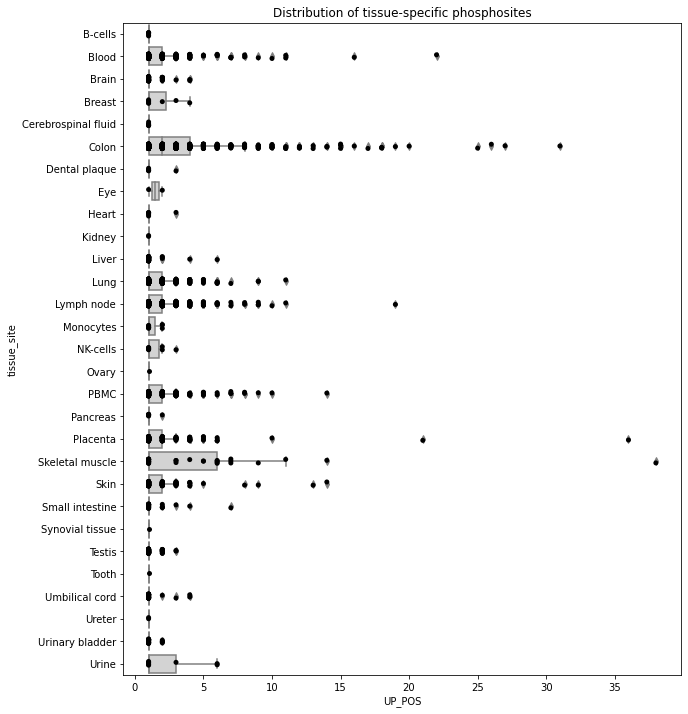

In [233]:
plt.figure(figsize=(10,12))
ax = sns.boxplot(x="UP_POS", y="tissue_site", data=genprot_tspecsites_nrsites, color="lightgrey")
ax = sns.stripplot(x = "UP_POS", y="tissue_site", data=genprot_tspecsites_nrsites, jitter=True, color="black")
plt.title("Distribution of tissue-specific phosphosites")
plt.show()

In [234]:
genprot_tspecsites_nrsites.sort_values(["UP_POS"], ascending=False).head(10)

tissue_site  ACC_ID  UP_POS
2638  Skeletal muscle  Q8WZ42      38
2530         Placenta  Q14978      36
719             Colon  Q12888      31
1077            Colon  Q9UDY2      27
1013            Colon  Q9C0C2      26
1108            Colon  Q9UQ35      25
116             Blood  P46013      22
2416         Placenta  P02751      21
713             Colon  Q09666      20
666             Colon  P55196      19

In [235]:
list_systems = ["Circulatory system", "Digestive system", "Endocrine system", "Immune system and lymfatic system",
                "Integumentary system", "Muscular system", "Nervous system", "Reproductive system", "Respiratory system",
                "Skeletal system", "Urinary and renal system"]
list_circulatory = ["Blood", "Cerebrospinal fluid", "Peritoneal dialysis fluid"]
list_reproductive = ["Breast", "Cervix", "Follicular fluid", "Hela", "Menstrual fluid", "Ovary", "Placenta", "Testis",
                    "Umbilical cord"]
list_digestive = ["Colon", "Dental plaque", "Esophagus", "Liver", "Parotid gland", "Pancreas", "Small intestine",
                 "Tooth"]
list_respiratory = ["Lung", "Nasal polyps"]
list_urinary = ["Kidney", "Ureter", "Urinary bladder", "Urine"]
list_endocrine = ["Adipose tissue"]
list_integumentary = ["Skin"]
list_immune = ["B-cells", "Lymph node", "Monocytes", "NK-cells", "Palatine tonsil", "PBMC", "T-cells"]
list_muscular = ["Heart", "Skeletal muscle"]
list_nervous = ["Brain", "Eye"]
list_skeletal = ["Bone", "Synovial tissue"]
#list_tissues.remove("Bronchoalveolar lavage") #these tissues no longer have any data when we remove the non-STY sites
#list_tissues.remove("Cartilage")
#list_tissues.remove("Sputum")
for system in list_systems:
    STY_generalprot_tspecsites.loc[:, system]=0
for tissue in list_tissues_STY:
    tissue_check = tissue+"_site"
    if tissue in list_circulatory:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Circulatory system"]=1
    if tissue in list_digestive:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Digestive system"]=1
    if tissue in list_endocrine:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Endocrine system"]=1
    if tissue in list_immune:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Immune system and lymfatic system"]=1
    if tissue in list_integumentary:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Integumentary system"]=1
    if tissue in list_muscular:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Muscular system"]=1
    if tissue in list_nervous:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Nervous system"]=1
    if tissue in list_reproductive:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Reproductive system"]=1
    if tissue in list_respiratory:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Respiratory system"]=1
    if tissue in list_skeletal:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Skeletal system"]=1
    if tissue in list_urinary:
        STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites["tissue_site"]==tissue, "Urinary and renal system"]=1
STY_generalprot_tspecsites["Total_systems"] = STY_generalprot_tspecsites[list_systems].sum(axis=1)
for tissue in list_tissues_STY:
    tissue = tissue+"_site"
    STY_generalprot_tspecsites.drop([tissue], axis=1, inplace=True)
STY_generalprot_tspecsites.head()

ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0FGR8                       0                0              1   
1  A0FGR8                       0                0              1   
2  A0FGR8                       0                0              1   
3  A0JNW5                       0                0              1   
4  A0JNW5                       0                0              1   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0             0              0               0                            0   
1             0              0               0                            0   
2             0              0               0                            0   
3             0              1               0                            1   
4             0              1               0                            1   

   Cervix_protein  Colon_protein  ...  Endocrine system  \
0               0              1  ...                 0   
1               0              1  ...                 0   
2               0              1  ...                 0   
3               0              1  ...                 0   
4               0              1  ...                 0   

   Immune system and lymfatic system  Integumentary system  Muscular system  \
0                                  0                     0                0   
1                                  0                     0                0   
2                                  0                     0                0   
3                                  0                     0                0   
4                                  0                     0                0   

   Nervous system  Reproductive system  Respiratory system  Skeletal system  \
0               0                    0                   0                0   
1               0                    0                   0                0   
2               0                    0                   0                0   
3               0                    0                   0                0   
4               0                    0                   0                0   

   Urinary and renal system  Total_systems  
0                         0              1  
1                         0              1  
2                         0              1  
3                         0              1  
4                         0              1  

[5 rows x 60 columns]

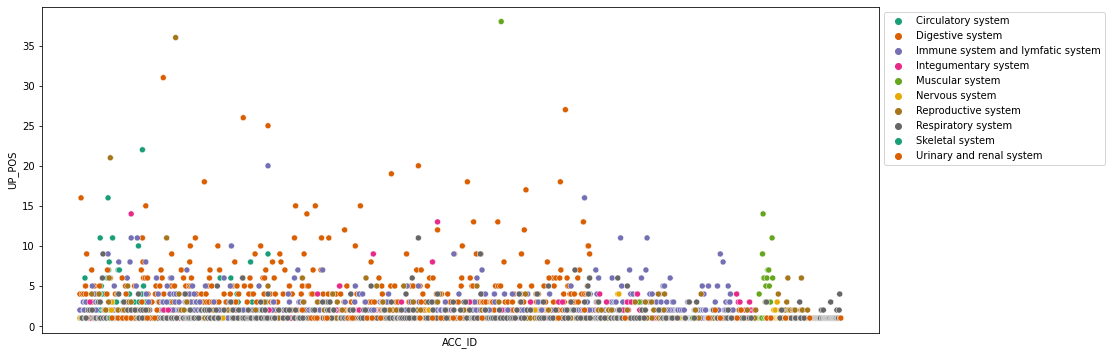

In [236]:
STY_generalprot_tspecsites["System"] = 0
for system in list_systems:
    STY_generalprot_tspecsites.loc[STY_generalprot_tspecsites[system]==1, "System"]= system
    STY_generalprot_tspecsites.drop([system], axis=1, inplace=True)
STY_generalprot_tspecsites_count = STY_generalprot_tspecsites.groupby(["System", "ACC_ID"], as_index=False)["UP_POS"].count()
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="UP_POS", hue="System", palette="Dark2", data=STY_generalprot_tspecsites_count)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

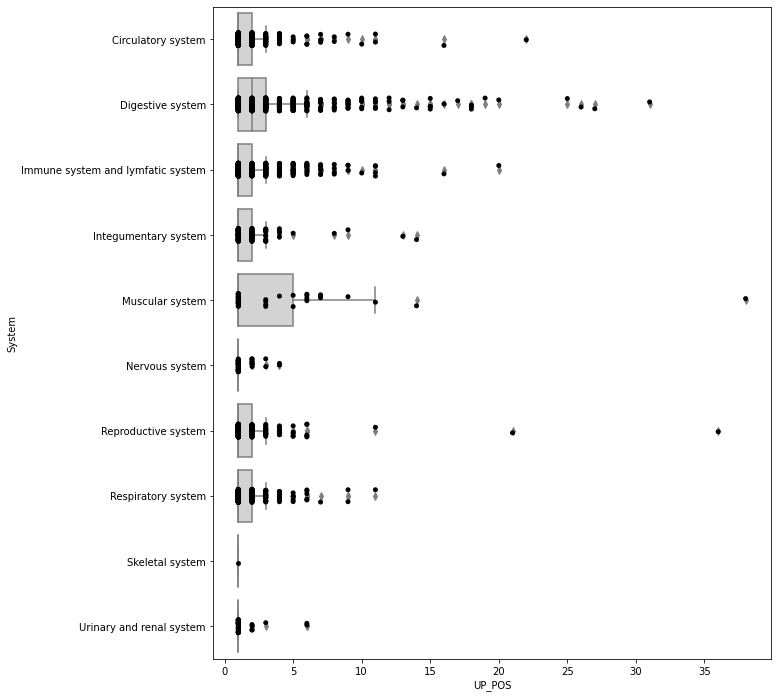

In [237]:
plt.figure(figsize=(10,12))
ax = sns.boxplot(x="UP_POS", y="System", data=STY_generalprot_tspecsites_count, color="lightgrey")
ax = sns.stripplot(x = "UP_POS", y="System", data=STY_generalprot_tspecsites_count, jitter=True, color="black")
plt.show()

<AxesSubplot:xlabel='Amount of tissues a protein has tspec sites in', ylabel='Amount proteins having tspec site in x tissues'>

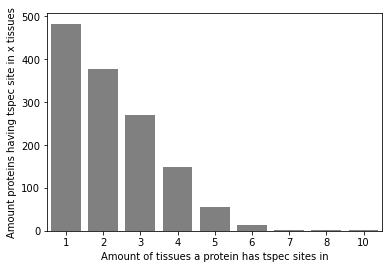

In [238]:
amount_tissues = STY_generalprot_tspecsites.groupby(["ACC_ID"], as_index=False)["tissue_site"].nunique()
amount_tissues = amount_tissues.groupby(["tissue_site"],as_index=False)["ACC_ID"].count()
amount_tissues.rename(columns={"tissue_site": "Amount of tissues a protein has tspec sites in", "ACC_ID":  "Amount proteins having tspec site in x tissues"}, inplace=True)
sns.barplot(x="Amount of tissues a protein has tspec sites in", y = "Amount proteins having tspec site in x tissues", data=amount_tissues, color="grey")

In [239]:
amount_tissues

Amount of tissues a protein has tspec sites in  \
0                                               1   
1                                               2   
2                                               3   
3                                               4   
4                                               5   
5                                               6   
6                                               7   
7                                               8   
8                                              10   

   Amount proteins having tspec site in x tissues  
0                                             483  
1                                             377  
2                                             269  
3                                             149  
4                                              55  
5                                              14  
6                                               3  
7                                               1  
8                                               1

In [240]:
tissue_counts_perv = STY_generalprot_tspecsites.groupby(["ACC_ID"], as_index=False)["tissue_site"].nunique()
tissue_counts_perv_maxtwo = tissue_counts_perv[(tissue_counts_perv["tissue_site"]==1)|(tissue_counts_perv["tissue_site"]==2)]
tissue_counts_perv_maxtwo = pd.merge(tissue_counts_perv_maxtwo, STY_generalprot_tspecsites, on=["ACC_ID"], how="left")
tissue_counts_perv_maxtwo["tissue_site_y"].value_counts()

Colon                  988
Lymph node             407
Blood                  208
Lung                   181
PBMC                   160
Skeletal muscle        149
Placenta               138
Skin                    97
Brain                   40
Testis                  28
Liver                   19
Small intestine         19
Urine                   11
Umbilical cord          10
Breast                   7
Heart                    6
Monocytes                6
NK-cells                 5
Urinary bladder          4
Pancreas                 3
Dental plaque            2
Cerebrospinal fluid      1
Tooth                    1
Eye                      1
B-cells                  1
Name: tissue_site_y, dtype: int64

#### looking at both general phosphorylated proteins and non tissue-specific proteins having tissue-specific phosphorylated sites

We'll now be looking at the combination of the pervasively phosphorylated proteins having tissue-specific phosphosites and the tissue-aspecific phosphorylated proteins having tissue-specific phosphosites, in a similar way as before.

In [241]:
print(STY_nontspecprot_tspecsites.shape[0]+STY_generalprot_tspecsites.shape[0])

11225


In [242]:
STY_nontspecprot_tspecsites["Type"] = "tissue aspecific phosphorylated protein"
STY_generalprot_tspecsites["Type"] = "pervasively phosphorylated protein"
STY_nonspeccomb = pd.merge(STY_nontspecprot_tspecsites, STY_generalprot_tspecsites, how="outer")
STY_nonspeccomb.sort_values(by="ACC_ID", inplace=True, ignore_index=True)
STY_nonspeccomb.head()

ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0AVK6                       0                0              1   
1  A0FGR8                       0                0              1   
2  A0FGR8                       0                0              1   
3  A0FGR8                       0                0              1   
4  A0JLT2                       0                0              1   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0             0              0               0                            0   
1             0              0               0                            0   
2             0              0               0                            0   
3             0              0               0                            0   
4             0              0               0                            0   

   Cervix_protein  Colon_protein  ...  Urine_protein  Total_protein  UP_POS  \
0               0              1  ...              0              2      68   
1               0              1  ...              0              5     743   
2               0              1  ...              0              5     737   
3               0              1  ...              0              5     736   
4               0              1  ...              0              3     234   

                                              tissue  modres  Total_site  \
0                                  Colon,Colon,Colon       S           1   
1  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...       S           1   
2                                              Colon       S           1   
3  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...       S           1   
4                                              Blood       S           1   

   tissue_site  Total_systems              System  \
0        Colon              1    Digestive system   
1        Colon              1    Digestive system   
2        Colon              1    Digestive system   
3        Colon              1    Digestive system   
4        Blood              1  Circulatory system   

                                      Type  
0  tissue aspecific phosphorylated protein  
1       pervasively phosphorylated protein  
2       pervasively phosphorylated protein  
3       pervasively phosphorylated protein  
4  tissue aspecific phosphorylated protein  

[5 rows x 51 columns]

In [243]:
STY_nonspeccomb.shape #merge succesfull if this mathces the first number orinted out above

(11225, 51)

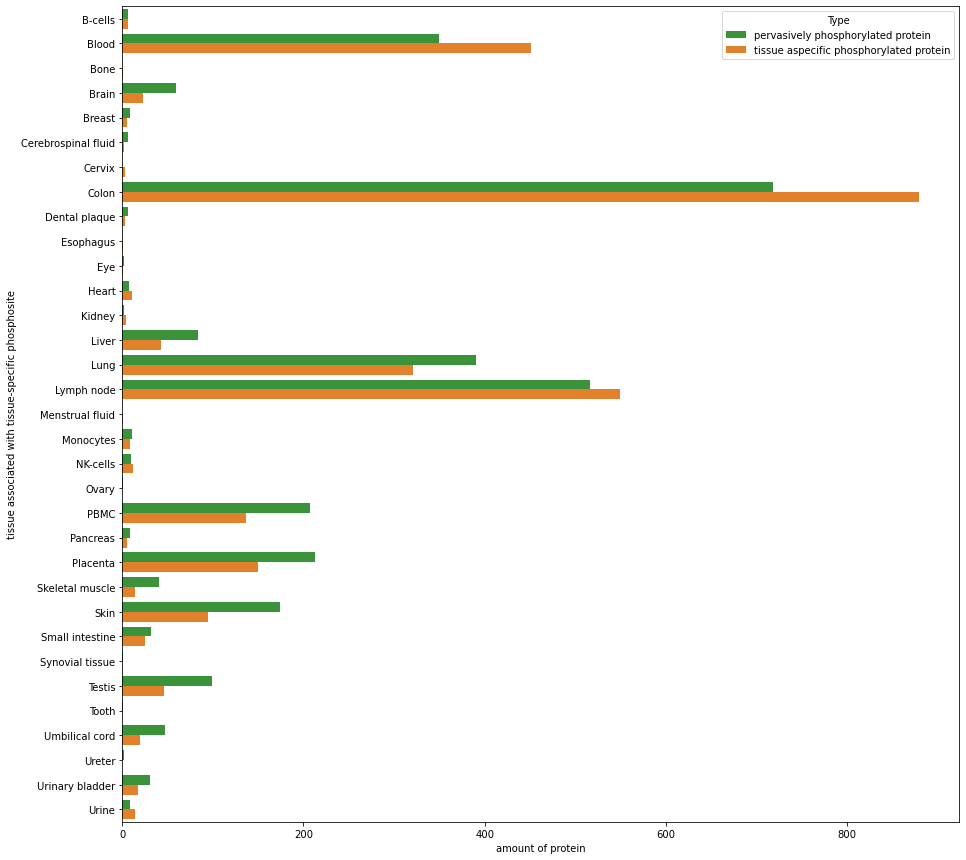

            tissue_site                                     Type  ACC_ID
0               B-cells       pervasively phosphorylated protein       6
1               B-cells  tissue aspecific phosphorylated protein       6
2                 Blood       pervasively phosphorylated protein     350
3                 Blood  tissue aspecific phosphorylated protein     451
4                  Bone  tissue aspecific phosphorylated protein       1
5                 Brain       pervasively phosphorylated protein      59
6                 Brain  tissue aspecific phosphorylated protein      23
7                Breast       pervasively phosphorylated protein       8
8                Breast  tissue aspecific phosphorylated protein       5
9   Cerebrospinal fluid       pervasively phosphorylated protein       6
10  Cerebrospinal fluid  tissue aspecific phosphorylated protein       2
11               Cervix  tissue aspecific phosphorylated protein       3
12                Colon       pervasively phosphory

In [244]:
STY_nonspeccomb_site = STY_nonspeccomb.groupby(["tissue_site", "Type"], as_index=False)["ACC_ID"].nunique()
palette = {"pervasively phosphorylated protein": "tab:green", "tissue aspecific phosphorylated protein": "tab:orange"}
plt.figure(figsize=(15,15))
sns.barplot(x=STY_nonspeccomb_site["ACC_ID"], y=STY_nonspeccomb_site["tissue_site"], hue=STY_nonspeccomb_site["Type"], palette=palette).set(xlabel="amount of protein",
                                                  ylabel = "tissue associated with tissue-specific phosphosite")
plt.show()
print(STY_nonspeccomb_site)
#STY_nonspeccomb_site.head(43)

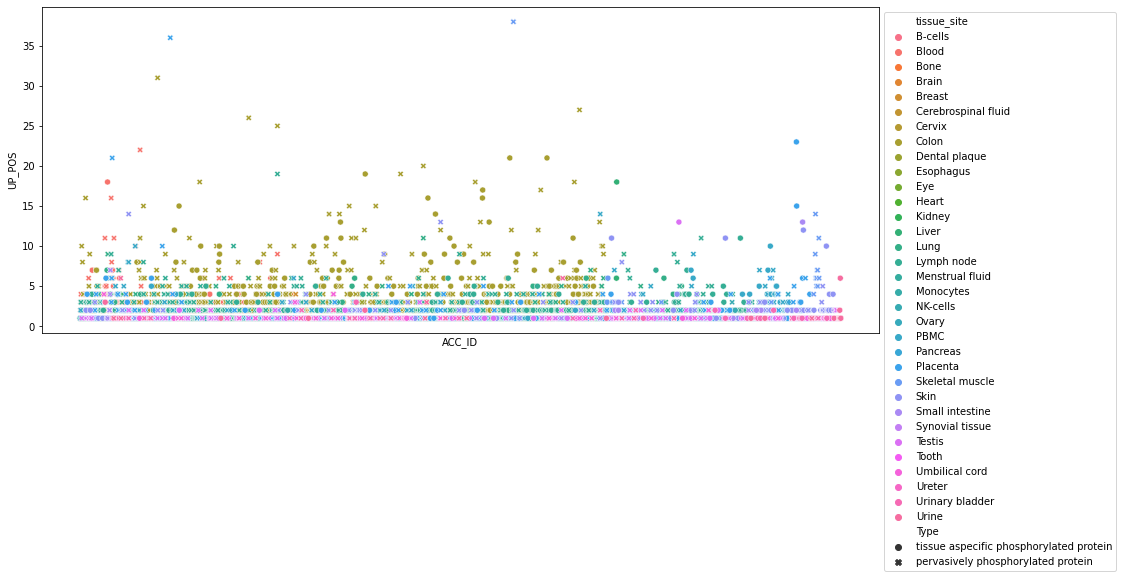

In [245]:
STY_nonspeccomb_tissue = STY_nonspeccomb.groupby(["tissue_site", "ACC_ID"], as_index=False).agg(
    {"UP_POS": "count", "Type": "first"})
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="UP_POS", hue="tissue_site", style="Type",data=STY_nonspeccomb_tissue)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

In [246]:
palette2 = {"pervasively phosphorylated protein": "darkseagreen", "tissue aspecific phosphorylated protein":"peachpuff"}

In [247]:
STY_nonspeccomb_tissue["UP_POS_log"] = np.log10(STY_nonspeccomb_tissue["UP_POS"])
STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["UP_POS_log"]!=0]

tissue_site  ACC_ID  UP_POS                                     Type  \
16         Blood  A6NC98       4  tissue aspecific phosphorylated protein   
18         Blood  A8CG34       2  tissue aspecific phosphorylated protein   
24         Blood  O00571       2  tissue aspecific phosphorylated protein   
25         Blood  O14492       2  tissue aspecific phosphorylated protein   
26         Blood  O14497       4       pervasively phosphorylated protein   
...          ...     ...     ...                                      ...   
5872       Urine  P16112       2  tissue aspecific phosphorylated protein   
5873       Urine  Q08380       2  tissue aspecific phosphorylated protein   
5875       Urine  Q12929       3       pervasively phosphorylated protein   
5879       Urine  Q9NQ84       6       pervasively phosphorylated protein   
5880       Urine  Q9NZH0       6  tissue aspecific phosphorylated protein   

      UP_POS_log  
16      0.602060  
18      0.301030  
24      0.301030  
25      0.301030  
26      0.602060  
...          ...  
5872    0.301030  
5873    0.301030  
5875    0.477121  
5879    0.778151  
5880    0.778151  

[2152 rows x 5 columns]

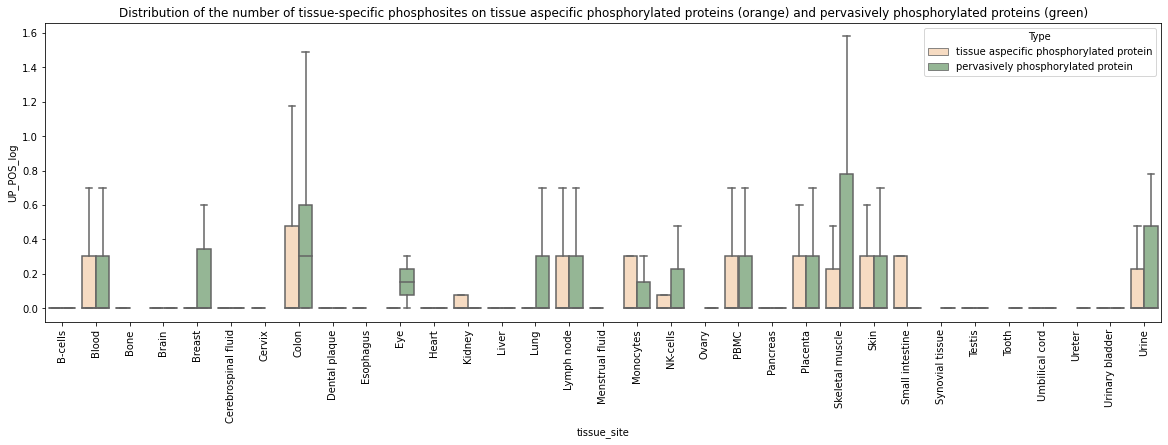

In [248]:
plt.figure(figsize=(20,5.5))
sns.boxplot(y="UP_POS_log", x="tissue_site", data=STY_nonspeccomb_tissue, hue="Type", palette = palette2, width=0.8, showfliers=False)
#sns.stripplot(y = "UP_POS", x="tissue_site", data=STY_nonspeccomb_tissue, jitter=True, color="black", hue="Type", palette=palette)
plt.title("Distribution of the number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins (orange) and pervasively phosphorylated proteins (green)")
plt.xticks(rotation=90)
#plt.savefig("WP1 tissue-specific phosphosites on non-tissue-specific phosphorylated proteins_boxplot.png", format="png", bbox_inches="tight")
plt.show()

In [249]:
list_colour = STY_nonspeccomb_tissue["Type"].replace({"tissue aspecific phosphorylated protein": 0, "pervasively phosphorylated protein": 1}).tolist()
color = ["tab:orange" if l == 0 else "tab:green" for l in list_colour]

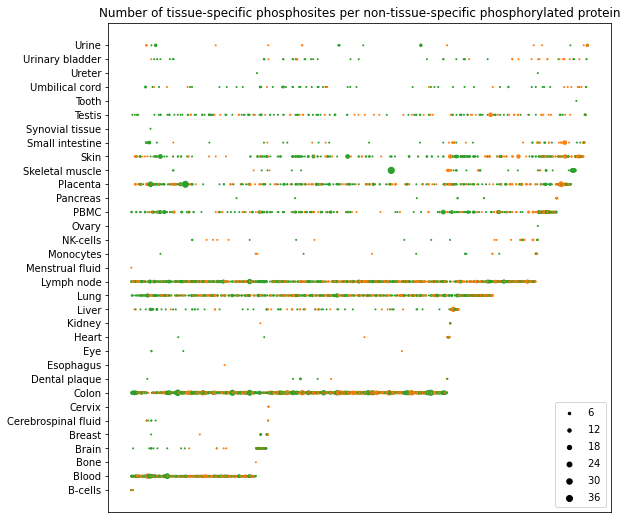

In [250]:
plt.figure(figsize=(9,9))
sc = plt.scatter(x=STY_nonspeccomb_tissue["ACC_ID"], y=STY_nonspeccomb_tissue["tissue_site"], s=STY_nonspeccomb_tissue["UP_POS"], c=color)
plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites per non-tissue-specific phosphorylated protein")
legend2 = plt.legend(*sc.legend_elements("sizes", num=6), loc="lower right")

#plt.savefig("WP1 tissue-specific phosphosites on non-tissue-specific phosphorylated proteins.png", format="png", bbox_inches="tight")
plt.show()

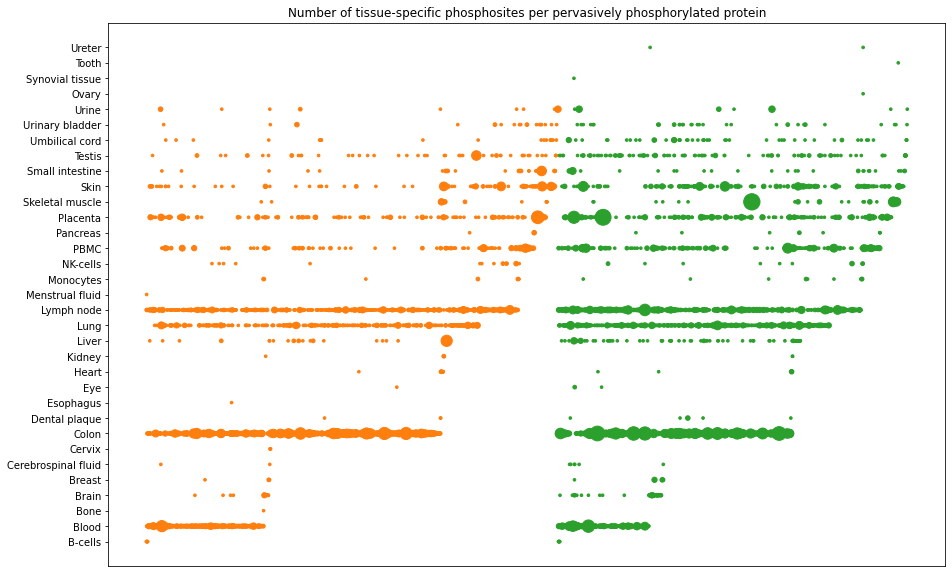

In [251]:
plt.figure(figsize=(15,10))
plt.scatter(x=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="tissue aspecific phosphorylated protein"]["ACC_ID"], y=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="tissue aspecific phosphorylated protein"]["tissue_site"], s=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="tissue aspecific phosphorylated protein"]["UP_POS"]*7, c=["tab:orange"])
plt.scatter(x=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="pervasively phosphorylated protein"]["ACC_ID"], y=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="pervasively phosphorylated protein"]["tissue_site"], s=STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["Type"]=="pervasively phosphorylated protein"]["UP_POS"]*7, c=["tab:green"])
plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites per pervasively phosphorylated protein")
plt.show()

When we filter out the proteins that don't have at least 5 tissue-specific phosphosites in at least one tissue, 383 phosphosites remain, 234 on pervasively phosphorylated proteins and 149 on tissue aspecific phosphorylated proteins.

In [252]:
print(STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["UP_POS"]>=5].shape[0])
STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["UP_POS"]>=5]["Type"].value_counts()

383


pervasively phosphorylated protein         234
tissue aspecific phosphorylated protein    149
Name: Type, dtype: int64

In [253]:
STY_nonspeccomb_tissue

tissue_site  ACC_ID  UP_POS                                     Type  \
0        B-cells  P11836       1  tissue aspecific phosphorylated protein   
1        B-cells  P12259       1  tissue aspecific phosphorylated protein   
2        B-cells  P51610       1       pervasively phosphorylated protein   
3        B-cells  P98171       1       pervasively phosphorylated protein   
4        B-cells  Q14980       1       pervasively phosphorylated protein   
...          ...     ...     ...                                      ...   
5881       Urine  Q9P289       1       pervasively phosphorylated protein   
5882       Urine  Q9UBP4       1  tissue aspecific phosphorylated protein   
5883       Urine  Q9UP65       1  tissue aspecific phosphorylated protein   
5884       Urine  Q9UQN3       1       pervasively phosphorylated protein   
5885       Urine  Q9Y6E0       1  tissue aspecific phosphorylated protein   

      UP_POS_log  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
5881         0.0  
5882         0.0  
5883         0.0  
5884         0.0  
5885         0.0  

[5886 rows x 5 columns]

In [254]:
STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["UP_POS"]>=5]["tissue_site"].value_counts()

Colon              223
Lymph node          39
Blood               29
PBMC                24
Lung                21
Placenta            15
Skeletal muscle     14
Skin                 9
Liver                3
Urine                3
Small intestine      2
Testis               1
Name: tissue_site, dtype: int64

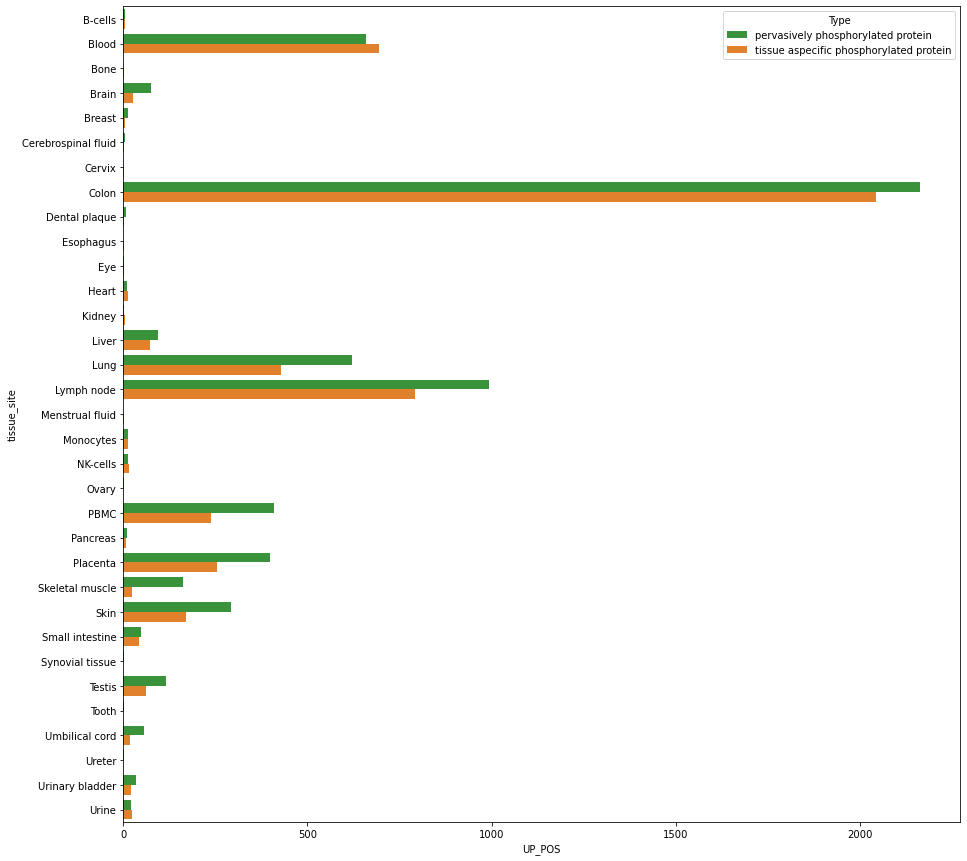

            tissue_site                                     Type  UP_POS
0               B-cells       pervasively phosphorylated protein       6
1               B-cells  tissue aspecific phosphorylated protein       6
2                 Blood       pervasively phosphorylated protein     659
3                 Blood  tissue aspecific phosphorylated protein     693
4                  Bone  tissue aspecific phosphorylated protein       1
5                 Brain       pervasively phosphorylated protein      75
6                 Brain  tissue aspecific phosphorylated protein      26
7                Breast       pervasively phosphorylated protein      14
8                Breast  tissue aspecific phosphorylated protein       6
9   Cerebrospinal fluid       pervasively phosphorylated protein       6
10  Cerebrospinal fluid  tissue aspecific phosphorylated protein       2
11               Cervix  tissue aspecific phosphorylated protein       3
12                Colon       pervasively phosphory

In [255]:
STY_nonspeccomb_tissue_count_pp = STY_nonspeccomb.groupby(["tissue_site", "Type"], as_index=False)["UP_POS"].count()
palette = {"pervasively phosphorylated protein": "tab:green", "tissue aspecific phosphorylated protein": "tab:orange"}
plt.figure(figsize=(15,15))
sns.barplot(x=STY_nonspeccomb_tissue_count_pp["UP_POS"], y=STY_nonspeccomb_tissue_count_pp["tissue_site"], hue=STY_nonspeccomb_site["Type"], palette=palette)
plt.show()
print(STY_nonspeccomb_tissue_count_pp)

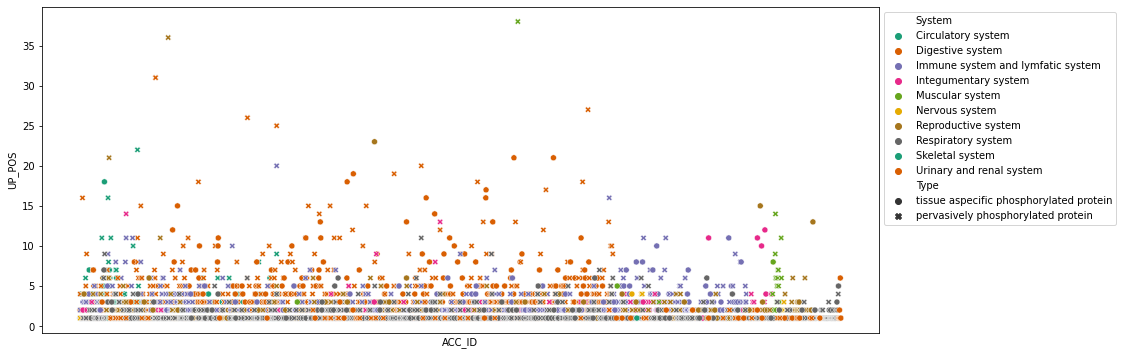

In [256]:
STY_nonspeccomb_system = STY_nonspeccomb.groupby(["System", "ACC_ID"], as_index=False).agg(
    {"UP_POS": "count", "Type": "first"})
plt.figure(figsize=(15,6))
sns.scatterplot(x="ACC_ID", y="UP_POS", hue="System", style="Type", palette="Dark2", data=STY_nonspeccomb_system)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks([],[])
plt.show()

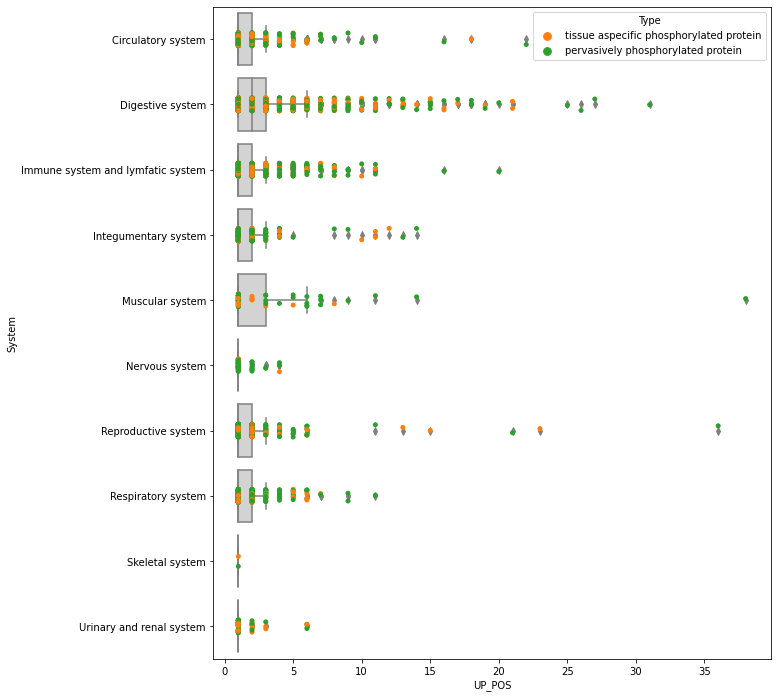

In [257]:
plt.figure(figsize=(10,12))
ax = sns.boxplot(x="UP_POS", y="System", data=STY_nonspeccomb_system, color="lightgrey")
ax = sns.stripplot(x = "UP_POS", y="System", data=STY_nonspeccomb_system, jitter=True, hue="Type", palette=palette)
plt.show()

When we filter out the proteins not having at least 5 organ-specific phosphosites, 408 phosphosites remain, 252 on pervasively phosphorylated proteins and 156 on tissue aspecific phosphorylated proteins.

In [258]:
print(STY_nonspeccomb_system[STY_nonspeccomb_system["UP_POS"]>=5].shape[0])
STY_nonspeccomb_system[STY_nonspeccomb_system["UP_POS"]>=5]["Type"].value_counts()

408


pervasively phosphorylated protein         252
tissue aspecific phosphorylated protein    156
Name: Type, dtype: int64

In [259]:
STY_nonspeccomb_tissue[STY_nonspeccomb_tissue["UP_POS"]>=5]["tissue_site"].value_counts()

Colon              223
Lymph node          39
Blood               29
PBMC                24
Lung                21
Placenta            15
Skeletal muscle     14
Skin                 9
Liver                3
Urine                3
Small intestine      2
Testis               1
Name: tissue_site, dtype: int64

In [260]:
print(STY_nonspeccomb_system[(STY_nonspeccomb_system["UP_POS"]>=5)&(STY_nonspeccomb_system["Type"]=="pervasively phosphorylated protein")]["UP_POS"].sum())
print(STY_nonspeccomb_system[(STY_nonspeccomb_system["UP_POS"]>=5)&(STY_nonspeccomb_system["Type"]=="tissue aspecific phosphorylated protein")]["UP_POS"].sum())

2056
1189


In [261]:
STY_nonspeccomb.drop(["Total_site", "Total_systems", "System"], axis=1, inplace=True)
#STY_nonspeccomb.to_csv("Tissue aspecific and pervasively P proteins tspec sites", sep="\t", index=False)

## Comparison of nr tissue-specific P-sites to nr tissue aspecific P-sites

In [262]:
taspec_tspecsite_count = STY_nontspecprot_tspecsites.groupby(["ACC_ID"], as_index=False)["UP_POS"].count()
taspec_tspecsite_count.rename({"UP_POS": "tissue-specific P-sites"}, inplace=True, axis=1)
taspec_tspecsite_count

ACC_ID  tissue-specific P-sites
0     A0AVK6                        1
1     A0JLT2                        3
2     A0M8Q6                        1
3     A0MZ66                        4
4     A1KXE4                        3
...      ...                      ...
1591  Q9Y6N7                        5
1592  Q9Y6N9                        2
1593  Q9Y6R4                        3
1594  Q9Y6R9                        4
1595  Q9Y6W5                        3

[1596 rows x 2 columns]

In [263]:
taspec_prot_taspec_sites = pd.merge(STY_non_t_spec_prot, STY_non_t_spec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID"])
taspec_prot_taspec_sites = taspec_prot_taspec_sites.groupby(["ACC_ID"], as_index=False)["UP_POS"].count()
taspec_prot_taspec_sites.rename({"UP_POS": "tissue aspecific P-sites"}, inplace=True, axis=1)
taspec_prot_taspec_sites["tissue aspecific P-sites"].value_counts()

1     1030
2      315
3      116
4       44
5       20
7        6
6        4
9        2
14       1
Name: tissue aspecific P-sites, dtype: int64

In [264]:
taspec_prot_2sites = pd.merge(taspec_tspecsite_count, taspec_prot_taspec_sites, on=["ACC_ID"], how="outer")
taspec_prot_2sites.fillna(0, inplace=True)
taspec_prot_2sites

ACC_ID  tissue-specific P-sites  tissue aspecific P-sites
0     A0AVK6                      1.0                       2.0
1     A0JLT2                      3.0                       1.0
2     A0M8Q6                      1.0                       1.0
3     A0MZ66                      4.0                       3.0
4     A1KXE4                      3.0                       0.0
...      ...                      ...                       ...
2069  Q9Y5K3                      0.0                       1.0
2070  Q9Y5N6                      0.0                       1.0
2071  Q9Y5Q9                      0.0                       1.0
2072  Q9Y5S9                      0.0                       2.0
2073  Q9Y6K1                      0.0                       1.0

[2074 rows x 3 columns]

In [265]:
plot = taspec_prot_2sites.groupby(["tissue-specific P-sites", "tissue aspecific P-sites"], as_index=False)["ACC_ID"].nunique()
plot.rename({"ACC_ID": "number of proteins"}, inplace=True, axis=1)
plot

tissue-specific P-sites  tissue aspecific P-sites  number of proteins
0                       0.0                       1.0                 369
1                       0.0                       2.0                  83
2                       0.0                       3.0                  21
3                       0.0                       4.0                   5
4                       1.0                       1.0                 278
..                      ...                       ...                 ...
94                     19.0                       3.0                   1
95                     21.0                       0.0                   1
96                     21.0                       2.0                   1
97                     22.0                       2.0                   1
98                     25.0                       3.0                   1

[99 rows x 3 columns]

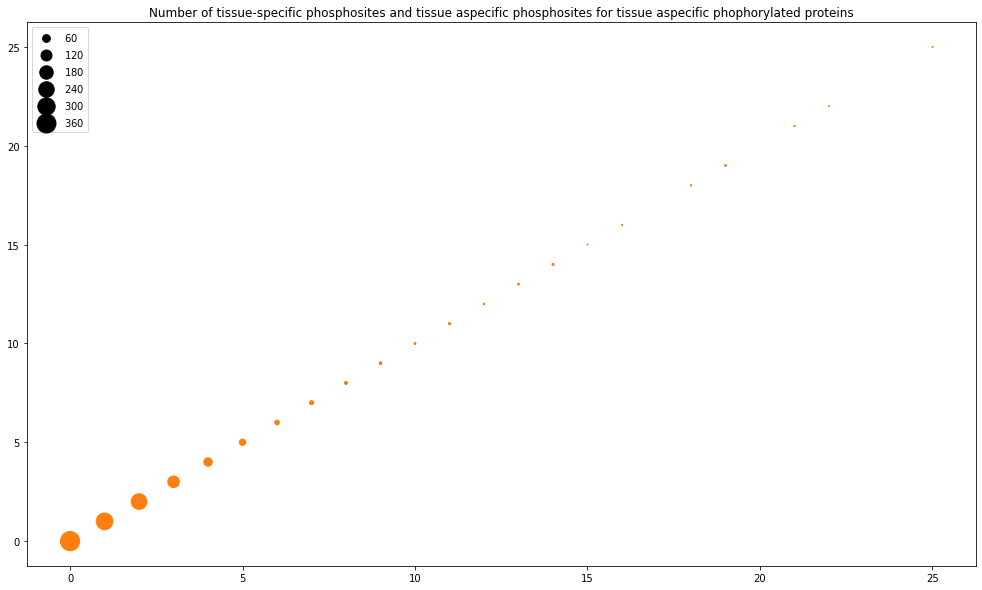

In [266]:
plt.figure(figsize=(17,10))
sc = plt.scatter(x=plot["tissue-specific P-sites"], y=plot["tissue-specific P-sites"], s=plot["number of proteins"], c="tab:orange")
#plt.xticks([],[])
plt.title("Number of tissue-specific phosphosites and tissue aspecific phosphosites for tissue aspecific phophorylated proteins")
plt.legend(*sc.legend_elements("sizes", num=6), loc="upper left")

#plt.savefig("WP1 tissue-specific phosphosites and tissue aspecific phosphosites on tissue aspecific phosphorylated proteins.png", format="png", bbox_inches="tight")
plt.show()

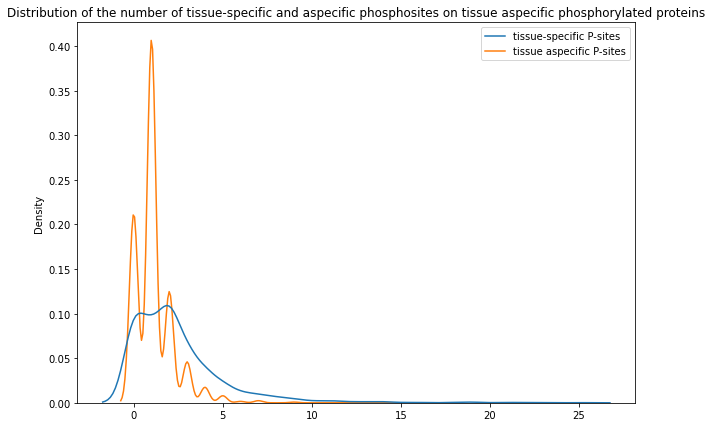

In [267]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=taspec_prot_2sites, palette="tab10")
plt.title("Distribution of the number of tissue-specific and aspecific phosphosites on tissue aspecific phosphorylated proteins")
plt.savefig("Distribution_tissue aspecific and tissue specific Psites.png", format="png", bbox_inches="tight")
plt.show()

In [268]:
gen_tspecsite_count = STY_generalprot_tspecsites.groupby(["ACC_ID"], as_index=False)["UP_POS"].count()
gen_tspecsite_count.rename({"UP_POS": "tissue-specific P-sites"}, inplace=True, axis=1)
gen_tspecsite_count

ACC_ID  tissue-specific P-sites
0     A0FGR8                        3
1     A0JNW5                        8
2     A5A3E0                        1
3     A6NEL2                        2
4     A6NKT7                        5
...      ...                      ...
1347  Q9Y6R1                        1
1348  Q9Y6V0                        1
1349  Q9Y6X4                        2
1350  Q9Y6X9                        2
1351  Q9Y6Y0                        3

[1352 rows x 2 columns]

In [269]:
gen_prot_taspec_sites = pd.merge(STY_general_prot, STY_non_t_spec_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID"])
gen_prot_taspec_sites = gen_prot_taspec_sites.groupby(["ACC_ID"], as_index=False)["UP_POS"].count()
gen_prot_taspec_sites.rename({"UP_POS": "tissue aspecific P-sites"}, inplace=True, axis=1)
gen_prot_taspec_sites["tissue aspecific P-sites"].value_counts()

1     311
2     266
3     197
4     129
5      77
6      67
8      37
7      37
11     14
10     10
9       9
12      6
19      3
15      3
13      3
14      3
18      3
34      1
33      1
20      1
57      1
16      1
Name: tissue aspecific P-sites, dtype: int64

In [270]:
gen_prot_2sites = pd.merge(gen_tspecsite_count, gen_prot_taspec_sites, on=["ACC_ID"], how="outer")
gen_prot_2sites.fillna(0, inplace=True)
gen_prot_2sites

ACC_ID  tissue-specific P-sites  tissue aspecific P-sites
0     A0FGR8                      3.0                       4.0
1     A0JNW5                      8.0                       0.0
2     A5A3E0                      1.0                       2.0
3     A6NEL2                      2.0                       0.0
4     A6NKT7                      5.0                       5.0
...      ...                      ...                       ...
1462  Q9UN36                      0.0                       2.0
1463  Q9UNE7                      0.0                       1.0
1464  Q9UPN6                      0.0                       2.0
1465  Q9UQ16                      0.0                       1.0
1466  Q9Y6M1                      0.0                       3.0

[1467 rows x 3 columns]

In [271]:
gen_prot_gen_sites = pd.merge(STY_general_prot, STY_general_sites[["ACC_ID", "UP_POS"]], how="inner", on=["ACC_ID"])
gen_prot_gen_sites = gen_prot_gen_sites.groupby(["ACC_ID"], as_index=False)["UP_POS"].count()
gen_prot_gen_sites.rename({"UP_POS": "pervasive P-sites"}, inplace=True, axis=1)
gen_prot_gen_sites["pervasive P-sites"].value_counts()

1     725
2     285
3     112
4      78
5      47
7      30
6      27
8      17
10      8
12      7
9       6
11      5
13      4
15      4
14      2
17      2
23      2
29      1
31      1
19      1
39      1
72      1
21      1
16      1
Name: pervasive P-sites, dtype: int64

In [272]:
gen_prot_3sites = pd.merge(gen_prot_2sites, gen_prot_gen_sites, on=["ACC_ID"], how="outer")
gen_prot_3sites.fillna(0, inplace=True)
gen_prot_3sites

ACC_ID  tissue-specific P-sites  tissue aspecific P-sites  \
0     A0FGR8                      3.0                       4.0   
1     A0JNW5                      8.0                       0.0   
2     A5A3E0                      1.0                       2.0   
3     A6NEL2                      2.0                       0.0   
4     A6NKT7                      5.0                       5.0   
...      ...                      ...                       ...   
1747  Q9Y2Q0                      0.0                       0.0   
1748  Q9Y463                      0.0                       0.0   
1749  Q9Y570                      0.0                       0.0   
1750  Q9Y6N8                      0.0                       0.0   
1751  Q9Y6T7                      0.0                       0.0   

      pervasive P-sites  
0                   0.0  
1                   1.0  
2                   4.0  
3                   1.0  
4                   1.0  
...                 ...  
1747                4.0  
1748                1.0  
1749                2.0  
1750                1.0  
1751                2.0  

[1752 rows x 4 columns]

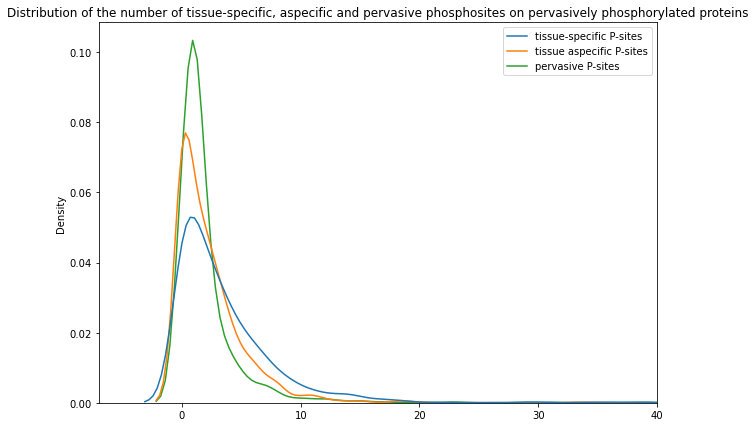

In [273]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=gen_prot_3sites, palette="tab10")
plt.title("Distribution of the number of tissue-specific, aspecific and pervasive phosphosites on pervasively phosphorylated proteins")
plt.xlim(right=40)
plt.savefig("Distribution_pervasive_tissue aspecific_tissue specific Psites.png", format="png", bbox_inches="tight")
plt.show()

In [274]:
gen_prot_3sites[gen_prot_3sites["pervasive P-sites"]>=50]
#Microtubule-associated protein 1B, associated with 99 P-sites in UniProtKB (https://www.uniprot.org/uniprot/P46821)

ACC_ID  tissue-specific P-sites  tissue aspecific P-sites  \
461  P46821                      8.0                       8.0   

     pervasive P-sites  
461               72.0

In [275]:
gen_prot_3sites[gen_prot_3sites["pervasive P-sites"]>=20]
#P11137 Microtubule-associated protein 2, 42 P-sites in UniProtKB
#P60709 Actin cytoplasmic 1, no specific relation with P-sites denoted
#P63261, Actin cytoplasmic 2, no specific relation with P-sites denoted
#P78559, Microtubule-associated protein 1A, 75 P-sites in UniProtKB
#Q01484, Ankyrin-2, 50 P-sites
#Q9UQ35, Serine/arginine repetitive matrix protein 2, 270 P-sites

ACC_ID  tissue-specific P-sites  tissue aspecific P-sites  \
268   P11137                     12.0                       1.0   
461   P46821                      8.0                       8.0   
529   P60709                      4.0                       8.0   
557   P63261                      4.0                       8.0   
572   P78559                      4.0                       6.0   
589   Q01484                      6.0                       0.0   
1287  Q9UQ35                     63.0                      57.0   

      pervasive P-sites  
268                21.0  
461                72.0  
529                23.0  
557                23.0  
572                39.0  
589                31.0  
1287               29.0

In [276]:
distr_tspec = STY_tspecprot_tspecsites.groupby(["ACC_ID"], as_index=False)["UP_POS"].count()
distr_tspec.rename({"UP_POS": "number of tissue-specific P-sites"}, axis=1, inplace=True)
distr_tspec

ACC_ID  number of tissue-specific P-sites
0     A0A075B6H7                                  1
1     A0A075B6S5                                  1
2     A0A087WXM9                                  1
3     A0A0B4J2D5                                  2
4     A0A0B4J2D9                                  1
...          ...                                ...
2024      Q9Y6N5                                  1
2025      Q9Y6P5                                  1
2026      Q9Y6R7                                  3
2027      Q9Y6X8                                  1
2028      Q9Y6Y8                                  2

[2029 rows x 2 columns]

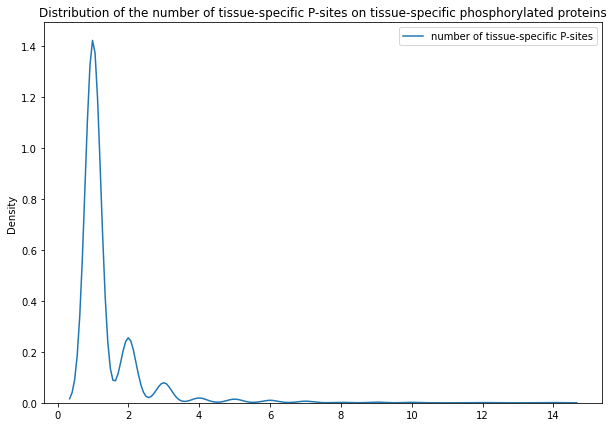

In [277]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=distr_tspec, palette="tab10")
plt.title("Distribution of the number of tissue-specific P-sites on tissue-specific phosphorylated proteins")
#plt.xlim(right=40)
plt.savefig("Distribution_tspecsites_tpsecproteins.png", format="png", bbox_inches="tight")
plt.show()

# 1.3 tissue based phosphorylation patterns

Similar to what is described above, the data is again summarised on the phosphosite level, accumulating all tissue annotation in one long string. The modified residue is also retained. At first, all data, including the non canonical sites, is considered. Phosphosites are then presented as a binary string, indicating whether the site has been identified in a certain tissue. The total amount of tissues for each phosphosite is calculated, and a column indicating tissue-sepcificness has been added.

In [176]:
list_tissues = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Bronchoalveolar lavage", "Cartilage", "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Sputum", "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

data_site_pat = data[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_site_pat = data_site_pat.groupby(["ACC_ID", "UP_POS"],
                              as_index=False)[["tissue", "modres"]].agg({"tissue": lambda x:
                                                              ",".join(x),
                                                                        "modres": "first"}
                                                                       )

for tissue in list_tissues:
    data_site_pat[tissue] = data_site_pat["tissue"].str.contains(tissue)
data_site_pat.replace({True:1, False:0}, inplace=True)
col_list_pat = list(data_site_pat)
col_list_pat.remove("UP_POS")
col_list_pat.remove("modres")
data_site_pat["Total"] = data_site_pat[col_list_pat].sum(axis=1)
data_site_pat["t_spec"] = 0
data_site_pat.loc[data_site_pat["Total"]==1, "t_spec"]=1

C:\Users\hannedvo\AppData\Local\Temp\40/ipykernel_27956/3029833069.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_site_pat["Total"] = data_site_pat[col_list_pat].sum(axis=1)


In [177]:
data_site_pat.head()

ACC_ID  UP_POS                                             tissue  \
0  A0A075B6H7      30                                               Lung   
1  A0A075B6S5      52                                    Menstrual fluid   
2  A0A075B759      62  Umbilical cord,Umbilical cord,Umbilical cord,S...   
3  A0A075B767      62  Umbilical cord,Umbilical cord,Umbilical cord,S...   
4  A0A087WV62     102              Urinary bladder, Colon, Kidney, Liver   

  modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0      T               0        0      0     0      0       0  ...   
1      S               0        0      0     0      0       0  ...   
2      C               0        0      0     0      1       0  ...   
3      C               0        0      0     0      1       0  ...   
4      K               0        0      0     0      0       0  ...   

   Synovial tissue  T-cells  Testis  Tooth  Umbilical cord  Ureter  \
0                0        0       0      0               0       0   
1                0        0       0      0               0       0   
2                0        0       0      0               1       0   
3                0        0       0      0               1       0   
4                0        0       0      0               0       0   

   Urinary bladder  Urine  Total  t_spec  
0                0      0      1       1  
1                0      0      1       1  
2                0      1      7       0  
3                0      1      7       0  
4                1      0      4       0  

[5 rows x 50 columns]

We are now counting how many sites are in each tissue. The tissues having less than 50 phosphosites are indicated below and will not be considered.

In [178]:
site_count_tissue = pd.DataFrame({"Tissue": list_tissues})
site_counts = []
for tissue in list_tissues:
    s = data_site_pat[tissue].sum()
    site_counts.append(s)
site_count_tissue["sites per tissue"] = site_counts
problems_pat = site_count_tissue[(site_count_tissue["sites per tissue"]<50)]
#These tissues we have to little information and aren't considered for clustering (is 50 a good limit?)
tissues_not_considered = problems_pat["Tissue"].tolist()
tissues_not_considered

['Bone',
 'Bronchoalveolar lavage',
 'Cartilage',
 'Follicular fluid',
 'Peritoneal dialysis fluid',
 'Sputum',
 'T-cells',
 'Tooth']

Dummyvariabeles are constructed for the columns concerning the position of the phosphorylated residue and the modified residue. For each possible position and residue, a column is added, containing binary values that indicate for each phosphosite whether it is on that position or that residue. A part of the resulting datamframe is shown below. If the phosphosite is, for example, a serine on position 35, the columns "S" and "UP_POS35" will contain a 1 for that row, and all other columns will be zero.

In [179]:
data_site_pat_to_cluster = data_site_pat[(data_site_pat["Bone"]!=1)&
                                         (data_site_pat["Bronchoalveolar lavage"]!=1)&
                                        (data_site_pat["Cartilage"]!=1)&
                                        (data_site_pat["Follicular fluid"]!=1)&
                                        (data_site_pat["Peritoneal dialysis fluid"]!=1)&
                                        (data_site_pat["Sputum"]!=1)&
                                        (data_site_pat["T-cells"]!=1)&
                                        (data_site_pat["Tooth"]!=1)]
data_site_pat_to_cluster.drop(tissues_not_considered, axis=1, inplace=True)
data_site_pat_to_cluster_b = pd.get_dummies(data_site_pat_to_cluster, columns=["UP_POS", "modres"])
data_site_pat_to_cluster_b.head()

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ACC_ID                                             tissue  \
0  A0A075B6H7                                               Lung   
1  A0A075B6S5                                    Menstrual fluid   
2  A0A075B759  Umbilical cord,Umbilical cord,Umbilical cord,S...   
3  A0A075B767  Umbilical cord,Umbilical cord,Umbilical cord,S...   
4  A0A087WV62              Urinary bladder, Colon, Kidney, Liver   

   Adipose tissue  B-cells  Blood  Brain  Breast  Cerebrospinal fluid  Cervix  \
0               0        0      0      0       0                    0       0   
1               0        0      0      0       0                    0       0   
2               0        0      0      1       0                    1       0   
3               0        0      0      1       0                    1       0   
4               0        0      0      0       0                    0       0   

   Colon  ...  UP_POS_34280  modres_C  modres_D  modres_E  modres_H  modres_K  \
0      0  ...             0         0         0         0         0         0   
1      0  ...             0         0         0         0         0         0   
2      1  ...             0         1         0         0         0         0   
3      1  ...             0         1         0         0         0         0   
4      1  ...             0         0         0         0         0         1   

   modres_R  modres_S  modres_T  modres_Y  
0         0         0         1         0  
1         0         1         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 3174 columns]

In [180]:
print(data_site_pat_to_cluster_b.shape)

(46372, 3174)


We will now implement the DBSCAN algorithm. DBSCAN is particularly well suited for this, as it attempts to find high-density 'spots' in data to identify clusters. It is particularly suited for high-dimensional data. It has two important parameters: min_samples (how many points have to be in a spot for it to be considered a cluster) and epselon, a treshold parameter.
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

For the latter to be calculated, we make use of a NearestNeighbors algorithm, with n_neighbours = dim. 

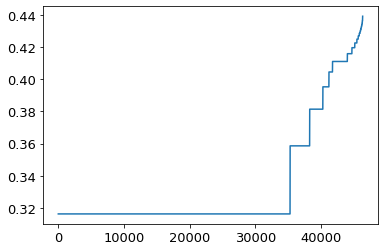

In [139]:
#finding the ideal epselon value
col_list_clustering = list(data_site_pat_to_cluster_b)
col_list_clustering.remove("tissue")
col_list_clustering.remove("ACC_ID")

X = data_site_pat_to_cluster_b[col_list_clustering].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_neighbours = cosine_similarity(X)

#n_neighbours is based on the min_samples parameter, 2*dim
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3173, metric = "precomputed")
nbrs = neigh.fit(X_neighbours)
distances, indices = nbrs.kneighbors(X_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
model = DBSCAN(eps=0.36, min_samples=3173, metric="cosine").fit(X)

In [47]:
data_DBSCAN = data_site_pat_to_cluster
data_DBSCAN["cluster"]=model.labels_

<ipython-input-47-e37b498f2ea7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_DBSCAN["cluster"]=model.labels_


In [48]:
data_DBSCAN_per_cluster = data_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()

In [49]:
data_DBSCAN_per_cluster

cluster  ACC_ID
0       -1   11236
1        0   35136

## trying to cluster per residue

In [181]:
data_site_pat_res = pd.get_dummies(data_site_pat_to_cluster, columns=["modres"])
print(data_site_pat_res.shape)
col_list_res = list(data_site_pat_res)
col_list_res.remove("tissue")
col_list_res.remove("ACC_ID")
col_list_res.remove("UP_POS")

(46372, 50)


In [182]:
X_res = data_site_pat_res[col_list_res].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_res_neighbours = cosine_similarity(X_res)

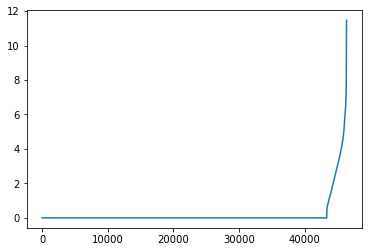

In [52]:
from sklearn.neighbors import NearestNeighbors
neigh_res = NearestNeighbors(n_neighbors=48)
nbrs_res = neigh_res.fit(X_res_neighbours)
distances_res, indices_res = nbrs_res.kneighbors(X_res_neighbours)
distances_res = np.sort(distances_res, axis=0)
distances_res = distances_res[:,1]
plt.plot(distances_res)

In [53]:
from sklearn.cluster import DBSCAN
model_res = DBSCAN(eps=2, min_samples=48, metric="cosine").fit(X_res)

In [54]:
data_DBSCAN_res = data_site_pat_res
data_DBSCAN_res["cluster"]=model_res.labels_

In [55]:
data_DBSCAN_res_clustered = data_DBSCAN_res.groupby(["cluster"], as_index=False)["ACC_ID"].count()
data_DBSCAN_res_clustered

cluster  ACC_ID
0        0   46372

### Hamming distance instead of cosine similarity

In [ ]:
#from sklearn.neighbors import DistanceMetric
#dist = DistanceMetric.get_metric("hamming")
#X_hamming = dist.pairwise(X)

In [ ]:
#from sklearn.neighbors import NearestNeighbors
#neigh_res_hamming = NearestNeighbors(n_neighbors=3173)
#nbrs_res_hamming = neigh_res_hamming.fit(X_hamming)
#distances_res_hamming, indices_res_hamming = nbrs_res_hamming.kneighbors(X_hamming)
#distances_res_hamming = np.sort(distances_res_hamming, axis=0)
#distances_res_hamming = distances_res_hamming[:,1]
#plt.plot(distances_res_hamming)

In [ ]:
#model_res = DBSCAN(eps=1, min_samples=48, metric="hamming").fit(X_res)

In [ ]:
#data_DBSCAN_res = data_site_pat_res
#data_DBSCAN_res["cluster"]=model_res.labels_
#data_DBSCAN_res_clustered = data_DBSCAN_res.groupby(["cluster"], as_index=False)["ACC_ID"].count()
#data_DBSCAN_res_clustered

## trying to cluster per position

In [ ]:
#data_site_pat_pos = pd.get_dummies(data_site_pat_to_cluster, columns=["UP_POS"])
#print(data_site_pat_pos.shape)

In [ ]:
#col_list_pos = list(data_site_pat_pos)
#col_list_pos.remove("tissue")
#col_list_pos.remove("ACC_ID")
#col_list_pos.remove("modres")

In [ ]:
#X_pos = data_site_pat_pos[col_list_pos].to_numpy()
#from sklearn.metrics.pairwise import cosine_similarity
#X_pos_neighbours = cosine_similarity(X_pos)

In [ ]:
#from sklearn.neighbors import NearestNeighbors
#neigh_pos = NearestNeighbors(n_neighbors=3164)
#nbrs_pos = neigh_pos.fit(X_pos_neighbours)
#distances_pos, indices_pos = nbrs.kneighbors(X_pos_neighbours)
#distances_pos = np.sort(distances_pos, axis=0)
#distances_pos = distances_pos[:,1]
#plt.plot(distances_pos)

In [ ]:
#from sklearn.cluster import DBSCAN
#model_pos = DBSCAN(eps=0.42, min_samples=3164, metric="cosine").fit(X_pos)

In [ ]:
#data_DBSCAN_pos = data_site_pat_pos
#data_DBSCAN_pos["cluster"]=model_pos.labels_

In [ ]:
d#ata_DBSCAN_pos_clustered = data_DBSCAN_pos.groupby(["cluster"], as_index=False)["ACC_ID"].count()
#data_DBSCAN_pos_clustered

## clustering only considering one tissue at the time

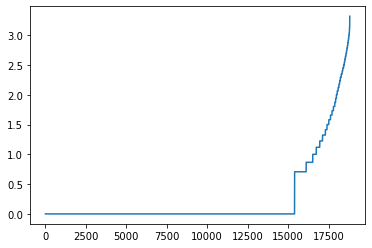

In [181]:
list_tissues = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Bronchoalveolar lavage", "Cartilage", "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Sputum", "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

data_site_colon = data[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_site_colon = data_site_pat.groupby(["ACC_ID", "UP_POS"],
                              as_index=False)[["tissue", "modres"]].agg({"tissue": lambda x:
                                                              ",".join(x),
                                                                        "modres": "first"}
                                                                       )


data_site_colon = data_site_colon[(data_site["Colon"]==1)]
data_site_colon_b = pd.get_dummies(data_site_colon, columns=["UP_POS", "modres"])
data_site_colon_b.head()
col_colon = list(data_site_colon_b)
col_colon.remove("tissue")
col_colon.remove("ACC_ID")

X_colon = data_site_colon_b[col_colon].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_colon_neighbours = cosine_similarity(X_colon)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2346)
nbrs = neigh.fit(X_colon_neighbours)
distances, indices = nbrs.kneighbors(X_colon_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [14]:
from sklearn.cluster import DBSCAN
model_colon = DBSCAN(eps=1, min_samples=2346, metric="cosine").fit(X_colon)

In [15]:
colon_DBSCAN = data_site_colon
colon_DBSCAN["cluster"]=model_colon.labels_
colon_DBSCAN_per_cluster = colon_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()

In [16]:
colon_DBSCAN_per_cluster
#again all in the same cluster

cluster  ACC_ID
0        0   18806

In [ ]:
#alternatively use: Mean shift (not with cosine similarity/precomputed), Agglomerative clustering
#reducing features? Feature elimination?

## only STY sites

In [182]:
data_site_pat = data_STY[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_site_pat = data_site_pat.groupby(["ACC_ID", "UP_POS"],
                              as_index=False)[["tissue", "modres"]].agg({"tissue": lambda x:
                                                              ",".join(x),
                                                                        "modres": "first"}
                                                                       )

for tissue in list_tissues:
    data_site_pat[tissue] = data_site_pat["tissue"].str.contains(tissue)
data_site_pat.replace({True:1, False:0}, inplace=True)
col_list_pat = list(data_site_pat)
col_list_pat.remove("UP_POS")
col_list_pat.remove("modres")
data_site_pat["Total"] = data_site_pat[col_list_pat].sum(axis=1)
data_site_pat["t_spec"] = 0
data_site_pat.loc[data_site_pat["Total"]==1, "t_spec"]=1
data_site_pat.head()

C:\Users\hannedvo\AppData\Local\Temp\40/ipykernel_27956/3010287039.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_site_pat["Total"] = data_site_pat[col_list_pat].sum(axis=1)


ACC_ID  UP_POS           tissue modres  Adipose tissue  B-cells  Blood  \
0  A0A075B6H7      30             Lung      T               0        0      0   
1  A0A075B6S5      52  Menstrual fluid      S               0        0      0   
2  A0A087WXM9     223           Testis      S               0        0      0   
3  A0A0B4J2D5     124             PBMC      S               0        0      0   
4  A0A0B4J2D5     145             PBMC      T               0        0      0   

   Bone  Brain  Breast  ...  Synovial tissue  T-cells  Testis  Tooth  \
0     0      0       0  ...                0        0       0      0   
1     0      0       0  ...                0        0       0      0   
2     0      0       0  ...                0        0       1      0   
3     0      0       0  ...                0        0       0      0   
4     0      0       0  ...                0        0       0      0   

   Umbilical cord  Ureter  Urinary bladder  Urine  Total  t_spec  
0               0       0                0      0      1       1  
1               0       0                0      0      1       1  
2               0       0                0      0      1       1  
3               0       0                0      0      1       1  
4               0       0                0      0      1       1  

[5 rows x 50 columns]

In [183]:
data_site_pat_b = pd.get_dummies(data_site_pat, columns=["UP_POS"])
data_site_pat_b.head()

ACC_ID           tissue modres  Adipose tissue  B-cells  Blood  Bone  \
0  A0A075B6H7             Lung      T               0        0      0     0   
1  A0A075B6S5  Menstrual fluid      S               0        0      0     0   
2  A0A087WXM9           Testis      S               0        0      0     0   
3  A0A0B4J2D5             PBMC      S               0        0      0     0   
4  A0A0B4J2D5             PBMC      T               0        0      0     0   

   Brain  Breast  Bronchoalveolar lavage  ...  UP_POS_33000  UP_POS_33071  \
0      0       0                       0  ...             0             0   
1      0       0                       0  ...             0             0   
2      0       0                       0  ...             0             0   
3      0       0                       0  ...             0             0   
4      0       0                       0  ...             0             0   

   UP_POS_33201  UP_POS_33203  UP_POS_33247  UP_POS_33589  UP_POS_33626  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   UP_POS_33628  UP_POS_33976  UP_POS_34280  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0  

[5 rows x 2643 columns]

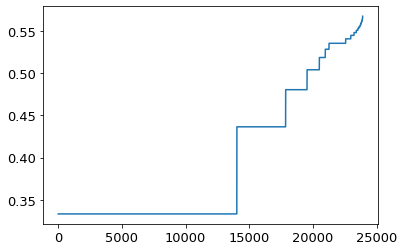

In [149]:
col_list_clustering = list(data_site_pat_b)
col_list_clustering.remove("tissue")
col_list_clustering.remove("ACC_ID")
col_list_clustering.remove("t_spec")
col_list_clustering.remove("modres")

X = data_site_pat_b[col_list_clustering].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_neighbours = cosine_similarity(X)

#n_neighbours is based on the min_samples parameter, 2*dim
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2641, metric = "precomputed")
nbrs = neigh.fit(X_neighbours)
distances, indices = nbrs.kneighbors(X_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) # no significant improvement

In [137]:
from sklearn.cluster import DBSCAN

In [154]:
model_STY = DBSCAN(eps=0.43, min_samples=2346, metric="cosine").fit(X)

In [155]:
STY_DBSCAN = data_site_pat
STY_DBSCAN["cluster"]=model_STY.labels_
STY_DBSCAN_per_cluster = STY_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()

In [156]:
STY_DBSCAN_per_cluster

cluster  ACC_ID
0        0   23903

## STY sites - encoded for tissue

In [184]:
data_encod = data_STY[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_encod = data_encod.groupby(["ACC_ID", "UP_POS", "tissue"],
                              as_index=False)[["tissue"]].agg({"tissue": "first"})
col_list_encod = list(data_encod)
col_list_encod.remove("UP_POS")
data_encod["encod"]=0
data_dup = data_encod.loc[data_encod["tissue"].str.contains(","), :]
list_dup = data_dup["tissue"].value_counts().index.to_list()
for i in range(len(list_tissues_STY)):
    data_encod.loc[data_encod["tissue"]==list_tissues_STY[i], "encod"]=i+1
for i in range(len(list_dup)):
    data_encod.loc[data_encod["tissue"]==list_dup[i], "encod"] = i+1+len(list_tissues_STY)
data_encod.head()
#some projects on multiple tissues

ACC_ID  UP_POS           tissue  encod
0  A0A075B6H7      30             Lung     18
1  A0A075B6S5      52  Menstrual fluid     20
2  A0A087WXM9     223           Testis     36
3  A0A0B4J2D5     124             PBMC     28
4  A0A0B4J2D5     145             PBMC     28

In [185]:
data_encod = pd.get_dummies(data_encod, columns = ["UP_POS"])
data_encod.head()

ACC_ID           tissue  encod  UP_POS_2  UP_POS_3  UP_POS_4  UP_POS_5  \
0  A0A075B6H7             Lung     18         0         0         0         0   
1  A0A075B6S5  Menstrual fluid     20         0         0         0         0   
2  A0A087WXM9           Testis     36         0         0         0         0   
3  A0A0B4J2D5             PBMC     28         0         0         0         0   
4  A0A0B4J2D5             PBMC     28         0         0         0         0   

   UP_POS_6  UP_POS_7  UP_POS_8  ...  UP_POS_33000  UP_POS_33071  \
0         0         0         0  ...             0             0   
1         0         0         0  ...             0             0   
2         0         0         0  ...             0             0   
3         0         0         0  ...             0             0   
4         0         0         0  ...             0             0   

   UP_POS_33201  UP_POS_33203  UP_POS_33247  UP_POS_33589  UP_POS_33626  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   UP_POS_33628  UP_POS_33976  UP_POS_34280  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0  

[5 rows x 2597 columns]

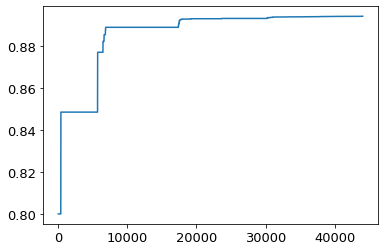

In [179]:
col_list_clustering = list(data_encod)
col_list_clustering.remove("tissue")
col_list_clustering.remove("ACC_ID")

X = data_encod[col_list_clustering].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_neighbours = cosine_similarity(X)

#n_neighbours is based on the min_samples parameter, 2*dim
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2646, metric = "precomputed")
nbrs = neigh.fit(X_neighbours)
distances, indices = nbrs.kneighbors(X_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) # no significant improvement

In [180]:
from sklearn.cluster import DBSCAN

In [181]:
model_STY = DBSCAN(eps=0.85, min_samples=2346, metric="cosine").fit(X)

In [182]:
STY_DBSCAN = data_encod
STY_DBSCAN["cluster"]=model_STY.labels_
STY_DBSCAN_per_cluster = STY_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()

In [183]:
STY_DBSCAN_per_cluster

cluster  ACC_ID
0        0   44053

## Working per tissue

C:\Users\hannedvo\AppData\Local\Temp\40/ipykernel_27956/3262481123.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_site_colon = data_site_colon[(data_site["Colon"]==1)]


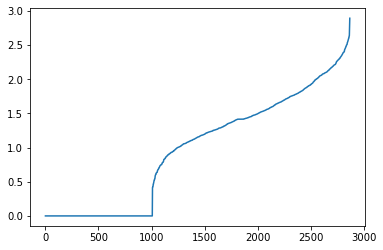

In [186]:
data_site_colon = data_STY[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_site_colon = data_STY.groupby(["ACC_ID", "UP_POS"],
                              as_index=False)[["tissue"]].agg({"tissue": lambda x:
                                                              ",".join(x)})
for tissue in list_tissues_STY:
    data_site_colon[tissue] = data_site_colon["tissue"].str.contains(tissue)
data_site_colon.replace({True:1, False:0}, inplace=True)

data_site_colon = data_site_colon[(data_site["Colon"]==1)]

data_site_colon_b = pd.get_dummies(data_site_colon, columns=["UP_POS"])
data_site_colon_b.head()

col_colon = list(data_site_colon_b)
col_colon.remove("tissue")
col_colon.remove("ACC_ID")
for tissue in list_tissues_STY:
    col_colon.remove(tissue)
    
    
data_site_colon = data_site_colon_b.groupby(["ACC_ID"], as_index=False)[col_colon].max()
data_site_colon



X_colon = data_site_colon[col_colon].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_colon_neighbours = cosine_similarity(X_colon)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2869)
nbrs = neigh.fit(X_colon_neighbours)
distances, indices = nbrs.kneighbors(X_colon_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [170]:
from sklearn.cluster import DBSCAN
model_colon = DBSCAN(eps=1, min_samples=2869, metric="cosine").fit(X_colon)

In [171]:
colon_DBSCAN = data_site_colon
colon_DBSCAN["cluster"]=model_colon.labels_
colon_DBSCAN_per_cluster = colon_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()

In [172]:
colon_DBSCAN_per_cluster
#again all in the same cluster

cluster  ACC_ID
0        0    2869

## Working per each of the three categories

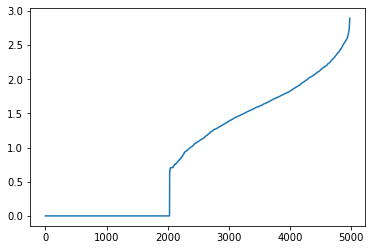

In [187]:
data_site_STY = data_STY[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_site_STY = data_STY.groupby(["ACC_ID", "UP_POS"],
                              as_index=False)[["tissue"]].agg({"tissue": lambda x:
                                                              ",".join(x)})
for tissue in list_tissues_STY:
    data_site_STY[tissue] = data_site_STY["tissue"].str.contains(tissue)
data_site_STY.replace({True:1, False:0}, inplace=True)

data_site_STY["Total"] = data_site_STY[list_tissues_STY].sum(axis=1)

data_site_STY["Type"] = 0

data_site_STY.loc[data_site_STY["Total"]==1, "Type"] = "t_spec"
data_site_STY.loc[(data_site_STY["Total"]>1)&(data_site_STY["Total"]<5), "Type"] = "t_aspec"
data_site_STY.loc[data_site_STY["Total"]>=5, "Type"] = "pervasively P"

data_pat_tspec = data_site_STY[data_site_STY["Type"]=="t_spec"]

data_pat_tspec_b = pd.get_dummies(data_pat_tspec, columns=["UP_POS"])
col_tspec = list(data_pat_tspec_b)
col_tspec.remove("tissue")
col_tspec.remove("ACC_ID")
col_tspec.remove("Type")
for tissue in list_tissues_STY:
    col_tspec.remove(tissue)
data_pat_tspec_b = data_pat_tspec_b.groupby(["ACC_ID"], as_index=False)[col_tspec].max()

X_tspec = data_pat_tspec_b[col_tspec].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_tspec_neighbours = cosine_similarity(X_tspec)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4977)
nbrs = neigh.fit(X_tspec_neighbours)
distances, indices = nbrs.kneighbors(X_tspec_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [143]:
from sklearn.cluster import DBSCAN
model_tspec = DBSCAN(eps=1.5, min_samples=4977, metric="cosine").fit(X_tspec)

In [144]:
tspec_DBSCAN = data_pat_tspec_b
tspec_DBSCAN["cluster"]=model_tspec.labels_
tspec_DBSCAN_per_cluster = tspec_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()

In [145]:
tspec_DBSCAN_per_cluster
#again all in the same cluster

cluster  ACC_ID
0        0    4977

## Working with a region instead of a phosphosite

In [188]:
data_site_STY = data_STY[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_site_STY = data_STY.groupby(["ACC_ID", "UP_POS"],
                              as_index=False)[["tissue"]].agg({"tissue": lambda x:
                                                              ",".join(x)})
data_site_STY["UP_POS_min1"] = np.nan
data_site_STY["UP_POS_min2"] = np.nan
data_site_STY["UP_POS_min3"] = np.nan
data_site_STY["UP_POS_min4"] = np.nan
data_site_STY["UP_POS_min5"] = np.nan

data_site_STY["UP_POS_plus1"] = data_site_STY["UP_POS"]+1
data_site_STY["UP_POS_plus2"] = data_site_STY["UP_POS"]+2
data_site_STY["UP_POS_plus3"] = data_site_STY["UP_POS"]+3
data_site_STY["UP_POS_plus4"] = data_site_STY["UP_POS"]+4
data_site_STY["UP_POS_plus5"] = data_site_STY["UP_POS"]+5

data_site_STY.loc[(data_site_STY["UP_POS"]-1)>0, "UP_POS_min1"] = data_site_STY["UP_POS"]-1
data_site_STY.loc[(data_site_STY["UP_POS"]-2)>0, "UP_POS_min2"] = data_site_STY["UP_POS"]-2
data_site_STY.loc[(data_site_STY["UP_POS"]-3)>0, "UP_POS_min3"] = data_site_STY["UP_POS"]-3
data_site_STY.loc[(data_site_STY["UP_POS"]-4)>0, "UP_POS_min4"] = data_site_STY["UP_POS"]-4
data_site_STY.loc[(data_site_STY["UP_POS"]-5)>0, "UP_POS_min5"] = data_site_STY["UP_POS"]-5

data_site_STY

ACC_ID  UP_POS                                             tissue  \
0      A0A075B6H7      30                                               Lung   
1      A0A075B6S5      52                                    Menstrual fluid   
2      A0A087WXM9     223                                             Testis   
3      A0A0B4J2D5     124                                               PBMC   
4      A0A0B4J2D5     145                                               PBMC   
...           ...     ...                                                ...   
23898      Q9Y6Y0     326                              Lymph node,Lymph node   
23899      Q9Y6Y0     336                                              Colon   
23900      Q9Y6Y0     338  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
23901      Q9Y6Y8     737                                              Colon   
23902      Q9Y6Y8     926  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

       UP_POS_min1  UP_POS_min2  UP_POS_min3  UP_POS_min4  UP_POS_min5  \
0               29         28.0         27.0         26.0         25.0   
1               51         50.0         49.0         48.0         47.0   
2              222        221.0        220.0        219.0        218.0   
3              123        122.0        121.0        120.0        119.0   
4              144        143.0        142.0        141.0        140.0   
...            ...          ...          ...          ...          ...   
23898          325        324.0        323.0        322.0        321.0   
23899          335        334.0        333.0        332.0        331.0   
23900          337        336.0        335.0        334.0        333.0   
23901          736        735.0        734.0        733.0        732.0   
23902          925        924.0        923.0        922.0        921.0   

       UP_POS_plus1  UP_POS_plus2  UP_POS_plus3  UP_POS_plus4  UP_POS_plus5  
0                31            32            33            34            35  
1                53            54            55            56            57  
2               224           225           226           227           228  
3               125           126           127           128           129  
4               146           147           148           149           150  
...             ...           ...           ...           ...           ...  
23898           327           328           329           330           331  
23899           337           338           339           340           341  
23900           339           340           341           342           343  
23901           738           739           740           741           742  
23902           927           928           929           930           931  

[23903 rows x 13 columns]

In [189]:
data_site_b = pd.get_dummies(data_site_STY, columns=["UP_POS"])
list_pos_reg = list(data_site_b)
list_pos_reg.remove("ACC_ID")
list_pos_reg.remove("tissue")
list_pos_reg.remove("UP_POS_min1")
list_pos_reg.remove("UP_POS_min2")
list_pos_reg.remove("UP_POS_min3")
list_pos_reg.remove("UP_POS_min4")
list_pos_reg.remove("UP_POS_min5")

list_pos_reg.remove("UP_POS_plus1")
list_pos_reg.remove("UP_POS_plus2")
list_pos_reg.remove("UP_POS_plus3")
list_pos_reg.remove("UP_POS_plus4")
list_pos_reg.remove("UP_POS_plus5")

In [190]:
list_regions = ["UP_POS_min1", "UP_POS_min2", "UP_POS_min3", "UP_POS_min4", "UP_POS_min5",
               "UP_POS_plus1", "UP_POS_plus2", "UP_POS_plus3", "UP_POS_plus4", "UP_POS_plus5"]
for region in ["UP_POS_min1", "UP_POS_min2", "UP_POS_min3", "UP_POS_min4", "UP_POS_min5",
               "UP_POS_plus1", "UP_POS_plus2", "UP_POS_plus3", "UP_POS_plus4", "UP_POS_plus5"]:
    for colname in list_pos_reg:
        colname_split = colname.split("_")
        nr = float(colname_split[-1])
        data_site_b.loc[(data_site_b[region]==nr), colname] = 1

In [191]:
data_site_b.loc[data_site_b["UP_POS_min2"].isnull(), "UP_POS_3"] = 0
data_site_b.loc[data_site_b["UP_POS_min2"].isnull(), "UP_POS_4"] = 0
data_site_b.loc[data_site_b["UP_POS_min2"].isnull(), "UP_POS_5"] = 0

data_site_b.loc[data_site_b["UP_POS_min3"].isnull(), "UP_POS_4"] = 0
data_site_b.loc[data_site_b["UP_POS_min3"].isnull(), "UP_POS_5"] = 0

data_site_b.loc[data_site_b["UP_POS_min4"].isnull(), "UP_POS_5"] = 0

In [192]:
data_site_b[list_pos_reg]

UP_POS_2  UP_POS_3  UP_POS_4  UP_POS_5  UP_POS_6  UP_POS_7  UP_POS_8  \
0             0         0         0         0         0         0         0   
1             0         0         0         0         0         0         0   
2             0         0         0         0         0         0         0   
3             0         0         0         0         0         0         0   
4             0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
23898         0         0         0         0         0         0         0   
23899         0         0         0         0         0         0         0   
23900         0         0         0         0         0         0         0   
23901         0         0         0         0         0         0         0   
23902         0         0         0         0         0         0         0   

       UP_POS_9  UP_POS_10  UP_POS_11  ...  UP_POS_33000  UP_POS_33071  \
0             0          0          0  ...             0             0   
1             0          0          0  ...             0             0   
2             0          0          0  ...             0             0   
3             0          0          0  ...             0             0   
4             0          0          0  ...             0             0   
...         ...        ...        ...  ...           ...           ...   
23898         0          0          0  ...             0             0   
23899         0          0          0  ...             0             0   
23900         0          0          0  ...             0             0   
23901         0          0          0  ...             0             0   
23902         0          0          0  ...             0             0   

       UP_POS_33201  UP_POS_33203  UP_POS_33247  UP_POS_33589  UP_POS_33626  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
23898             0             0             0             0             0   
23899             0             0             0             0             0   
23900             0             0             0             0             0   
23901             0             0             0             0             0   
23902             0             0             0             0             0   

       UP_POS_33628  UP_POS_33976  UP_POS_34280  
0                 0             0             0  
1                 0             0             0  
2                 0             0             0  
3                 0             0             0  
4                 0             0             0  
...             ...           ...           ...  
23898             0             0             0  
23899             0             0             0  
23900             0             0             0  
23901             0             0             0  
23902             0             0             0  

[23903 rows x 2594 columns]

In [193]:
for tissue in list_tissues_STY:
    data_site_b[tissue] = data_site_b["tissue"].str.contains(tissue)
    list_pos_reg.append(tissue)
data_site_b.replace({True:1, False:0}, inplace=True)

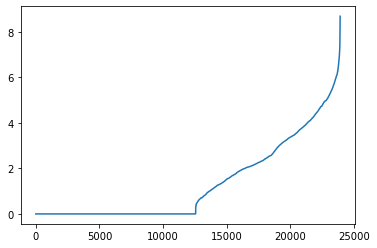

In [242]:
X_reg = data_site_b[list_pos_reg].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_reg_neighbours = cosine_similarity(X_reg)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2647)
nbrs = neigh.fit(X_reg_neighbours)
distances, indices = nbrs.kneighbors(X_reg_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [243]:
from sklearn.cluster import DBSCAN
model_reg = DBSCAN(eps=2, min_samples=2647, metric="cosine").fit(X_reg)
reg_DBSCAN = data_site_b
reg_DBSCAN["cluster"]=model_reg.labels_
reg_DBSCAN_per_cluster = reg_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()
reg_DBSCAN_per_cluster
#again all in the same cluster

cluster  ACC_ID
0        0   23903

#### Checking whether we can visually identify clusters ourselves

In [244]:
from sklearn.decomposition import MiniBatchSparsePCA

In [245]:
trans = MiniBatchSparsePCA(n_components=2, batch_size=500, random_state=0)

In [246]:
X_trans = trans.fit_transform(X_reg)

In [247]:
X_trans

array([[-0.06985855, -0.51599619],
       [-0.07599786, -0.61897849],
       [-0.06602944, -0.58853183],
       ...,
       [-0.59162333,  0.17031183],
       [-0.59162333,  0.17031183],
       [-0.59162333,  0.17031183]])

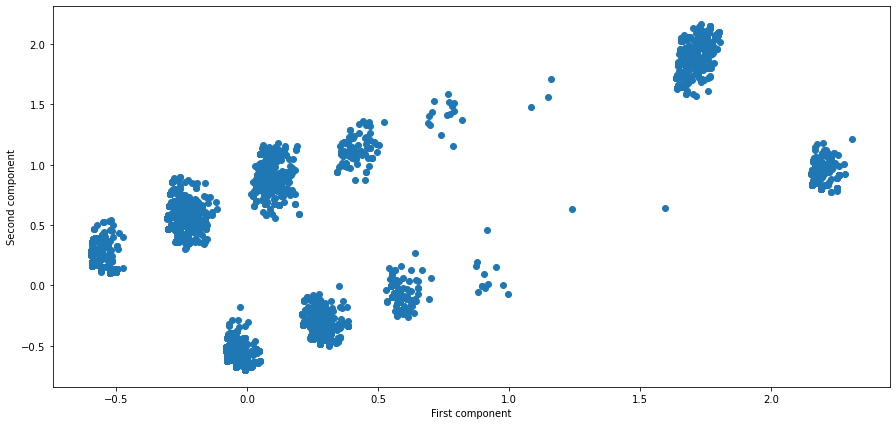

In [248]:
plt.figure(figsize=(15,7))
plt.scatter(X_trans[:,0], X_trans[:,1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()

### Zooming out to organ systems

In [155]:
for system in list_systems:
    data_site_b[system] = 0
    list_pos_reg.append(system)
for tissue in list_tissues_STY:
    if tissue in list_circulatory:
        data_site_b.loc[data_site_b[tissue]==1, "Circulatory system"]=1
    if tissue in list_digestive:
        data_site_b.loc[data_site_b[tissue]==1, "Digestive system"]=1
    if tissue in list_endocrine:
        data_site_b.loc[data_site_b[tissue]==1, "Endocrine system"]=1
    if tissue in list_immune:
        data_site_b.loc[data_site_b[tissue]==1, "Immune system and lymfatic system"]=1
    if tissue in list_integumentary:
        data_site_b.loc[data_site_b[tissue]==1, "Integumentary system"]=1
    if tissue in list_muscular:
        data_site_b.loc[data_site_b[tissue]==1, "Muscular system"]=1
    if tissue in list_nervous:
        data_site_b.loc[data_site_b[tissue]==1, "Nervous system"]=1
    if tissue in list_reproductive:
        data_site_b.loc[data_site_b[tissue]==1, "Reproductive system"]=1
    if tissue in list_respiratory:
        data_site_b.loc[data_site_b[tissue]==1, "Respiratory system"]=1
    if tissue in list_skeletal:
        data_site_b.loc[data_site_b[tissue]==1, "Skeletal system"]=1
    if tissue in list_urinary:
        data_site_b.loc[data_site_b[tissue]==1, "Urinary and renal system"]=1
    list_pos_reg.remove(tissue)

In [174]:
print(data_site_b[(data_site_b["Circulatory system"]==1)].shape[0])
print(data_site_b[(data_site_b["Digestive system"]==1)].shape[0])
print(data_site_b[(data_site_b["Endocrine system"]==1)].shape[0])
print(data_site_b[(data_site_b["Immune system and lymfatic system"]==1)].shape[0])
print(data_site_b[(data_site_b["Integumentary system"]==1)].shape[0])
print(data_site_b[(data_site_b["Muscular system"]==1)].shape[0])
print(data_site_b[(data_site_b["Nervous system"]==1)].shape[0])
print(data_site_b[(data_site_b["Reproductive system"]==1)].shape[0])
print(data_site_b[(data_site_b["Respiratory system"]==1)].shape[0])
print(data_site_b[(data_site_b["Skeletal system"]==1)].shape[0])
print(data_site_b[(data_site_b["Urinary and renal system"]==1)].shape[0])

7125
13408
611
9986
1827
533
2620
5623
4573
30
1288


In [180]:
print(data_site_b[list_pos_reg].shape)
print(data_site_b.shape)

(23903, 2605)
(23903, 2659)


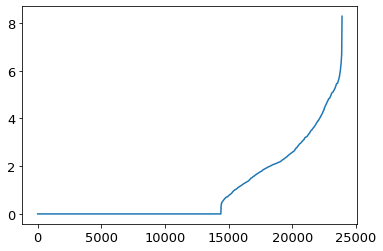

In [183]:
X_reg = data_site_b[list_pos_reg].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_reg_neighbours = cosine_similarity(X_reg)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2647)
nbrs = neigh.fit(X_reg_neighbours)
distances, indices = nbrs.kneighbors(X_reg_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [184]:
from sklearn.cluster import DBSCAN
model_reg = DBSCAN(eps=2, min_samples=2647, metric="cosine").fit(X_reg)
reg_DBSCAN = data_site_b
reg_DBSCAN["cluster"]=model_reg.labels_
reg_DBSCAN_per_cluster = reg_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()
reg_DBSCAN_per_cluster
#again all in the same cluster

cluster  ACC_ID
0        0   23903

### Leaving out tissue annotation

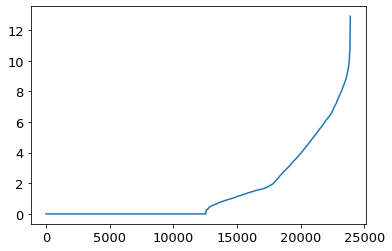

In [199]:
for tissue in list_tissues_STY:
    data_site_b[tissue] = data_site_b["tissue"].str.contains(tissue)
data_site_b.replace({True:1, False:0}, inplace=True)

X_reg = data_site_b[list_pos_reg].to_numpy()
from sklearn.metrics.pairwise import cosine_similarity
X_reg_neighbours = cosine_similarity(X_reg)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2607)
nbrs = neigh.fit(X_reg_neighbours)
distances, indices = nbrs.kneighbors(X_reg_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [200]:
from sklearn.cluster import DBSCAN
model_reg = DBSCAN(eps=2, min_samples=2607, metric="cosine").fit(X_reg)
reg_DBSCAN = data_site_b
reg_DBSCAN["cluster"]=model_reg.labels_
reg_DBSCAN_per_cluster = reg_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()
reg_DBSCAN_per_cluster
#again all in the same cluster
#summarise on protein level

cluster  ACC_ID
0        0   23903

## Heatmap - only STY sites

In [223]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]
data_pat = data_STY[["ACC_ID", "UP_POS", "tissue", "modres"]]
data_pat = data_pat.groupby(["ACC_ID", "UP_POS"],
                              as_index=False)[["tissue", "modres"]].agg({"tissue": lambda x:
                                                              ",".join(x),
                                                                        "modres": "first"}
                                                                       )

for tissue in list_tissues_STY:
    data_pat[tissue] = data_pat["tissue"].str.contains(tissue)
data_pat.replace({True:1, False:0}, inplace=True)
data_pat["Total"] = data_pat[list_tissues_STY].sum(axis=1)

data_pat["Type"] = 0
data_pat.loc[data_pat["Total"]==1, "Type"]= "tissue-specific"
data_pat.loc[(data_pat["Total"]>1)&(data_pat["Total"]<5), "Type"]= "tissue aspecific"
data_pat.loc[data_pat["Total"]>=5, "Type"]="pervasively phosphorylated"
data_pat.head()
#do heatmaps of regions

ACC_ID  UP_POS           tissue modres  Adipose tissue  B-cells  Blood  \
0  A0A075B6H7      30             Lung      T               0        0      0   
1  A0A075B6S5      52  Menstrual fluid      S               0        0      0   
2  A0A087WXM9     223           Testis      S               0        0      0   
3  A0A0B4J2D5     124             PBMC      S               0        0      0   
4  A0A0B4J2D5     145             PBMC      T               0        0      0   

   Bone  Brain  Breast  ...  Synovial tissue  T-cells  Testis  Tooth  \
0     0      0       0  ...                0        0       0      0   
1     0      0       0  ...                0        0       0      0   
2     0      0       0  ...                0        0       1      0   
3     0      0       0  ...                0        0       0      0   
4     0      0       0  ...                0        0       0      0   

   Umbilical cord  Ureter  Urinary bladder  Urine  Total             Type  
0               0       0                0      0      1  tissue-specific  
1               0       0                0      0      1  tissue-specific  
2               0       0                0      0      1  tissue-specific  
3               0       0                0      0      1  tissue-specific  
4               0       0                0      0      1  tissue-specific  

[5 rows x 47 columns]

In [224]:
list_POS = data_pat["UP_POS"].tolist()
list_POS = sorted(list_POS)
print(list_POS[0:20])
uni_list_POS = []
for pos in list_POS:
    if len(uni_list_POS)==0:
        pos = "UP_POS_"+str(pos)
        uni_list_POS.append(pos)
    else:
        pos = "UP_POS_"+str(pos)
        if pos != uni_list_POS[-1]:
            uni_list_POS.append(pos)
print(uni_list_POS[0:20])
print(len(uni_list_POS))

[2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4]
['UP_POS_2', 'UP_POS_3', 'UP_POS_4', 'UP_POS_5', 'UP_POS_6', 'UP_POS_7', 'UP_POS_8', 'UP_POS_9', 'UP_POS_10', 'UP_POS_11', 'UP_POS_12', 'UP_POS_13', 'UP_POS_14', 'UP_POS_15', 'UP_POS_16', 'UP_POS_17', 'UP_POS_18', 'UP_POS_19', 'UP_POS_20', 'UP_POS_21']
2594


In [225]:
data_patb = pd.get_dummies(data_pat, columns=["UP_POS"])
print(data_patb.shape)
data_patb.head()

(23903, 2640)


ACC_ID           tissue modres  Adipose tissue  B-cells  Blood  Bone  \
0  A0A075B6H7             Lung      T               0        0      0     0   
1  A0A075B6S5  Menstrual fluid      S               0        0      0     0   
2  A0A087WXM9           Testis      S               0        0      0     0   
3  A0A0B4J2D5             PBMC      S               0        0      0     0   
4  A0A0B4J2D5             PBMC      T               0        0      0     0   

   Brain  Breast  Cerebrospinal fluid  ...  UP_POS_33000  UP_POS_33071  \
0      0       0                    0  ...             0             0   
1      0       0                    0  ...             0             0   
2      0       0                    0  ...             0             0   
3      0       0                    0  ...             0             0   
4      0       0                    0  ...             0             0   

   UP_POS_33201  UP_POS_33203  UP_POS_33247  UP_POS_33589  UP_POS_33626  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   UP_POS_33628  UP_POS_33976  UP_POS_34280  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0  

[5 rows x 2640 columns]

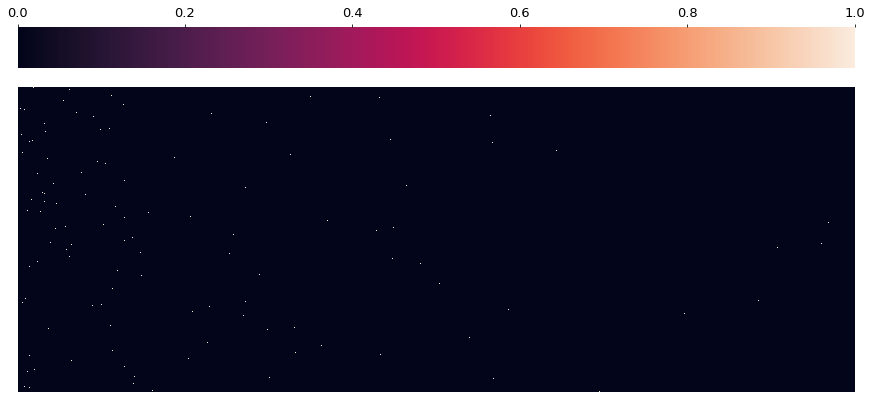

In [234]:
heatmap = data_patb[uni_list_POS]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False, cbar=True, cbar_kws={"location": "top"})
plt.show()

In [201]:
print(heatmap.shape)
heatmap = heatmap.loc[:,(heatmap!=0).any(axis=0)]
print(heatmap.shape) #so no columns have only 0's. Just checking as the heatmap is so dark

(23903, 2594)
(23903, 2594)


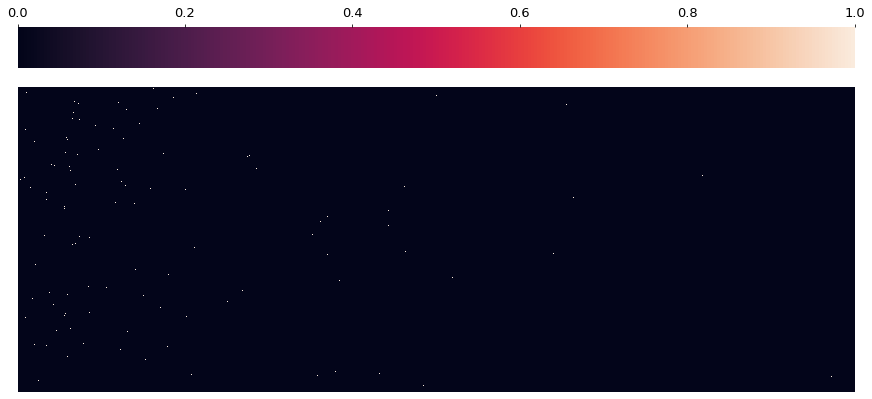

In [233]:
heatmap = data_patb.loc[data_patb["Type"]== "tissue-specific", uni_list_POS]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False, cbar=True, cbar_kws={"location": "top"})
plt.show()

In [203]:
print(heatmap.shape)
heatmap_0 = heatmap.loc[:,(heatmap==0).all(axis=0)]
print(heatmap_0.shape)
heatmap_0.columns

(14019, 2594)
(14019, 377)


Index(['UP_POS_566', 'UP_POS_781', 'UP_POS_828', 'UP_POS_1049', 'UP_POS_1063',
       'UP_POS_1065', 'UP_POS_1071', 'UP_POS_1091', 'UP_POS_1094',
       'UP_POS_1097',
       ...
       'UP_POS_5845', 'UP_POS_5851', 'UP_POS_5854', 'UP_POS_7364',
       'UP_POS_8362', 'UP_POS_12009', 'UP_POS_16279', 'UP_POS_33626',
       'UP_POS_33628', 'UP_POS_34280'],
      dtype='object', length=377)

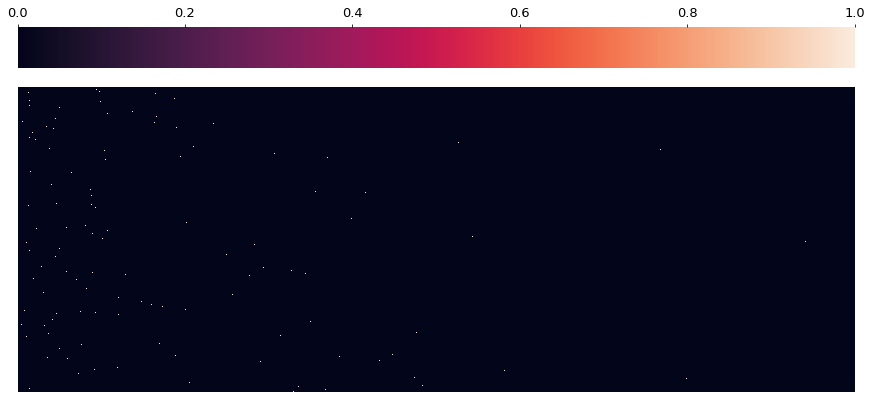

In [232]:
heatmap = data_patb.loc[data_patb["Type"] == "tissue aspecific", uni_list_POS]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False, cbar=True, cbar_kws={"location": "top"})
plt.show()

In [205]:
print(heatmap.shape)
heatmap_0 = heatmap.loc[:,(heatmap==0).all(axis=0)]
print(heatmap_0.shape)
heatmap_0.columns

(6478, 2594)
(6478, 1008)


Index(['UP_POS_553', 'UP_POS_555', 'UP_POS_606', 'UP_POS_653', 'UP_POS_684',
       'UP_POS_712', 'UP_POS_724', 'UP_POS_726', 'UP_POS_728', 'UP_POS_730',
       ...
       'UP_POS_31456', 'UP_POS_32798', 'UP_POS_33000', 'UP_POS_33071',
       'UP_POS_33201', 'UP_POS_33203', 'UP_POS_33247', 'UP_POS_33589',
       'UP_POS_33976', 'UP_POS_34280'],
      dtype='object', length=1008)

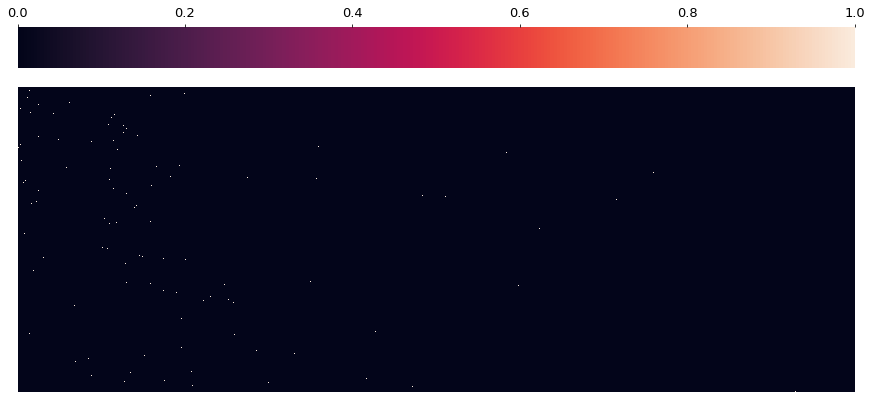

In [231]:
heatmap = data_patb.loc[data_patb["Type"] == "pervasively phosphorylated", uni_list_POS]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap, xticklabels=False, yticklabels=False, cbar=True, cbar_kws={"location": "top"})
plt.show()

In [207]:
print(heatmap.shape)
heatmap_0 = heatmap.loc[:,(heatmap==0).all(axis=0)]
print(heatmap_0.shape)
heatmap_0.columns

(3406, 2594)
(3406, 1312)


Index(['UP_POS_2', 'UP_POS_4', 'UP_POS_6', 'UP_POS_132', 'UP_POS_288',
       'UP_POS_324', 'UP_POS_345', 'UP_POS_351', 'UP_POS_355', 'UP_POS_409',
       ...
       'UP_POS_32798', 'UP_POS_33000', 'UP_POS_33071', 'UP_POS_33201',
       'UP_POS_33203', 'UP_POS_33247', 'UP_POS_33589', 'UP_POS_33626',
       'UP_POS_33628', 'UP_POS_33976'],
      dtype='object', length=1312)

In [189]:
data_site_b.sort_values(["UP_POS_plus1"], inplace=True)

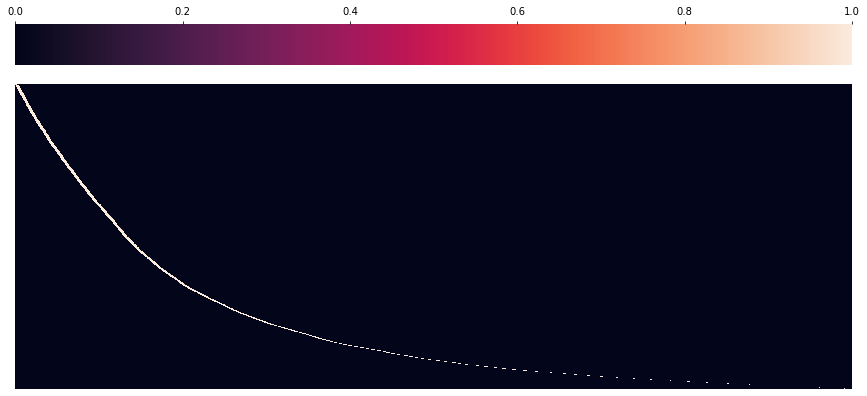

In [193]:
heatmap2 = data_site_b[list_pos_reg]
plt.figure(figsize=(15,7))
sns.heatmap(heatmap2, xticklabels=False, yticklabels=False, cbar=True, cbar_kws={"location": "top"})
plt.show()

## PCA

No improvement

In [194]:
for tissue in list_tissues_STY:
    data_site_b[tissue] = data_site_b["tissue"].str.contains(tissue)
    list_pos_reg.append(tissue)
data_site_b.replace({True:1, False:0}, inplace=True)

In [250]:
from sklearn.decomposition import PCA

In [352]:
pca = PCA(0.75)

In [353]:
X_new = pca.fit_transform(data_site_b[list_pos_reg])

In [302]:
print(pca.n_samples_)
print(pca.n_features_)

23903
2676


In [303]:
print(X_new.shape)

(23903, 96)


In [304]:
print(data_site_b.shape[0])
print(data_site_b.shape[1])

23903
2648


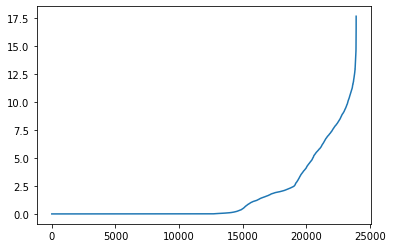

In [305]:
X_PCA_neighbours = cosine_similarity(X_new)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=100)
nbrs = neigh.fit(X_PCA_neighbours)
distances, indices = nbrs.kneighbors(X_PCA_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [306]:
from sklearn.cluster import DBSCAN
model_reg = DBSCAN(eps=1.75, min_samples=100, metric="cosine").fit(X_new)
reg_DBSCAN = data_site_b
reg_DBSCAN["cluster"]=model_reg.labels_
reg_DBSCAN_per_cluster = reg_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()
reg_DBSCAN_per_cluster
#again all in the same cluster
#summarise on protein level

cluster  ACC_ID
0        0   23903

In [258]:
pca_plot = PCA(n_components=2)

In [259]:
X_trans = pca_plot.fit_transform(data_site_b[list_pos_reg])

In [269]:
pca_plot.explained_variance_ratio_

array([0.08023374, 0.03616781])

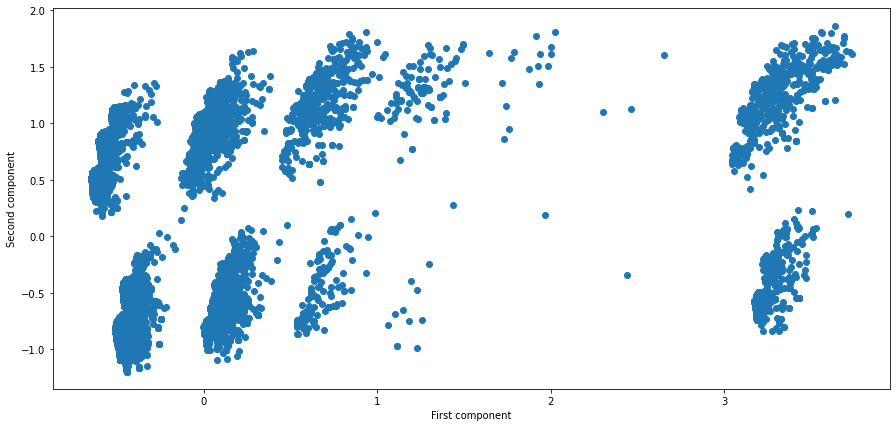

In [260]:
plt.figure(figsize=(15,7))
plt.scatter(X_trans[:,0], X_trans[:,1])
plt.xlabel("First component")
plt.ylabel("Second component")
#plt.savefig("PCA_patterns.png", format="png",  bbox_inches="tight")
plt.show()

In [198]:
data_prot_b = data_site_b.groupby(["ACC_ID"], as_index=False).agg({x: "max" for x in list_pos_reg})
print(data_prot_b.shape[0])
data_prot_b.head()

5855


ACC_ID  UP_POS_2  UP_POS_3  UP_POS_4  UP_POS_5  UP_POS_6  UP_POS_7  \
0  A0A075B6H7         0         0         0         0         0         0   
1  A0A075B6S5         0         0         0         0         0         0   
2  A0A087WXM9         0         0         0         0         0         0   
3  A0A0B4J2D5         0         0         0         0         0         0   
4  A0A0B4J2D9         0         0         0         0         0         0   

   UP_POS_8  UP_POS_9  UP_POS_10  ...  Skin  Small intestine  Synovial tissue  \
0         0         0          0  ...     0                0                0   
1         0         0          0  ...     0                0                0   
2         0         0          0  ...     0                0                0   
3         0         0          0  ...     0                0                0   
4         0         0          0  ...     0                0                0   

   T-cells  Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  
0        0       0      0               0       0                0      0  
1        0       0      0               0       0                0      0  
2        0       1      0               0       0                0      0  
3        0       0      0               0       0                0      0  
4        0       0      0               0       0                0      0  

[5 rows x 2636 columns]

In [319]:
pca = PCA(0.95)

In [320]:
X_new = pca.fit_transform(data_prot_b[list_pos_reg])

In [321]:
print(X_new.shape)

(5855, 354)


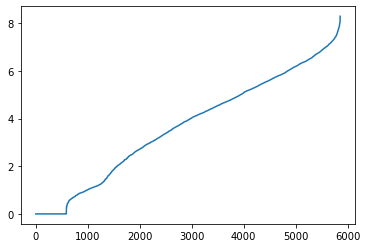

In [323]:
X_PCA_neighbours = cosine_similarity(X_new)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=355)
nbrs = neigh.fit(X_PCA_neighbours)
distances, indices = nbrs.kneighbors(X_PCA_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [265]:
from sklearn.cluster import DBSCAN
model_reg = DBSCAN(eps=2.5, min_samples=229, metric="cosine").fit(X_new)
reg_DBSCAN = data_site_b
reg_DBSCAN["cluster"]=model_reg.labels_
reg_DBSCAN_per_cluster = reg_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()
reg_DBSCAN_per_cluster
#again all in the same cluster

cluster  ACC_ID
0        0   23903

## Random projection

In [324]:
from sklearn.random_projection import SparseRandomProjection

In [334]:
transformer = SparseRandomProjection(eps=0.4)

In [335]:
X_new = transformer.fit_transform(data_site_b[list_pos_reg])

In [336]:
X_new.shape[1]

687

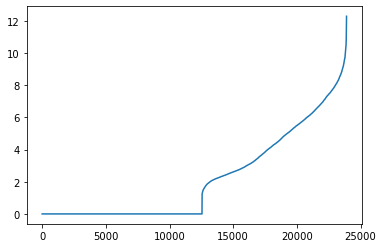

In [338]:
X_rp_neighbours = cosine_similarity(X_new)

#n_neighbours is based on the min_samples parameter
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=687)
nbrs = neigh.fit(X_rp_neighbours)
distances, indices = nbrs.kneighbors(X_rp_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [329]:
from sklearn.cluster import DBSCAN
model_reg = DBSCAN(eps=2, min_samples=1120, metric="cosine").fit(X_new)
reg_DBSCAN = data_site_b
reg_DBSCAN["cluster"]=model_reg.labels_
reg_DBSCAN_per_cluster = reg_DBSCAN.groupby(["cluster"], as_index=False)["ACC_ID"].count()
reg_DBSCAN_per_cluster
#again all in the same cluster
#summarise on protein level

cluster  ACC_ID
0        0   23903

In [339]:
from sklearn.random_projection import GaussianRandomProjection

In [344]:
transformer = GaussianRandomProjection(eps=0.4)

In [345]:
X_new = transformer.fit_transform(data_site_b[list_pos_reg])

In [346]:
X_new.shape[1]

687

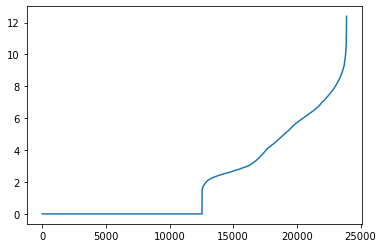

In [348]:
X_rp_neighbours = cosine_similarity(X_new)

#n_neighbours is based on the min_samples parameter
#from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=687)
nbrs = neigh.fit(X_rp_neighbours)
distances, indices = nbrs.kneighbors(X_rp_neighbours)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
X_new.shape

## Hamming distance revisited

In [196]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric("hamming")
X_hamming = dist.pairwise(data_prot_b[list_pos_reg])

In [199]:
print(X_hamming.shape)
print(X_hamming)

(5855, 5855)
[[0.         0.00910816 0.00910816 ... 0.02125237 0.01935484 0.01328273]
 [0.00910816 0.         0.00910816 ... 0.02201139 0.01935484 0.01328273]
 [0.00910816 0.00910816 0.         ... 0.02201139 0.01935484 0.01328273]
 ...
 [0.02125237 0.02201139 0.02201139 ... 0.         0.03074004 0.0170778 ]
 [0.01935484 0.01935484 0.01935484 ... 0.03074004 0.         0.0227704 ]
 [0.01328273 0.01328273 0.01328273 ... 0.0170778  0.0227704  0.        ]]


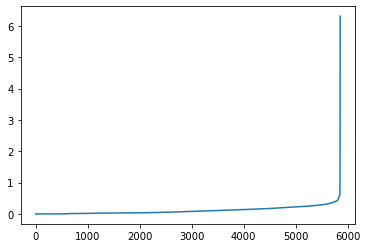

In [200]:
from sklearn.neighbors import NearestNeighbors
neigh_res_hamming = NearestNeighbors(n_neighbors=5855)
nbrs_res_hamming = neigh_res_hamming.fit(X_hamming)
distances_res_hamming, indices_res_hamming = nbrs_res_hamming.kneighbors(X_hamming)
distances_res_hamming = np.sort(distances_res_hamming, axis=0)
distances_res_hamming = distances_res_hamming[:,1]
plt.plot(distances_res_hamming)

In [202]:
from sklearn.cluster import DBSCAN

In [208]:
model_res = DBSCAN(eps=0.5, min_samples=5855, metric="precomputed").fit(X_hamming)

In [209]:
data_DBSCAN_res = data_prot_b
data_DBSCAN_res["cluster"]=model_res.labels_
data_DBSCAN_res_clustered = data_DBSCAN_res.groupby(["cluster"], as_index=False)["ACC_ID"].count()
data_DBSCAN_res_clustered

cluster  ACC_ID
0        0    5855

In [196]:
list_pos_reg_no_tissue = list_pos_reg.copy()
for x in list_tissues_STY:
    list_pos_reg_no_tissue.remove(x)

In [199]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric("hamming")
X_hamming = dist.pairwise(data_prot_b[list_pos_reg_no_tissue])

In [200]:
print(X_hamming.shape)
print(X_hamming)

(5855, 5855)
[[0.         0.00910816 0.00910816 ... 0.02125237 0.01935484 0.01328273]
 [0.00910816 0.         0.00910816 ... 0.02201139 0.01935484 0.01328273]
 [0.00910816 0.00910816 0.         ... 0.02201139 0.01935484 0.01328273]
 ...
 [0.02125237 0.02201139 0.02201139 ... 0.         0.03074004 0.0170778 ]
 [0.01935484 0.01935484 0.01935484 ... 0.03074004 0.         0.0227704 ]
 [0.01328273 0.01328273 0.01328273 ... 0.0170778  0.0227704  0.        ]]


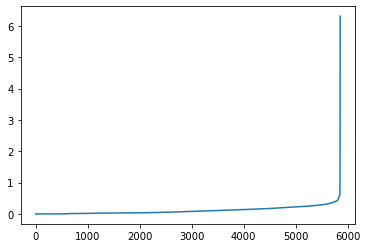

In [201]:
from sklearn.neighbors import NearestNeighbors
neigh_res_hamming = NearestNeighbors(n_neighbors=5855)
nbrs_res_hamming = neigh_res_hamming.fit(X_hamming)
distances_res_hamming, indices_res_hamming = nbrs_res_hamming.kneighbors(X_hamming)
distances_res_hamming = np.sort(distances_res_hamming, axis=0)
distances_res_hamming = distances_res_hamming[:,1]
plt.plot(distances_res_hamming)

In [202]:
from sklearn.cluster import DBSCAN

In [203]:
model_res = DBSCAN(eps=0.5, min_samples=5855, metric="precomputed").fit(X_hamming)

In [204]:
data_DBSCAN_res = data_prot_b
data_DBSCAN_res["cluster"]=model_res.labels_
data_DBSCAN_res_clustered = data_DBSCAN_res.groupby(["cluster"], as_index=False)["ACC_ID"].count()
data_DBSCAN_res_clustered

cluster  ACC_ID
0        0    5855

In [205]:
from sklearn.decomposition import PCA

In [214]:
pca = PCA(0.99)

In [215]:
X_new = pca.fit_transform(data_prot_b[list_pos_reg])

In [217]:
#from sklearn.neighbors import DistanceMetric
#dist = DistanceMetric.get_metric("hamming")
X_hamming = dist.pairwise(X_new)

In [218]:
print(X_hamming.shape)
print(X_hamming)

(5855, 5855)
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


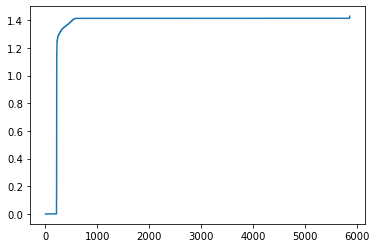

In [219]:
from sklearn.neighbors import NearestNeighbors
neigh_res_hamming = NearestNeighbors(n_neighbors=5855)
nbrs_res_hamming = neigh_res_hamming.fit(X_hamming)
distances_res_hamming, indices_res_hamming = nbrs_res_hamming.kneighbors(X_hamming)
distances_res_hamming = np.sort(distances_res_hamming, axis=0)
distances_res_hamming = distances_res_hamming[:,1]
plt.plot(distances_res_hamming)

In [220]:
model_res = DBSCAN(eps=1.35, min_samples=5855, metric="precomputed").fit(X_hamming)

In [221]:
data_DBSCAN_res = data_prot_b
data_DBSCAN_res["cluster"]=model_res.labels_
data_DBSCAN_res_clustered = data_DBSCAN_res.groupby(["cluster"], as_index=False)["ACC_ID"].count()
data_DBSCAN_res_clustered

cluster  ACC_ID
0        0    5855

In [222]:
pca = PCA(0.99)

In [223]:
X_new = pca.fit_transform(data_site_b[list_pos_reg])

In [224]:
X_new.shape

(23903, 983)

In [225]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric("hamming")
X_hamming = dist.pairwise(X_new)

In [226]:
print(X_hamming.shape)
print(X_hamming)

(23903, 23903)
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [228]:
#from sklearn.neighbors import NearestNeighbors
#neigh_res_hamming = NearestNeighbors(n_neighbors=23903)
#nbrs_res_hamming = neigh_res_hamming.fit(X_hamming)
#distances_res_hamming, indices_res_hamming = nbrs_res_hamming.kneighbors(X_hamming)
#distances_res_hamming = np.sort(distances_res_hamming, axis=0)
#distances_res_hamming = distances_res_hamming[:,1]
#plt.plot(distances_res_hamming)

In [229]:
from sklearn.random_projection import SparseRandomProjection

In [230]:
transformer = SparseRandomProjection(eps=0.2)

In [231]:
X_new = transformer.fit_transform(data_prot_b[list_pos_reg])

In [232]:
X_hamming = dist.pairwise(X_new)

In [233]:
print(X_hamming.shape)
print(X_hamming)

(5855, 5855)
[[0.         0.35482259 0.35332334 ... 0.57171414 0.57371314 0.45127436]
 [0.35482259 0.         0.35832084 ... 0.59070465 0.56771614 0.44027986]
 [0.35332334 0.35832084 0.         ... 0.60269865 0.57271364 0.46626687]
 ...
 [0.57171414 0.59070465 0.60269865 ... 0.         0.65817091 0.52323838]
 [0.57371314 0.56771614 0.57271364 ... 0.65817091 0.         0.60769615]
 [0.45127436 0.44027986 0.46626687 ... 0.52323838 0.60769615 0.        ]]


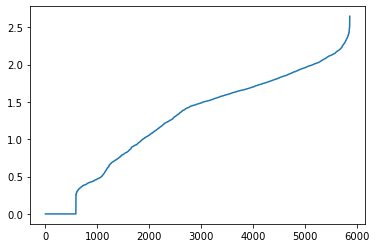

In [234]:
from sklearn.neighbors import NearestNeighbors
neigh_res_hamming = NearestNeighbors(n_neighbors=5855)
nbrs_res_hamming = neigh_res_hamming.fit(X_hamming)
distances_res_hamming, indices_res_hamming = nbrs_res_hamming.kneighbors(X_hamming)
distances_res_hamming = np.sort(distances_res_hamming, axis=0)
distances_res_hamming = distances_res_hamming[:,1]
plt.plot(distances_res_hamming)

In [ ]:
X_new = transformer.fit_transform(data_site_b[list_pos_reg])

In [ ]:
X_hamming = dist.pairwise(X_new)